In [1]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for k in range(5):
    
    tf.reset_default_graph()
    
    print('---------' + str(k) + '------------')
    
    MAX_EPISODE = 2000
    MAX_EPISODE_LEN = 200

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.8
    epsilon = 1.0

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'epsilon':epsilon, 'sigma2':SIGMA2}
    
    IS_TRAIN = False
#     rate = 3.0
    res_path = 't_M_08_nB_dqn/'
    model_path = 'model_M_08_nB_dqn/my_train_model_'+str(k)+'-2000'
    meta_path = model_path+'.meta'
    init_path = ''
    init_seqCnt = 40
    
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':1.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'2', 'model':'AR', 'num_r':NUM_R, 'rate':2.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'3', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5}]
    
    if not os.path.exists(res_path):
        os.mkdir(res_path) 
    
    print(user_config)
    # 0. initialize the session object
    sess = tf.Session() 

    # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
    # sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        info['init_path'] = init_path
        info['init_seqCnt'] = init_seqCnt
        user_list.append(MecTermDQN(sess, info, train_config))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

    sess.run(tf.global_variables_initializer())
    
    tflearn.config.is_training(is_training=IS_TRAIN, session=sess)

    env.init_target_network()

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):

            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = res_path+'test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)
    
    tflearn.config.is_training(is_training=False, session=sess)
    #Create a saver object which will save all the variables
    saver = tf.train.Saver() 
    saver.save(sess, model_path)

    sess.close()

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
---------0------------
[{'id': '1', 'model': 'AR', 'num_r': 4, 'rate': 1.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}, {'id': '2', 'model': 'AR', 'num_r': 4, 'rate': 2.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}, {'id': '3', 'model': 'AR', 'num_r': 4, 'rate': 3.0, 'dis': 100, 'action_bound': 2, 'data_buf_size': 100, 't_factor': 0.8, 'penalty': 1000, 'action_level': 5}]
Initialization OK!----> user 1
Initialization OK!----> user 2
Initialization OK!----> user 3
0:r:[-15.39699581 -16.91559572 -24.47247746],p:[1.00940394 1.65098324 2.1625    ],op:[0.88809606 0.30901676 0.        ],tr:[1.21294366 1.05158098 1.0915772 ],pr:[1.64222861 1.61941534 1.80640939],rev:[0.93  2.055 2.97 ],dbuf:[ 1.08497905  6.17797859 35.86238731],ch:[4.58912266 3.02005968 3.18343053],ibuf:

21:r:[-17.45835649 -17.59879814 -23.45660237],p:[1.30897191 1.49894976 2.1       ],op:[0.79352809 0.57855024 0.        ],tr:[1.401573   1.4715778  1.22453274],pr:[1.68889988 1.76573875 1.72967143],rev:[1.02  2.015 2.96 ],dbuf:[ 3.19178244  4.89399072 33.28301184],ch:[4.52255582 4.41023371 3.75626998],ibuf:[39.0, 29.0, 22.0],rbuf:[ 1.         15.47675211 23.15916519]
22:r:[-16.38917463 -17.44231979 -24.5093837 ],p:[1.22584125 1.65425284 1.93      ],op:[0.78165875 0.34074716 0.        ],tr:[1.16896281 1.32256486 1.19613788],pr:[1.68660512 1.62925217 1.62736868],rev:[1.035 1.97  2.87 ],dbuf:[ 1.64587317  7.41159897 45.3469185 ],ch:[3.72063636 3.86417916 3.57806659],ibuf:[20.0, 47.5, 33.5],rbuf:[ 0.          5.50984868 42.7986892 ]
23:r:[-15.95320527 -16.76183805 -26.37692971],p:[1.21565521 1.47770706 1.9925    ],op:[0.69184479 0.53979294 0.        ],tr:[1.14857355 1.26571697 1.0890414 ],pr:[1.5891366  1.58751247 1.67528217],rev:[1.055 1.99  2.985],dbuf:[ 3.46602636  3.10919023 52.18464856

44:r:[-13.136545   -17.4721525  -22.68477695],p:[1.01809057 1.45440231 1.72142528],op:[0.58440943 0.11309769 0.02607472],tr:[0.96496882 1.00063961 0.95263524],pr:[1.29823501 1.38477523 1.47037187],rev:[1.03  2.165 2.88 ],dbuf:[ 1.58272499 24.6607625  43.52388473],ch:[3.61696787 4.4080173  3.22904723],ibuf:[3.0, 42.5, 8.5],rbuf:[  6.          30.2785199  105.51665254]
45:r:[-14.22395829 -15.67604362 -22.72418382],p:[1.0110393  1.34586602 1.69      ],op:[0.7239607  0.20413398 0.        ],tr:[1.16221242 1.06613336 1.1780842 ],pr:[1.48872785 1.39307062 1.47789909],rev:[0.97 1.86 2.96],dbuf:[ 1.71979145 16.38021811 46.0209191 ],ch:[4.58432398 4.97184779 4.37192993],ibuf:[21.0, 41.0, 5.5],rbuf:[ 1.          2.35328697 66.30334172]
46:r:[-14.33035382 -14.46186709 -22.59189447],p:[1.1191411  1.41038197 1.7       ],op:[0.5333589  0.24711803 0.        ],tr:[1.10874167 1.00508122 1.08731188],pr:[1.29753371 1.35232011 1.44857215],rev:[0.99  1.94  2.835],dbuf:[ 5.5517691   6.00933546 44.95947236],c

67:r:[-12.34862827 -16.15556903 -27.4940873 ],p:[1.03343789 1.49959273 1.57732548],op:[0.46156211 0.07290727 0.00267452],tr:[0.75613561 0.82232366 0.92714317],pr:[1.21330596 1.39171948 1.40995845],rev:[1.015 1.92  3.18 ],dbuf:[ 1.94314137 17.87784515 74.27043652],ch:[3.0633051  3.23818625 3.7971987 ],ibuf:[9.0, 37.0, 2.5],rbuf:[  1.4801579    9.17405521 171.44466992]
68:r:[-13.50133562 -14.54260077 -30.54946169],p:[1.0795157  1.34070126 1.6125    ],op:[0.5054843  0.04179874 0.        ],tr:[1.00629326 0.90471296 0.97007155],pr:[1.32395804 1.24553764 1.37948888],rev:[1.005 2.07  2.935],dbuf:[ 4.1066781  17.41300387 88.24730844],ch:[4.18054492 4.21135835 3.84716016],ibuf:[48.5, 4.0, 36.5],rbuf:[  3.           4.25802315 153.58791385]
69:r:[-12.15126476 -13.89041144 -32.94650265],p:[1.01331524 1.28697635 1.585     ],op:[0.43168476 0.28302365 0.        ],tr:[1.00691351 0.83265423 1.11125205],pr:[1.16125234 1.49671407 1.28297466],rev:[1.105 1.87  3.015],dbuf:[  2.95632381   6.6520572  101.33

90:r:[-12.58678975 -14.02782506 -34.56296466],p:[0.8784886  1.34842079 1.5       ],op:[0.6565114  0.10157921 0.        ],tr:[1.04461095 0.81944123 0.90183833],pr:[1.31764709 1.43872675 1.37266991],rev:[0.945 1.92  2.96 ],dbuf:[  1.53394873  12.1391253  112.81482331],ch:[4.68201566 3.32617962 3.53040787],ibuf:[11.5, 40.5, 46.0],rbuf:[  0.           0.84399166 183.09835073]
91:r:[-11.28453491 -11.88143779 -25.6083616 ],p:[0.8241019  1.15667404 1.68      ],op:[0.5258981  0.21082596 0.        ],tr:[0.91345168 0.79782999 1.26137818],pr:[1.37313977 1.519956   1.53322968],rev:[1.05  1.925 3.115],dbuf:[ 2.42267457  4.70718893 60.84180802],ch:[4.50070526 3.87731026 4.7640183 ],ibuf:[23.0, 10.0, 32.5],rbuf:[ 5.          7.4801579  96.57842907]
92:r:[-11.2924097  -12.31375318 -34.17616102],p:[0.85796827 1.19137792 1.59      ],op:[0.50953173 0.23612208 0.        ],tr:[0.95192159 0.87484925 1.04053457],pr:[1.1609971  1.56151678 1.33304243],rev:[1.025 1.955 2.915],dbuf:[  1.76204852   4.46876592 107

113:r:[-12.10723974 -13.22565587 -25.89296039],p:[0.93586733 1.2010396  1.6275    ],op:[0.45413267 0.0389604  0.        ],tr:[1.02413228 0.59333643 1.07596031],pr:[1.25941639 1.39037051 1.52691318],rev:[1.015 1.97  2.8  ],dbuf:[ 4.93619872 16.52827934 64.36480194],ch:[5.30957971 2.85982195 4.31927426],ibuf:[44.0, 8.0, 29.0],rbuf:[ 3.         12.5746718  68.42530127]
114:r:[-10.91403532 -12.3090675  -22.36514826],p:[0.82746634 1.15885783 1.69500031],op:[0.49253366 0.12364217 0.00499969],tr:[0.76561821 0.61094576 1.0970537 ],pr:[1.19982733 1.55676441 1.56419454],rev:[0.985 1.835 2.915],dbuf:[ 1.7701766  10.24533752 43.82574131],ch:[4.13905603 3.80660479 3.70863178],ibuf:[1.0, 24.5, 0.0],rbuf:[ 5.          3.41259895 55.1315147 ]
115:r:[-10.22506153 -13.39418383 -35.23778284],p:[0.78418152 1.33337517 1.75      ],op:[0.38331848 0.13162483 0.        ],tr:[0.74512604 0.84054152 1.04048541],pr:[1.15129326 1.5475711  1.55216082],rev:[0.86  2.075 3.09 ],dbuf:[  4.42530763   8.37091913 106.18891

136:r:[ -9.45179914 -11.81859912 -24.03243658],p:[0.79371568 1.17061782 1.69      ],op:[0.31628432 0.15188218 0.        ],tr:[0.63079341 0.78144009 1.14054832],pr:[1.12337977 1.49572821 1.47420168],rev:[0.985 2.05  2.925],dbuf:[ 2.85899568  6.19299558 52.5621829 ],ch:[3.72523343 4.01281009 3.28609588],ibuf:[24.0, 0.0, 27.5],rbuf:[ 1.41259895  3.41259895 89.54999937]
137:r:[ -9.85375173 -12.25632625 -27.50772385],p:[0.83556573 1.19403866 1.98      ],op:[0.30193427 0.13596134 0.        ],tr:[0.68577505 0.84708891 1.11077655],pr:[1.23270641 1.42308916 1.64720301],rev:[1.07 2.04 2.95],dbuf:[ 3.76875864  8.08163124 58.33861925],ch:[4.52195454 3.75149156 3.4226498 ],ibuf:[43.5, 0.0, 20.0],rbuf:[ 1.          7.62131679 58.40408799]
138:r:[-10.09240573 -13.10117348 -26.09256247],p:[0.83433313 1.21354285 1.5325    ],op:[0.34816687 0.09895715 0.        ],tr:[0.58915497 0.79124307 0.98961953],pr:[1.2168324  1.43123688 1.52146752],rev:[0.93  1.915 3.04 ],dbuf:[ 3.16202864 13.00586741 69.16281237],

159:r:[ -9.69268461 -12.86361367 -28.34842509],p:[0.77782995 1.16848192 1.99      ],op:[0.34217005 0.06651808 0.        ],tr:[0.78919185 0.84589895 1.32711904],pr:[1.21751379 1.36506199 1.73297803],rev:[1.07  1.915 3.24 ],dbuf:[ 3.66342304 14.91806834 62.14212545],ch:[5.16947642 4.90933852 4.93110499],ibuf:[21.0, 40.5, 46.5],rbuf:[ 4.          2.         82.48058584]
160:r:[ -9.63030544 -10.45540403 -31.01715591],p:[0.75081484 1.05162562 1.87      ],op:[0.39918516 0.08087438 0.        ],tr:[0.73487821 0.66890275 1.28293475],pr:[1.15708764 1.47205408 1.6964509 ],rev:[1.035 1.955 3.415],dbuf:[ 2.1515272   6.97702017 80.28577954],ch:[4.00469774 4.06682468 3.99761663],ibuf:[5.0, 12.5, 49.0],rbuf:[  0.           8.55401    136.12286972]
161:r:[ -9.80447544 -10.41846574 -28.08063241],p:[0.79954579 1.04938796 1.895     ],op:[0.33295421 0.05561204 0.        ],tr:[0.81449988 0.79933053 1.15903686],pr:[1.14028886 1.33324375 1.84154503],rev:[0.985 2.045 3.205],dbuf:[ 3.72237721  7.89232868 64.603

182:r:[ -7.79909063 -11.55830699 -24.83019831],p:[0.64125457 1.12343407 1.8175    ],op:[0.25874543 0.04156593 0.        ],tr:[0.62189223 0.64006062 1.09040038],pr:[0.96959446 1.44844798 1.72633129],rev:[1.01 2.   3.1 ],dbuf:[ 2.99545316 11.19153494 51.45099157],ch:[4.54891269 3.64300095 3.62244527],ibuf:[19.0, 16.0, 35.0],rbuf:[ 4.50081365 15.96040337 91.65366632]
183:r:[ -9.64346296 -11.49348333 -17.68872821],p:[0.74233507 1.14918785 1.535     ],op:[0.31266493 0.07081215 0.        ],tr:[0.83712441 0.68671748 1.20852841],pr:[1.03105793 1.54962247 1.59575142],rev:[0.96  2.015 2.91 ],dbuf:[ 6.01731481  8.66741663 27.04364104],ch:[4.77866089 3.67139237 3.93844106],ibuf:[48.5, 21.0, 15.0],rbuf:[ 3.          4.82454019 36.14403328]
184:r:[ -8.51455931 -11.42692543 -22.01801588],p:[0.70860569 1.07142617 1.7675    ],op:[0.25139431 0.03607383 0.        ],tr:[0.58429755 0.71954549 1.18312876],pr:[1.0156781  1.25665208 1.65884265],rev:[0.995 1.945 2.825],dbuf:[ 4.17279656 12.83462717 39.3900794 

205:r:[ -7.64532451 -11.03058336 -24.99141937],p:[0.68042377 1.09190805 1.7       ],op:[0.18707623 0.10809195 0.        ],tr:[0.526793   1.03669211 1.24029836],pr:[1.01353656 1.2466568  1.52631976],rev:[1.06  1.955 2.99 ],dbuf:[ 3.52662257  7.15291682 56.95709685],ch:[3.50096821 5.84663232 3.69128471],ibuf:[25.0, 27.0, 29.5],rbuf:[ 2.          7.41259895 74.17637772]
206:r:[ -8.71519517 -13.28301486 -32.69087691],p:[0.71614237 1.25087652 1.8175    ],op:[0.29635763 0.00162348 0.        ],tr:[0.73144662 0.64012518 0.994901  ],pr:[1.052429   1.51246639 1.68845603],rev:[0.95  2.085 3.105],dbuf:[ 3.07597585 16.3150743  90.75438456],ch:[4.9347376  3.85419379 3.46079762],ibuf:[42.5, 26.0, 44.0],rbuf:[  0.          12.94974988 128.32859364]
207:r:[ -7.2655383  -10.5461899  -31.77487924],p:[0.57881502 1.03499208 1.665     ],op:[0.27618498 0.04000792 0.        ],tr:[0.70975858 0.85325612 0.69608165],pr:[0.90592281 1.23217381 1.84730179],rev:[0.915 1.895 3.26 ],dbuf:[ 2.12769152  9.73094949 92.27

228:r:[ -6.76910218 -10.16117768 -20.54923389],p:[0.59122344 1.02227573 1.75824965],op:[0.20377656 0.01022427 0.01175035],tr:[0.52844063 0.69633628 1.21897528],pr:[0.92163283 1.3059085  1.59954528],rev:[1.005 1.98  3.03 ],dbuf:[ 2.0455109   9.50588839 31.94616945],ch:[4.38506669 5.30673719 3.29838904],ibuf:[0.0, 11.5, 2.0],rbuf:[ 0.62198434  9.19776611 46.90878211]
229:r:[ -8.01159377 -10.28327248 -22.17247919],p:[0.70436263 0.9638898  1.9125    ],op:[0.21563737 0.0436102  0.        ],tr:[0.53555229 0.53641558 1.36280058],pr:[1.09495219 1.44584657 1.71118777],rev:[1.005 1.915 3.11 ],dbuf:[ 3.25796885 11.11636238 34.36239595],ch:[4.30055688 4.45234473 4.09006012],ibuf:[25.5, 14.0, 36.0],rbuf:[ 2.         13.35226504 43.20233087]
230:r:[ -7.85998737 -13.56640712 -22.75429023],p:[0.63319014 1.24921163 1.55257812],op:[0.22180986 0.01578837 0.01242188],tr:[0.47969252 0.66916481 0.61385265],pr:[1.11612996 1.57354578 1.7967086 ],rev:[0.975 2.06  2.885],dbuf:[ 5.09993686 17.23203558 51.1714511

251:r:[ -7.11630862 -10.2981806  -25.68130043],p:[0.59871578 1.0244412  1.8025    ],op:[0.21378422 0.0655588  0.        ],tr:[0.67299253 0.79875286 1.30395118],pr:[0.92773057 1.40971372 1.66091745],rev:[0.975 1.96  2.945],dbuf:[ 3.08154309  7.890903   56.30650217],ch:[5.35259788 5.10285957 3.76181976],ibuf:[27.5, 41.0, 42.5],rbuf:[ 2.          9.00247144 38.52627408]
252:r:[ -8.76095565 -11.38313727 -20.51763859],p:[0.81074425 1.08010518 1.755     ],op:[0.10675575 0.02739482 0.        ],tr:[0.56122795 0.43951743 1.17299487],pr:[1.04032398 1.57811534 1.81275825],rev:[1.145 2.045 3.17 ],dbuf:[ 7.10477826 12.61568637 32.38819297],ch:[3.55931648 3.17444889 4.92444395],ibuf:[48.0, 3.0, 33.5],rbuf:[ 2.         14.49608467 70.34937579]
253:r:[ -7.85085964 -12.94647289 -19.0725429 ],p:[0.69758503 1.24       1.645     ],op:[0.15741497 0.         0.        ],tr:[0.65684929 0.69829228 1.18795007],pr:[0.82915778 1.46513338 1.64191496],rev:[0.96  2.135 2.99 ],dbuf:[ 5.05429821 15.13236445 29.562714

274:r:[ -6.63766364 -11.33646491 -19.64253024],p:[0.55780292 1.08090794 1.72      ],op:[0.18219708 0.09909206 0.        ],tr:[0.4346551  0.71132184 1.13411273],pr:[0.83889674 1.49913766 1.77042474],rev:[1.    1.98  3.085],dbuf:[ 3.58831818  9.48232457 29.4126512 ],ch:[3.04509043 3.81752959 3.97371888],ibuf:[1.0, 20.5, 9.5],rbuf:[ 5.09906084  2.03694993 45.59250659]
275:r:[ -6.28197486  -9.65133845 -23.06577863],p:[0.55877191 0.98048196 1.5925    ],op:[0.12622809 0.10701804 0.        ],tr:[0.34630253 0.91704163 1.06264386],pr:[0.89373924 1.22252029 1.58749917],rev:[0.83 1.92 3.02],dbuf:[ 4.00987428  4.75669225 51.62889314],ch:[2.85478387 4.89036682 4.02816091],ibuf:[32.0, 8.0, 4.5],rbuf:[ 1.41259895  1.         78.47139284]
276:r:[ -6.70273054 -13.27809775 -29.68389523],p:[0.57036603 1.21541913 1.51      ],op:[0.17463397 0.00958087 0.        ],tr:[0.53476455 0.84281672 1.22492304],pr:[0.96547788 1.33068795 1.21502934],rev:[1.01  2.005 2.975],dbuf:[ 3.71365272 17.39048875 88.01947616],ch

297:r:[ -6.19418597 -11.67713826 -24.5656235 ],p:[0.56277275 1.09753825 1.5625    ],op:[0.09472725 0.01246175 0.        ],tr:[0.51038525 0.83916931 0.99373603],pr:[0.69291263 1.35206598 1.60097854],rev:[0.915 2.145 2.965],dbuf:[ 4.67092987 13.9856913  60.3281175 ],ch:[3.71868464 4.57350547 3.72939206],ibuf:[28.0, 27.0, 45.5],rbuf:[  3.88348808  20.16813732 119.55708531]
298:r:[ -8.12378142 -10.53385077 -40.15955917],p:[0.70537379 0.9575     1.4375    ],op:[0.15462621 0.         0.        ],tr:[0.54841518 0.63609982 1.06278236],pr:[1.01855357 1.40386653 1.35754084],rev:[1.025 2.045 3.135],dbuf:[  6.21890711  14.36925383 143.29779587],ch:[4.06988006 4.07104645 3.64839744],ibuf:[48.5, 13.5, 32.0],rbuf:[  3.          14.68039303 174.93536074]
299:r:[ -7.16740261 -15.08941135 -27.39560529],p:[0.62785803 1.34061415 1.8325    ],op:[0.17964197 0.00188585 0.        ],tr:[0.55563779 0.63235503 1.37586144],pr:[0.90499199 1.62942307 1.48814155],rev:[0.905 2.1   3.11 ],dbuf:[ 3.53701304 21.74705676

320:r:[ -6.89116    -12.79748957 -31.95228932],p:[0.64997811 1.14872001 1.7025    ],op:[0.08002189 0.02627999 0.        ],tr:[0.51757186 0.83145547 0.90136677],pr:[0.76040719 1.36739764 1.77762135],rev:[1.    2.15  3.165],dbuf:[ 5.2558     16.98744785 91.66144661],ch:[3.76913656 3.86917632 3.84420975],ibuf:[33.5, 12.5, 38.5],rbuf:[  6.09056186  12.55232479 135.70237702]
321:r:[ -7.89635784 -11.79885306 -25.05585477],p:[0.69157776 1.14809711 1.615     ],op:[0.11342224 0.01190289 0.        ],tr:[0.47793026 0.5828153  0.88626083],pr:[0.95393697 1.57329184 1.64953263],rev:[0.995 1.995 2.855],dbuf:[ 7.28178919 12.5942653  60.67927387],ch:[3.69440057 3.58033306 3.39231927],ibuf:[48.5, 35.0, 34.0],rbuf:[ 1.77356626  5.95006619 97.84130841]
322:r:[ -5.56069963  -9.99847506 -29.98091164],p:[0.49993579 0.9525     1.65      ],op:[0.13256421 0.         0.        ],tr:[0.31348758 0.56025822 0.87503149],pr:[0.91017989 1.36611342 1.66773253],rev:[0.99  1.905 3.23 ],dbuf:[ 2.50349813 11.8923753  83.90

343:r:[ -5.89124864  -9.67453448 -19.20684839],p:[0.54382061 0.90058246 1.6075    ],op:[0.12617939 0.01691754 0.        ],tr:[0.45178712 0.66257965 1.23753535],pr:[0.92741088 1.30624115 1.66345948],rev:[1.075 2.025 2.96 ],dbuf:[ 2.65624321 11.67267241 31.73424197],ch:[5.09435559 4.22144865 3.59122406],ibuf:[13.5, 1.5, 23.5],rbuf:[ 5.52691731 15.88521295 35.30103387]
344:r:[ -7.35768779 -13.56871743 -37.07775882],p:[0.65408594 1.15       1.585     ],op:[0.10341406 0.         0.        ],tr:[0.45514446 0.60077833 1.3752173 ],pr:[0.94729389 1.56672704 1.0697731 ],rev:[1.015 2.025 3.045],dbuf:[  6.48843896  21.84358713 121.98879412],ch:[3.92886352 3.75672708 5.10495669],ibuf:[44.0, 46.5, 49.0],rbuf:[  1.          17.99892551 169.00191897]
345:r:[ -6.02146275 -11.90349122 -18.35612721],p:[0.53465097 1.09991795 1.60250836],op:[0.10034903 0.00508205 0.00249164],tr:[0.43215613 1.01960844 1.26824389],pr:[0.89862269 1.13472597 1.59810009],rev:[1.01  2.015 3.13 ],dbuf:[ 4.70731373 15.31745611 27.

366:r:[ -5.88776575 -12.26496793 -21.34668821],p:[0.52368099 1.1175     1.7       ],op:[0.11881901 0.         0.        ],tr:[0.49746798 0.51104501 1.0537212 ],pr:[0.7796016  1.55599787 1.47329656],rev:[0.86  2.18  2.825],dbuf:[ 3.73882876 16.62483965 38.73344103],ch:[4.24054328 4.01816953 2.9267744 ],ibuf:[35.0, 3.0, 28.5],rbuf:[ 3.84010955 25.59142426 88.09644784]
367:r:[ -6.48562971 -11.84148677 -24.30076217],p:[0.56898288 1.1075     1.97      ],op:[0.08851712 0.         0.        ],tr:[0.33908164 0.59800149 1.57997871],pr:[0.99548949 1.59993608 1.52472689],rev:[0.97 2.13 2.89],dbuf:[ 6.12814857 14.90743384 42.70381085],ch:[3.60214838 3.81368164 4.4255315 ],ibuf:[48.0, 20.5, 49.0],rbuf:[7.06299474 6.91248536 6.86744068]
368:r:[ -5.9514961  -12.15574732 -21.85770191],p:[0.53444903 1.1375     1.87696077],op:[0.11805097 0.         0.00803923],tr:[0.42846201 0.76846509 1.23868412],pr:[0.85329899 1.34962381 1.63664967],rev:[1.055 2.115 2.985],dbuf:[ 3.65748049 15.27873662 33.88850956],ch

389:r:[ -7.907179   -17.52593304 -26.12306723],p:[0.73884016 1.305      1.3725    ],op:[0.08615984 0.         0.        ],tr:[0.55791938 0.77463638 0.67808861],pr:[0.85968347 1.39712969 1.71297055],rev:[1.055 2.055 3.12 ],dbuf:[ 6.53589498 35.42966521 75.71533617],ch:[3.77052095 3.25369043 3.14254136],ibuf:[46.5, 44.0, 10.5],rbuf:[  0.          20.6467862  156.28816812]
390:r:[ -6.28257037 -11.21390475 -28.39053373],p:[0.55946248 0.9975     1.7875    ],op:[0.07053752 0.         0.        ],tr:[0.29547693 0.46813892 1.00983903],pr:[1.03346633 1.54993608 1.84864026],rev:[0.98  2.07  3.135],dbuf:[ 6.21285185 16.16952374 70.45266866],ch:[3.55682933 3.44480714 3.26604611],ibuf:[45.0, 4.0, 37.0],rbuf:[ 3.59125133 14.38500001 92.30414312]
391:r:[ -7.4234639  -12.87451191 -27.99292893],p:[0.63284862 1.195      1.9325    ],op:[0.05715138 0.         0.        ],tr:[0.43184156 0.63659623 1.33477877],pr:[0.87505281 1.55983676 1.50065842],rev:[1.085 2.175 2.81 ],dbuf:[ 9.51731952 16.57255956 62.664

412:r:[ -6.0309974  -14.65593512 -25.40220275],p:[0.54155554 1.28794313 1.805     ],op:[0.10344446 0.00705687 0.        ],tr:[0.60259604 0.92166587 1.23825969],pr:[0.72143506 1.32613109 1.55380569],rev:[1.045 2.16  2.99 ],dbuf:[ 4.35498699 21.47967561 54.81101373],ch:[3.80009512 3.64913533 3.75869186],ibuf:[16.0, 35.0, 7.0],rbuf:[ 0.         18.83833945 46.58692371]
413:r:[ -4.97090231 -10.32409439 -19.23956111],p:[0.4689116  0.98175947 1.57      ],op:[0.0735884  0.01324053 0.        ],tr:[0.28688358 0.67293736 1.1188146 ],pr:[0.95425307 1.40396852 1.68494145],rev:[1.055 2.105 2.92 ],dbuf:[ 3.15451156 11.82047193 33.39780557],ch:[4.44898176 4.29596978 4.02129505],ibuf:[12.0, 5.5, 20.5],rbuf:[ 4.63278675 17.46972387 43.74878951]
414:r:[ -5.92639079 -10.73952363 -24.95428635],p:[0.51967881 0.9925     1.815     ],op:[0.13032119 0.         0.        ],tr:[0.42853514 0.5455192  0.92027762],pr:[0.77478012 1.42085883 1.83286857],rev:[1.   1.98 2.92],dbuf:[ 3.63195393 13.99761817 52.17143175],

435:r:[ -6.50566366  -9.79794063 -26.52926344],p:[0.63009768 0.88197462 1.7125    ],op:[0.09240232 0.01552538 0.        ],tr:[0.48431234 0.46777528 1.07189413],pr:[0.77891192 1.42310078 1.95251261],rev:[0.945 1.94  3.105],dbuf:[ 3.62831829 13.08970314 64.1463172 ],ch:[3.76414485 3.56190543 4.29742158],ibuf:[26.0, 7.0, 37.5],rbuf:[ 2.         21.70456254 53.61865223]
436:r:[ -6.20454679  -9.28502745 -23.42098657],p:[0.57660022 0.87133117 1.66      ],op:[0.07089978 0.02366883 0.        ],tr:[0.45910481 0.75959021 1.35990668],pr:[0.81760638 1.12829362 1.68835231],rev:[1.03  1.975 3.25 ],dbuf:[ 5.12273394 10.62513726 50.70493285],ch:[3.6433582  3.96191212 3.9895614 ],ibuf:[33.5, 0.0, 34.0],rbuf:[ 2.         26.52024778 74.34820267]
437:r:[ -5.47323714 -11.71589395 -21.89312839],p:[0.50301549 1.12293342 1.56424568],op:[0.11698451 0.00206658 0.02575432],tr:[0.51006528 0.74559733 1.34748961],pr:[0.8830952  1.13890611 1.42100374],rev:[1.03  1.94  2.985],dbuf:[ 2.56618571 13.57946973 45.8656419

458:r:[ -5.34850249  -9.58090388 -18.08957062],p:[0.48829747 0.92218159 1.22735463],op:[0.05420253 0.01531841 0.01014537],tr:[0.33503038 0.73296403 0.88625586],pr:[0.842278   1.41239142 1.72464166],rev:[1.    2.125 2.855],dbuf:[ 5.04251246 10.40451941 40.94785309],ch:[3.44567685 4.85345694 3.49814111],ibuf:[19.5, 20.0, 3.0],rbuf:[ 3.1196709  23.71824572 55.83169383]
459:r:[ -5.57490326  -8.99462998 -16.53583106],p:[0.48650704 0.90001159 1.37962021],op:[0.09599296 0.00998841 0.02537979],tr:[0.24795281 0.51292349 1.15004465],pr:[1.03966112 1.32558078 1.66573622],rev:[0.98  1.8   2.945],dbuf:[ 4.57451629  8.57314989 26.47915532],ch:[3.76834542 3.93410093 4.36214189],ibuf:[33.0, 6.0, 29.0],rbuf:[ 2.          6.73773987 62.43215808]
460:r:[ -6.57654887  -9.66951642 -24.18389486],p:[0.58836092 0.91582694 1.9225    ],op:[0.13163908 0.02917306 0.        ],tr:[0.46808197 0.79539235 1.0490432 ],pr:[0.85960055 1.27050402 1.92095186],rev:[0.97 2.   2.99],dbuf:[ 4.08274435 10.54758211 44.01947431],

481:r:[ -4.51030774 -13.45654532 -17.17996431],p:[0.41225919 1.1575     1.675     ],op:[0.08024081 0.         0.        ],tr:[0.28958981 0.61324304 1.20540505],pr:[0.86775517 1.57884847 1.73667842],rev:[0.935 2.03  2.875],dbuf:[ 2.8515387  20.9827266  18.89982154],ch:[5.22456168 3.21568072 4.8835462 ],ibuf:[10.0, 43.0, 30.5],rbuf:[ 2.88879403 10.58169859 17.08330549]
482:r:[ -5.40317422 -12.17004169 -38.17180616],p:[0.45676432 1.105      1.2175    ],op:[0.15823568 0.         0.        ],tr:[0.34861509 0.60278531 0.8493129 ],pr:[0.9724337  1.56215693 1.3467161 ],rev:[1.035 2.065 3.25 ],dbuf:[  2.4158711   16.65020846 142.15903081],ch:[3.22043037 4.06275361 4.26026262],ibuf:[4.0, 41.0, 49.0],rbuf:[  0.          21.01155125 259.79420006]
483:r:[ -6.00679394  -9.60244017 -23.29547128],p:[0.54674847 0.88488672 1.65      ],op:[0.09575153 0.01511328 0.        ],tr:[0.26631302 0.70235538 1.05699128],pr:[1.03005573 1.21021724 1.7070445 ],rev:[1.165 1.79  3.135],dbuf:[ 4.3339697  12.01220083 50.

504:r:[ -5.96418258 -11.4967622  -36.54731131],p:[0.58679547 1.02420751 1.53      ],op:[0.04320453 0.00579249 0.        ],tr:[0.35719517 0.37843161 0.56931851],pr:[0.88755606 1.63919412 1.81215104],rev:[0.995 2.05  3.05 ],dbuf:[  4.62091289  16.28381101 121.53655657],ch:[4.21808502 3.22091665 3.9286495 ],ibuf:[30.0, 15.5, 34.0],rbuf:[  0.          23.22269467 167.70608933]
505:r:[ -5.19528053 -10.72572796 -18.27758818],p:[0.46180687 0.9613029  1.45      ],op:[0.08569313 0.0211971  0.        ],tr:[0.46728952 0.59993452 1.1032522 ],pr:[0.78919647 1.39995288 1.61877734],rev:[0.915 1.84  2.795],dbuf:[ 4.07640265 14.32863982 33.38794089],ch:[4.68461515 4.17971776 3.71109822],ibuf:[28.5, 28.0, 16.5],rbuf:[ 1.70877446  4.         31.09409235]
506:r:[ -6.27591954  -9.68671297 -24.95920663],p:[0.58300342 0.88826142 1.66      ],op:[0.12449658 0.03673858 0.        ],tr:[0.49515521 0.51209745 1.23707119],pr:[0.92061434 1.47026645 1.68651549],rev:[1.09  1.905 3.125],dbuf:[ 3.07959768 11.43356485 58

527:r:[ -5.0218787  -11.27898632 -19.99298955],p:[0.46661487 1.0125     1.4851309 ],op:[0.07838513 0.         0.0098691 ],tr:[0.39627572 0.61412378 1.215889  ],pr:[0.7888417  1.52856634 1.57157756],rev:[1.01  1.985 3.115],dbuf:[ 3.30939348 15.89493159 40.16494773],ch:[4.0518351  3.98800079 4.23440779],ibuf:[5.5, 47.0, 11.0],rbuf:[ 2.41259895 15.46197601 78.43266763]
528:r:[ -6.57530576 -10.85949112 -20.901347  ],p:[0.67234396 0.97511673 1.64225174],op:[0.05515604 0.01238327 0.00274826],tr:[0.63061645 0.68111167 1.4024967 ],pr:[0.71738291 1.35487948 1.1385348 ],rev:[1.04  1.925 3.11 ],dbuf:[ 3.77652878 14.79745559 38.70673498],ch:[3.85746763 4.16244242 3.45145659],ibuf:[34.5, 34.5, 24.5],rbuf:[  2.73393016  16.42646141 139.14882155]
529:r:[ -5.40125364 -10.56257083 -36.85143586],p:[0.48624227 0.95557786 1.33      ],op:[0.10375773 0.00442214 0.        ],tr:[0.58198386 0.57084334 0.9449306 ],pr:[0.71397815 1.3439971  1.30662104],rev:[1.005 1.835 2.94 ],dbuf:[  3.40626822  14.41285414 131.

550:r:[ -4.53881984 -11.03168111 -28.15217035],p:[0.40655298 0.9475     1.765     ],op:[0.08094702 0.         0.        ],tr:[0.31538661 0.89820383 0.91028672],pr:[0.84046195 1.16632771 1.78611648],rev:[1.045 2.135 2.86 ],dbuf:[ 3.19409922 17.25840553 70.16085177],ch:[4.06567831 4.17381609 3.3669368 ],ibuf:[3.0, 0.0, 39.0],rbuf:[ 6.36378632 14.21807207 71.71936008]
551:r:[ -5.30565291 -12.29794936 -20.24687605],p:[0.471428 1.035    1.7075  ],op:[0.078572 0.       0.      ],tr:[0.28506491 0.65475509 1.26372993],pr:[1.00346162 1.29835201 1.68139847],rev:[1.035 2.03  3.005],dbuf:[ 4.52826455 20.0897468  32.93438024],ch:[4.41530106 3.36858468 4.14730797],ibuf:[29.5, 3.0, 24.5],rbuf:[ 0.67758367 18.37858017 36.4743206 ]
552:r:[ -5.08263956 -13.07850233 -15.10974289],p:[0.45956956 1.1325     1.485     ],op:[0.07293044 0.         0.        ],tr:[0.40157896 0.59636544 1.20914783],pr:[0.86881351 1.52676705 1.70977154],rev:[1.045 1.975 2.92 ],dbuf:[ 4.11319778 20.09251165 16.14871445],ch:[4.6242

573:r:[ -5.72346501  -8.78569646 -22.30761541],p:[0.50122801 0.8075     1.9375    ],op:[0.07127199 0.         0.        ],tr:[0.3945932  0.47739608 1.3114143 ],pr:[0.82536198 1.39350369 1.82737724],rev:[1.035 1.92  3.015],dbuf:[ 5.71732506 11.62848228 34.03807704],ch:[4.18600073 3.97177295 4.73439644],ibuf:[20.5, 9.0, 41.5],rbuf:[ 1.73130239 18.82004694 16.74169103]
574:r:[ -5.97433809 -10.89878014 -28.40889183],p:[0.54765578 1.0025     1.27      ],op:[0.04734422 0.         0.        ],tr:[0.33518704 0.44232619 1.18870465],pr:[0.95576824 1.5536384  0.90049298],rev:[1.04  2.065 2.99 ],dbuf:[ 6.07169047 14.39390071 91.24445917],ch:[3.71809827 3.78685477 4.51829001],ibuf:[31.5, 10.5, 6.0],rbuf:[  0.          24.30708246 186.16047436]
575:r:[ -5.34958886 -10.99784927 -26.08508838],p:[0.46353556 1.02796858 1.5675    ],op:[0.09896444 0.04203142 0.        ],tr:[0.44920163 0.56174983 0.884379  ],pr:[0.77812046 1.58223712 1.74799659],rev:[0.98  2.005 2.895],dbuf:[ 4.24794428 12.18924635 67.7254

596:r:[ -5.97968578 -10.37558643 -25.55947506],p:[0.49583054 0.8976943  1.355     ],op:[0.08916946 0.0223057  0.        ],tr:[0.42925619 0.87193636 1.12843846],pr:[0.91799051 1.18517809 1.19615596],rev:[0.995 1.975 3.045],dbuf:[ 6.49842889 15.07793214 73.5973753 ],ch:[4.87002473 5.00238008 4.70029806],ibuf:[35.0, 15.0, 11.0],rbuf:[  1.           3.         155.08111682]
597:r:[ -6.84255098 -10.3346337  -23.00400836],p:[0.58339573 0.9725     1.9425    ],op:[0.17660427 0.         0.        ],tr:[0.61885106 0.39590985 0.75369318],pr:[1.01552461 1.58205899 2.06067593],rev:[0.925 1.965 3.105],dbuf:[ 3.81275488 12.77316849 37.32004179],ch:[3.89238272 3.22052103 2.5940813 ],ibuf:[43.0, 16.0, 10.5],rbuf:[ 1.         13.40623085 68.62617634]
598:r:[ -6.10124757 -12.17228671 -19.0713745 ],p:[0.56675424 0.985      1.66      ],op:[0.04574576 0.         0.        ],tr:[0.43538553 0.60353801 1.20118141],pr:[0.83749409 1.43070894 1.70695356],rev:[0.97  2.115 3.07 ],dbuf:[ 6.00623784 21.46143353 28.95

619:r:[ -6.21056207  -9.44301415 -20.4316177 ],p:[0.55759409 0.84221412 1.845     ],op:[0.07240591 0.00028588 0.        ],tr:[0.46910078 0.62228703 1.2654759 ],pr:[0.82978662 1.28026401 1.68633156],rev:[0.93  1.93  3.065],dbuf:[ 5.85281037 13.51507073 28.35808848],ch:[4.01097319 4.05404772 3.02448599],ibuf:[49.0, 11.0, 32.0],rbuf:[10.41259895 18.47875464 54.63850843]
620:r:[ -5.47428695 -10.79151979 -28.50157001],p:[0.48985328 1.02035776 1.6975    ],op:[0.08514672 0.01964224 0.        ],tr:[0.33331494 0.82192389 1.41158515],pr:[0.9765514  1.17803031 1.37032842],rev:[0.995 2.06  3.38 ],dbuf:[ 4.37143477 12.35759893 74.60785003],ch:[5.03817454 3.95413492 3.55698088],ibuf:[27.0, 7.0, 10.5],rbuf:[  6.03359748  25.34429235 130.11728516]
621:r:[ -5.98608873 -15.16194431 -46.50185614],p:[0.5291117 1.2025    1.6825   ],op:[0.1233883 0.        0.       ],tr:[0.58795544 0.82305455 1.24975086],pr:[0.89002531 1.20164225 0.83761135],rev:[1.005 1.95  3.15 ],dbuf:[  3.83044365  27.70972157 165.209280

642:r:[ -5.2646341  -12.35573233 -20.21975962],p:[0.4407005 1.0025    1.79     ],op:[0.1517995 0.        0.       ],tr:[0.28405681 0.71946052 1.30910226],pr:[1.08209054 1.42057562 1.88129808],rev:[0.975 2.065 3.225],dbuf:[ 2.62317049 21.67866166 29.4987981 ],ch:[4.39051536 4.1609888  4.61622537],ibuf:[16.0, 46.0, 18.5],rbuf:[ 2.41259895 30.99277107 25.41993262]
643:r:[ -5.84408769  -9.61312084 -24.93416873],p:[0.52582662 0.88068151 1.415     ],op:[0.03167338 0.00681849 0.        ],tr:[0.49685101 0.68168678 0.47308631],pr:[0.62117402 1.21161625 1.93980675],rev:[1.035 1.935 3.065],dbuf:[ 6.92043845 12.5656042  68.07084363],ch:[3.8380436  3.92157945 2.52416281],ibuf:[22.0, 6.0, 29.0],rbuf:[ 14.75653329  16.70796556 159.42138676]
644:r:[ -5.86143167 -11.48206531 -20.77199438],p:[0.49622601 1.0275     1.6330378 ],op:[0.13377399 0.005      0.0269622 ],tr:[0.44163503 0.93036528 1.53941181],pr:[0.99621653 1.26830418 1.81239426],rev:[1.09  2.035 3.21 ],dbuf:[ 4.10715834 16.11032656 37.4599719 ]

665:r:[ -5.94544489 -11.34478737 -58.99722226],p:[0.50445643 0.96963596 1.165     ],op:[0.14054357 0.06286404 0.        ],tr:[0.25624346 0.76059118 1.24559829],pr:[1.1078932  1.49803232 0.58225003],rev:[0.965 1.95  3.175],dbuf:[  3.92722443  15.42393683 248.38611132],ch:[3.79563082 4.90181605 4.12586079],ibuf:[36.0, 46.5, 48.5],rbuf:[  0.           5.68676272 317.93033722]
666:r:[ -6.43117083 -15.92926469 -21.03629233],p:[0.55916859 1.3175     1.6275    ],op:[0.15333141 0.         0.        ],tr:[0.32630051 0.80080117 0.76956971],pr:[1.28097002 1.46893423 1.8764873 ],rev:[1.14  2.215 2.835],dbuf:[ 3.65585417 26.94632347 40.08146164],ch:[4.15311797 3.22108501 3.24823586],ibuf:[28.5, 28.5, 10.0],rbuf:[ 2.         17.55292126 47.78859828]
667:r:[ -5.61796694 -12.17539728 -29.23150916],p:[0.52660718 1.06782077 1.5825    ],op:[0.00839282 0.00217923 0.        ],tr:[0.59337796 0.83137897 0.8288938 ],pr:[0.54380723 1.28561124 1.85453926],rev:[0.96  2.    2.985],dbuf:[ 6.68983471 18.07698642 82

688:r:[ -5.24435488 -15.22649037 -27.17291116],p:[0.49229456 1.2275     1.6725    ],op:[0.12020544 0.         0.        ],tr:[0.37874586 0.85244539 1.12484699],pr:[0.86330256 1.41153553 1.8549565 ],rev:[1.    2.15  3.085],dbuf:[ 1.7217744  27.03245183 68.96455579],ch:[4.09882737 4.1990348  4.52275639],ibuf:[3.5, 42.0, 35.5],rbuf:[ 4.23779684 19.20381619 56.53930218]
689:r:[ -5.30784038 -12.51658699 -28.71511148],p:[0.52487398 1.07793192 1.18013418],op:[0.04762602 0.00456808 0.00236582],tr:[0.37266957 0.8420295  0.77014599],pr:[0.7913192  1.15849024 1.61841288],rev:[0.98  1.945 3.06 ],dbuf:[ 3.63920189 19.28293493 96.27555741],ch:[3.72428605 3.85771933 3.64957473],ibuf:[25.5, 21.0, 2.5],rbuf:[  7.07982809  10.83008694 137.77684409]
690:r:[ -5.77339979 -10.66449235 -26.20756791],p:[0.51118919 1.005      1.69      ],op:[0.13631081 0.         0.        ],tr:[0.38849418 0.69137951 1.45951888],pr:[0.86008994 1.38015505 1.48818849],rev:[1.01  2.035 3.16 ],dbuf:[ 2.96699896 13.12246176 63.4378

711:r:[ -4.74249759 -11.56066606 -23.20068582],p:[0.44876628 0.9825     1.96      ],op:[0.05623372 0.         0.        ],tr:[0.15463036 0.72574168 1.29287298],pr:[1.06342762 1.14254733 1.71768083],rev:[1.09  1.9   3.165],dbuf:[ 3.51248796 18.50333029 37.6034291 ],ch:[3.89560476 3.94180688 4.09107937],ibuf:[4.5, 5.5, 16.5],rbuf:[ 0.         11.84219788 47.38923863]
712:r:[ -5.67660518 -10.0508728  -35.43610351],p:[0.49649064 0.90710937 1.7925    ],op:[0.07350936 0.00039062 0.        ],tr:[0.15643738 0.55824896 1.15011546],pr:[1.03237173 1.26954277 1.4776931 ],rev:[0.865 1.93  3.07 ],dbuf:[  5.58302589  13.95436402 105.48051754],ch:[3.90384378 2.85469835 3.95907411],ibuf:[42.5, 1.5, 47.0],rbuf:[  2.36353431  22.02905527 135.43828744]
713:r:[ -6.2452228  -12.51788073 -20.97946526],p:[0.59386295 1.13124843 1.485     ],op:[0.10363705 0.00125157 0.        ],tr:[0.70272029 0.67674452 1.28776422],pr:[0.63008414 1.35335306 1.33332753],rev:[1.005 2.075 3.075],dbuf:[ 3.32611401 17.28940367 45.49

734:r:[ -5.55843713 -11.77855867 -23.20663062],p:[0.50815414 1.045      1.5925    ],op:[0.08434586 0.         0.        ],tr:[0.39366426 0.69909514 1.15331373],pr:[0.77888979 1.47643554 1.56063049],rev:[0.985 2.06  2.915],dbuf:[ 4.09218566 17.09279333 52.33315309],ch:[3.3777641  4.08785416 3.0256203 ],ibuf:[7.5, 36.0, 37.0],rbuf:[ 1.18546407 12.89386473 77.21115752]
735:r:[ -6.07592201 -11.92491444 -20.57818991],p:[0.46180228 1.0352066  1.5075    ],op:[0.16069772 0.0097934  0.        ],tr:[0.280622   0.70281528 1.07471048],pr:[1.20711916 1.44695744 1.83482439],rev:[0.955 2.04  2.905],dbuf:[ 5.47961003 17.82457222 42.59094957],ch:[5.00806104 3.31797978 5.13142034],ibuf:[44.0, 38.0, 27.5],rbuf:[ 3.23779684 17.75422456 26.59302594]
736:r:[ -4.99090868 -11.26803225 -19.98942688],p:[0.48559324 1.0575     1.8925    ],op:[0.03690676 0.         0.        ],tr:[0.38484369 0.77693219 1.41007255],pr:[0.69850678 1.37536068 1.6510594 ],rev:[0.97  2.075 2.92 ],dbuf:[ 4.05454341 14.04016125 24.247134

757:r:[ -6.28834754  -9.07490418 -21.5674955 ],p:[0.54875764 0.84044081 1.5075    ],op:[0.06374236 0.00955919 0.        ],tr:[0.43960894 0.80154335 1.07431867],pr:[0.86320883 1.04419939 1.708252  ],rev:[0.925 1.775 3.065],dbuf:[ 6.94173771 11.3745209  47.53747751],ch:[4.16920318 4.48746322 4.79689223],ibuf:[44.0, 25.5, 31.0],rbuf:[ 1.         15.65327383 87.48586686]
758:r:[ -5.89079948 -10.35243638 -28.56034343],p:[0.49403255 0.93816444 1.3675    ],op:[0.10596745 0.01683556 0.        ],tr:[0.35810548 0.46549737 0.90603221],pr:[0.98109774 1.5696249  1.3738367 ],rev:[0.94  1.895 3.11 ],dbuf:[ 5.45399742 13.5621819  88.10171713],ch:[4.14110542 3.78315621 3.60277127],ibuf:[27.0, 30.0, 18.5],rbuf:[  0.           8.29582158 184.52621845]
759:r:[ -4.98204458 -10.30244626 -15.32565023],p:[0.46743673 0.88       1.42210117],op:[0.09006327 0.         0.03039883],tr:[0.37739334 0.35530767 1.39849286],pr:[0.83676461 1.53481171 1.5651242 ],rev:[0.95  2.02  2.785],dbuf:[ 2.61022289 16.31223132 18.52

780:r:[ -4.94185043 -12.13288973 -36.64298138],p:[0.43732176 1.125      1.6175    ],op:[0.07767824 0.         0.        ],tr:[0.31651923 0.74239911 1.03704137],pr:[0.89630445 1.39267488 1.24043965],rev:[0.995 2.075 3.09 ],dbuf:[  4.10925216  15.66444863 118.51490691],ch:[5.49859127 4.06232598 3.23134466],ibuf:[21.5, 28.0, 48.5],rbuf:[  3.36378632  15.98520179 211.00379623]
781:r:[ -5.62010062 -13.0073152  -25.97475956],p:[0.49641364 1.09       1.795     ],op:[0.05108636 0.         0.        ],tr:[0.27842142 0.73631067 0.94434988],pr:[0.82702565 1.59109056 1.92982826],rev:[0.96  2.155 3.005],dbuf:[ 6.20050312 21.43657601 58.07379778],ch:[2.91271421 4.14799854 4.29758709],ibuf:[9.5, 40.5, 49.0],rbuf:[ 2.97370203  6.01975393 75.16437155]
782:r:[ -6.82822273 -10.66602922 -21.94889202],p:[0.58087745 1.00884555 1.43445989],op:[0.09412255 0.00615445 0.02554011],tr:[0.38337249 0.61195754 0.88663041],pr:[0.93587001 1.42040806 1.55506971],rev:[0.99 1.92 2.9 ],dbuf:[ 7.14111363 12.73014611 51.344

803:r:[ -5.59097288 -13.85655469 -28.01143908],p:[0.50086391 1.045      1.985     ],op:[0.12913609 0.         0.        ],tr:[0.37971539 0.55254845 1.1601238 ],pr:[0.93499333 1.63352359 2.11856733],rev:[0.98  2.16  3.195],dbuf:[ 2.75486441 27.48277344 60.65719542],ch:[4.57373617 3.77704465 4.47085972],ibuf:[15.0, 21.0, 48.0],rbuf:[ 3.77744263 15.78559217 31.26177487]
804:r:[ -5.78320364 -11.647123   -29.72645218],p:[0.46789782 1.10122398 1.185     ],op:[0.20460218 0.02877602 0.        ],tr:[0.42629455 0.44083515 1.48738096],pr:[1.0237498  1.70224748 0.68738312],rev:[1.04  2.145 3.115],dbuf:[  2.01601818  13.03561498 101.2322609 ],ch:[3.80552422 3.76949803 4.49966334],ibuf:[12.5, 8.0, 17.5],rbuf:[  5.06299474  13.56801198 205.5471832 ]
805:r:[ -5.5111759  -12.33429602 -33.64911603],p:[0.47593944 1.025      1.385     ],op:[0.10656056 0.         0.        ],tr:[0.25069207 0.80920478 0.57605965],pr:[1.10231535 1.07302276 1.85732601],rev:[0.97 1.88 3.01],dbuf:[  4.25587951  20.67148009 112.

826:r:[ -6.68487628 -10.80912862 -26.93472981],p:[0.61989617 1.01937459 1.3675    ],op:[0.04010383 0.01312541 0.        ],tr:[0.41224474 0.48718839 0.73999911],pr:[0.87664762 1.63436565 1.64166894],rev:[1.125 2.08  3.165],dbuf:[ 7.02438142 12.74564308 79.97364906],ch:[3.75829461 3.985361   3.97425917],ibuf:[14.5, 9.0, 3.0],rbuf:[  0.58400912   4.59876415 159.66638922]
827:r:[ -6.76126465 -11.87703442 -19.54661407],p:[0.59951342 1.12152598 1.47      ],op:[0.04798658 0.00597402 0.        ],tr:[0.67374501 1.1737048  1.3166219 ],pr:[0.53022823 1.08102423 1.26456532],rev:[0.915 2.09  3.02 ],dbuf:[ 7.90632325 14.28517208 38.93307035],ch:[3.77883866 4.62063265 4.65912359],ibuf:[30.5, 43.5, 7.0],rbuf:[ 1.31712845 18.72798974 94.76255609]
828:r:[ -7.02339676 -10.35511779 -37.72937749],p:[0.61219224 0.96606293 1.8325    ],op:[0.14030776 0.02393707 0.        ],tr:[0.4309397  0.87789034 1.26600863],pr:[1.00710668 1.18243951 1.27159641],rev:[0.99 2.   3.31],dbuf:[  5.01698379  12.17558893 115.34688

849:r:[ -6.6087439  -12.24957197 -33.50282005],p:[0.54631028 1.0675     1.99      ],op:[0.15368972 0.         0.        ],tr:[0.13112071 0.656988   1.01346133],pr:[1.40606104 1.51065396 2.00687557],rev:[1.08  2.125 3.05 ],dbuf:[ 5.04371948 18.54785987 87.91410025],ch:[3.98794278 3.22573679 4.60173504],ibuf:[35.5, 22.5, 45.5],rbuf:[ 1.41259895 13.97160818 51.43262094]
850:r:[ -4.31917303 -10.13427292 -18.02556372],p:[0.36872591 0.96257869 1.5825    ],op:[0.12127409 0.00242131 0.        ],tr:[0.1265619  0.64187444 1.27926184],pr:[1.15545662 1.27416182 1.46368783],rev:[1.025 1.89  2.975],dbuf:[ 1.99586513 12.07136458 26.8278186 ],ch:[4.73126806 3.40592429 4.24484039],ibuf:[2.0, 16.0, 30.0],rbuf:[ 4.65039579 11.87894179 76.41006505]
851:r:[ -6.8345232  -13.87295899 -22.07405795],p:[0.5758795  1.17155437 1.805     ],op:[0.1266205  0.01094563 0.        ],tr:[0.4040397  0.88901822 1.14925935],pr:[0.90942243 1.42607471 1.86376427],rev:[0.945 2.1   3.085],dbuf:[ 6.072616   22.06479497 38.170289

872:r:[ -5.96908447 -10.7965474  -19.63903568],p:[0.5633335  0.97752497 1.7025    ],op:[0.0516665  0.00247503 0.        ],tr:[0.77111564 1.16048269 1.21548315],pr:[0.53459645 0.84202521 1.71064633],rev:[1.035 1.855 2.96 ],dbuf:[ 5.24542235 14.78273699 30.09517841],ch:[4.63360511 4.77630609 3.41650428],ibuf:[33.5, 41.0, 22.5],rbuf:[ 2.45553047 13.69372681 29.27410368]
873:r:[ -6.8692326  -12.28060521 -21.2618296 ],p:[0.61479775 1.15302294 1.745     ],op:[0.07770225 0.05697706 0.        ],tr:[0.42851918 0.79980944 1.2498211 ],pr:[0.97045034 1.41608519 1.73458549],rev:[1.075 1.96  3.125],dbuf:[ 6.64616301 13.00302604 36.50914798],ch:[3.89120517 3.45773409 4.14065117],ibuf:[40.0, 34.5, 35.0],rbuf:[ 1.92107849 11.83082157 63.11868062]
874:r:[ -5.19511347 -11.21166281 -24.12011058],p:[0.44443899 0.9275     1.555     ],op:[0.10806101 0.         0.        ],tr:[0.26453505 0.56984059 1.3569389 ],pr:[1.04230955 1.5191363  1.28030136],rev:[1.    2.01  3.075],dbuf:[ 3.87556737 18.95831406 58.40055

895:r:[ -6.3353853  -11.88164771 -30.34263299],p:[0.55964727 1.055      1.4075    ],op:[0.10535273 0.         0.        ],tr:[0.27559968 0.58987888 1.50959831],pr:[1.06997387 1.40057929 0.59862263],rev:[0.925 1.955 2.94 ],dbuf:[ 5.0769265  17.20823856 95.41316493],ch:[3.90444178 4.09690296 4.78113361],ibuf:[41.5, 19.5, 17.5],rbuf:[  0.53858843  12.4083647  183.85581148]
896:r:[ -6.02663855 -11.38228175 -30.23217215],p:[0.49881724 1.05552745 1.6475    ],op:[0.10868276 0.02197255 0.        ],tr:[0.2109741  0.7367504  0.46743968],pr:[1.23241716 1.37648363 2.09199078],rev:[1.045 2.    2.97 ],dbuf:[ 5.83319273 13.81140875 85.26086073],ch:[3.79792074 4.81974967 4.29844905],ibuf:[40.5, 29.0, 44.5],rbuf:[  2.85914085  11.45624708 126.61390738]
897:r:[ -5.8558307   -8.85416506 -20.70638429],p:[0.50686899 0.8775     1.77079408],op:[0.11063101 0.         0.03670592],tr:[0.35083633 0.98994325 1.50879671],pr:[1.06199929 1.0643609  1.58455657],rev:[1.03  1.915 2.94 ],dbuf:[ 4.57915348  9.17082532 31

918:r:[ -6.99951495 -10.03510634 -28.48645132],p:[0.66866662 0.92       1.91      ],op:[0.06133338 0.         0.        ],tr:[0.44136356 0.64325609 0.44482418],pr:[0.82759254 1.27877371 2.20107532],rev:[0.97  1.91  3.145],dbuf:[ 5.79757476 13.37553168 66.03225659],ch:[3.22639616 4.10690193 3.55603583],ibuf:[37.5, 20.5, 32.5],rbuf:[ 10.44963632  18.09404073 132.32009922]
919:r:[ -5.20299315 -12.39527563 -32.61765714],p:[0.49093447 1.045      1.765     ],op:[0.06656553 0.         0.        ],tr:[0.57534016 0.6223724  1.26044584],pr:[0.45064025 1.33167354 1.5259503 ],rev:[0.87  2.045 3.185],dbuf:[ 3.71496575 20.17637817 92.48828571],ch:[3.97918404 3.02660664 3.49322403],ibuf:[15.0, 10.5, 39.0],rbuf:[  2.36908902  28.69081093 118.72077103]
920:r:[ -6.19645457  -9.65682788 -19.05174092],p:[0.63487673 0.9025     1.74882279],op:[0.05262327 0.0025     0.03367721],tr:[0.60409389 0.5343671  1.2368229 ],pr:[0.79419355 1.35061769 1.97038897],rev:[1.075 1.835 2.9  ],dbuf:[ 3.48227285 12.08413942 23

941:r:[ -6.17860304 -11.04404825 -25.83257506],p:[0.55453214 1.01628038 1.8225    ],op:[0.03546786 0.03621962 0.        ],tr:[0.31666911 0.60709436 1.15786495],pr:[1.06786859 1.56900299 1.78897072],rev:[1.08  2.045 3.21 ],dbuf:[ 7.2930152  13.12024127 56.2628753 ],ch:[5.44545411 4.07416797 3.58657161],ibuf:[48.0, 35.0, 15.0],rbuf:[ 5.62037753 20.46372792 67.6328667 ]
942:r:[ -4.34753394 -10.94473182 -32.36797022],p:[0.35479757 0.98       1.5225    ],op:[0.13270243 0.01       0.        ],tr:[0.2583626  0.64264729 1.20034219],pr:[0.88111764 1.32330457 1.40361421],rev:[0.855 1.98  3.195],dbuf:[  2.2376697   15.12365908 100.93985112],ch:[4.55894646 4.51979075 5.06176336],ibuf:[7.5, 4.0, 38.0],rbuf:[ 12.35506605  13.87258284 156.20871965]
943:r:[ -6.53849999 -10.59289961 -18.77550567],p:[0.62720048 1.02005555 1.80468426],op:[0.06279952 0.00494445 0.04281574],tr:[0.71351136 0.69557492 1.27813095],pr:[0.4440005  1.48578877 1.7276138 ],rev:[0.955 2.075 2.78 ],dbuf:[ 5.09249995 11.96449807 19.9

964:r:[ -5.6605972  -10.33821121 -43.55952768],p:[0.51638991 0.98476048 1.42      ],op:[0.04861009 0.00523952 0.        ],tr:[0.5771225  0.65062155 1.25773113],pr:[0.61943181 1.26041299 1.15413721],rev:[0.835 1.745 3.02 ],dbuf:[  5.70298599  12.09105604 160.9976384 ],ch:[5.2957087  4.92952969 3.85107202],ibuf:[46.5, 41.5, 38.0],rbuf:[  1.          11.01537707 159.62633369]
965:r:[ -5.61014546 -10.46969121 -19.51510173],p:[0.53026416 0.98698659 1.55053652],op:[0.05723584 0.07551341 0.00946348],tr:[0.66515014 0.84598362 0.70716527],pr:[0.47925865 1.35181562 2.0329647 ],rev:[1.01  2.09  3.145],dbuf:[ 4.55072728  9.84845606 35.17550864],ch:[4.09831578 4.24889783 4.29203395],ibuf:[16.0, 9.5, 8.0],rbuf:[ 8.08644321 29.55323373 91.04402074]
966:r:[ -7.13357358 -12.18439336 -23.56036552],p:[0.62033745 1.19       1.1925    ],op:[0.14716255 0.         0.        ],tr:[0.68850441 0.71913938 0.50263915],pr:[0.89789342 1.36352694 1.82384353],rev:[0.91  1.96  2.845],dbuf:[ 4.96786791 13.32196678 70.1

987:r:[ -5.68605451  -9.46003742 -14.90943143],p:[0.44790954 0.9075     1.52172108],op:[0.17709046 0.         0.08327892],tr:[0.12988002 0.7306938  1.79630028],pr:[1.35222389 1.1632965  1.31115971],rev:[1.05  1.925 2.84 ],dbuf:[ 3.43027257 11.00018712 10.34715717],ch:[2.74490713 4.01711236 5.21030465],ibuf:[10.5, 9.5, 24.5],rbuf:[ 0.8251979  16.79664972 10.00146597]
988:r:[ -5.42929503 -12.75845457 -20.37494729],p:[0.49933212 1.1175     1.6825    ],op:[0.06566788 0.         0.        ],tr:[0.35484093 0.61545255 1.11918613],pr:[0.7909105  1.38713571 1.75164606],rev:[0.885 2.03  3.01 ],dbuf:[ 4.54647514 19.09227287 34.57473643],ch:[4.65263628 3.13837549 3.8933044 ],ibuf:[22.0, 8.5, 17.5],rbuf:[ 2.         13.98234808 45.33356207]
989:r:[ -7.29692044 -11.12568701 -25.09205382],p:[0.65759138 1.08       1.4375    ],op:[0.07240862 0.         0.        ],tr:[0.3309435  0.66035392 0.97179075],pr:[1.04388084 1.17745652 1.62757501],rev:[1.065 1.89  3.04 ],dbuf:[ 7.28460221 12.42843503 67.9602690

1010:r:[ -6.28569364 -10.17584065 -21.25226704],p:[0.51353826 0.93645701 2.0125    ],op:[0.19646174 0.00104299 0.        ],tr:[0.45846446 0.7638728  1.22924522],pr:[1.04744243 1.16821755 1.82953728],rev:[0.845 1.98  2.96 ],dbuf:[ 3.02846818 13.37920324 25.76133518],ch:[3.60550032 4.0006536  3.44482145],ibuf:[36.0, 7.5, 34.0],rbuf:[ 5.         17.34337871 14.24349817]
1011:r:[ -6.34257514 -10.71937937 -36.47886139],p:[0.58980126 1.04244755 1.54      ],op:[0.09269874 0.00255245 0.        ],tr:[0.48898772 0.6955141  1.13841708],pr:[0.90870813 1.40903475 1.30784979],rev:[1.1   2.205 3.11 ],dbuf:[  4.41287568  11.79689687 120.79430695],ch:[3.92967524 4.48164688 3.44560111],ibuf:[25.5, 5.5, 30.5],rbuf:[  1.          26.26293721 163.24662527]
1012:r:[ -6.2756896  -18.06429307 -35.61398914],p:[0.6195798 0.98      1.4975   ],op:[0.0629202 0.        0.       ],tr:[0.69611858 0.82731164 1.01601421],pr:[0.36522059 0.80536082 1.18894382],rev:[0.895 1.95  2.89 ],dbuf:[  4.07844802  51.12146535 118.1

1033:r:[ -5.47487183 -10.79586654 -20.62350506],p:[0.53208522 0.835      1.5875    ],op:[0.03541478 0.         0.        ],tr:[0.72618027 0.40612662 1.13958466],pr:[0.52439266 1.56657693 1.78926442],rev:[1.085 1.86  3.055],dbuf:[ 4.67435916 20.57933268 39.61752532],ch:[3.71503829 4.61025959 4.01580216],ibuf:[6.0, 39.5, 24.5],rbuf:[10.88462075 16.9592901  49.73018444]
1034:r:[ -6.37283942 -13.54473549 -25.67053324],p:[0.58461784 1.14506089 1.48499119],op:[0.05038216 0.00743911 0.10000881],tr:[0.63239702 0.80737923 1.25816921],pr:[0.56505303 1.25567897 1.29778701],rev:[0.995 2.    3.02 ],dbuf:[ 6.46419712 21.62367744 64.95266618],ch:[5.05911728 3.83279572 5.44038636],ibuf:[16.5, 16.5, 6.5],rbuf:[  0.26139074   7.73826922 145.17902658]
1035:r:[ -6.47639137 -10.03999556 -21.66219458],p:[0.59595686 0.90194561 1.8975    ],op:[0.03404314 0.09555439 0.        ],tr:[0.69598015 0.82210257 1.54197543],pr:[0.50938393 1.40700553 1.50397803],rev:[0.925 1.88  3.135],dbuf:[ 7.18195687 10.2999778  32.4

1056:r:[ -5.27695625 -11.9787507  -25.60877903],p:[0.48181633 1.16       1.3475    ],op:[0.08068367 0.         0.        ],tr:[0.49133433 0.8540991  0.87696768],pr:[0.63299588 1.30095858 1.60828785],rev:[0.835 2.005 3.02 ],dbuf:[ 3.88478127 13.49375351 74.14389513],ch:[4.45665966 3.73960065 3.2403969 ],ibuf:[34.0, 31.5, 37.0],rbuf:[  3.250708     1.48846279 143.94889401]
1057:r:[ -5.4185064  -21.6203318  -22.01010534],p:[0.48818566 0.805      1.65      ],op:[0.03431434 0.         0.        ],tr:[0.23970054 0.18032572 0.94677503],pr:[0.93837325 1.69038794 1.68905636],rev:[1.015 2.08  2.935],dbuf:[ 6.19253202 75.90165902 44.05052668],ch:[4.94219871 3.72419302 3.57683143],ibuf:[23.0, 43.5, 3.0],rbuf:[ 3.30079158 85.35726768 62.83372143]
1058:r:[ -4.74733464 -10.92606714 -25.9208221 ],p:[0.42514725 1.05       1.485     ],op:[0.05985275 0.         0.        ],tr:[0.26178088 0.7104139  0.97110339],pr:[0.95133888 1.3097806  1.37422685],rev:[0.975 1.995 3.005],dbuf:[ 4.33667318 12.63033571 70.

1078:r:[ -5.17575477 -12.39512122 -18.5283718 ],p:[0.50418559 1.16015738 1.39      ],op:[0.05581441 0.00734262 0.        ],tr:[0.45525285 0.667678   1.00713601],pr:[0.68217039 1.59412426 1.59169995],rev:[1.03  2.065 2.91 ],dbuf:[ 3.47877386 15.27560611 37.041859  ],ch:[3.84401051 3.69896213 3.84934596],ibuf:[2.5, 42.5, 5.5],rbuf:[ 3.03597079  5.76013256 67.73280777]
1079:r:[ -5.47863653 -12.04526316 -24.75629087],p:[0.43148843 1.16897972 1.4625    ],op:[0.09851157 0.00102028 0.        ],tr:[0.15798788 0.58401452 1.04187633],pr:[1.11426472 1.69396524 1.74535859],rev:[1.04  2.145 3.07 ],dbuf:[ 6.19318263 13.42631582 65.28145435],ch:[3.14532448 4.55197969 5.26444993],ibuf:[12.0, 34.5, 14.5],rbuf:[ 1.          8.01296324 71.05301776]
1080:r:[ -5.62754852  -8.70252652 -24.32363119],p:[0.47373733 0.89539169 1.6275    ],op:[0.15376267 0.02710831 0.        ],tr:[0.43237269 0.59648232 0.97416534],pr:[1.08525528 1.41711336 1.89559767],rev:[0.875 1.965 3.095],dbuf:[ 3.03774258  6.6126326  56.5181

1101:r:[ -4.88257497 -11.46949906 -22.05074765],p:[0.49978464 0.99085106 1.52      ],op:[0.02521536 0.03164894 0.        ],tr:[0.36832857 1.34228799 0.58256122],pr:[0.72298178 0.82784061 1.9986293 ],rev:[1.04  2.12  3.075],dbuf:[ 3.41287487 16.4474953  49.45373827],ch:[4.14786435 5.7480384  4.79696164],ibuf:[6.0, 9.0, 11.0],rbuf:[  4.35464398  12.07635812 109.76189586]
1102:r:[ -7.01575704 -11.31264785 -43.41062937],p:[0.64996812 1.14255188 1.325     ],op:[0.06003188 0.02744812 0.        ],tr:[0.59482103 0.73920295 0.46633599],pr:[0.68713347 1.35559572 1.77252362],rev:[0.93 1.93 3.1 ],dbuf:[  6.67878519   9.76323925 164.05314686],ch:[3.17031086 3.9321373  5.26871379],ibuf:[34.5, 37.0, 47.5],rbuf:[  2.06957397  16.63851058 219.72807805]
1103:r:[ -5.70265862 -11.02611052 -14.34882622],p:[0.42974051 0.985      1.47653019],op:[0.19275949 0.         0.01596981],tr:[0.11073176 0.33792568 1.42556251],pr:[1.4644401  1.63646012 1.52645633],rev:[1.15  2.015 2.96 ],dbuf:[ 3.61329308 15.73055262 1

1124:r:[ -6.65607172 -10.92130571 -31.84904079],p:[0.62243908 0.965      1.4575    ],op:[0.06506092 0.         0.        ],tr:[0.46723393 0.3442493  1.30225023],pr:[0.74399116 1.65301892 1.03252499],rev:[1.065 1.975 2.805],dbuf:[  5.78035861  16.00652854 100.94520394],ch:[3.30165566 3.42005489 4.08299894],ibuf:[21.0, 17.0, 2.0],rbuf:[11.55341976 12.54635758 96.04495726]
1125:r:[ -7.58388685 -12.42878315 -26.29659705],p:[0.68697214 1.2075     1.3975    ],op:[0.06552786 0.         0.        ],tr:[0.5697984  0.60347274 1.12931359],pr:[0.75801285 1.5903138  1.31445196],rev:[1.05 2.   2.88],dbuf:[ 7.81943425 13.84391573 75.58298524],ch:[3.45618764 3.85523835 3.69378762],ibuf:[37.0, 48.0, 18.0],rbuf:[  1.05566021   9.24269202 105.2468891 ]
1126:r:[ -6.36927497 -12.52425847 -21.40705312],p:[0.58602686 1.0075     1.9       ],op:[0.09397314 0.         0.        ],tr:[0.61104506 0.69559018 1.43664164],pr:[0.78341846 1.52030608 1.67597789],rev:[1.03  2.085 3.075],dbuf:[ 4.64637487 22.32129235 31.

1147:r:[ -8.12342824 -11.50470153 -21.15049575],p:[0.76120977 1.14097857 2.0275    ],op:[0.11129023 0.08402143 0.        ],tr:[0.54680176 0.86837364 1.24558421],pr:[0.80279236 1.4920599  2.04420066],rev:[0.945 2.045 3.105],dbuf:[ 5.71714122  8.52350767 24.65247873],ch:[3.809184   3.96029057 4.82613101],ibuf:[47.0, 28.5, 48.5],rbuf:[ 3.          4.0528753  11.54302778]
1148:r:[ -5.42927116  -9.42928477 -17.29223628],p:[0.45721384 0.865      1.54      ],op:[0.09778616 0.0075     0.        ],tr:[0.30706976 0.9900739  1.46431772],pr:[0.90515239 0.93450856 1.42886614],rev:[1.045 1.81  2.915],dbuf:[ 4.94635579 12.24642383 24.86118142],ch:[3.01708023 4.68565813 4.60043153],ibuf:[1.5, 29.0, 43.5],rbuf:[10.75799989 11.24249747 47.86322861]
1149:r:[ -4.95799578 -10.30513825 -34.5244723 ],p:[0.45868971 0.98914931 1.905     ],op:[0.08381029 0.01085069 0.        ],tr:[0.35192679 0.61482884 0.94368007],pr:[0.91438664 1.42520358 1.73488093],rev:[0.99  2.015 2.99 ],dbuf:[ 3.08997888 11.52569125 96.422

1170:r:[ -6.27188251 -11.13664366 -26.2849153 ],p:[0.59765808 0.9825     1.49160633],op:[0.03734192 0.         0.04089367],tr:[0.47112162 0.58434805 1.28974717],pr:[0.86011569 1.52708993 1.20950137],rev:[1.06  2.035 2.895],dbuf:[ 5.95941257 16.38321832 70.12457648],ch:[4.35421018 3.31522134 4.00829008],ibuf:[47.5, 24.0, 30.0],rbuf:[  4.           8.71240566 121.15189949]
1171:r:[ -5.71346019 -12.60734234 -23.73520291],p:[0.5503115  1.2125     1.63545733],op:[0.0871885  0.         0.00454267],tr:[0.30606459 0.51636375 1.16454887],pr:[0.945547   1.7401297  1.45869439],rev:[1.055 2.145 3.085],dbuf:[ 3.06730096 14.53671168 53.07601457],ch:[3.04002061 3.79415876 3.38154121],ibuf:[11.5, 31.0, 6.0],rbuf:[ 1.40838498  8.7013092  99.45022994]
1172:r:[ -6.38792042 -13.86699792 -39.72442558],p:[0.56571582 1.13563007 1.485     ],op:[0.16678418 0.10686993 0.        ],tr:[0.49872573 0.71198763 1.10847003],pr:[1.04542508 1.70620265 0.92210603],rev:[0.965 2.02  2.89 ],dbuf:[  2.63960212  19.63498958 1

1193:r:[ -4.72356575 -10.33949745 -24.37040839],p:[0.43853314 1.0684508  1.7975    ],op:[0.09396686 0.0215492  0.        ],tr:[0.40507048 0.71029437 1.62347291],pr:[0.82791667 1.42108483 1.1398828 ],rev:[0.915 2.015 3.035],dbuf:[ 2.31782877  8.09748725 49.95204193],ch:[4.71666616 3.52107473 4.46566638],ibuf:[8.5, 31.5, 10.5],rbuf:[ 0.         12.27773761 64.82885872]
1194:r:[ -5.76649113 -11.42614856 -26.64969124],p:[0.55770216 1.1        1.625     ],op:[0.07729784 0.         0.        ],tr:[0.58753128 0.67497678 0.51874293],pr:[0.69039418 1.41659596 2.00207872],rev:[1.    2.035 2.865],dbuf:[ 3.43245563 13.1307428  68.2484562 ],ch:[4.44656106 3.29061584 3.35048231],ibuf:[20.0, 27.5, 31.5],rbuf:[  2.86150203  16.18545359 100.33566964]
1195:r:[ -8.53327605 -10.0743342  -20.32048825],p:[0.82957416 0.965      1.4725    ],op:[0.02042584 0.         0.        ],tr:[0.59284276 0.39670563 1.05006973],pr:[0.60675541 1.4398838  1.56232728],rev:[0.995 1.885 2.91 ],dbuf:[ 8.66638027 11.771671   42.

1216:r:[ -6.76466557  -9.26330527 -40.67184979],p:[0.65402349 0.8225     1.37      ],op:[0.06097651 0.         0.        ],tr:[0.6989355  0.97752039 0.41421725],pr:[0.51621339 1.03710284 1.70190134],rev:[1.035 1.965 3.065],dbuf:[  5.22332786  13.41652633 148.55924893],ch:[3.54165247 5.82903954 4.28034986],ibuf:[4.0, 31.5, 41.5],rbuf:[  1.          21.57535515 231.27628329]
1217:r:[ -7.5362475   -8.97863647 -23.96184765],p:[0.71433206 0.83078926 1.9875    ],op:[0.01566794 0.00671074 0.        ],tr:[0.85006811 0.52870478 0.45775601],pr:[0.35932887 1.51845267 2.3175421 ],rev:[0.97 1.99 2.85],dbuf:[ 8.48123751 11.39318235 40.30923824],ch:[4.02129602 4.85891066 3.38632428],ibuf:[42.0, 25.0, 38.0],rbuf:[ 3.48812178 14.77705339 52.94037796]
1218:r:[ -7.26918522 -10.07245247 -19.64444905],p:[0.65623556 0.935      2.0025    ],op:[0.09376444 0.         0.        ],tr:[0.61934887 0.47808189 1.25895717],pr:[0.94048657 1.3958756  1.71384436],rev:[1.095 1.96  3.035],dbuf:[ 6.3459261  12.96226235 18.

1239:r:[ -7.26905904 -11.86105166 -41.13389036],p:[0.63041669 1.112502   1.445     ],op:[0.09708331 0.002498   0.        ],tr:[0.61699581 1.16382166 1.04968225],pr:[0.84789922 0.82016356 1.31440356],rev:[1.035 2.085 3.02 ],dbuf:[  7.24529522  14.70525828 147.8694518 ],ch:[3.82169098 3.72114826 3.74879151],ibuf:[45.5, 9.5, 41.0],rbuf:[  0.41259895  31.48421151 172.18283735]
1240:r:[ -5.75984488 -11.07936667 -20.26537897],p:[0.50160554 1.00513371 1.645     ],op:[0.10339446 0.03236629 0.        ],tr:[0.30646279 0.76439676 0.97507846],pr:[1.03442286 1.22839207 1.83772137],rev:[0.95  1.955 2.89 ],dbuf:[ 4.59922439 13.89683335 35.52689485],ch:[5.27607592 3.56838328 4.00601333],ibuf:[42.0, 6.5, 46.5],rbuf:[ 2.         15.2917735  61.94003374]
1241:r:[ -4.83410441 -10.22727575 -25.68939556],p:[0.45121891 0.94106141 2.14      ],op:[0.08628109 0.00393859 0.        ],tr:[0.21253778 0.69794813 0.80545364],pr:[0.95732072 1.24336208 2.21426875],rev:[0.955 1.905 3.02 ],dbuf:[ 2.67052207 13.33637875 4

1262:r:[ -6.7823363  -10.73613304 -22.87214751],p:[0.49183427 0.95554339 1.94      ],op:[0.15066573 0.13695661 0.        ],tr:[0.18136852 1.4574946  0.63809006],pr:[1.35974412 1.02232945 2.13567701],rev:[1.03  2.1   3.035],dbuf:[ 8.21168152  9.9806652  36.76073757],ch:[3.8808762  5.10497904 3.72835929],ibuf:[41.5, 4.0, 7.0],rbuf:[ 1.         11.80716212 59.24658623]
1263:r:[ -4.44715476 -10.68357201 -32.09311863],p:[0.39985526 1.0025     1.8975    ],op:[0.06764474 0.         0.        ],tr:[0.17660345 0.59904354 0.67045252],pr:[0.86519799 1.39316074 2.21951546],rev:[0.945 2.02  3.11 ],dbuf:[ 3.5357738  13.31786007 84.56559315],ch:[3.04635466 3.82384385 3.51026137],ibuf:[6.0, 8.5, 39.5],rbuf:[ 3.64651871 14.05914446 83.50640525]
1264:r:[ -5.74057933 -10.96310473 -28.29348964],p:[0.44931173 1.0075     1.45      ],op:[0.19068827 0.         0.        ],tr:[0.18872483 0.61679441 1.26816059],pr:[1.023887   1.39566041 1.14619716],rev:[0.985 2.015 3.2  ],dbuf:[ 3.10289666 14.51552367 83.467448

1285:r:[ -4.89764643 -11.17253083 -25.44786751],p:[0.47812076 1.0775     0.9725    ],op:[0.03437924 0.         0.        ],tr:[0.16392501 0.91672047 1.17106006],pr:[1.03772341 1.08407638 0.82882446],rev:[1.05  1.905 2.95 ],dbuf:[ 3.98823216 12.76265414 88.33933757],ch:[3.95832577 3.84629373 4.96972181],ibuf:[23.5, 16.5, 8.5],rbuf:[  1.           1.         198.52309623]
1286:r:[ -5.2247021  -11.76793537 -14.7992575 ],p:[0.44040869 1.1445871  1.345     ],op:[0.14459131 0.0079129  0.        ],tr:[0.26098603 0.86961557 1.05151463],pr:[0.83273598 1.39100847 1.82760537],rev:[0.92  2.065 2.91 ],dbuf:[ 2.72351048 12.73967685 20.19628751],ch:[4.41125464 4.21760567 5.21741295],ibuf:[2.0, 48.0, 23.0],rbuf:[ 5.13214644 10.42061258 29.17599883]
1287:r:[ -5.5615468  -10.51410181 -16.86650364],p:[0.50651319 0.93633762 1.4475    ],op:[0.03848681 0.00866238 0.        ],tr:[0.24540764 0.55161767 0.92472382],pr:[0.98489488 1.49137489 1.88089885],rev:[1.135 2.035 2.935],dbuf:[ 6.00773399 14.77050906 26.4

1308:r:[ -5.57996478  -9.72058055 -26.78150149],p:[0.49593044 0.9971407  1.6475    ],op:[0.05906956 0.0053593  0.        ],tr:[0.50578495 0.57262449 1.5560059 ],pr:[0.67390432 1.48152054 0.6297728 ],rev:[0.965 2.02  2.95 ],dbuf:[ 5.6998239   8.50290275 68.00750744],ch:[2.8845015  4.36254565 4.04680018],ibuf:[15.0, 8.0, 15.0],rbuf:[  6.51865008   2.72604832 167.8442602 ]
1309:r:[ -6.37551642 -13.20540807 -27.05670783],p:[0.57124627 1.24455773 1.79      ],op:[0.05625373 0.01794227 0.        ],tr:[0.45754423 0.75686814 0.84937431],pr:[0.72667332 1.50038678 1.81341526],rev:[0.945 2.045 3.085],dbuf:[ 6.7775821  15.52704036 63.68353917],ch:[3.06060742 3.7729754  3.72019532],ibuf:[32.0, 44.0, 24.5],rbuf:[  0.           8.12116802 108.94208528]
1310:r:[ -4.86259688 -12.19541771 -24.30239043],p:[0.36908169 1.11006857 1.99      ],op:[0.11841831 0.01243143 0.        ],tr:[0.15403474 0.8987473  0.63229388],pr:[1.01904884 1.41532773 2.12170289],rev:[0.925 2.11  2.885],dbuf:[ 4.81298439 16.07708857 

1331:r:[ -5.67144145 -12.08653145 -18.67252122],p:[0.48926242 1.13938337 1.545     ],op:[0.10323758 0.05811663 0.        ],tr:[0.36584528 0.91369765 0.77273984],pr:[0.89908284 1.50795081 1.89403959],rev:[0.91  2.045 2.735],dbuf:[ 4.65720726 12.53265726 31.5626061 ],ch:[3.79868156 5.02263114 4.32773826],ibuf:[36.5, 32.5, 25.5],rbuf:[11.68024968  1.37972761 39.14411441]
1332:r:[ -6.19530616 -14.02803792 -38.18360554],p:[0.56766951 1.3625     1.83      ],op:[0.02733049 0.         0.        ],tr:[0.28987732 0.71689134 1.6134839 ],pr:[1.0417136  1.46859456 0.90141272],rev:[1.08 2.03 3.04],dbuf:[  7.17653078  15.64018959 117.71802769],ch:[3.40650806 3.12685146 3.72461206],ibuf:[42.5, 48.0, 34.5],rbuf:[  0.8251979   16.90282072 139.5206776 ]
1333:r:[ -5.15512548 -12.69857703 -23.41628308],p:[0.44926554 1.25562254 2.1425    ],op:[0.14073446 0.00187746 0.        ],tr:[0.31857905 0.75200456 1.25922545],pr:[0.93226391 1.20658903 2.02950596],rev:[0.97 2.   3.15],dbuf:[ 2.17562741 13.19288514 31.38

1354:r:[ -6.36688318 -13.44403322 -22.28070365],p:[0.56111235 1.125      1.725     ],op:[0.13138765 0.         0.        ],tr:[0.47388445 0.91330687 1.3760443 ],pr:[0.83926341 1.08396629 1.40285986],rev:[0.895 1.975 2.99 ],dbuf:[ 4.13441592 22.22016611 42.40351825],ch:[5.4918203  3.76600347 4.15267537],ibuf:[43.0, 20.0, 17.5],rbuf:[ 0.         15.54536955 59.71916738]
1355:r:[ -5.93655565 -15.1780401  -18.77587977],p:[0.58186056 1.2375     1.62      ],op:[0.05063944 0.         0.        ],tr:[0.4490001  0.77783854 1.29385766],pr:[0.81745674 1.29499616 1.69670588],rev:[1.02  2.03  2.965],dbuf:[ 4.38277825 26.39020049 29.07939883],ch:[4.77969406 3.59011131 4.19140174],ibuf:[33.0, 34.5, 31.5],rbuf:[ 2.02772855 25.93305956 26.38729339]
1356:r:[ -4.83306562  -9.29982265 -24.30580031],p:[0.48625845 0.84156875 1.6575    ],op:[0.05124155 0.02593125 0.        ],tr:[0.67781097 0.74669318 0.94497841],pr:[0.4506917  1.23389224 1.74889573],rev:[0.97  1.875 2.905],dbuf:[ 2.66532811 11.79911323 55.22

1377:r:[ -6.94616896 -10.93573967 -28.66527659],p:[0.56939071 1.06327807 1.6025    ],op:[0.23810929 0.02922193 0.        ],tr:[0.44404422 0.6687788  0.67062056],pr:[1.1273686  1.24939538 1.92163412],rev:[0.98  1.9   3.055],dbuf:[ 2.43084478 10.97869833 79.22638294],ch:[3.88084877 3.9587519  3.33330793],ibuf:[2.0, 5.5, 8.5],rbuf:[  0.38447068   7.         101.04906528]
1378:r:[ -5.29664983 -11.50003988 -16.93250163],p:[0.47510294 1.09547358 1.68      ],op:[0.07739706 0.12452642 0.        ],tr:[0.44001378 0.92755142 1.38243358],pr:[0.74735472 1.5863684  1.7308201 ],rev:[0.955 2.    3.04 ],dbuf:[ 4.38324915  8.70019941 17.46250816],ch:[4.13609193 4.64847024 4.61913786],ibuf:[11.5, 47.0, 23.0],rbuf:[2.         8.20282221 8.34926326]
1379:r:[ -6.51696263 -10.74264735 -16.85498338],p:[0.57844136 1.05531334 1.57280623],op:[0.10905864 0.05218666 0.04719377],tr:[0.40139085 0.74899644 0.95138792],pr:[1.07020113 1.56430205 1.8886793 ],rev:[1.085 2.03  2.89 ],dbuf:[ 5.08481314  9.41323674 19.47491

1400:r:[ -7.05457698 -13.04175076 -20.86969627],p:[0.57227681 1.18871532 1.9725    ],op:[0.03772319 0.04128468 0.        ],tr:[0.28836338 0.62416748 1.06214693],pr:[1.07927589 1.7182478  2.0767107 ],rev:[1.095 2.07  3.115],dbuf:[10.87288489 16.0087538  25.44848136],ch:[4.5247587  3.99562007 4.14910071],ibuf:[42.5, 41.5, 21.5],rbuf:[ 0.          3.05523368 16.72847414]
1401:r:[ -6.66819039 -12.52459474 -20.42356161],p:[0.54942378 1.21461836 1.58046573],op:[0.21057622 0.01538164 0.02703427],tr:[0.56685877 0.76879567 1.25831875],pr:[0.93798004 1.41255764 1.29854109],rev:[1.08  1.975 3.005],dbuf:[ 2.94095195 13.42297369 37.81780803],ch:[4.72555126 3.59051951 4.0521813 ],ibuf:[10.0, 36.0, 19.0],rbuf:[  4.67549239   1.72874843 116.64583137]
1402:r:[ -6.56252741  -9.69047212 -34.11095446],p:[0.53501475 0.88586913 2.02      ],op:[0.13748525 0.08163087 0.        ],tr:[0.43826274 0.73363474 1.90549826],pr:[1.0618494  1.33194872 0.41997072],rev:[0.995 1.955 3.08 ],dbuf:[ 5.91263706  9.75236059 89

1423:r:[ -5.73498558 -12.09612949 -19.72366232],p:[0.50564748 0.98829186 1.78766265],op:[0.07185252 0.03170814 0.06233735],tr:[0.26591558 0.93086553 0.93409146],pr:[1.06319473 1.2829896  1.78701448],rev:[0.985 1.905 3.   ],dbuf:[ 5.5749279  19.68064745 24.61831162],ch:[4.50897924 5.2410557  2.7615141 ],ibuf:[46.5, 48.5, 17.5],rbuf:[ 3.91916746  5.24704299 86.50502669]
1424:r:[ -5.74595749  -9.36590089 -26.04811716],p:[0.50874578 0.95766346 2.02      ],op:[0.09625422 0.08983654 0.        ],tr:[0.3057274  0.85573632 1.26655687],pr:[0.97023491 1.31860636 1.96968264],rev:[0.885 1.94  3.115],dbuf:[ 4.52978747  4.92950443 49.44058579],ch:[3.4344782  4.11338621 3.75933938],ibuf:[40.0, 4.0, 42.5],rbuf:[12.49093887  2.26502861 18.25209809]
1425:r:[ -5.51586952 -10.8151531  -19.661799  ],p:[0.4225829 1.0863793 1.53     ],op:[0.2024171 0.0211207 0.       ],tr:[0.48982109 1.15197231 0.70521808],pr:[1.06154023 1.06807818 1.89440353],rev:[1.01  2.04  3.015],dbuf:[ 2.57934762  9.77576549 37.10899502]

1446:r:[ -7.79884888 -11.29451458 -18.03174948],p:[0.77050409 1.0869146  1.89364696],op:[0.04699591 0.0305854  0.02885304],tr:[0.46564197 0.41368078 1.17100033],pr:[0.97223481 1.69778468 1.75257999],rev:[1.1   2.055 2.825],dbuf:[ 6.29424442 11.77257289 13.25874742],ch:[4.01167134 3.48911578 3.53956984],ibuf:[45.0, 7.0, 25.5],rbuf:[ 1.12312067  2.94719393 17.9979517 ]
1447:r:[ -4.76423698 -10.78038081 -19.3556097 ],p:[0.46710649 1.04089272 1.8825    ],op:[0.02789351 0.03160728 0.        ],tr:[0.2787585  0.55228398 1.58466636],pr:[0.77977252 1.67222407 1.54138344],rev:[1.02 2.11 3.03],dbuf:[ 4.0211849  11.00190405 21.47804851],ch:[3.13392619 4.52837875 5.45030702],ibuf:[3.0, 18.5, 33.5],rbuf:[ 4.12443545  8.97764075 14.29004008]
1448:r:[ -3.79192868 -13.8861531  -18.8609594 ],p:[0.33751808 1.2034575  1.8225    ],op:[0.03248192 0.0190425  0.        ],tr:[0.04910317 0.78043043 1.1274882 ],pr:[0.9217136  1.37609099 1.81880269],rev:[0.92  1.945 2.77 ],dbuf:[ 4.1596434  20.53076552 21.404797 

1469:r:[ -5.73366141 -10.4248926  -28.36284885],p:[0.4834117  0.97376321 1.4725    ],op:[0.1065883  0.06623679 0.        ],tr:[0.42407967 1.23003757 1.48873137],pr:[0.80311174 1.22083422 1.1785605 ],rev:[0.845 2.205 3.19 ],dbuf:[ 5.06830706 10.524463   82.91424423],ch:[4.65638334 5.23861938 3.68437503],ibuf:[35.5, 32.5, 3.0],rbuf:[  3.84761943  18.92042858 107.54162645]
1470:r:[ -7.16215046 -10.7495612  -17.79675916],p:[0.6796932  0.94986473 1.595     ],op:[0.1028068  0.06513527 0.        ],tr:[0.58432908 0.71901039 0.98271358],pr:[0.84273126 1.51465554 1.84022095],rev:[1.015 1.955 2.845],dbuf:[ 4.51075229 13.147806   25.18379581],ch:[3.49104599 3.46624663 3.5159559 ],ibuf:[43.0, 29.5, 6.0],rbuf:[ 1.96367802  9.46566629 10.41309362]
1471:r:[ -9.81343428 -14.49215048 -23.66600938],p:[0.86784565 1.12798135 1.68      ],op:[0.00215435 0.04451865 0.        ],tr:[0.67937818 0.76470844 0.86528054],pr:[0.68424168 1.49762362 1.94847165],rev:[1.165 1.935 3.07 ],dbuf:[14.26717138 25.56075239 51.1

1492:r:[ -6.96642144 -11.05391574 -18.59177044],p:[0.62405569 1.14916912 1.895     ],op:[0.11094431 0.04583088 0.        ],tr:[0.4908802  1.24210417 0.83719323],pr:[0.9480585  1.08441846 2.09833878],rev:[1.225 1.98  2.835],dbuf:[ 5.4321072   7.4695787  17.15885221],ch:[3.99746186 5.1634155  3.8514057 ],ibuf:[13.5, 21.5, 28.5],rbuf:[1.54189533 8.05914079 8.39359831]
1493:r:[ -6.56339807 -12.22728321 -22.69082047],p:[0.4652306 1.2722801 1.74     ],op:[0.2772694 0.0327199 0.       ],tr:[0.17310868 0.9733515  0.77413685],pr:[1.47136686 1.1743269  1.99140856],rev:[0.905 2.04  3.02 ],dbuf:[ 3.11699036  8.93641603 43.85410234],ch:[3.45443407 3.67454259 3.00843431],ibuf:[42.0, 9.5, 36.5],rbuf:[ 1.          7.5822251  87.39091882]
1494:r:[ -6.86216044 -11.34120591 -14.41753504],p:[0.69253836 1.08444673 1.32289524],op:[0.09746164 0.03805327 0.01960476],tr:[0.83187863 0.71728807 1.08254701],pr:[0.51541256 1.59194893 1.67467439],rev:[0.93  2.085 2.79 ],dbuf:[ 2.71080222 11.80602954 18.38767521],ch

1515:r:[ -7.4987981  -16.44161213 -23.52123707],p:[0.61649629 0.96154245 1.91378531],op:[0.18850371 0.03845755 0.01121469],tr:[0.47976797 0.82541812 1.16127121],pr:[1.11297371 0.97819356 1.8919867 ],rev:[0.98  2.085 2.975],dbuf:[ 5.29399051 42.20806067 40.60618536],ch:[3.50536781 5.11121082 3.39637118],ibuf:[47.5, 11.0, 38.0],rbuf:[ 1.         80.9052879  24.31944086]
1516:r:[ -6.1626476  -10.22327614 -16.71327147],p:[0.60918147 1.05871968 1.38171245],op:[0.08331853 0.07378032 0.15078755],tr:[0.57998288 0.79362615 1.19364125],pr:[0.70407411 1.34934972 1.51311995],rev:[1.015 1.985 2.855],dbuf:[ 3.11323799  5.81638071 22.26635734],ch:[4.88442665 4.42751842 4.92332252],ibuf:[17.5, 7.5, 12.5],rbuf:[ 2.45793839  6.37864919 90.87000865]
1517:r:[ -5.42047986 -14.32753961 -24.52607475],p:[0.45161455 1.18099988 1.6775    ],op:[0.14338545 0.04400012 0.        ],tr:[0.32883022 1.14670886 1.05155781],pr:[0.90273458 1.24143262 1.59357969],rev:[0.845 2.08  2.87 ],dbuf:[ 3.30239931 22.63769806 55.530

1538:r:[ -4.44811865 -11.21937398 -36.70679783],p:[0.38710829 0.94384349 1.4975    ],op:[0.09539171 0.05115651 0.        ],tr:[0.2314213  0.76307557 1.30546492],pr:[0.83397815 1.46832852 0.98698468],rev:[0.83 2.03 3.09],dbuf:[  2.94059325  16.29686991 123.63398915],ch:[2.91575084 4.80362394 4.63671388],ibuf:[15.0, 39.5, 21.5],rbuf:[  1.          22.55020154 181.01007854]
1539:r:[ -7.17984271 -10.64476227 -28.0413063 ],p:[0.57513114 1.06446585 1.41529818],op:[0.24486886 0.04053415 0.00220182],tr:[0.47130553 0.55605884 0.9909814 ],pr:[0.97927275 1.55187632 1.37698558],rev:[0.96 1.97 3.21],dbuf:[ 3.09921356  9.02381134 83.5065315 ],ch:[3.85816695 3.8789925  4.39483827],ibuf:[24.0, 14.5, 3.5],rbuf:[  1.7434963    3.         172.10707205]
1540:r:[ -6.76467848 -10.07693981 -20.03895256],p:[0.50050599 0.94297052 1.9928976 ],op:[0.26449401 0.04202948 0.0221024 ],tr:[0.49514927 0.76297965 1.43442712],pr:[0.95190718 1.46699973 1.7360836 ],rev:[1.03  2.025 2.935],dbuf:[ 3.22339239 10.98469905 19.

1561:r:[ -5.05336307  -9.77915255 -16.28236643],p:[0.4753751  1.00113563 1.51645893],op:[0.0996249  0.10136437 0.13354107],tr:[0.30322579 0.76441447 0.76428654],pr:[0.84815803 1.28390659 2.00958986],rev:[0.995 1.745 2.875],dbuf:[ 2.26681537  4.79576277 15.41183216],ch:[3.83394151 3.31756602 3.15232329],ibuf:[0.5, 13.5, 12.0],rbuf:[ 0.13253757  3.41259895 61.27697687]
1562:r:[ -6.27174563 -10.97871674 -33.4976522 ],p:[0.52244023 1.1055852  1.4525    ],op:[0.19755977 0.0569148  0.        ],tr:[0.5257143  0.59005631 0.57969067],pr:[0.85281688 1.55471188 2.00620904],rev:[0.955 1.88  3.16 ],dbuf:[  2.55872813   8.39358368 109.38826101],ch:[5.51374978 3.40011436 4.42677835],ibuf:[14.0, 31.0, 25.5],rbuf:[  5.50518823   7.02331054 140.32005691]
1563:r:[ -5.69478375  -9.81128006 -18.97121246],p:[0.49478161 0.96035419 1.6175    ],op:[0.12521839 0.06714581 0.        ],tr:[0.39578468 0.76968629 1.06021347],pr:[0.85298178 1.35173577 1.8902142 ],rev:[0.93  1.835 3.17 ],dbuf:[ 3.67391876  7.95640029 

1584:r:[ -6.37099554 -12.69913213 -33.21184599],p:[0.62610726 1.14868293 1.5625    ],op:[0.02139274 0.03131707 0.        ],tr:[0.55129146 0.60099515 0.62264375],pr:[0.74613732 1.58215853 1.97111243],rev:[1.05 1.97 3.12],dbuf:[  5.95497768  16.29566065 103.55922997],ch:[4.50970189 3.16970141 3.03928589],ibuf:[47.0, 38.0, 38.5],rbuf:[  2.           9.37508684 143.74876401]
1585:r:[ -6.27894813 -10.84223356 -29.32346885],p:[0.6093923  0.92964055 1.21      ],op:[0.0456077  0.02785945 0.        ],tr:[0.47187214 0.95712928 0.34031866],pr:[0.75475215 1.34010116 1.83692412],rev:[1.02 2.12 3.03],dbuf:[ 5.19474066 15.91116782 98.21734424],ch:[3.61274978 5.01661107 4.13183983],ibuf:[29.5, 24.0, 20.0],rbuf:[  4.84198826   1.73493944 190.55144471]
1586:r:[ -7.39944687 -12.01687206 -19.891388  ],p:[0.69416174 1.15499211 1.5675    ],op:[0.05583826 0.06500789 0.        ],tr:[0.65476659 0.8599718  1.16320497],pr:[0.65139771 1.33637229 1.78407252],rev:[1.035 1.935 2.895],dbuf:[ 6.99723435 11.28436032 36

1607:r:[ -5.76661786 -10.99280637 -19.32613022],p:[0.60680061 1.055      1.3025    ],op:[0.05069939 0.         0.        ],tr:[0.75745359 0.65288317 0.6542088 ],pr:[0.33415396 1.2571745  1.79127348],rev:[0.945 1.865 2.95 ],dbuf:[ 2.53308929 12.76403184 44.53065111],ch:[4.23273593 4.15287021 4.73752518],ibuf:[1.5, 13.5, 6.0],rbuf:[  2.98971314   4.48846622 106.9035433 ]
1608:r:[ -6.41750095 -11.70015852 -38.63361825],p:[0.62439169 1.19759117 0.985     ],op:[0.00060831 0.01240883 0.        ],tr:[0.78562008 0.98011957 0.15893633],pr:[0.38330277 1.32135085 1.84506233],rev:[0.99  2.14  3.025],dbuf:[  7.08750473  10.1007926  153.76809127],ch:[4.45924108 4.31093404 4.61830679],ibuf:[36.0, 31.0, 41.0],rbuf:[  1.           3.66013892 245.20026925]
1609:r:[ -6.5918324  -10.6566285  -22.59079018],p:[0.70805474 1.04713872 1.0675    ],op:[0.02944526 0.03536128 0.        ],tr:[0.77782363 0.6234767  0.17932809],pr:[0.41818622 1.48695993 1.90226055],rev:[1.035 1.96  2.815],dbuf:[ 3.45916201  9.9831424

1630:r:[ -6.51757525  -9.47075888 -19.40917404],p:[0.55372978 0.93624061 1.73479748],op:[0.17127022 0.02125939 0.15020252],tr:[0.27522669 0.35517262 1.13696003],pr:[1.14157919 1.66242079 2.04081943],rev:[0.87  1.87  3.015],dbuf:[ 3.58787625  9.05379438 21.64587021],ch:[3.74325931 4.19765158 3.87922789],ibuf:[46.5, 23.5, 22.5],rbuf:[ 2.41259895  3.23014684 27.47898916]
1631:r:[ -6.47055432 -10.6320063  -18.96602311],p:[0.53290941 0.95686268 1.65      ],op:[0.18709059 0.18063732 0.        ],tr:[0.44482512 1.01961647 0.82782733],pr:[1.1064917  1.28116836 1.8283309 ],rev:[0.89  1.895 2.97 ],dbuf:[ 3.55277159  7.66003148 28.83011557],ch:[4.26220758 4.95234495 3.89487146],ibuf:[36.5, 11.0, 10.0],rbuf:[ 1.          2.         72.76835282]
1632:r:[ -5.58029401 -11.14426299 -39.97700714],p:[0.501291   1.07720936 1.2475    ],op:[0.126209   0.02529064 0.        ],tr:[0.34979407 0.60935767 0.76382993],pr:[1.00547897 1.65637335 1.11500067],rev:[0.975 2.1   3.065],dbuf:[  2.80147004  11.62131494 149

1653:r:[ -6.39920389 -10.59570082 -16.49816538],p:[0.51002981 1.04518063 1.62907073],op:[0.13997019 0.00231937 0.03342927],tr:[0.38332562 0.68911663 1.6057727 ],pr:[1.03073713 1.56201649 1.55451198],rev:[0.92  2.235 3.03 ],dbuf:[ 5.99601943 11.0785041  15.99082688],ch:[4.25452969 4.0778737  5.24797405],ibuf:[34.0, 9.5, 24.5],rbuf:[ 0.          7.1996183  23.74001288]
1654:r:[ -5.14662441 -15.23984661 -20.90879798],p:[0.48934436 1.355      1.7175    ],op:[0.10065564 0.         0.        ],tr:[0.74994191 1.06147085 1.29680049],pr:[0.54515841 1.20184961 1.82236012],rev:[0.98  2.22  3.075],dbuf:[ 2.13312203 21.99923306 35.84398992],ch:[4.55868994 3.99269093 3.72238598],ibuf:[4.0, 21.0, 26.0],rbuf:[ 5.99472157 12.33590738 17.16787671]
1655:r:[ -5.92683533 -13.62179959 -17.33066794],p:[0.59426442 1.2675     1.48      ],op:[0.06823558 0.         0.        ],tr:[0.5282382  0.37682008 0.8433179 ],pr:[0.83640399 1.91269178 1.77236149],rev:[1.12  2.105 2.92 ],dbuf:[ 3.13417666 17.40899795 27.4533

1676:r:[ -8.04656176 -10.455389   -17.07070598],p:[0.65741687 1.07499304 1.58519652],op:[0.27008313 0.08500696 0.01230348],tr:[0.63127037 1.07275595 1.23882972],pr:[1.23529172 1.25524363 1.73629984],rev:[1.08  2.025 2.905],dbuf:[ 3.1328088   5.87694499 21.45352989],ch:[4.17126693 4.449157   3.90373439],ibuf:[12.0, 24.0, 11.5],rbuf:[3.60779329 2.         2.41259895]
1677:r:[ -7.13708769 -12.07844872 -22.88583438],p:[0.65592271 1.14904793 2.06452885],op:[0.09657729 0.05845207 0.02297115],tr:[0.7726456  1.00000971 1.46050889],pr:[0.58901167 1.24454234 1.87152064],rev:[1.015 1.9   3.29 ],dbuf:[ 5.58543845 12.09224358 30.92917189],ch:[4.58099638 3.1513999  3.70700794],ibuf:[12.0, 41.5, 45.5],rbuf:[ 1.          0.86558034 42.10746368]
1678:r:[ -7.27163048 -12.75760439 -16.17270004],p:[0.55504506 1.21313016 1.63050092],op:[0.31495494 0.00686984 0.03449908],tr:[0.22899751 1.1915051  1.11998765],pr:[1.33032196 1.04863573 1.7159757 ],rev:[0.98  2.035 2.785],dbuf:[ 1.55815242 14.98802193 14.26350

1699:r:[ -6.44591572 -11.39537043 -22.15529973],p:[0.6571618  1.08565667 1.4075    ],op:[0.0403382  0.12934333 0.        ],tr:[0.71971027 0.83155233 1.33054053],pr:[0.6179028  1.77844827 1.59933877],rev:[0.95  2.11  3.025],dbuf:[ 4.3295786   8.37685213 54.47649865],ch:[3.94960171 5.19706801 4.57218558],ibuf:[46.0, 31.5, 44.0],rbuf:[ 4.97822158  1.         63.02414095]
1700:r:[ -6.63909537  -9.67472147 -18.38601217],p:[0.61361332 0.90479759 1.74072509],op:[0.01388668 0.19020241 0.23177491],tr:[0.72410214 1.08369536 1.26110188],pr:[0.319713   1.43082841 2.02138516],rev:[0.99 1.91 2.94],dbuf:[ 8.09547685  4.57360734 13.03006083],ch:[3.41540282 4.61090255 3.36815989],ibuf:[3.0, 18.0, 9.5],rbuf:[ 4.24854509  2.803597   19.35481906]
1701:r:[ -7.96915111  -9.64934873 -18.23088989],p:[0.77090083 0.93025507 1.86591958],op:[0.08909917 0.09224493 0.08158042],tr:[0.99750316 0.74138909 1.49690552],pr:[0.64088035 1.41409964 1.77312619],rev:[0.965 1.92  3.105],dbuf:[ 5.44575555  7.34674364 13.2544494

1722:r:[ -7.76620321 -11.95689743 -23.57760346],p:[0.74665634 1.17040216 1.43      ],op:[0.07334366 0.13709784 0.        ],tr:[0.80799647 0.81348009 1.56315285],pr:[0.48328759 1.65336344 1.21525794],rev:[1.02 1.92 3.15],dbuf:[ 6.03101603  7.48448716 60.68801728],ch:[3.02254962 4.11013519 4.94427575],ibuf:[41.5, 49.0, 24.5],rbuf:[22.77829115  1.         98.81784089]
1723:r:[ -8.63934201 -10.91503622 -55.11892863],p:[0.76260319 1.00233411 0.8825    ],op:[0.04989681 0.05516589 0.        ],tr:[0.60168582 1.21195066 1.02909978],pr:[0.68175728 1.0498005  0.08228424],rev:[0.955 1.945 3.22 ],dbuf:[ 10.69671005  12.27518112 240.29464314],ch:[3.31005207 5.84729252 3.68659938],ibuf:[48.5, 45.0, 46.0],rbuf:[  2.           5.75108785 467.72319692]
1724:r:[ -5.38403172 -13.38187757 -18.77629869],p:[0.5286146  1.29153017 1.84974181],op:[0.0638854  0.14596983 0.08025819],tr:[0.39570074 0.64276025 1.29850775],pr:[0.78533736 1.70935675 1.64314901],rev:[0.99  1.895 2.87 ],dbuf:[ 3.22015861  9.40938786 16

1745:r:[ -6.76233795 -12.80403667 -20.40311886],p:[0.65774591 1.27103181 1.93542416],op:[0.12725409 0.04146819 0.06207584],tr:[0.88810575 0.96279988 1.58839649],pr:[0.58166708 1.42395918 1.72370276],rev:[1.04  2.165 3.05 ],dbuf:[ 2.41168976 11.52018335 22.11559432],ch:[4.66882235 3.82059438 4.27447438],ibuf:[23.5, 29.5, 29.0],rbuf:[1.         4.87504727 3.88039621]
1746:r:[ -6.05376795 -10.41991058 -16.50816025],p:[0.52011132 1.04451849 1.58831072],op:[0.17238868 0.10298151 0.03418928],tr:[0.52383987 0.84101758 0.97341491],pr:[0.86954792 1.35254354 1.81614834],rev:[1.015 1.89  2.91 ],dbuf:[ 2.56883976  6.19955288 17.64080127],ch:[3.91404338 3.56310758 4.81111985],ibuf:[6.0, 8.5, 11.5],rbuf:[ 2.          1.         49.17628539]
1747:r:[ -6.03611526 -11.86764239 -37.46855984],p:[0.48374657 1.05067009 1.49      ],op:[0.20125343 0.04182991 0.        ],tr:[0.50757199 0.87757267 0.63933457],pr:[0.87640312 1.34054281 1.89327387],rev:[0.85  1.935 3.105],dbuf:[  2.78057631  15.63821197 127.7427

1768:r:[ -6.7600681  -11.51824893 -24.09041316],p:[0.5210766  1.23752232 1.6175    ],op:[0.2764234  0.04997768 0.        ],tr:[0.42448987 0.82249655 0.19874875],pr:[1.05924456 1.2992748  2.23987202],rev:[0.885 1.94  2.85 ],dbuf:[ 1.90034051  6.09124467 55.75206581],ch:[3.9812893  3.00950292 3.15133381],ibuf:[26.0, 19.0, 30.0],rbuf:[  0.33079923   4.         112.27584602]
1769:r:[ -5.54637916 -11.55051155 -15.12116426],p:[0.52838195 1.18442999 1.57278009],op:[0.10661805 0.10307001 0.17221991],tr:[0.29025294 0.88861255 1.70313794],pr:[0.93435531 1.54855667 1.4654538 ],rev:[1.045 2.01  2.885],dbuf:[2.33189578 6.25255776 5.80582131],ch:[3.54017374 4.51671894 4.31627634],ibuf:[9.0, 48.0, 6.5],rbuf:[1.23779684 2.90498761 3.47473854]
1770:r:[ -6.13510775 -10.05337728 -22.88684421],p:[0.5331887  0.95533733 1.88145573],op:[0.0593113  0.18466267 0.01854427],tr:[0.26101902 0.89953682 0.96900483],pr:[1.02021724 1.56258094 2.04995355],rev:[1.01  1.86  3.205],dbuf:[ 6.97553874  4.66688642 38.4342210

1791:r:[ -6.51686619 -10.98162259 -17.68765404],p:[0.62489636 1.13129028 1.63202633],op:[0.06760364 0.06370972 0.07797367],tr:[0.76911839 0.74406398 1.3326245 ],pr:[0.64035704 1.58140089 1.79611247],rev:[0.97  2.17  2.945],dbuf:[ 4.88433094  7.10811293 20.03827022],ch:[4.57460728 3.19685064 4.44806697],ibuf:[33.0, 11.0, 31.5],rbuf:[ 1.          6.88717517 18.04675182]
1792:r:[ -7.45344003 -10.65441872 -18.88582261],p:[0.5960111  1.09524412 1.1475    ],op:[0.2564889  0.11975588 0.        ],tr:[0.81228807 0.81040347 1.09681917],pr:[1.0042535  1.42039288 1.22406813],rev:[0.865 1.87  2.775],dbuf:[ 3.16720015  4.6720936  48.52911303],ch:[5.12058031 3.22967321 3.46679911],ibuf:[48.0, 17.0, 34.0],rbuf:[  1.          1.        124.8225407]
1793:r:[ -6.70917448 -12.82042708 -42.50820508],p:[0.51713235 1.22715074 0.9025    ],op:[0.24786765 0.00284926 0.        ],tr:[0.67800994 0.76234797 1.01435071],pr:[0.93543354 1.46287417 0.38184154],rev:[0.985 2.235 3.04 ],dbuf:[  2.94587239  14.90213538 176

1813:r:[ -5.95724547 -12.66945321 -27.75831265],p:[0.58143346 1.1725     1.535     ],op:[0.04606654 0.         0.        ],tr:[0.56703248 1.09028938 1.12543433],pr:[0.66241982 0.98994459 1.28128811],rev:[1.095 2.06  3.015],dbuf:[ 4.68622735 16.44726605 77.39156326],ch:[4.72420273 3.98217937 3.46386662],ibuf:[11.0, 13.0, 15.0],rbuf:[  1.           8.95320694 136.65551355]
1814:r:[ -6.88491054 -10.53797864 -16.01259776],p:[0.64861536 1.01750645 1.4375    ],op:[0.08888464 0.11249355 0.        ],tr:[0.4939385  0.72339819 1.14397931],pr:[0.83162231 1.52373322 1.49154129],rev:[1.025 1.965 2.925],dbuf:[ 4.9245527   7.4898932  22.56298878],ch:[3.77144866 4.043371   5.35836993],ibuf:[29.0, 22.0, 5.5],rbuf:[ 3.88781339 10.         63.39587839]
1815:r:[ -6.03006829  -9.92203955 -19.30685586],p:[0.42642557 0.97846103 0.965     ],op:[0.28607443 0.03403897 0.        ],tr:[0.37307592 0.92520648 0.50398169],pr:[1.16363743 1.2543012  1.69295695],rev:[0.945 1.905 2.92 ],dbuf:[ 1.65034147  9.11019775 57.

1836:r:[ -9.05336441 -13.38230203 -39.71445252],p:[0.74949351 1.30313839 1.3275    ],op:[0.23800649 0.17436161 0.        ],tr:[0.42340561 0.99909103 1.28938052],pr:[1.3301204  1.5795618  1.08837347],rev:[1.135 2.06  3.27 ],dbuf:[  5.76682207   7.81151017 145.47226262],ch:[3.10436743 3.55607665 4.4808592 ],ibuf:[49.0, 35.5, 8.5],rbuf:[  2.           1.50888465 186.94920212]
1837:r:[ -6.96095474 -11.84335052 -19.31258811],p:[0.6904535  1.17895493 1.5       ],op:[0.1020465  0.10854507 0.        ],tr:[0.9120767  0.75451341 0.9149053 ],pr:[0.51012394 1.5856687  1.94075746],rev:[0.975 2.06  2.835],dbuf:[ 3.10477372  7.71675258 36.56294057],ch:[7.00055074 4.26176724 3.62359233],ibuf:[28.5, 29.0, 33.0],rbuf:[ 0.         10.28740241 28.8674486 ]
1838:r:[ -7.26200605 -11.15677041 -16.99401014],p:[0.80645566 1.07678619 1.7175    ],op:[0.04854434 0.02821381 0.        ],tr:[0.96700264 0.75934503 1.26609629],pr:[0.38444904 1.42987411 1.76385854],rev:[1.02 1.93 3.02],dbuf:[ 2.11003026 11.58385207 16.

1859:r:[ -6.95055102 -11.24068731 -21.53492264],p:[0.69696266 1.06731618 1.56      ],op:[0.08553734 0.07768382 0.        ],tr:[0.6459164  0.86493715 0.80945628],pr:[0.6804962  1.44366083 1.98023757],rev:[1.035 2.015 3.02 ],dbuf:[ 3.45275508 10.40343653 45.27461321],ch:[4.05985542 4.57062857 3.13654198],ibuf:[22.0, 40.5, 9.5],rbuf:[ 3.59242792 17.8702771  55.56123017]
1860:r:[ -6.3439401  -14.43279823 -24.39361744],p:[0.55450467 1.30659234 1.455     ],op:[0.17549533 0.02840766 0.        ],tr:[0.46285011 1.19916594 1.02828285],pr:[1.00371126 1.01100423 1.83603522],rev:[0.975 2.08  2.96 ],dbuf:[ 2.51970051 18.76399116 63.76808721],ch:[4.03553663 3.41457389 3.86808444],ibuf:[15.5, 46.0, 49.0],rbuf:[ 4.         33.39417198 68.13638533]
1861:r:[ -5.36921328  -9.41150883 -15.16470247],p:[0.50034502 0.8808021  1.47850626],op:[0.13215498 0.0516979  0.01899374],tr:[0.55484624 0.71440473 1.00100075],pr:[0.68845311 1.33404347 1.66013201],rev:[0.95  1.94  2.745],dbuf:[ 1.54606642  9.75754417 15.923

1882:r:[ -7.02314791 -10.7450671  -16.44335448],p:[0.54565697 0.98346833 1.5825    ],op:[0.25434303 0.18153167 0.        ],tr:[0.38177648 1.04266657 1.05828312],pr:[1.18830212 1.63541076 1.86303686],rev:[1.02 2.   2.89],dbuf:[ 3.11573956  7.12533548 18.9167724 ],ch:[3.6191846  4.05061548 4.01186493],ibuf:[20.0, 37.5, 36.5],rbuf:[ 3.          1.         30.23600327]
1883:r:[ -5.34281231  -8.13177954 -17.89233382],p:[0.52689018 0.78483579 1.685     ],op:[0.07310982 0.11016421 0.        ],tr:[0.57814019 0.70682842 1.15819293],pr:[0.57159102 1.58110088 1.84453735],rev:[0.985 1.945 3.035],dbuf:[ 2.71406153  4.85889771 22.06166909],ch:[3.81047884 3.78831832 4.22461001],ibuf:[12.5, 11.5, 2.5],rbuf:[4.71577512 0.         8.95394409]
1884:r:[ -5.81707126  -9.73141013 -18.10921199],p:[0.55011839 0.87498525 1.63198534],op:[0.06988161 0.01251475 0.08801466],tr:[0.72050231 0.55081054 1.58330833],pr:[0.42793819 1.43467321 1.51022559],rev:[1.02  1.98  2.795],dbuf:[ 4.28535632 13.15705067 21.74605993]

1905:r:[ -5.18069171  -9.67224433 -39.29599646],p:[0.41635995 1.01589546 0.945     ],op:[0.18364005 0.03410454 0.        ],tr:[0.19471865 0.63130285 0.33596187],pr:[1.0572214  1.4790032  1.62264399],rev:[0.925 1.975 2.995],dbuf:[  1.90345853   6.36122163 158.67998231],ch:[4.53856444 3.23008906 3.47316061],ibuf:[9.0, 0.0, 49.0],rbuf:[  4.23800831   2.45088738 256.27882805]
1906:r:[ -7.51553919 -12.17392009 -27.95135091],p:[0.70802454 1.125      0.83      ],op:[0.06447546 0.         0.        ],tr:[0.3862213  0.74945206 0.31275131],pr:[0.98090469 1.44518368 1.52580537],rev:[1.125 2.06  3.015],dbuf:[  6.67769597  15.86960044 106.55675453],ch:[3.88486906 3.54783774 4.25922997],ibuf:[32.5, 47.0, 15.0],rbuf:[ 16.0432651   20.07285264 250.28866387]
1907:r:[ -7.74131574 -10.49508024 -20.76595971],p:[0.59198334 0.9875     1.4975    ],op:[0.32051666 0.         0.        ],tr:[0.37114598 0.51868501 0.97050704],pr:[1.41632457 1.62731365 1.63659349],rev:[1.135 1.99  2.925],dbuf:[ 2.2065787  12.9754

1928:r:[ -7.61108231 -13.08547005 -37.42381763],p:[0.58297837 1.1645017  1.31      ],op:[0.28452163 0.0229983  0.        ],tr:[0.39160844 0.92666563 0.30428992],pr:[1.19286712 1.3478534  1.88689467],rev:[1.   2.18 2.97],dbuf:[  3.35541156  17.92735025 134.71908815],ch:[5.64487139 4.49343055 3.26904189],ibuf:[41.5, 13.0, 40.0],rbuf:[  0.29476089   3.         195.76308153]
1929:r:[ -6.96385966 -13.27540852 -24.24449664],p:[0.67383899 1.24559515 1.5875    ],op:[0.06116101 0.28440485 0.        ],tr:[0.64293229 0.64590386 1.27891509],pr:[0.57517499 1.86571452 1.34836745],rev:[0.94  1.925 2.92 ],dbuf:[ 5.41929829  5.17704258 57.72248319],ch:[3.65340013 3.15466998 3.86522309],ibuf:[38.0, 34.0, 11.5],rbuf:[ 8.51682028 14.46765521 70.04349278]
1930:r:[ -7.38876767 -11.90992215 -20.11707264],p:[0.65586254 1.06431981 1.545     ],op:[0.15413746 0.24568019 0.        ],tr:[0.66907482 0.7104827  1.58711926],pr:[0.86564876 1.82953963 1.57527719],rev:[0.89  2.035 3.005],dbuf:[ 4.54383833  7.14961077 38

1951:r:[ -7.76641034 -15.14028105 -40.93859751],p:[0.68374258 1.14       1.235     ],op:[0.11875742 0.         0.        ],tr:[0.53140813 0.81532668 1.38705671],pr:[0.90039418 1.13958999 0.43330641],rev:[0.925 1.975 3.15 ],dbuf:[  6.7320517   30.10140527 155.29298755],ch:[3.35066237 3.18886086 4.26385859],ibuf:[47.0, 30.0, 7.5],rbuf:[  1.42044819  34.01666469 273.42737602]
1952:r:[ -6.0126612  -12.20582421 -37.97255598],p:[0.60379463 1.19768746 1.5225    ],op:[0.03620537 0.03731254 0.        ],tr:[0.74168369 0.8332314  1.34975675],pr:[0.67481769 1.26112572 1.17296447],rev:[1.005 1.85  2.965],dbuf:[  4.46330598  11.62912107 128.9627799 ],ch:[5.14679634 3.52555044 3.63891948],ibuf:[39.0, 40.5, 43.5],rbuf:[  3.           6.9165049  131.95575707]
1953:r:[ -6.48960413 -11.45605813 -17.009118  ],p:[0.6045289  1.14783237 1.43274688],op:[0.1354711  0.20216763 0.00975312],tr:[0.51830154 0.94558914 0.91719738],pr:[0.9384402  1.48209032 1.8507816 ],rev:[0.975 1.905 2.945],dbuf:[ 2.84802064  3.280

1974:r:[ -6.55426796  -9.25747125 -14.96105546],p:[0.70345676 0.91546893 1.46311537],op:[0.07154324 0.03953107 0.03188463],tr:[0.69632683 0.68936958 1.09063709],pr:[0.45653193 1.47058705 1.79966854],rev:[0.91  1.88  2.785],dbuf:[ 1.77133981  8.08735624 15.00527729],ch:[3.8563233  4.15684999 4.29908804],ibuf:[0.0, 40.0, 22.0],rbuf:[ 0.          3.17452832 13.73353599]
1975:r:[ -6.31346193  -9.87653932 -22.95470904],p:[0.57952898 0.99911806 2.03      ],op:[0.14047102 0.14088194 0.        ],tr:[0.39411476 0.62729791 1.38299738],pr:[0.91720395 1.63119955 1.54859782],rev:[0.955 1.915 3.245],dbuf:[ 2.76730963  3.78269662 33.57354522],ch:[4.36041791 4.45022374 3.62882908],ibuf:[27.5, 9.0, 35.0],rbuf:[ 4.41259895  2.         97.6809611 ]
1976:r:[ -5.91567119  -9.74364416 -24.66366017],p:[0.61783195 0.99622974 1.93140106],op:[0.05966805 0.10627026 0.00859894],tr:[0.63878325 1.10225054 1.30459496],pr:[0.56958087 1.17519803 1.40918826],rev:[0.93 1.9  2.74],dbuf:[ 2.47835593  4.61822079 45.7183008

1997:r:[ -7.69487895 -10.26752068 -27.73031369],p:[0.77370657 1.06574948 1.5575    ],op:[0.10379343 0.12175052 0.        ],tr:[0.87250505 0.95183227 0.841587  ],pr:[0.64141185 1.29000184 1.72418295],rev:[0.975 1.96  2.9  ],dbuf:[ 3.37439476  3.83760341 76.35156843],ch:[4.0669207  3.77673841 2.54683249],ibuf:[41.0, 2.5, 39.0],rbuf:[  0.           8.59489067 105.84600984]
1998:r:[ -7.37230366  -9.65650167 -16.43446424],p:[0.73782552 0.9205161  1.6       ],op:[0.11217448 0.0144839  0.        ],tr:[0.93123532 0.72574782 1.50730931],pr:[0.5886428  1.34108592 1.23614305],rev:[1.11  1.885 2.79 ],dbuf:[ 2.8615183  10.88250836 18.1723212 ],ch:[4.43229068 3.41925993 4.63707267],ibuf:[32.5, 33.0, 17.5],rbuf:[ 1.          4.95189469 26.80952874]
1999:r:[ -6.22655859 -12.42205284 -19.72278854],p:[0.65146173 1.23738097 1.59      ],op:[0.05353827 0.02761903 0.        ],tr:[0.48639154 0.85412607 1.27375606],pr:[0.68466448 1.41579037 1.61833713],rev:[0.99 2.02 3.01],dbuf:[ 2.93279297 11.51026422 35.013

17:r:[-15.64291126 -17.26136808 -18.82895363],p:[1.1873045  1.50821943 1.76832826],op:[0.7226955  0.57428057 0.11667174],tr:[1.13583157 1.4062253  1.28535858],pr:[1.5779563  1.75248028 1.6048314 ],rev:[1.005 2.015 2.925],dbuf:[ 1.81455629  3.0068404  18.74476815],ch:[3.90018823 4.69460612 4.47596028],ibuf:[25.0, 0.0, 2.5],rbuf:[ 2.          1.6758907  40.31756542]
18:r:[-15.96734046 -17.03147096 -23.48837707],p:[1.10872532 1.51325195 1.94461006],op:[0.85377468 0.51674805 0.01038994],tr:[0.94664363 1.13568683 1.13573093],pr:[1.72836143 1.6963347  1.61355294],rev:[0.8   1.865 3.115],dbuf:[ 1.33670231  3.95735482 39.24188536],ch:[3.23079313 3.74979026 3.83136002],ibuf:[19.0, 26.5, 16.5],rbuf:[ 0.         4.        93.5540672]
19:r:[-16.29160847 -16.86719885 -19.90939165],p:[1.22797355 1.59126266 2.06083552],op:[0.76702645 0.39623734 0.00416448],tr:[1.34208903 1.24256482 1.24258089],pr:[1.64172971 1.6293122  1.68717399],rev:[1.05  2.035 2.975],dbuf:[ 1.65804235  4.83599425 16.94695827],ch:

40:r:[-13.14230402 -14.85109397 -28.61446645],p:[0.96461603 1.44463717 1.7425    ],op:[0.62788397 0.18786283 0.        ],tr:[1.03754758 1.05262716 1.23167667],pr:[1.36744936 1.34067524 1.43780532],rev:[0.945 1.95  2.905],dbuf:[ 2.01152009  8.95546986 73.37233223],ch:[3.97871271 4.35732759 5.39246049],ibuf:[23.5, 30.5, 44.0],rbuf:[ 2.          6.88573942 91.10360213]
41:r:[-13.0060728  -16.98426406 -27.82820904],p:[1.02680616 1.56861945 1.835     ],op:[0.55319384 0.08888055 0.        ],tr:[0.86462158 0.86350885 0.78973296],pr:[1.32102172 1.31378824 1.67403856],rev:[1.045 1.82  2.995],dbuf:[ 1.83036402 18.62132029 65.7410452 ],ch:[3.65618409 3.84162872 3.09554561],ibuf:[1.5, 44.5, 20.5],rbuf:[  2.           5.68978631 126.74569458]
42:r:[-12.96305102 -15.89934212 -22.73532482],p:[0.96944531 1.55832394 1.73750019],op:[0.59805469 0.09917606 0.00499981],tr:[0.95989121 0.94842889 1.07960319],pr:[1.41411735 1.36363726 1.56107431],rev:[1.135 1.885 3.075],dbuf:[ 2.11525508 13.19671058 43.976624

63:r:[-11.97935214 -18.57134299 -23.14738244],p:[1.01291921 1.5175     1.6725    ],op:[0.42958079 0.         0.        ],tr:[0.81815371 0.66385318 1.0265504 ],pr:[1.25311983 1.34652325 1.4519501 ],rev:[1.07  2.065 2.835],dbuf:[ 2.1967607  32.15671496 48.8369122 ],ch:[4.00962211 2.7779944  3.6850824 ],ibuf:[12.0, 20.5, 2.5],rbuf:[ 2.         31.42471436 73.79990111]
64:r:[-12.30697747 -13.79527699 -26.5004304 ],p:[0.88723317 1.30382642 1.6525    ],op:[0.61026683 0.09367358 0.        ],tr:[0.95684538 0.84003633 0.99077988],pr:[1.28545439 1.21135191 1.49045374],rev:[1.06  1.945 2.885],dbuf:[ 1.63488734 13.07638495 66.402152  ],ch:[4.67664263 3.43262619 3.52322912],ibuf:[3.5, 10.0, 27.5],rbuf:[  0.          20.11512695 108.2532762 ]
65:r:[-11.93178417 -13.537551   -22.96746796],p:[0.85998609 1.20964956 1.57584659],op:[0.59251391 0.20285044 0.01915341],tr:[1.02470872 0.98477466 1.10789272],pr:[1.25522486 1.29820459 1.47296885],rev:[0.925 1.84  2.86 ],dbuf:[ 1.55892083 11.18775499 51.0373398

86:r:[-12.39728176 -14.73863734 -33.92593013],p:[1.00267786 1.47325604 1.835     ],op:[0.41732214 0.06924396 0.        ],tr:[0.74556476 1.04256169 0.99365226],pr:[1.27284689 1.35982737 1.71520253],rev:[0.92  2.17  2.945],dbuf:[ 5.18640881 11.99318668 96.22965064],ch:[3.65941438 4.89918245 4.00211197],ibuf:[46.0, 32.0, 40.5],rbuf:[ 1.          8.24162522 87.72904113]
87:r:[-11.54834696 -14.84445999 -35.51546514],p:[0.90063171 1.44797308 1.78      ],op:[0.44436829 0.08952692 0.        ],tr:[0.90854409 0.86102925 0.88339399],pr:[1.22065613 1.37181902 1.69067504],rev:[0.97  2.14  2.965],dbuf:[  3.94173481  12.72229994 106.3773257 ],ch:[4.66415299 3.09487124 3.37523113],ibuf:[34.0, 14.0, 48.5],rbuf:[  3.          23.74432038 126.68619245]
88:r:[-12.41418934 -13.78497821 -24.48480357],p:[0.97310311 1.34225635 1.525     ],op:[0.43939689 0.14024365 0.        ],tr:[0.7575693  0.96232608 0.95610219],pr:[1.29600802 1.36771982 1.48419807],rev:[0.95  1.91  2.955],dbuf:[ 5.5709467   9.62489105 61.42

109:r:[ -9.98389776 -13.86118769 -22.80778478],p:[0.6949599  1.29083791 1.6725    ],op:[0.5175401  0.00666209 0.        ],tr:[0.75470896 0.98785322 1.28155198],pr:[1.21021145 1.21498038 1.43167024],rev:[0.935 2.09  3.06 ],dbuf:[ 1.41948882 17.40593846 47.1389239 ],ch:[4.56003247 4.28840092 4.00662015],ibuf:[5.0, 46.0, 9.5],rbuf:[ 0.8251979  25.09879693 78.85555488]
110:r:[ -9.17630691 -14.31544246 -22.74660721],p:[0.75234268 1.31484138 1.7075    ],op:[0.32515732 0.10265862 0.        ],tr:[0.73555739 1.00274685 0.96486963],pr:[1.01960747 1.4057365  1.63135057],rev:[1.08 2.08 2.9 ],dbuf:[ 2.78153455 14.87721228 45.43303604],ch:[3.88784758 3.731381   3.08468896],ibuf:[0.0, 48.0, 21.5],rbuf:[ 0.         18.31109105 82.25595879]
111:r:[-10.93232782 -12.46242057 -32.93219124],p:[0.79380743 1.2087241  1.72      ],op:[0.52869257 0.1887759  0.        ],tr:[0.77770298 1.02421016 1.0828168 ],pr:[1.22154493 1.33521438 1.57343957],rev:[0.935 2.005 3.23 ],dbuf:[ 1.7616391   6.41210287 95.86095619],c

132:r:[ -9.90452366 -10.96341579 -20.01953385],p:[0.79658456 1.11969849 1.5575    ],op:[0.35091544 0.04530151 0.        ],tr:[0.56146083 0.64824087 1.03096219],pr:[1.17816479 1.29245117 1.51849389],rev:[1.035 1.81  2.965],dbuf:[ 3.62261832  8.21707893 37.79766927],ch:[4.12451728 3.23632192 3.76358029],ibuf:[29.5, 15.5, 13.0],rbuf:[ 3.36617855  2.         96.10878215]
133:r:[-10.74935678 -12.45181291 -24.85865964],p:[0.82999775 1.21997431 1.7575    ],op:[0.40750225 0.12252569 0.        ],tr:[0.76964314 1.09940804 1.14229803],pr:[1.27625858 1.20671293 1.62211885],rev:[1.005 1.78  3.06 ],dbuf:[ 4.24678391  8.55906456 53.99329822],ch:[3.70082531 4.37419916 3.91654722],ibuf:[39.5, 48.0, 33.0],rbuf:[ 1.41259895  0.         92.11662451]
134:r:[ -9.02371483 -11.47472264 -17.45588082],p:[0.71285757 1.10820485 1.5925    ],op:[0.36964243 0.11429515 0.        ],tr:[0.66698234 0.88166851 1.35704368],pr:[1.1406658  1.31414779 1.59211853],rev:[0.99  1.905 2.94 ],dbuf:[ 1.81857416  8.4736132  23.57940

155:r:[ -8.33346798 -12.76270344 -27.5794552 ],p:[0.66088116 1.26199591 1.6275    ],op:[0.30911884 0.07550409 0.        ],tr:[0.63128835 0.80520453 0.98815076],pr:[1.14196637 1.48764711 1.71272854],rev:[1.01 2.   2.97],dbuf:[ 2.86733992 10.3135172  72.79727599],ch:[3.751186   3.43830538 3.98766481],ibuf:[28.0, 37.0, 31.0],rbuf:[ 3.          1.         84.82413952]
156:r:[ -8.22362606 -10.44608369 -23.91739323],p:[0.73085749 1.04184902 1.8525    ],op:[0.21914251 0.08065098 0.        ],tr:[0.57065051 1.0564886  1.07812517],pr:[0.94700934 1.14442178 1.67002514],rev:[0.93 2.03 3.01],dbuf:[ 3.11813032  7.33041845 45.48696616],ch:[4.45898803 5.17872307 3.6835347 ],ibuf:[24.0, 8.0, 8.5],rbuf:[ 2.          6.74915678 60.86993825]
157:r:[ -8.18851826 -12.02930251 -26.10925033],p:[0.64783058 1.18589822 1.6875    ],op:[0.32216942 0.10660178 0.        ],tr:[0.63314995 0.76143343 0.87284886],pr:[0.99190108 1.42626219 1.68275565],rev:[0.965 2.075 3.06 ],dbuf:[ 2.14259128  8.44651257 63.04625163],ch:

178:r:[ -8.85163106 -10.67774632 -19.76745947],p:[0.76807314 1.02389586 1.81984443],op:[0.20942686 0.17110414 0.01765557],tr:[0.61152797 0.80682728 1.32163107],pr:[1.0034616  1.29224154 1.81683805],rev:[1.03  1.845 3.055],dbuf:[ 5.15815531  5.5887316  25.33729735],ch:[4.00650149 3.68091988 4.31513557],ibuf:[45.0, 7.5, 13.0],rbuf:[ 2.         10.08968787  2.01569646]
179:r:[ -8.83743144 -12.1578642  -20.00322077],p:[0.74706722 1.21872779 1.6980687 ],op:[0.29793278 0.04127221 0.0669313 ],tr:[0.64993177 0.92712042 1.30328404],pr:[1.04533381 1.29399785 1.71454463],rev:[1.025 2.11  2.97 ],dbuf:[ 2.38715722 10.389321   29.41610383],ch:[3.77819085 3.80122532 4.13499051],ibuf:[20.5, 25.0, 35.5],rbuf:[ 1.75230912 10.89214821 46.63410888]
180:r:[ -9.17219663 -10.81142381 -22.41101783],p:[0.7684435  1.04002026 1.7275    ],op:[0.3165565  0.13497974 0.        ],tr:[0.65930289 1.11842236 0.98226386],pr:[1.13897503 1.15036824 1.74463341],rev:[1.115 1.845 2.985],dbuf:[ 2.46098317  7.05711906 42.955089

201:r:[ -7.84501762 -10.74660311 -19.79690407],p:[0.64693533 1.10553968 1.6975    ],op:[0.24306467 0.08196032 0.        ],tr:[0.58891057 0.85081341 1.00888711],pr:[0.99814731 1.20426831 1.69009455],rev:[1.005 1.835 2.95 ],dbuf:[ 3.6250881   6.23301555 31.08452034],ch:[4.50338316 3.90329608 3.16604513],ibuf:[20.0, 22.0, 24.5],rbuf:[ 0.          3.41524643 74.70366885]
202:r:[ -7.81426916 -10.76387661 -21.3472184 ],p:[0.61039876 1.05729047 1.8625    ],op:[0.31960124 0.12520953 0.        ],tr:[0.49902603 0.87917409 1.13746735],pr:[1.17152973 1.22706302 1.82154031],rev:[1.06  1.905 3.035],dbuf:[ 1.87134582  6.51938307 32.23609198],ch:[3.5215706  4.51442275 3.96684079],ibuf:[9.5, 18.5, 26.0],rbuf:[ 4.84381644 10.68330998 41.19846768]
203:r:[ -7.62736435 -11.20826409 -23.8128861 ],p:[0.68047796 1.07068203 1.6475    ],op:[0.17452204 0.11181797 0.        ],tr:[0.49883506 1.00550964 1.06320183],pr:[0.93693332 1.15170533 1.72306018],rev:[0.965 2.005 3.045],dbuf:[ 3.93682175  8.74132044 53.164430

224:r:[ -8.37750085 -10.31732368 -22.90701662],p:[0.70210214 0.99164368 1.805     ],op:[0.20039786 0.10835632 0.        ],tr:[0.4574791  0.67309102 1.32578902],pr:[1.08265966 1.46425649 1.5669165 ],rev:[0.91  1.965 2.915],dbuf:[ 5.78750424  7.58661838 42.33508308],ch:[3.26568977 3.96413023 3.27677177],ibuf:[44.5, 3.5, 19.5],rbuf:[ 1.40586412  1.         23.95889528]
225:r:[ -7.46695329  -9.68414498 -23.72917329],p:[0.6134345  0.99919967 1.715     ],op:[0.2540655  0.01580033 0.        ],tr:[0.63464916 0.69090453 0.9527842 ],pr:[0.87963426 1.30413835 1.86151822],rev:[1.025 2.025 3.09 ],dbuf:[ 2.63476646  7.82072488 50.04586643],ch:[4.43797012 4.21856595 3.85894282],ibuf:[3.5, 3.0, 28.0],rbuf:[ 3.8251979  15.36660156 83.13951621]
226:r:[ -7.21847696 -14.26064195 -24.16571115],p:[0.57227217 1.22352083 1.81      ],op:[0.27022783 0.08397917 0.        ],tr:[0.64077777 0.6383739  1.1276014 ],pr:[0.92750576 1.58845021 1.71971374],rev:[1.015 1.9   3.155],dbuf:[ 2.39238479 19.00320975 48.42855573

247:r:[ -7.58147216 -12.20028526 -29.36035386],p:[0.57907317 1.18075268 1.82      ],op:[0.24842683 0.03174732 0.        ],tr:[0.65355183 0.69048304 0.99060822],pr:[0.97872337 1.48781223 1.58314331],rev:[0.955 1.985 3.135],dbuf:[ 4.8073608  12.5014263  74.00176932],ch:[4.57933378 3.63313101 3.02001432],ibuf:[47.0, 37.5, 35.5],rbuf:[  2.41259895   7.88154933 147.74969446]
248:r:[ -7.82198646 -15.66568287 -24.86324689],p:[0.57295142 1.23750692 1.7725    ],op:[0.36204858 0.04999308 0.        ],tr:[0.49142875 0.96275011 1.15991927],pr:[1.30706057 1.5441453  1.70837331],rev:[1.05  2.18  3.115],dbuf:[ 1.70993231 26.82841434 53.41623445],ch:[3.60840827 4.89712189 4.28933427],ibuf:[15.0, 49.0, 26.5],rbuf:[ 1.04669865  1.41383612 75.84148409]
249:r:[ -7.43081762 -10.72629141 -19.39088082],p:[0.6001103  1.06238532 1.8       ],op:[0.2648897  0.05761468 0.        ],tr:[0.44117999 0.63020554 1.30336922],pr:[1.13126868 1.52079667 1.78773142],rev:[1.01  1.955 3.025],dbuf:[ 2.55408809  8.83145706 24.95

270:r:[ -8.15346511  -9.0020098  -25.77023313],p:[0.68533619 0.88406934 1.9325    ],op:[0.17216381 0.05593066 0.        ],tr:[0.39171661 0.66111583 1.19764521],pr:[1.1283943  1.34069599 1.90867277],rev:[1.07  1.89  3.305],dbuf:[ 6.46732553  7.41004901 51.55116563],ch:[3.69083424 4.96116688 4.57392811],ibuf:[37.5, 18.5, 22.5],rbuf:[ 2.          9.86089604 62.23640249]
271:r:[ -7.37906521 -10.71735535 -17.72693218],p:[0.62092488 1.06468815 1.47073282],op:[0.16407512 0.02281185 0.01176718],tr:[0.56951256 0.69408963 1.29096474],pr:[1.03395691 1.34667451 1.44963657],rev:[1.04  2.055 2.92 ],dbuf:[ 5.49532605 10.08677674 29.33466088],ch:[4.2964455  3.31692085 4.39389261],ibuf:[43.5, 2.5, 7.5],rbuf:[ 0.         12.16215226 52.57898933]
272:r:[ -7.29866426  -9.49434223 -31.17367497],p:[0.57751698 0.94705573 1.795     ],op:[0.20498302 0.02294427 0.        ],tr:[0.51098921 0.5341214  0.93009276],pr:[1.0748139  1.30851958 1.49756194],rev:[1.015 1.815 3.015],dbuf:[ 5.19332128  8.67171114 84.0683748

293:r:[ -7.41838436 -11.89110053 -17.35567211],p:[0.62563675 1.04849988 1.5525    ],op:[0.20936325 0.05900012 0.0025    ],tr:[0.54557161 0.78345793 1.24712754],pr:[1.09061408 1.36531032 1.65538782],rev:[1.035 1.87  2.95 ],dbuf:[ 3.69192182 15.15550263 24.57836053],ch:[3.82443104 4.71557584 5.21424366],ibuf:[38.0, 41.0, 12.0],rbuf:[ 0.          1.         23.85011512]
294:r:[ -6.82588749 -10.71270976 -20.03848843],p:[0.60686781 1.08910082 1.7625    ],op:[0.17563219 0.08089918 0.        ],tr:[0.70718745 0.83148654 1.10425303],pr:[0.81765451 1.3317266  1.83565682],rev:[0.995 1.88  2.98 ],dbuf:[ 2.82943747  6.76354882 29.69244216],ch:[4.72432347 4.08416904 3.52908176],ibuf:[29.0, 30.5, 27.0],rbuf:[ 3.          2.03230132 35.01802996]
295:r:[ -6.26609299 -10.74977437 -33.74206463],p:[0.54112703 1.08718663 1.7       ],op:[0.17637297 0.02031337 0.        ],tr:[0.35078951 0.65584227 1.12869066],pr:[0.98626104 1.46359852 1.44100986],rev:[0.965 1.98  3.015],dbuf:[  2.63046497   9.44887184 100.71

316:r:[ -7.31168766 -11.63630091 -15.24456399],p:[0.60964435 1.14726294 1.50732271],op:[0.20535565 0.00023706 0.03017729],tr:[0.4267266  0.76710564 1.18975418],pr:[1.04805611 1.33157205 1.65560182],rev:[0.99  2.005 2.965],dbuf:[ 3.9584383  12.28150456 14.72281994],ch:[3.69625382 3.97461708 4.42689913],ibuf:[35.5, 27.0, 3.0],rbuf:[ 1.41259895  8.31631119 44.54866962]
317:r:[ -6.30621163  -9.80001949 -25.62418275],p:[0.56083209 0.96471921 1.9275    ],op:[0.15416791 0.03028079 0.        ],tr:[0.29255199 0.83671349 1.14530771],pr:[1.13781937 1.26665569 1.85416021],rev:[1.08 1.98 3.06],dbuf:[ 2.93105817  9.20009747 51.02091373],ch:[3.44973882 3.91591703 3.63108874],ibuf:[16.0, 31.0, 41.5],rbuf:[ 0.         13.83383989 53.6064155 ]
318:r:[ -6.47659836 -10.64776857 -23.45554903],p:[0.5719876  1.05375193 1.6075    ],op:[0.1355124  0.02624807 0.        ],tr:[0.43851953 0.75364836 1.13135305],pr:[1.07487115 1.38923475 1.60608694],rev:[1.04 2.06 2.91],dbuf:[ 4.08299181 10.03884285 52.97774513],ch

339:r:[ -6.14985574 -13.35525032 -23.94510531],p:[0.56224941 1.2775     1.56493554],op:[1.40250587e-01 0.00000000e+00 6.44587621e-05],tr:[0.39971602 0.72468412 0.86927234],pr:[1.06347214 1.48933367 1.76223212],rev:[1.145 2.065 2.97 ],dbuf:[ 2.64927871 15.67625158 57.12552656],ch:[4.65773475 3.58601149 3.36904888],ibuf:[15.5, 40.0, 8.5],rbuf:[ 3.54761372 10.19644206 78.08357987]
340:r:[ -5.96654096 -10.04074645 -21.53481732],p:[0.50678184 1.00304599 1.8525    ],op:[0.18071816 0.01945401 0.        ],tr:[0.43281226 0.73000766 1.15193471],pr:[1.03440296 1.40396275 1.93502004],rev:[1.1   1.965 3.27 ],dbuf:[ 2.33270478  9.30373227 33.57408659],ch:[3.59110534 4.06074477 4.76385976],ibuf:[3.5, 32.0, 26.0],rbuf:[ 6.34546224  6.01622404 62.60905004]
341:r:[ -6.70179897 -10.883719   -23.09785038],p:[0.60876708 1.03436781 1.7775    ],op:[0.13123292 0.01813219 0.        ],tr:[0.40848109 0.7268925  1.19336209],pr:[0.98542752 1.33995259 1.84726883],rev:[0.985 1.995 2.995],dbuf:[ 3.90899485 12.3185950

362:r:[ -6.14567147 -13.87764636 -16.5607566 ],p:[0.53457616 1.23151688 1.51      ],op:[0.16542384 0.02098312 0.        ],tr:[0.38460206 0.86310401 1.02939515],pr:[1.12040449 1.43082707 1.65566375],rev:[1.    2.055 2.795],dbuf:[ 2.72835735 19.2882318  22.40378302],ch:[3.34952279 3.79274214 4.55839742],ibuf:[38.0, 49.0, 2.5],rbuf:[ 0.          6.         24.48822027]
363:r:[ -7.0995511  -11.24350679 -26.08651829],p:[0.61539594 1.18207715 1.6125    ],op:[0.13210406 0.00292285 0.        ],tr:[0.41782319 0.69944119 0.82234381],pr:[1.02945869 1.35786424 1.85549194],rev:[0.96  1.915 3.03 ],dbuf:[ 5.59775551  8.81753393 65.93259146],ch:[5.10556055 4.04266608 3.08007684],ibuf:[46.5, 36.5, 16.5],rbuf:[ 0.         11.16455954 86.93285056]
364:r:[ -6.47964375  -9.35587245 -17.27651786],p:[0.55565388 0.91283804 1.4275    ],op:[0.10684612 0.02466196 0.        ],tr:[0.48267628 0.54241273 0.6874787 ],pr:[0.88473203 1.44742833 1.85230462],rev:[0.93  1.91  2.925],dbuf:[ 5.89821875  9.27936227 29.282589

385:r:[ -6.52947534 -12.81275951 -19.56933623],p:[0.58448162 1.105      1.5693602 ],op:[0.12551838 0.         0.0106398 ],tr:[0.47004134 0.90441205 0.9374458 ],pr:[0.97241961 1.36414996 1.79891904],rev:[1.1   2.135 2.925],dbuf:[ 4.24737672 19.86379753 34.64668116],ch:[3.76868262 4.30928857 3.99506411],ibuf:[23.0, 35.5, 15.5],rbuf:[ 2.47559369  8.78759766 62.70675048]
386:r:[ -6.50062224  -9.19022481 -19.61985593],p:[0.59138208 0.94602028 1.7525    ],op:[0.11611792 0.01647972 0.        ],tr:[0.47748232 0.64486698 1.10853959],pr:[0.98888957 1.28095505 1.81031192],rev:[1.025 1.895 2.9  ],dbuf:[ 4.2031112   7.45112405 27.99927967],ch:[4.16217757 3.79067793 4.68821393],ibuf:[46.5, 10.0, 24.0],rbuf:[ 2.94830654 10.98873936 20.2296986 ]
387:r:[ -5.54993656 -10.10323326 -27.92933979],p:[0.45362486 1.00247284 1.915     ],op:[0.16387514 0.00502716 0.        ],tr:[0.34101008 0.78341332 1.15657556],pr:[0.9332708  1.27393452 1.83521791],rev:[0.975 1.965 3.165],dbuf:[ 3.04968278 10.2161663  63.04669

408:r:[ -4.74503176 -10.14550909 -20.79002103],p:[0.40260505 1.00437529 1.685     ],op:[0.11989495 0.01312471 0.        ],tr:[0.35719785 0.80153975 1.14757697],pr:[0.79489131 1.32082375 1.82154025],rev:[0.905 1.945 2.935],dbuf:[ 2.82515878 10.02754544 36.55010513],ch:[4.49508233 4.29395655 3.9097403 ],ibuf:[5.5, 32.5, 37.0],rbuf:[ 4.          5.83949111 30.17655711]
409:r:[ -6.09853983  -9.41065634 -16.51584087],p:[0.53202193 0.96140904 1.5075    ],op:[0.16547807 0.02609096 0.        ],tr:[0.63849405 0.49816259 1.25093202],pr:[0.79330479 1.56340437 1.72074854],rev:[0.905 1.98  2.94 ],dbuf:[ 2.59269914  7.55328171 22.27920435],ch:[4.46860801 3.69809621 4.60157121],ibuf:[33.0, 10.5, 24.0],rbuf:[ 2.76327031  6.61638583 17.66388706]
410:r:[ -6.77646228 -13.09781801 -18.18067327],p:[0.58357353 1.28569232 1.58      ],op:[0.12392647 0.01180768 0.        ],tr:[0.36677033 0.78788986 1.26074531],pr:[1.14519446 1.55626699 1.58825244],rev:[1.125 2.155 2.9  ],dbuf:[ 5.58231142 13.58909007 27.703366

431:r:[ -5.20020908 -14.01947875 -28.99716248],p:[0.48155154 1.115      1.3925    ],op:[0.12344846 0.         0.        ],tr:[0.53516754 0.85217694 0.73109673],pr:[0.73437499 1.32406452 1.73718498],rev:[0.895 2.29  3.02 ],dbuf:[ 1.8010454  25.49739375 89.2858124 ],ch:[3.90443506 3.9368713  3.57606606],ibuf:[13.0, 12.5, 32.5],rbuf:[  0.          35.25170805 142.84365711]
432:r:[ -6.71351763 -14.34617719 -29.64546419],p:[0.59769474 1.00010534 1.6425    ],op:[0.06980526 0.00239466 0.        ],tr:[0.3854261  0.68823554 1.07898683],pr:[0.97720709 1.32241939 1.56043552],rev:[0.99  1.86  2.995],dbuf:[ 6.86758816 31.63088594 82.52732095],ch:[3.31056541 3.34324417 4.3339627 ],ibuf:[47.5, 32.5, 23.5],rbuf:[ 3.1830881   2.97184906 94.61553099]
433:r:[ -5.40500655 -12.10486312 -22.58969787],p:[0.50231504 1.11697444 1.7725    ],op:[0.11518496 0.02052556 0.        ],tr:[0.38900219 0.91530498 1.01057705],pr:[0.95487721 1.37481949 1.8411058 ],rev:[1.055 2.09  2.955],dbuf:[ 2.32503276 15.02431562 42.04

454:r:[ -5.25401155 -10.5345831  -29.02134297],p:[0.42806498 1.04070313 1.68      ],op:[0.17193502 0.00429688 0.        ],tr:[0.19945036 0.61125287 1.19545955],pr:[1.08156842 1.39276277 1.62013867],rev:[0.995 2.035 3.075],dbuf:[ 2.27005776 10.87291552 77.90671483],ch:[3.25922196 3.46364769 3.87967709],ibuf:[2.0, 0.5, 43.5],rbuf:[ 1.41259895  8.37167428 95.3803554 ]
455:r:[ -5.11135269 -10.91493585 -25.5427489 ],p:[0.44894698 1.0938784  1.815     ],op:[0.10605302 0.0336216  0.        ],tr:[0.32345443 0.84801201 0.86036933],pr:[0.93436093 1.19241823 1.94275322],rev:[1.005 2.025 3.015],dbuf:[ 3.35676344  9.47467925 55.11374449],ch:[4.16692535 4.4598625  4.05728732],ibuf:[11.0, 8.5, 49.0],rbuf:[ 1.71041747 17.75659366 91.37549078]
456:r:[ -5.9374589  -11.91275062 -25.09730568],p:[0.58546294 1.155      1.9025    ],op:[0.08703706 0.         0.        ],tr:[0.24642756 0.90488347 1.05167349],pr:[1.07044454 1.16843053 1.90634257],rev:[1.08  1.935 3.04 ],dbuf:[ 2.78729451 13.36375308 49.38652841

477:r:[ -6.17619259 -10.36197483 -19.8024256 ],p:[0.57079144 1.04515667 1.67823869],op:[0.07170856 0.01484333 0.00926131],tr:[0.47145948 0.7159722  0.99850513],pr:[0.90142681 1.40603648 1.81776684],rev:[1.01 1.92 2.9 ],dbuf:[ 5.18096297  9.40987414 31.51212798],ch:[4.40768417 4.28823403 3.15809154],ibuf:[40.0, 43.5, 2.0],rbuf:[ 2.03070512  9.08668899 20.20815984]
478:r:[ -6.56442914 -13.99521925 -15.92874695],p:[0.59019839 1.1125     1.58584522],op:[0.10480161 0.         0.00415478],tr:[0.48588696 0.871358   1.34172321],pr:[0.88532799 1.36127344 1.55611229],rev:[0.96  2.05  3.005],dbuf:[ 5.0221457  25.47609624 16.04373476],ch:[3.32044088 4.37467517 4.55989195],ibuf:[43.0, 44.0, 5.5],rbuf:[ 2.          7.47371129 27.75815412]
479:r:[ -5.57906769 -11.93459787 -18.92125763],p:[0.52552866 1.2072246  1.715     ],op:[0.07697134 0.0102754  0.        ],tr:[0.37462481 1.01016298 1.0575521 ],pr:[1.02644134 1.23174625 1.78059651],rev:[1.075 2.035 2.815],dbuf:[ 3.79533843 10.97298937 26.00628815],

500:r:[ -5.59115465 -10.97437114 -25.03155705],p:[0.46997301 1.03852351 1.4675    ],op:[0.16002699 0.03647649 0.        ],tr:[0.30014981 0.7909244  0.76222274],pr:[1.16332809 1.33545554 1.83741787],rev:[0.995 2.07  3.055],dbuf:[ 2.75577325 11.87185568 66.45778523],ch:[3.56091881 3.86745616 3.19131213],ibuf:[33.5, 9.5, 18.5],rbuf:[  1.          15.81441452 109.57187774]
501:r:[ -5.07095428 -11.01466321 -36.5900213 ],p:[0.46917762 0.985      1.7375    ],op:[0.08082238 0.         0.        ],tr:[0.28394482 0.61999781 0.86543983],pr:[0.92700575 1.4313926  1.82705202],rev:[0.995 1.83  3.225],dbuf:[  3.35477138  15.67331607 113.45010649],ch:[3.40560491 3.89910307 3.16396393],ibuf:[25.0, 49.0, 40.0],rbuf:[  7.41023332   4.72191768 146.5016302 ]
502:r:[ -5.69132092  -9.45936142 -21.38264804],p:[0.47176558 0.9636784  1.395     ],op:[0.11823442 0.0188216  0.        ],tr:[0.30892376 0.77990358 1.18884814],pr:[1.03821755 1.2210463  1.3163545 ],rev:[0.99  1.885 3.11 ],dbuf:[ 4.85660459  7.9968071  

523:r:[ -6.07280073  -9.91742367 -16.91457289],p:[0.43556387 0.96958814 1.5625    ],op:[0.09943613 0.01291186 0.        ],tr:[0.14082511 0.63122717 1.13859569],pr:[1.22210799 1.26830771 1.7655074 ],rev:[0.98 1.92 2.98],dbuf:[ 8.96400364 10.28711837 22.07286443],ch:[3.17763274 3.63333344 4.40682422],ibuf:[45.0, 18.0, 25.0],rbuf:[ 1.         24.81450402 40.17938333]
524:r:[ -5.57650715 -13.85743579 -23.62904651],p:[0.50142778 1.10503276 1.56      ],op:[0.03607222 0.04996724 0.        ],tr:[0.43952166 0.79372294 1.00510326],pr:[0.87500249 1.50544948 1.7004631 ],rev:[1.03  2.075 3.25 ],dbuf:[ 6.38253576 23.08717894 55.74523257],ch:[4.87864505 4.15483457 3.37126788],ibuf:[44.0, 28.5, 3.5],rbuf:[  4.           5.43421288 112.38672792]
525:r:[ -5.55988991  -9.7036019  -25.8463968 ],p:[0.49712826 0.86443997 1.985     ],op:[0.11537174 0.05306003 0.        ],tr:[0.36057583 0.49141721 0.73374008],pr:[1.02095256 1.45381509 2.24586045],rev:[1.08  1.885 3.055],dbuf:[ 3.29944953 11.81800951 49.831984

546:r:[ -6.02775163  -9.28641564 -25.14948605],p:[0.49000366 0.90912666 1.535     ],op:[0.19999634 0.00337334 0.        ],tr:[0.41111083 0.7385724  0.9409659 ],pr:[1.01716974 1.39326478 1.43625526],rev:[1.005 2.09  3.05 ],dbuf:[ 2.53875813  9.9320782  64.34743027],ch:[3.20607626 5.35035713 3.48324627],ibuf:[9.0, 14.5, 15.5],rbuf:[  1.           6.45553482 150.05576793]
547:r:[ -5.30528983  -8.63651489 -19.56630325],p:[0.47718847 0.8275     1.575     ],op:[0.12031153 0.         0.        ],tr:[0.33256119 0.32705525 1.47943704],pr:[0.97064588 1.49973723 1.01097159],rev:[0.99  1.81  2.855],dbuf:[ 2.62644913 10.08257444 34.83151625],ch:[3.57875505 3.68350051 4.64593502],ibuf:[16.5, 9.5, 10.5],rbuf:[ 3.          6.14150463 83.41827346]
548:r:[ -6.23020972 -10.36357107 -20.838495  ],p:[0.47860592 0.99314542 1.58715424],op:[0.18389408 0.01935458 0.01034576],tr:[0.21042923 0.86658346 1.05634892],pr:[1.31222991 1.27107095 1.61740838],rev:[0.965 1.94  2.91 ],dbuf:[ 4.65104858 11.31785533 40.2924

569:r:[ -5.07674974  -9.72424218 -26.33081372],p:[0.36475757 0.94821904 1.2725    ],op:[0.24274243 0.08178096 0.        ],tr:[0.36561241 0.71052931 0.80591994],pr:[1.03334214 1.33468416 1.32808233],rev:[0.815 1.855 2.96 ],dbuf:[ 1.0837487   7.42121092 80.75406862],ch:[4.19795234 3.88511903 3.68273   ],ibuf:[5.0, 19.0, 10.5],rbuf:[  1.           8.3367806  175.69954526]
570:r:[ -7.54975595 -13.94493215 -22.40725642],p:[0.71974904 1.0675     1.7275    ],op:[0.03775096 0.         0.        ],tr:[0.61851192 0.55795807 0.97040432],pr:[0.73608789 1.52196778 1.87874643],rev:[1.075 2.005 2.83 ],dbuf:[ 7.44877974 27.02466073 42.9362821 ],ch:[3.70871742 3.78190129 3.17519965],ibuf:[46.0, 18.0, 28.5],rbuf:[ 2.85921609  3.01482983 24.66985046]
571:r:[ -5.91573328 -12.42362441 -24.33128559],p:[0.56049376 1.21336485 1.445     ],op:[0.08950624 0.04413515 0.        ],tr:[0.72785132 0.59601733 1.46812667],pr:[0.61570043 1.60176546 1.18007786],rev:[1.02 1.92 3.25],dbuf:[ 3.57866642 11.81812204 63.856427

592:r:[ -7.514801   -11.19249226 -25.16048484],p:[0.68492299 1.05720593 1.5875    ],op:[0.13757701 0.01279407 0.        ],tr:[0.71654305 0.75504428 0.93269218],pr:[0.8124677  1.330222   1.36363248],rev:[1.07 2.05 2.84],dbuf:[ 4.67400501 13.16246129 62.3024242 ],ch:[4.20091067 3.89255931 2.78910166],ibuf:[37.5, 38.5, 34.5],rbuf:[  1.          40.5312942  143.23506855]
593:r:[ -6.45760029 -12.43833796 -34.51027837],p:[0.59919735 1.1925     1.8125    ],op:[0.10330265 0.         0.        ],tr:[0.5931187  0.80214663 1.13006705],pr:[0.85948797 1.31763548 1.51499234],rev:[1.105 2.075 3.035],dbuf:[  4.18800143  14.49168982 100.05139186],ch:[4.33485411 3.60265236 3.8658501 ],ibuf:[36.5, 19.5, 27.5],rbuf:[  6.76412521  10.70777201 105.48812093]
594:r:[ -5.51405553  -7.59900693 -34.87486326],p:[0.47301363 0.76460029 1.79      ],op:[0.11198637 0.01039971 0.        ],tr:[0.22839034 0.66695389 1.17265725],pr:[0.99832538 1.18902894 1.6466585 ],rev:[0.965 1.875 3.24 ],dbuf:[  4.17027767   6.99503465 

615:r:[ -5.00288086 -11.13779053 -17.32146299],p:[0.4413465  0.97787291 1.42      ],op:[0.1436535  0.00212709 0.        ],tr:[0.41071039 0.3358431  0.7607575 ],pr:[0.81939201 1.60297918 1.84980784],rev:[0.88  1.84  2.945],dbuf:[ 1.61440431 16.48895265 29.80731497],ch:[4.37446027 4.2692487  3.46753911],ibuf:[9.0, 22.5, 9.5],rbuf:[ 1.          3.37820349 76.38693199]
616:r:[ -5.92874614 -12.34651445 -23.09354463],p:[0.50000562 1.15794381 1.48      ],op:[0.15749438 0.00455619 0.        ],tr:[0.46220065 0.63492348 0.77809967],pr:[0.98579617 1.60006604 1.86340097],rev:[1.02 2.12 3.01],dbuf:[ 3.34373071 15.23257223 56.26772317],ch:[4.33124423 3.46936284 3.81040155],ibuf:[31.0, 31.5, 41.5],rbuf:[  3.84678809   9.77242705 115.19987145]
617:r:[ -6.58480832 -10.79439744 -22.18513969],p:[0.57352582 1.03494152 1.7025    ],op:[0.14897418 0.03005848 0.        ],tr:[0.65541296 1.00778082 1.18813703],pr:[0.84203577 1.10018544 1.69036392],rev:[0.95 2.   3.13],dbuf:[ 4.0240416  11.37198718 42.82569845],

638:r:[ -5.36324578 -13.26490836 -34.3339162 ],p:[0.44396267 1.2975     1.68      ],op:[0.13603733 0.         0.        ],tr:[0.24255348 0.76969075 1.17482984],pr:[1.07643554 1.503924   1.08636779],rev:[1.04 2.1  2.91],dbuf:[  3.61622889  14.42454178 104.46958102],ch:[3.29965932 2.70917625 3.20069624],ibuf:[0.5, 42.5, 22.0],rbuf:[  2.           7.77705018 151.76047541]
639:r:[ -5.59790473  -9.14493987 -22.96544679],p:[0.53880224 0.89973402 1.445     ],op:[0.09619776 0.09026598 0.        ],tr:[0.50480342 0.64637609 1.06414482],pr:[0.94573197 1.37994546 1.43763663],rev:[1.22  1.835 2.8  ],dbuf:[ 2.58952367  6.12469937 57.02723395],ch:[4.22480015 3.12430074 3.59784547],ibuf:[1.0, 14.5, 17.5],rbuf:[ 6.90976823 11.79743297 77.14371067]
640:r:[ -4.98814194 -10.39662341 -26.07368308],p:[0.41667639 0.99053044 1.6325    ],op:[0.16582361 0.02696956 0.        ],tr:[0.2878892  0.52455731 0.95858326],pr:[0.93732295 1.42768724 1.77756722],rev:[0.925 1.8   2.98 ],dbuf:[ 1.64070969 11.28311707 65.0684

661:r:[ -5.78105993 -12.01704783 -26.15395001],p:[0.58514715 1.185      1.77      ],op:[0.05235285 0.         0.        ],tr:[0.42518211 0.79889112 0.53652836],pr:[0.75804331 1.26364438 2.03909757],rev:[1.025 1.955 2.955],dbuf:[ 3.40529967 12.68523914 59.96975007],ch:[3.55785518 4.07906303 2.44365159],ibuf:[12.5, 31.5, 8.5],rbuf:[ 0.          9.99290038 84.37481281]
662:r:[ -5.13666029  -9.87397499 -24.7720783 ],p:[0.41916517 0.93767416 1.7       ],op:[0.11833483 0.03232584 0.        ],tr:[0.22501271 0.53046137 1.26226748],pr:[1.12898666 1.46957568 1.71936907],rev:[0.99  1.8   3.035],dbuf:[ 4.18330146 10.56987495 55.86039148],ch:[4.10405561 3.9882423  5.25209963],ibuf:[31.0, 37.0, 43.0],rbuf:[ 3.          7.90739252 53.6726889 ]
663:r:[ -5.64023459 -10.42700702 -21.61496845],p:[0.51638976 0.95       1.75      ],op:[0.12861024 0.         0.        ],tr:[0.49231513 0.68833135 0.96922023],pr:[0.79068817 1.35902894 1.8490476 ],rev:[1.01  2.02  3.035],dbuf:[ 2.40117295 14.13503508 38.074842

684:r:[ -5.48227336 -12.33109397 -18.12104378],p:[0.44910793 1.04469616 1.365     ],op:[0.14089207 0.02530384 0.        ],tr:[0.41285314 0.67536825 1.06991624],pr:[0.96490295 1.2049054  1.55397075],rev:[0.935 1.93  2.97 ],dbuf:[ 3.81136681 18.85546983 36.0052189 ],ch:[5.46677771 4.33909313 4.66583523],ibuf:[33.5, 6.0, 34.5],rbuf:[  3.84007897  25.14563373 103.72260265]
685:r:[ -5.312282    -9.32485597 -22.22808282],p:[0.46577685 0.91162734 1.94077759],op:[0.12922315 0.01587266 0.00172241],tr:[0.38169613 0.26429267 1.04701804],pr:[0.92517229 1.64530203 2.01200354],rev:[0.945 1.92  2.92 ],dbuf:[ 2.76140998  9.52427986 33.4404141 ],ch:[4.01156873 3.49390792 4.15758004],ibuf:[24.0, 4.0, 47.0],rbuf:[ 0.         11.34994121 19.34956167]
686:r:[ -5.44360927 -10.76883039 -19.29979886],p:[0.49943907 0.93       1.615     ],op:[0.13056093 0.         0.        ],tr:[0.25061565 0.43095776 1.40474   ],pr:[1.0333482  1.58151322 1.58554674],rev:[1.1   1.96  3.225],dbuf:[ 2.01804634 16.64415195 31.8989

707:r:[ -5.6832182  -10.08408557 -22.0456132 ],p:[0.49383859 1.00916575 1.5825    ],op:[0.14116141 0.02833425 0.        ],tr:[0.41098333 0.7081323  1.36213447],pr:[0.99410566 1.41808041 1.535498  ],rev:[0.96  1.97  3.215],dbuf:[ 3.01609098  8.92042784 46.92806598],ch:[4.47529561 4.11923106 5.83901334],ibuf:[36.5, 18.0, 9.5],rbuf:[ 1.15356165  1.         72.97350638]
708:r:[ -5.57279392  -9.08461621 -17.22614404],p:[0.50129851 0.8577784  1.53678285],op:[0.12370149 0.0422216  0.00571715],tr:[0.45658171 0.57862098 0.77741218],pr:[0.92937791 1.41863769 1.90860638],rev:[1.105 1.86  2.985],dbuf:[ 2.86396962  9.42308107 24.43072018],ch:[4.16980284 3.5554464  3.14644561],ibuf:[7.0, 23.0, 5.0],rbuf:[ 0.         16.04524576 65.9651164 ]
709:r:[ -5.61880121 -13.98175071 -30.79077742],p:[0.48026675 1.26321315 1.4475    ],op:[0.10223325 0.01428685 0.        ],tr:[0.37518171 0.74596174 0.77576838],pr:[0.90533156 1.57778905 1.71908369],rev:[1.01 2.21 2.97],dbuf:[ 4.79400604 18.80875356 96.05388711],c

730:r:[ -6.34325954  -8.02084752 -22.56905344],p:[0.54479027 0.75983653 1.765     ],op:[0.09270973 0.01266347 0.        ],tr:[0.80022698 1.1690264  1.26587381],pr:[0.75562083 0.81908284 1.70483221],rev:[1.11  1.965 2.95 ],dbuf:[ 6.21629768  9.20423761 42.2452672 ],ch:[6.08882636 6.16177959 4.23562921],ibuf:[44.5, 6.5, 24.5],rbuf:[ 3.23779684  7.4315575  20.35879774]
731:r:[ -5.3197525   -9.59293004 -18.81200797],p:[0.54195382 0.96238906 1.7175    ],op:[0.03554618 0.09011094 0.        ],tr:[0.90396312 0.59339132 1.46595786],pr:[0.41526623 1.66113977 1.58543954],rev:[1.035 1.93  2.985],dbuf:[ 3.4987625   5.86465018 25.36003983],ch:[4.52745049 4.05570304 4.80941492],ibuf:[18.5, 41.5, 45.0],rbuf:[ 1.          5.32478249 31.72051863]
732:r:[ -5.4758175   -9.33048124 -23.36520027],p:[0.49468482 0.8971726  1.5525    ],op:[0.06281518 0.0053274  0.        ],tr:[0.68240404 0.81941645 1.07867737],pr:[0.46281443 1.20619082 1.56718372],rev:[1.035 2.02  3.015],dbuf:[ 5.07908752 10.55240618 54.726001

753:r:[ -6.11496062 -11.90463119 -21.42196127],p:[0.56895829 1.07       1.7375    ],op:[0.13104171 0.         0.        ],tr:[0.80651368 0.45617685 1.42671878],pr:[0.53505551 1.66596218 1.63913582],rev:[1.035 1.935 3.05 ],dbuf:[ 2.57480312 16.72315595 37.60980634],ch:[4.58430664 4.03156826 4.76812112],ibuf:[8.0, 43.5, 35.0],rbuf:[ 4.12799347  6.0721939  31.82908035]
754:r:[ -6.13008185 -13.40840588 -32.62243038],p:[0.56667485 1.17480798 1.7825    ],op:[0.12832515 0.00769202 0.        ],tr:[0.66854813 0.74871432 1.45780946],pr:[0.82224645 1.62806282 1.20938242],rev:[0.945 2.215 3.115],dbuf:[ 2.85040926 19.74202939 91.81215192],ch:[4.16879846 3.73164829 4.53497656],ibuf:[37.5, 42.0, 3.0],rbuf:[4.44089210e-15 1.19747763e+01 9.43875303e+01]
755:r:[ -4.77777985  -8.75210245 -16.36306722],p:[0.4209001  0.84712912 1.51002179],op:[0.1190999  0.00787088 0.01497821],tr:[0.31842503 0.46101289 1.07346119],pr:[0.90409156 1.45400006 1.69519607],rev:[0.875 1.8   3.02 ],dbuf:[ 2.28889925  9.56051225 2

776:r:[ -6.09259088 -11.70070101 -16.52518464],p:[0.57687642 1.0667849  1.47619931],op:[0.06562358 0.0357151  0.00130069],tr:[0.32126018 0.72241419 1.57817151],pr:[1.06573896 1.52464638 1.5606293 ],rev:[1.095 2.105 3.065],dbuf:[ 4.76295441 14.40350504 23.52592319],ch:[2.84007817 3.83489464 5.55186479],ibuf:[32.5, 14.0, 39.5],rbuf:[ 2.41259895  2.08005199 25.08458392]
777:r:[ -4.5834315   -8.04874376 -20.8278999 ],p:[0.31693017 0.7814922  1.95309366],op:[0.20056983 0.0760078  0.00440634],tr:[0.10508059 0.59012002 1.45148675],pr:[1.30483248 1.39417819 1.75091069],rev:[0.885 1.855 3.14 ],dbuf:[ 2.21715752  5.94371878 25.83949949],ch:[3.95203912 4.52338271 4.20692126],ibuf:[18.5, 5.5, 35.5],rbuf:[ 0.          2.36096731 24.2398743 ]
778:r:[ -4.43543087 -11.50286771 -28.61300575],p:[0.35455165 1.18957106 1.54      ],op:[0.14544835 0.02542894 0.        ],tr:[0.24859144 0.69894006 0.90195421],pr:[1.02448617 1.41622055 1.75998222],rev:[0.875 2.07  3.08 ],dbuf:[ 2.17715436  8.91433853 81.465028

799:r:[ -5.02146743 -10.50224765 -25.72181785],p:[0.45466819 1.06084717 2.27      ],op:[0.12283181 0.01415283 0.        ],tr:[0.62904713 0.61730805 0.90797859],pr:[0.60479779 1.39018123 2.3163541 ],rev:[0.92  1.965 3.16 ],dbuf:[ 2.00733713  9.51123826 37.80908923],ch:[4.78875227 3.85386885 3.50129226],ibuf:[12.0, 14.0, 40.0],rbuf:[ 2.         10.38859568 27.13346105]
800:r:[ -6.13010537 -13.61604582 -21.77475459],p:[0.46941439 1.22636932 1.4175    ],op:[0.14308561 0.02363068 0.        ],tr:[0.36893876 0.68495342 1.03515884],pr:[1.11778895 1.45316297 1.52048317],rev:[0.965 2.14  2.905],dbuf:[ 6.15052685 18.08022911 52.17377296],ch:[3.76571213 2.66073189 4.07917894],ibuf:[43.0, 2.5, 23.5],rbuf:[ 1.         10.8390167  93.37159634]
801:r:[ -5.30052266 -10.22947154 -26.82181566],p:[0.38819532 0.93       1.68808344],op:[0.24180468 0.         0.00441656],tr:[0.25265522 0.68560273 0.93614048],pr:[1.24835091 1.32976877 1.93468544],rev:[0.945 1.925 3.095],dbuf:[ 1.30261329 13.94735771 66.409078

822:r:[ -5.44625396  -8.7728465  -20.57182201],p:[0.46791363 0.80901728 1.4225    ],op:[0.17208637 0.08598272 0.        ],tr:[0.40199216 0.59754243 0.88670413],pr:[0.89931817 1.39150623 1.58024229],rev:[0.945 1.795 2.735],dbuf:[ 1.63126978  8.06423251 45.95911004],ch:[4.44205453 4.2533871  3.7484777 ],ibuf:[7.0, 7.5, 19.0],rbuf:[ 1.         13.50220088 72.6107164 ]
823:r:[ -5.94929177 -10.1320366  -16.17978303],p:[0.52671939 0.95340189 1.5125    ],op:[0.10328061 0.12659811 0.        ],tr:[0.50645406 0.89209895 1.09809321],pr:[0.89689233 1.23324177 1.67550037],rev:[0.91  1.925 2.895],dbuf:[ 4.54645884  7.460183   20.39891516],ch:[3.53774262 3.85822196 4.35155892],ibuf:[45.5, 1.5, 15.5],rbuf:[ 0.          4.75306449 39.78128368]
824:r:[ -5.6187536  -12.04926281 -23.68583831],p:[0.51159389 1.18357779 1.975     ],op:[0.08090611 0.02392221 0.        ],tr:[0.25349153 0.57346589 1.42646389],pr:[0.94311531 1.61060733 1.62424239],rev:[1.005 2.09  2.96 ],dbuf:[ 4.39376799 11.94631405 39.42919155

845:r:[ -6.35630701  -9.26709451 -23.57062465],p:[0.48926696 0.93783469 1.7225    ],op:[0.20323304 0.00466531 0.        ],tr:[0.33617874 0.59817253 1.25549058],pr:[1.13881574 1.46971484 1.54113705],rev:[0.91 2.08 2.83],dbuf:[ 4.08153506  8.63547253 48.95312326],ch:[3.30666977 3.84046213 4.22956192],ibuf:[38.5, 5.0, 33.5],rbuf:[ 1.         10.08067218 40.17447334]
846:r:[ -6.38925458 -10.55106022 -14.57346361],p:[0.62889709 1.04865774 1.3675    ],op:[0.06110291 0.06884226 0.        ],tr:[0.56781283 0.83280741 1.42872169],pr:[0.85712187 1.4008539  1.34301447],rev:[1.13  2.06  2.855],dbuf:[ 4.34627289  8.05530109 18.16731807],ch:[3.83157859 3.50818644 4.81358314],ibuf:[35.0, 4.0, 5.0],rbuf:[ 1.53581387  1.         21.65276799]
847:r:[ -6.26196593 -11.93929801 -27.94388909],p:[0.54274885 1.14988926 1.4725    ],op:[0.14475115 0.02761074 0.        ],tr:[0.3457414  0.43564391 0.83281618],pr:[1.0508906  1.7174403  1.79059335],rev:[0.98 1.94 3.12],dbuf:[ 3.80982967 12.59649003 80.81944543],ch:[

868:r:[ -5.85043231 -10.64391143 -14.95908263],p:[0.53917189 1.06948025 1.255     ],op:[0.07082811 0.02051975 0.        ],tr:[0.58983069 0.68995517 0.98972455],pr:[0.69297371 1.41846922 1.6289408 ],rev:[1.005 2.04  2.97 ],dbuf:[ 4.85216153  9.61955717 24.59541313],ch:[3.85132152 3.94889557 3.80076174],ibuf:[26.0, 0.5, 11.0],rbuf:[ 0.          4.98463382 81.26693079]
869:r:[ -6.13207166  -9.41296021 -25.34387676],p:[0.41962779 0.89355473 1.72      ],op:[0.29787221 0.14644527 0.        ],tr:[0.13136635 0.85063624 1.21148666],pr:[1.55128499 1.51838469 1.81784651],rev:[1.03  2.025 2.905],dbuf:[ 1.96035832  5.46480104 57.9193838 ],ch:[4.31609377 4.16623224 3.84672838],ibuf:[21.5, 2.5, 49.0],rbuf:[ 2.41259895 14.40255219 24.13336554]
870:r:[ -4.54726515  -8.88151501 -20.60859954],p:[0.38359003 0.90171587 1.5025    ],op:[0.12390997 0.07578413 0.        ],tr:[0.24610555 0.75415843 0.77732888],pr:[0.94273815 1.39518372 1.77069652],rev:[0.835 1.85  2.93 ],dbuf:[ 2.43632573  5.30757504 42.9429976

891:r:[ -4.80812819 -10.73962545 -25.34801498],p:[0.37397535 1.07237864 1.545     ],op:[0.17352465 0.01012136 0.        ],tr:[0.32301662 0.92644944 0.30292551],pr:[1.05320638 1.25299205 2.07568694],rev:[0.855 2.035 2.98 ],dbuf:[ 2.14064095 10.39812724 64.94007489],ch:[4.00718407 4.94247427 3.30347688],ibuf:[19.0, 28.5, 3.5],rbuf:[  2.           4.56663031 123.77751005]
892:r:[ -7.6677717   -9.12410246 -24.9321804 ],p:[0.61934022 0.97986505 1.555     ],op:[0.08565978 0.04263495 0.        ],tr:[0.66103578 0.47704318 0.40190591],pr:[0.74734891 1.52492736 2.08365965],rev:[1.035 1.96  3.135],dbuf:[10.13885849  4.72051232 62.46090202],ch:[4.51565923 3.30953756 3.9262059 ],ibuf:[47.5, 2.5, 9.0],rbuf:[  1.31347333   9.13990254 138.88688678]
893:r:[ -5.47889706 -12.68461489 -15.04673934],p:[0.49948892 1.34751994 1.36568056],op:[0.12301108 0.00498006 0.00431944],tr:[0.45503626 0.61368555 1.06814669],pr:[0.92036018 1.60857264 1.59407638],rev:[0.975 1.985 2.81 ],dbuf:[ 2.49448531  9.32307444 20.43

914:r:[ -5.2977615   -8.82085013 -16.64819807],p:[0.46199549 0.90499869 1.54      ],op:[0.15050451 0.05500131 0.        ],tr:[0.29309353 0.45303195 1.28149196],pr:[1.13956516 1.54472854 1.58687921],rev:[1.14  1.895 2.855],dbuf:[ 1.9888075   5.70425067 21.64099035],ch:[3.87649111 3.83876909 3.350467  ],ibuf:[9.5, 0.5, 12.0],rbuf:[5.23779684 4.73421735 9.32576734]
915:r:[ -5.3174255   -9.88950097 -18.93012909],p:[0.43123817 0.97831012 1.77      ],op:[0.16126183 0.01668988 0.        ],tr:[0.17215298 0.74308212 1.28756561],pr:[1.35290529 1.38180131 1.77484   ],rev:[1.045 1.885 2.92 ],dbuf:[ 2.88712751  9.64750483 23.85064543],ch:[3.5663035  5.03889249 3.69911087],ibuf:[33.0, 44.5, 44.0],rbuf:[ 1.23348091  3.82951976 15.51887882]
916:r:[ -4.75197711  -9.83179119 -25.77431521],p:[0.44550982 0.95883414 1.1975    ],op:[0.09199018 0.02616586 0.        ],tr:[0.27949635 1.10268786 0.78729108],pr:[0.92340437 0.99950542 1.63902624],rev:[0.94  1.995 3.08 ],dbuf:[ 2.25988555  9.75895594 80.97157605],

937:r:[ -5.58077301 -11.82730232 -35.83788672],p:[0.49975214 1.15810606 1.35      ],op:[0.11274786 0.06689394 0.        ],tr:[0.27516984 0.8136879  1.12336914],pr:[0.94754445 1.39529788 1.02731598],rev:[0.89  1.965 2.95 ],dbuf:[  3.40386507  10.13651159 125.1894336 ],ch:[3.22150193 3.99007876 3.76065729],ibuf:[38.0, 28.5, 41.5],rbuf:[  3.53066159   4.         201.36297412]
938:r:[ -5.11925087 -13.31926405 -19.59049466],p:[0.4811211  1.23769813 1.8225    ],op:[0.1013789  0.05230187 0.        ],tr:[0.41916626 0.93771503 1.06163499],pr:[0.97393229 1.39507394 1.8978173 ],rev:[1.14  2.065 2.935],dbuf:[ 2.29625436 14.99632026 25.05247328],ch:[5.0041493  3.68345792 3.38255664],ibuf:[4.5, 44.0, 31.0],rbuf:[ 2.65039579  7.00120488 26.10954258]
939:r:[ -5.802296   -10.2027322  -16.64031628],p:[0.51861292 1.01237669 1.385     ],op:[0.15388708 0.04512331 0.        ],tr:[0.60266118 0.74739356 1.10731552],pr:[0.91996557 1.40146304 1.60386069],rev:[0.995 1.925 2.91 ],dbuf:[ 2.11148    8.713661  27.80

960:r:[ -5.43459926 -10.53784352 -24.92913731],p:[0.43553181 1.06407087 1.49      ],op:[0.20196819 0.00342913 0.        ],tr:[0.27786958 0.47068273 0.9919498 ],pr:[1.09785449 1.52697181 1.74778429],rev:[0.91  1.895 3.05 ],dbuf:[ 1.6729963   9.98921759 65.04568655],ch:[3.73011221 3.50692496 4.10850913],ibuf:[14.5, 31.0, 47.5],rbuf:[  2.          11.10946234 109.55318279]
961:r:[ -5.08600461 -11.32396069 -21.11496225],p:[0.45191165 1.13405442 1.505     ],op:[0.12558835 0.03094558 0.        ],tr:[0.50947707 0.8104896  0.8192934 ],pr:[0.80917657 1.49311603 1.92332029],rev:[0.995 2.085 3.09 ],dbuf:[ 2.33002306 10.01980347 45.37481127],ch:[4.04188473 3.9479932  3.63686783],ibuf:[13.0, 43.0, 13.5],rbuf:[ 3.06231243  9.54318005 82.97726241]
962:r:[ -6.01032903 -11.43704885 -20.34551147],p:[0.52992239 1.0327475  1.87      ],op:[0.16757761 0.0297525  0.        ],tr:[0.4854989  0.76736832 1.1589852 ],pr:[1.12289721 1.31946807 1.74041204],rev:[1.08  1.955 2.955],dbuf:[ 2.15164514 14.68524425 26.92

983:r:[ -5.0856806 -11.1156425 -22.6298098],p:[0.50503448 1.07000536 1.3275    ],op:[0.03746552 0.01499464 0.        ],tr:[0.55442908 0.55348505 0.84250858],pr:[0.51755627 1.6515823  1.46860562],rev:[0.895 2.16  2.98 ],dbuf:[ 3.72840301 12.17821249 60.04904898],ch:[3.50106276 3.76198897 3.15700444],ibuf:[11.5, 26.0, 4.5],rbuf:[  0.          24.32610132 138.27716023]
984:r:[ -5.78350581 -10.68933117 -35.56121276],p:[0.53735376 1.07149294 1.93      ],op:[0.08014624 0.02350706 0.        ],tr:[0.4788374  0.89518041 1.26411416],pr:[0.75211065 1.40409964 1.69029443],rev:[1.025 2.09  3.21 ],dbuf:[  4.21752904   9.64665587 100.60606378],ch:[2.93710178 4.46984405 3.57744718],ibuf:[15.0, 35.0, 40.0],rbuf:[ 7.2968897   4.98922673 91.11828148]
985:r:[ -5.27780601  -9.25664083 -21.87221282],p:[0.45100333 0.96012062 1.915     ],op:[0.15399667 0.00987938 0.005     ],tr:[0.35169046 0.49597046 1.21108381],pr:[0.94896921 1.44126173 1.86039454],rev:[0.97  1.965 3.21 ],dbuf:[ 2.18903005  7.48320416 32.561

1006:r:[ -5.20314385  -9.61730692 -15.23259258],p:[0.48966548 0.96187447 1.47      ],op:[0.11283452 0.03562553 0.        ],tr:[0.61168943 0.93383189 1.40895398],pr:[0.68866854 1.01567808 1.57284918],rev:[1.    1.895 3.005],dbuf:[ 1.91571927  8.18653459 17.36296292],ch:[4.03361886 3.71679123 4.74085355],ibuf:[9.5, 4.0, 20.5],rbuf:[ 2.          8.88882392 25.13936788]
1007:r:[ -6.64525177 -14.65942685 -22.64634687],p:[0.55470517 1.2775     1.535     ],op:[0.21279483 0.         0.        ],tr:[0.17316317 0.78988502 0.84076107],pr:[1.34165879 1.40937083 1.78092151],rev:[1.085 2.065 2.94 ],dbuf:[ 2.52625885 22.19713424 51.83173437],ch:[3.35826367 4.38764047 4.32999744],ibuf:[23.0, 46.0, 15.0],rbuf:[ 2.41259895 19.14883079 78.66348354]
1008:r:[ -7.09526661 -16.35629802 -24.62203302],p:[0.58513087 1.21236848 1.4425    ],op:[0.14236913 0.00513152 0.        ],tr:[0.47224893 0.97113241 0.86398716],pr:[1.14552104 1.28090339 1.89111784],rev:[1.09 2.06 2.96],dbuf:[ 6.37633303 33.08149011 65.4101651

1029:r:[ -4.5450045  -12.24304015 -31.58845742],p:[0.35726044 1.17792029 1.5525    ],op:[0.15273956 0.03207971 0.        ],tr:[0.09460918 0.78497065 0.63561933],pr:[1.18446025 1.3711622  1.87167863],rev:[0.98  1.945 3.12 ],dbuf:[ 2.32502251 12.81520075 95.84228712],ch:[3.61786904 3.94285134 3.91507266],ibuf:[17.0, 44.0, 6.5],rbuf:[  4.          10.45924546 129.04040739]
1030:r:[ -4.8239826   -9.50363628 -17.86112181],p:[0.41947636 0.90559131 1.72      ],op:[0.14302364 0.04690869 0.        ],tr:[0.45500208 0.64101381 1.26051517],pr:[0.9329254  1.59031079 1.71645773],rev:[0.96 1.99 2.9 ],dbuf:[ 1.61991299  9.41818142 20.50560904],ch:[4.16966065 4.96018194 3.42404165],ibuf:[11.0, 34.5, 36.5],rbuf:[ 0.09069613  4.47522623 21.10542088]
1031:r:[ -5.21597061 -13.05265681 -22.23099757],p:[0.45374464 1.28496372 1.6425    ],op:[0.15125536 0.12503628 0.        ],tr:[0.2790305  0.73689775 1.21967728],pr:[1.11017272 1.59092226 1.65058016],rev:[1.01  2.07  3.065],dbuf:[ 1.87985304  8.86328404 45.454

1052:r:[ -5.8098473   -7.85184549 -19.57393162],p:[0.54125987 0.77602236 1.2625    ],op:[0.12124013 0.02147764 0.        ],tr:[0.49377154 0.59186865 1.10831081],pr:[0.77553535 1.29163151 1.50264176],rev:[0.875 1.86  3.14 ],dbuf:[ 2.54923651  7.35922744 47.3696581 ],ch:[3.59053363 3.99616269 3.95988379],ibuf:[29.5, 0.0, 4.5],rbuf:[  5.3321244    2.         110.30948569]
1053:r:[ -5.81922801 -12.97807805 -15.86986328],p:[0.49123777 1.23240158 1.53      ],op:[1.56262228e-01 9.84158149e-05 0.00000000e+00],tr:[0.39810885 0.68350187 1.63214755],pr:[0.96598364 1.4500417  1.50262788],rev:[0.88  2.105 3.05 ],dbuf:[ 3.19614005 15.59039027 18.14931641],ch:[4.51721067 3.18444761 4.92245086],ibuf:[33.0, 26.5, 25.5],rbuf:[ 2.41259895 20.81239573  8.54491412]
1054:r:[ -6.93583264 -12.67055596 -19.16841525],p:[0.64376929 1.20293454 1.77      ],op:[0.05123071 0.04206546 0.        ],tr:[0.38460792 0.45022314 1.21481263],pr:[1.00122774 1.80126785 1.74753081],rev:[1.055 2.06  2.98 ],dbuf:[ 6.87916319 13.5

1075:r:[ -5.645365   -10.49353064 -21.4843937 ],p:[0.43992815 0.9975     2.045     ],op:[0.22757185 0.         0.        ],tr:[0.2237701  1.14763307 1.24655153],pr:[1.16260105 0.95345465 1.81921884],rev:[0.845 2.075 3.13 ],dbuf:[ 1.526825   12.56765318 25.6219685 ],ch:[3.70136631 4.75026474 3.39934993],ibuf:[16.5, 15.0, 6.0],rbuf:[ 1.41259895  9.78245664 18.84592683]
1076:r:[ -5.26836629 -11.17598902 -25.49844058],p:[0.49007256 1.15250182 1.6925    ],op:[0.10492744 0.02749818 0.        ],tr:[0.5753749  0.82754827 0.85812827],pr:[0.69118563 1.24585032 1.77289671],rev:[0.97  2.075 3.035],dbuf:[ 2.54183143  8.6799451  59.79220291],ch:[3.72802672 3.52170443 3.21150271],ibuf:[6.5, 10.0, 3.0],rbuf:[ 2.53074301 21.9297518  83.79500323]
1077:r:[ -6.68441544 -10.22835025 -23.74603937],p:[0.5396405  1.01923643 2.015     ],op:[0.2278595  0.08826357 0.        ],tr:[0.42990769 0.65355824 1.21840361],pr:[1.20622818 1.44102391 1.80829052],rev:[0.925 1.96  3.15 ],dbuf:[ 2.72207719  6.84175124 38.13019

1098:r:[ -5.24690067  -9.4608031  -21.71316289],p:[0.46817358 0.89993717 1.635     ],op:[0.14182642 0.05006283 0.        ],tr:[0.43611108 0.6485597  0.95494438],pr:[0.86556109 1.46848645 1.84002314],rev:[1.005 1.975 2.93 ],dbuf:[ 1.83450333  9.30401552 43.16581447],ch:[4.48861112 4.0245571  3.0855693 ],ibuf:[2.0, 19.0, 31.5],rbuf:[ 1.41259895 16.90820382 58.50649696]
1099:r:[ -6.67455742 -12.21161483 -20.13743896],p:[0.5621133 1.125     1.5925   ],op:[0.1878867 0.        0.       ],tr:[0.32583139 0.55951056 0.8546398 ],pr:[1.18383275 1.47322381 1.78207149],rev:[0.995 2.02  2.86 ],dbuf:[ 3.37278711 16.05807415 36.98719481],ch:[3.39428792 3.90694838 3.0420779 ],ibuf:[39.5, 22.5, 15.0],rbuf:[ 2.         19.95312613 59.65774208]
1100:r:[ -6.30557156 -11.60314655 -20.21281346],p:[0.49005648 0.9425     1.76      ],op:[0.21244352 0.         0.        ],tr:[0.37372914 0.63855728 1.4861682 ],pr:[1.20384213 1.31763797 1.60975381],rev:[0.95 2.15 3.11],dbuf:[ 3.42785782 20.31573273 30.66406729],ch

1121:r:[ -5.34227819  -8.62447329 -23.94587166],p:[0.43917495 0.8425092  1.77      ],op:[0.19332505 0.0024908  0.        ],tr:[0.41407431 0.4698896  1.23096984],pr:[1.02247105 1.32624227 1.86259313],rev:[0.92  1.855 3.19 ],dbuf:[ 1.41139097  9.32236647 48.92935828],ch:[3.27464477 3.72824385 4.18202052],ibuf:[4.0, 3.0, 21.5],rbuf:[ 0.41259895 16.13795797 40.78740496]
1122:r:[ -4.36293802 -12.29073427 -15.31129757],p:[0.36713393 1.13716593 1.455     ],op:[0.12036607 0.00283407 0.        ],tr:[0.21563332 0.67916403 1.1061845 ],pr:[0.90583378 1.51779481 1.70353283],rev:[0.94 2.25 2.89],dbuf:[ 2.31469008 15.85367135 18.35648785],ch:[3.48278771 3.03734165 4.52340568],ibuf:[1.0, 4.0, 24.5],rbuf:[ 5.         15.0949434  40.55653562]
1123:r:[ -6.76353683 -10.2483704  -27.2473584 ],p:[0.62290587 0.96606064 1.5       ],op:[0.07209413 0.02143936 0.        ],tr:[0.48671211 0.34500891 0.53994487],pr:[0.95138117 1.74085552 1.98690679],rev:[1.17  1.925 3.085],dbuf:[ 6.01768415 11.741852   76.236792  ]

1144:r:[ -5.62322013 -12.33308801 -19.79444748],p:[0.45929355 1.15188652 1.7825    ],op:[0.19070645 0.04561348 0.        ],tr:[0.20588266 0.69508896 0.97320603],pr:[1.3314067  1.58625301 1.93342245],rev:[1.135 2.05  3.18 ],dbuf:[ 2.11610063 13.76544005 27.67223741],ch:[3.13537432 4.13442748 3.80356851],ibuf:[18.0, 33.0, 18.0],rbuf:[ 1.07795089  5.62607513 72.67430463]
1145:r:[ -4.47180034 -10.24064778 -19.56544536],p:[0.386917   1.05203258 1.68      ],op:[0.120583   0.03796742 0.        ],tr:[0.3008295  0.78590619 1.2819934 ],pr:[0.97726683 1.36029443 1.73316773],rev:[0.93  1.895 3.05 ],dbuf:[ 2.05900168  7.60323888 30.62722682],ch:[4.43937973 3.87499907 4.41715592],ibuf:[19.5, 35.5, 36.5],rbuf:[ 1.          2.49473398 43.46777417]
1146:r:[ -4.69012045 -11.5644238  -15.16043217],p:[0.43297825 1.13573332 1.385     ],op:[0.09702175 0.01926668 0.        ],tr:[0.35236155 1.14015157 1.44344816],pr:[0.87920812 1.06331312 1.49540387],rev:[0.97 2.04 2.91],dbuf:[ 2.25060226 11.622119   20.40216

1167:r:[ -4.90285661  -8.6861615  -21.12615057],p:[0.40330795 0.84194798 1.9075    ],op:[0.16169205 0.01555202 0.        ],tr:[0.19396384 0.51595134 1.45973467],pr:[1.23034007 1.31437835 1.80538893],rev:[0.96  1.865 3.185],dbuf:[ 1.91428303  9.1308075  29.33075285],ch:[3.75518443 3.94717422 5.40967814],ibuf:[25.5, 6.0, 44.0],rbuf:[ 2.         18.91248403 27.97527976]
1168:r:[ -5.94974537 -10.0302556  -24.63692325],p:[0.50749717 0.95376198 1.385     ],op:[0.11500283 0.00873802 0.        ],tr:[0.36143057 0.75301276 0.70626794],pr:[1.03341821 1.33701134 1.86362582],rev:[0.97  2.075 3.015],dbuf:[ 4.84872684 11.65127802 67.78461626],ch:[4.21238888 3.6862286  3.62308948],ibuf:[45.5, 14.5, 18.0],rbuf:[  5.03655804  21.01964462 107.02124717]
1169:r:[ -6.7183188  -11.6657465  -27.62168862],p:[0.59253744 1.1482036  1.8175    ],op:[0.14746256 0.0017964  0.        ],tr:[0.38778358 0.5508295  0.78223235],pr:[1.0724735  1.5707253  2.00659414],rev:[1.02  2.055 2.97 ],dbuf:[ 3.99159402 12.32873251 65.

1190:r:[ -6.00603343 -11.71319331 -18.57493121],p:[0.5164403 1.0098408 1.675    ],op:[0.1835597 0.0201592 0.       ],tr:[0.40068495 0.49736144 0.75976032],pr:[1.04536534 1.68380456 2.00453989],rev:[0.93  2.    2.965],dbuf:[ 2.03016713 17.36596655 25.87465605],ch:[3.85595484 3.22427447 3.69523804],ibuf:[16.0, 38.0, 6.5],rbuf:[ 0.41259895  7.17696132 46.63995806]
1191:r:[ -6.24475012 -11.19236384 -18.26826705],p:[0.55031684 1.06842914 1.7275    ],op:[0.14718316 0.00657086 0.        ],tr:[0.73434427 0.6049887  0.94442304],pr:[0.84587358 1.49769186 1.91045299],rev:[0.965 2.02  2.955],dbuf:[ 3.3237506  12.96181922 22.24133524],ch:[6.16623837 3.81888361 3.96789049],ibuf:[33.5, 26.5, 2.5],rbuf:[4.44089210e-15 1.28314031e+01 2.25247943e+01]
1192:r:[ -6.92830941 -11.06297293 -16.27602434],p:[0.59305899 1.08148843 1.4575    ],op:[0.13694101 0.00601157 0.        ],tr:[0.11085748 0.40975428 1.37493941],pr:[1.40313748 1.69134092 1.39895272],rev:[1.08  1.995 2.87 ],dbuf:[ 5.44154707 11.81486464 23.0

1213:r:[ -4.41704138  -9.99627768 -31.96961612],p:[0.34898477 0.90646974 1.7525    ],op:[0.16351523 0.01103026 0.        ],tr:[0.23879723 0.53583339 0.77894692],pr:[0.88262117 1.49159639 2.06344741],rev:[0.88  2.01  3.205],dbuf:[ 1.58520692 13.28138842 89.74808062],ch:[4.18933171 4.7150839  3.06398732],ibuf:[0.0, 1.0, 19.5],rbuf:[ 0.          5.         92.02113391]
1214:r:[ -4.72432233 -10.13676355 -23.28748382],p:[0.44167557 0.91045283 1.8825    ],op:[0.07582443 0.00204717 0.        ],tr:[0.26601553 0.5284538  1.13314047],pr:[0.90915667 1.56850412 1.904702  ],rev:[1.015 2.04  3.075],dbuf:[ 2.92161164 14.18381774 41.13741908],ch:[4.06971283 4.41691316 3.86561445],ibuf:[18.5, 26.0, 31.5],rbuf:[ 8.8251979  16.04182798 38.93150735]
1215:r:[ -7.01169924 -10.37926725 -21.55375582],p:[0.59396912 0.99410555 1.7025    ],op:[0.15103088 0.00339445 0.        ],tr:[0.46955517 0.91968874 1.1015568 ],pr:[1.0751441  1.15988258 1.91172801],rev:[0.985 2.045 2.965],dbuf:[ 5.25849621 11.99633627 39.6687

1236:r:[ -5.94270659 -10.55812683 -18.04128247],p:[0.4693701  0.99140703 1.7675    ],op:[0.1881299  0.03109297 0.        ],tr:[0.57446458 0.84941281 1.11472015],pr:[1.12098992 1.29583356 1.89164602],rev:[0.95  1.955 3.005],dbuf:[ 3.41353297 11.89063413 19.50641233],ch:[4.45988656 4.04989422 3.6133218 ],ibuf:[47.5, 43.0, 8.5],rbuf:[ 1.         18.60389669  8.22676685]
1237:r:[ -5.60770033  -9.45513034 -24.35416505],p:[0.49538211 0.9066649  1.6975    ],op:[0.11961789 0.1133351  0.        ],tr:[0.64941344 1.1548213  1.19861639],pr:[0.77497675 1.22601165 1.77291053],rev:[0.925 1.91  3.275],dbuf:[ 3.43850167  6.4756517  53.87082525],ch:[4.51807918 5.38092393 4.3351319 ],ibuf:[33.5, 25.5, 33.0],rbuf:[ 2.          1.         93.69461611]
1238:r:[ -6.07615273  -9.54858924 -23.57288894],p:[0.53730207 0.8875     1.36311479],op:[0.12519793 0.005      0.00438521],tr:[0.33384468 0.66307877 1.63505217],pr:[1.14969516 1.41136105 1.11397793],rev:[1.115 1.97  3.115],dbuf:[ 3.88076365 12.04294618 63.164

1259:r:[ -6.00254091 -11.83969816 -20.23292042],p:[0.51731269 1.19908491 1.835     ],op:[0.12268731 0.03591509 0.        ],tr:[0.26027405 0.85954617 1.27505273],pr:[1.22975241 1.48207175 1.67590852],rev:[1.115 2.12  3.13 ],dbuf:[ 4.41270457  9.79849078 27.7646021 ],ch:[2.96447862 4.33827148 3.82977946],ibuf:[33.0, 43.5, 14.5],rbuf:[ 2.         11.83694238 50.30774867]
1260:r:[ -5.23811481  -9.31358651 -33.10449359],p:[0.47060822 0.97381147 1.6175    ],op:[0.09689178 0.05118853 0.        ],tr:[0.25001783 1.00724893 1.32996127],pr:[1.14302721 1.20188007 1.36874323],rev:[1.01  2.105 3.055],dbuf:[  3.49057405   5.56793255 100.82246793],ch:[3.85700538 4.48063936 3.85715224],ibuf:[39.0, 9.5, 32.0],rbuf:[  1.23779684  10.71580349 103.25910085]
1261:r:[ -5.58769093  -8.83864085 -21.41984742],p:[0.53222073 0.87123781 1.505     ],op:[0.09027927 0.00876219 0.        ],tr:[0.42308251 0.37127059 0.92382688],pr:[0.96845869 1.59081655 1.63635859],rev:[1.005 1.92  3.05 ],dbuf:[ 3.03845463  8.99320424 

1282:r:[ -5.86036781 -14.30315614 -14.7561998 ],p:[0.5230875  1.11254968 1.54261711],op:[0.1294125  0.00245032 0.02488289],tr:[0.4975219  0.76452684 1.4654332 ],pr:[1.06141272 1.499779   1.48493918],rev:[1.055 2.125 2.89 ],dbuf:[ 3.20183906 26.9157807  11.08099899],ch:[4.99367912 4.48350995 5.13016878],ibuf:[30.5, 30.0, 10.5],rbuf:[2.22044605e-15 4.89471226e+00 4.16684676e+00]
1283:r:[ -6.16350896 -15.09874265 -19.1389424 ],p:[0.55117177 1.215      1.4225    ],op:[0.13132823 0.         0.        ],tr:[0.47531102 0.51439397 1.08122801],pr:[0.89750818 1.41991064 1.62536289],rev:[0.95  1.86  2.925],dbuf:[ 3.51754478 26.89371323 38.794712  ],ch:[3.7210826  3.58865994 3.80484507],ibuf:[38.5, 16.0, 25.0],rbuf:[ 3.94020554  2.67363961 68.68182025]
1284:r:[ -6.80595808 -10.83079109 -19.08505917],p:[0.61239417 1.1443644  1.5205618 ],op:[0.11260583 0.0106356  0.0069382 ],tr:[0.36221148 0.89228877 1.13765813],pr:[1.18300168 1.32658911 1.76607642],rev:[1.12  2.055 2.775],dbuf:[ 5.02979042  7.95395

1305:r:[ -6.47418766 -17.06439692 -23.18397609],p:[0.61501948 1.37878057 1.5325    ],op:[0.11498052 0.02621943 0.        ],tr:[0.64392029 0.88682328 0.83930459],pr:[0.79078298 1.40106571 1.72012372],rev:[0.9  2.08 2.93],dbuf:[ 3.1709383  29.12198461 54.61988044],ch:[3.94783431 3.62504407 4.14830921],ibuf:[21.0, 45.5, 22.0],rbuf:[12.9947602  15.06822298 96.11433746]
1306:r:[ -5.43773212 -10.14681046 -20.0011018 ],p:[0.40161089 0.98904804 1.415     ],op:[0.23338911 0.09095196 0.        ],tr:[0.26150686 0.83421291 0.95845095],pr:[1.36266995 1.299426   1.67733575],rev:[0.96  1.995 3.01 ],dbuf:[ 1.78866059  7.53405232 43.40550902],ch:[4.60802195 3.91012288 3.11755   ],ibuf:[14.0, 0.0, 4.0],rbuf:[ 0.41259895 10.89440706 78.8426604 ]
1307:r:[ -6.2128071  -10.41672559 -31.07807022],p:[0.52236684 0.945      1.21      ],op:[0.11263316 0.         0.        ],tr:[0.49890695 0.42481921 1.19806657],pr:[0.99263862 1.54094096 1.0518823 ],rev:[1.045 1.84  3.055],dbuf:[  5.66403549  14.28362796 106.9903

1328:r:[ -5.87503405 -10.12139103 -26.2898882 ],p:[0.45943706 1.07784668 1.6625    ],op:[0.16306294 0.00715332 0.        ],tr:[0.34163379 0.56940535 0.85372059],pr:[1.20009893 1.4816877  2.01288505],rev:[1.    1.885 3.135],dbuf:[ 4.47517025  7.20695516 64.94944102],ch:[3.32666654 4.05558817 3.99806086],ibuf:[48.5, 36.5, 19.0],rbuf:[ 0.          7.08205746 72.67887191]
1329:r:[ -4.99523427 -11.35888953 -16.50698312],p:[0.39365605 1.0769018  1.68830568],op:[0.19384395 0.1255982  0.00169432],tr:[0.2790552  0.66577862 1.44854241],pr:[1.10513    1.58092858 1.64895294],rev:[0.995 1.895 2.93 ],dbuf:[ 1.47617136  8.69444764 14.93491559],ch:[3.94258882 5.34802851 4.50877587],ibuf:[5.0, 35.5, 37.0],rbuf:[1.         1.71057151 4.        ]
1330:r:[ -5.33912218 -12.06718496 -21.39176333],p:[0.45376353 1.18886059 1.275     ],op:[0.12623647 0.05613941 0.        ],tr:[0.20440582 0.43456206 1.06263015],pr:[1.15047003 1.76840547 1.42816228],rev:[1.005 1.93  3.15 ],dbuf:[ 3.49561092 10.53592481 55.958816

1351:r:[ -7.46398882 -13.38265128 -19.19893352],p:[0.56481941 1.16745938 1.81347417],op:[0.19518059 0.06004062 0.04652583],tr:[0.33514687 0.44076298 1.36917119],pr:[1.20910501 1.82029501 1.91047982],rev:[0.945 1.995 3.   ],dbuf:[ 6.91994408 17.81325641 21.59466759],ch:[3.14201175 3.55415094 4.73789481],ibuf:[44.5, 25.5, 41.5],rbuf:[0.         3.96734432 6.55327499]
1352:r:[ -7.78348107 -19.53211478 -24.54542687],p:[0.69307156 1.7025     2.1075    ],op:[0.07942844 0.         0.01      ],tr:[0.47782948 0.35841436 0.62055907],pr:[0.93409156 2.00872338 2.2183924 ],rev:[1.08  2.135 3.015],dbuf:[ 8.01740536 29.56057389 38.02713435],ch:[3.63190473 2.71417655 3.22410949],ibuf:[41.0, 48.5, 2.0],rbuf:[ 1.          2.07245188 38.24938975]
1353:r:[ -5.06376913  -9.505133   -22.96250171],p:[0.36539955 0.98062809 1.725     ],op:[0.23460045 0.01187191 0.        ],tr:[0.27496327 0.81037597 1.08810836],pr:[1.13129909 1.3131793  1.80184264],rev:[0.915 2.12  3.125],dbuf:[ 1.31884565  7.82566502 45.812508

1374:r:[ -5.8845493  -12.34914932 -21.06808786],p:[0.53668211 1.16196511 1.5325    ],op:[0.10831789 0.02053489 0.        ],tr:[0.46993032 0.56215472 0.95703418],pr:[0.7716306  1.64670132 1.93063232],rev:[0.94 2.   3.15],dbuf:[ 3.62274652 14.44574662 44.04043929],ch:[3.47380875 3.76761314 5.24924812],ibuf:[25.5, 42.0, 14.0],rbuf:[ 1.          4.95120206 66.46670006]
1375:r:[ -5.88281615 -10.18751438 -19.80872935],p:[0.44234084 1.01994961 1.39      ],op:[0.16265916 0.02255039 0.        ],tr:[0.52459203 0.78000079 1.08502197],pr:[0.99086241 1.33283234 1.78682563],rev:[0.855 2.04  2.895],dbuf:[ 5.21408074  9.23757192 43.44364676],ch:[4.47268477 5.36209235 4.8103806 ],ibuf:[48.5, 24.0, 15.0],rbuf:[ 0.         17.88293938 19.63048145]
1376:r:[ -5.87362276 -12.48421697 -24.67085486],p:[0.4788952  1.10165677 1.4875    ],op:[0.2086048  0.05584323 0.        ],tr:[0.49594204 0.79554929 1.30936933],pr:[1.2012568  1.5386963  1.05746377],rev:[1.025 2.085 2.935],dbuf:[ 1.86811378 16.12108484 63.85427

1397:r:[ -9.42774643  -9.97224672 -31.88475289],p:[0.74702447 0.99926683 1.9275    ],op:[0.11297553 0.04573317 0.        ],tr:[0.9612967  1.0604111  1.34977536],pr:[0.56830793 1.21546714 1.39641898],rev:[0.94  1.975 3.2  ],dbuf:[12.73873215  8.0612336  82.32376443],ch:[3.85470325 5.42244767 2.93092923],ibuf:[43.5, 45.5, 28.5],rbuf:[  1.           4.88602717 119.26113284]
1398:r:[ -7.3825035  -10.98857818 -17.16215415],p:[0.59125664 1.10312174 1.3325    ],op:[0.13624336 0.10687826 0.        ],tr:[0.70329256 1.02259757 1.04148329],pr:[0.89141272 1.37931486 1.60637314],rev:[1.015 2.03  2.75 ],dbuf:[ 7.81251748  6.5428909  32.51077075],ch:[4.42909484 4.35271875 3.17682682],ibuf:[44.0, 31.0, 36.0],rbuf:[ 3.86768762  7.04262261 56.42871484]
1399:r:[ -5.73079256 -10.66091923 -19.73492865],p:[0.46528842 1.07400358 1.1725    ],op:[0.16221158 0.01099642 0.        ],tr:[0.24267781 0.6816377  1.00062962],pr:[1.0792703  1.35797294 1.63742206],rev:[0.865 1.94  2.925],dbuf:[ 3.55396281  9.90459616 51

1420:r:[ -6.7844337  -10.69180482 -12.84271075],p:[0.64198838 1.13832615 1.20772423],op:[0.12051162 0.02917385 0.02227577],tr:[0.5525405  1.01496046 1.16646217],pr:[0.91301578 1.28217742 1.38160857],rev:[1.085 2.065 2.76 ],dbuf:[ 3.42216848  6.75902412 15.01355375],ch:[4.49723312 4.58064809 4.93145223],ibuf:[24.5, 20.5, 8.0],rbuf:[ 2.41259895  3.12196346 57.40274599]
1421:r:[ -5.96789215  -9.90308035 -26.99746784],p:[0.54801903 1.00416542 1.49      ],op:[0.13948097 0.11083458 0.        ],tr:[0.33158781 0.84864398 1.21159859],pr:[1.0947638  1.37109417 1.57515462],rev:[1.055 1.91  3.01 ],dbuf:[ 2.33946077  4.91540177 75.38733921],ch:[4.81113098 3.57493587 4.40744921],ibuf:[18.5, 15.5, 49.0],rbuf:[ 1.23779684  0.         93.64935907]
1422:r:[ -5.44286409 -13.72552204 -15.95530779],p:[0.51586734 0.9375     1.31541592],op:[0.11663266 0.         0.00208408],tr:[0.4330229  0.56430782 1.01301618],pr:[1.0309725  1.14325016 1.74166788],rev:[1.12  1.835 2.975],dbuf:[ 1.91432046 31.12761019 27.076

1443:r:[ -5.66921865 -11.07648767 -24.50048491],p:[0.51352363 1.06866992 1.925     ],op:[0.09147637 0.03383008 0.        ],tr:[0.20345106 0.82672183 1.23781568],pr:[1.0862201  1.37349788 1.74872096],rev:[1.    1.985 3.09 ],dbuf:[ 4.14609325 11.28243836 45.50242457],ch:[2.79159241 4.47111431 3.51253923],ibuf:[30.5, 34.0, 30.0],rbuf:[ 7.59561225 16.02437401 50.69267209]
1444:r:[ -7.77792533 -13.09621096 -21.23242652],p:[0.75865434 0.96968978 1.5925    ],op:[0.07384566 0.02781022 0.        ],tr:[0.99514209 0.68462969 0.89824233],pr:[0.43087916 1.40983323 1.88540844],rev:[0.975 2.14  2.845],dbuf:[ 5.58962666 25.5810548  42.46213261],ch:[4.18764905 4.09165725 3.80842397],ibuf:[22.5, 15.0, 14.0],rbuf:[ 0.         35.21853803 26.2698478 ]
1445:r:[ -5.63300242 -24.45997948 -27.29210665],p:[0.47169042 1.0975     2.19      ],op:[0.18580958 0.         0.        ],tr:[0.48980282 0.14894567 1.51935899],pr:[0.89596954 1.87734562 1.68560951],rev:[0.885 2.115 3.075],dbuf:[ 1.86501211 78.39989739 48.86

1466:r:[ -5.81360898 -23.18287809 -18.19774321],p:[0.46423245 1.3025     1.4075    ],op:[0.18326755 0.         0.        ],tr:[0.35945422 0.41546304 0.88715964],pr:[0.98873967 1.81290087 1.74303119],rev:[0.885 2.21  2.87 ],dbuf:[ 3.16804492 63.81439043 34.68871603],ch:[4.37099602 4.15084506 4.30452333],ibuf:[2.0, 45.0, 15.0],rbuf:[ 1.         41.32721652 62.96183357]
1467:r:[ -4.82301704 -11.37457427 -35.15849328],p:[0.360084   1.17461564 1.8925    ],op:[0.204916   0.13288436 0.        ],tr:[0.26247846 1.06551081 0.4889712 ],pr:[1.27344507 1.34337645 2.26946694],rev:[1.04  2.095 3.09 ],dbuf:[  1.5150852    4.57287135 100.0924664 ],ch:[4.8304726  4.24821223 3.89508997],ibuf:[1.0, 4.5, 47.0],rbuf:[  0.           3.70470089 113.31237137]
1468:r:[ -6.33184937  -9.80857426 -22.32692787],p:[0.55151533 1.0046537  1.7625    ],op:[0.13598467 0.0853463  0.01      ],tr:[0.47933278 0.57203848 1.05970664],pr:[1.11568388 1.57639483 1.72755922],rev:[1.015 1.93  2.96 ],dbuf:[ 4.15924687  5.44287132 40

1489:r:[ -5.25315279 -12.33218578 -14.6515534 ],p:[0.50583263 1.06965622 1.50942517],op:[0.06416737 0.01034378 0.08307483],tr:[0.2546619  0.97866533 1.51017464],pr:[1.02685005 0.98539013 1.39420721],rev:[1.08  1.965 2.65 ],dbuf:[ 3.46576396 18.4609289   9.55776702],ch:[3.36969754 4.42356429 4.30428058],ibuf:[21.5, 1.5, 1.5],rbuf:[4.         5.22387475 8.22722691]
1490:r:[ -7.14180727 -11.60551213 -19.46388076],p:[0.60343964 1.26496975 1.73      ],op:[0.21906036 0.01253025 0.        ],tr:[0.7836764  1.22332452 1.0532956 ],pr:[1.08779475 0.87408576 1.80445361],rev:[0.99  2.025 3.08 ],dbuf:[ 2.80903635  6.92756064 28.11940378],ch:[4.3404766  4.19829018 5.31127957],ibuf:[37.0, 20.5, 25.5],rbuf:[ 0.          8.55205708 69.95015773]
1491:r:[ -4.84111397 -10.61446783 -22.70237705],p:[0.44702341 1.0525     1.8275    ],op:[0.09297659 0.         0.        ],tr:[0.40704597 0.70666546 0.80361649],pr:[0.81464187 1.3038259  2.09650267],rev:[0.875 2.035 2.92 ],dbuf:[ 2.60556984 10.97233917 40.4118852

1512:r:[ -6.58761612 -10.98809909 -18.18736188],p:[0.60014271 1.14834492 1.65259853],op:[0.18235729 0.04915508 0.01990147],tr:[0.71052164 0.75488282 1.1058323 ],pr:[1.02222991 1.51434802 1.90762681],rev:[1.1   2.135 3.06 ],dbuf:[ 1.6380806   7.04049543 24.03680938],ch:[4.34404965 3.45458073 4.52702515],ibuf:[10.0, 12.0, 3.0],rbuf:[ 1.41259895  3.33462122 20.51794579]
1513:r:[ -5.59157275 -10.69295063 -15.74058077],p:[0.45125072 1.08183795 1.6025    ],op:[0.21124928 0.02566205 0.        ],tr:[0.35312704 0.94411342 1.54937264],pr:[1.1571731  1.27394256 1.51539912],rev:[0.905 2.18  3.065],dbuf:[ 1.45786373  9.16475317 14.60290386],ch:[4.01971531 4.49685716 3.86535265],ibuf:[22.0, 3.5, 7.5],rbuf:[ 1.         18.64386232  7.54564843]
1514:r:[ -5.90686784 -10.15693696 -15.55206277],p:[0.57167836 0.98730915 1.39766494],op:[0.09082164 0.00769085 0.02233506],tr:[0.48981912 0.72104537 1.33693135],pr:[0.73422758 1.12604673 1.60657697],rev:[1.01  2.01  3.115],dbuf:[ 3.03433919 10.98468479 20.96031

1535:r:[ -6.23809119 -15.57921511 -26.10487537],p:[0.52924384 0.9525     1.6275    ],op:[0.16325616 0.         0.        ],tr:[0.22008164 0.43354856 0.9441667 ],pr:[1.31223795 1.3396584  1.53967697],rev:[1.01  1.95  3.115],dbuf:[ 3.49045594 39.79607556 65.42437683],ch:[3.89909375 3.53458731 3.51678095],ibuf:[47.5, 6.5, 46.0],rbuf:[  4.71460131  41.85860803 172.23126509]
1536:r:[ -5.46472621 -11.12766575 -25.40175786],p:[0.46118949 1.15235298 1.7725    ],op:[0.17131051 0.02264702 0.        ],tr:[0.4127448  0.78073243 0.78636937],pr:[1.02163396 1.36494978 2.06337977],rev:[1.06  2.045 2.93 ],dbuf:[ 2.02363103  8.63832877 56.10878929],ch:[3.78673855 3.26604688 4.97092042],ibuf:[13.5, 12.5, 16.5],rbuf:[ 6.27295548  6.05020912 32.55017099]
1537:r:[ -5.89890303 -11.40885262 -21.02697896],p:[0.53041035 1.0025     1.775     ],op:[0.12708965 0.         0.        ],tr:[0.3894811  0.33363572 1.03313141],pr:[1.00963651 1.69255069 2.03211123],rev:[1.08  1.96  3.105],dbuf:[ 3.19451514 16.94426312 34.

1558:r:[ -5.34346532 -10.43691699 -14.49115095],p:[0.44809032 0.95857526 1.33      ],op:[0.17190968 0.04142474 0.        ],tr:[0.40399513 0.65291953 0.79776398],pr:[1.1486719  1.43503274 1.83806077],rev:[1.    1.945 2.77 ],dbuf:[ 1.91732662 12.18458494 19.25575477],ch:[4.05708546 3.55865215 3.34880484],ibuf:[18.5, 15.0, 24.0],rbuf:[ 1.56155217  2.67061763 50.83505148]
1559:r:[ -6.39024177 -13.03850267 -25.90989064],p:[0.58325359 1.24837375 1.57002392],op:[0.09424641 0.13412625 0.01497608],tr:[0.59242077 0.79328228 0.96722854],pr:[0.91429312 1.50925893 1.81829139],rev:[0.985 1.9   3.1  ],dbuf:[ 4.85120883  9.89251335 66.14945321],ch:[6.46809366 4.06590782 3.86244167],ibuf:[47.0, 49.0, 0.5],rbuf:[ 1.          3.3732174  69.07004975]
1560:r:[ -5.19128667 -10.46887794 -15.43848539],p:[0.41573893 1.14399504 1.21750986],op:[0.18426107 0.01350496 0.03499014],tr:[0.20587427 1.04529268 1.02601451],pr:[1.27540269 1.11495685 1.6676216 ],rev:[1.035 2.06  2.955],dbuf:[ 1.95643333  6.04438968 27.092

1581:r:[ -6.37008651 -10.07334929 -21.41206956],p:[0.53594541 0.99594421 1.965     ],op:[0.18155459 0.11405579 0.        ],tr:[0.50287613 0.96798267 0.9563778 ],pr:[0.94734307 1.35101118 1.96429731],rev:[0.965 2.085 2.98 ],dbuf:[ 3.15043257  5.96674645 28.46034781],ch:[4.37197225 4.46593084 3.55656472],ibuf:[33.5, 15.0, 25.5],rbuf:[ 2.         10.41267052 37.3649785 ]
1582:r:[ -6.70589724 -11.43720523 -16.79028402],p:[0.56919542 1.26807012 1.7275    ],op:[0.17330458 0.03692988 0.        ],tr:[0.41118027 0.95246372 1.45123463],pr:[1.22665678 1.097336   1.5156843 ],rev:[1.005 1.99  2.835],dbuf:[ 3.8294862   4.98602613 14.8514201 ],ch:[3.33031176 3.10939361 4.57377073],ibuf:[37.5, 4.5, 37.5],rbuf:[ 0.          9.32601742 11.1162148 ]
1583:r:[ -6.55787784 -15.97479169 -21.05723604],p:[0.51826625 1.4675     1.7875    ],op:[0.23923375 0.         0.        ],tr:[0.46281457 0.9561785  1.5803165 ],pr:[1.19857935 1.36609374 1.38262365],rev:[0.985 2.115 3.1  ],dbuf:[ 2.4893892  21.17395846 33.786

1604:r:[ -6.01164483 -13.62025399 -20.80563427],p:[0.47901923 1.29330895 1.46      ],op:[0.19848077 0.08169105 0.        ],tr:[0.30664328 0.82295391 0.71543784],pr:[1.33091832 1.50164561 1.94351747],rev:[1.02  1.955 3.145],dbuf:[ 2.95822414 13.10126996 45.62817135],ch:[3.98913232 3.44009585 3.27508806],ibuf:[35.0, 47.5, 17.0],rbuf:[  1.8251979    2.41259895 114.20893769]
1605:r:[ -6.23761325 -11.57114995 -30.0513264 ],p:[0.45460929 1.13778092 1.9725    ],op:[0.28039071 0.04471908 0.        ],tr:[0.31302051 0.8120607  0.8347599 ],pr:[1.44015261 1.29827707 1.95843612],rev:[1.045 1.965 3.19 ],dbuf:[ 1.78806627 10.55574975 71.35663201],ch:[4.63276798 3.7230259  4.07681078],ibuf:[10.5, 35.0, 44.5],rbuf:[  4.          17.16357655 123.8607941 ]
1606:r:[ -5.41632883 -10.1770345  -14.71249217],p:[0.44753717 1.04754154 1.3675    ],op:[0.16746283 0.05495846 0.        ],tr:[0.41120132 0.63611254 0.98320184],pr:[1.12067494 1.51670471 1.62311573],rev:[1.075 1.965 2.865],dbuf:[ 2.48164413  6.78517249

1627:r:[ -6.91099523 -11.22814767 -33.87778358],p:[0.50928928 1.0889224  1.0775    ],op:[0.25071072 0.0010776  0.        ],tr:[0.31647308 0.86380821 0.98259118],pr:[1.4183133  1.21543892 1.68055302],rev:[1.06  2.07  3.365],dbuf:[  4.15497617  12.54073837 126.28891788],ch:[4.43496638 3.77116264 4.87747221],ibuf:[43.0, 8.5, 35.5],rbuf:[  2.           6.92260738 175.87116042]
1628:r:[ -5.66396591 -10.93324061 -21.15994773],p:[0.46660212 1.05347    1.74014054],op:[0.19339788 0.13403    0.00735946],tr:[0.29569354 0.51680651 0.88861971],pr:[1.15246525 1.81667569 1.94380957],rev:[1.045 2.065 2.875],dbuf:[ 1.91982957  7.16620305 35.89973864],ch:[4.03937651 3.39017668 4.00225285],ibuf:[8.0, 23.0, 1.0],rbuf:[ 0.         15.2319997  13.69652971]
1629:r:[ -5.34989049 -10.14486342 -22.27285245],p:[0.38444118 0.99809207 1.825     ],op:[0.22555882 0.17190793 0.        ],tr:[0.28955005 0.70223815 1.05841001],pr:[1.27934951 1.60513612 1.78757493],rev:[1.    1.965 3.075],dbuf:[ 2.34945244  3.92431708 38

1650:r:[ -5.40494875 -12.81310934 -19.99953281],p:[0.29442694 0.91       1.74      ],op:[0.35057306 0.         0.        ],tr:[0.15135936 0.77005963 1.47457059],pr:[1.58476672 1.24967168 1.59785463],rev:[0.91  1.885 3.005],dbuf:[ 1.22474375 27.66554671 30.39766407],ch:[3.81483021 4.81131784 4.12182605],ibuf:[4.5, 32.5, 35.0],rbuf:[ 0.41259895  5.83122862 21.51495709]
1651:r:[ -5.67562806 -18.42019836 -26.38541961],p:[0.35404629 1.355      1.3625    ],op:[0.31095371 0.         0.        ],tr:[0.21670517 0.79270788 1.34813282],pr:[1.57118881 1.49105604 1.3605497 ],rev:[0.9   2.245 3.015],dbuf:[ 1.77814028 37.90099181 77.42709804],ch:[4.85366644 4.48878751 4.02877417],ibuf:[29.0, 39.5, 43.0],rbuf:[  1.          31.74721741 104.26349559]
1652:r:[ -5.51162633 -14.41625731 -23.62431423],p:[0.40622086 1.21425081 1.3275    ],op:[0.23627914 0.03324919 0.        ],tr:[0.18061979 0.95434249 0.87198932],pr:[1.36275784 1.32321909 1.62828979],rev:[0.95  2.075 2.92 ],dbuf:[ 1.85813163 22.18128657 65.

1673:r:[ -6.20685478 -18.94839379 -18.97767102],p:[0.54476947 0.965      1.6875    ],op:[0.18773053 0.         0.        ],tr:[0.44122618 0.56442796 1.34877533],pr:[1.04201692 1.48872179 1.63218549],rev:[1.08 2.11 3.06],dbuf:[ 1.73427389 56.14196894 27.38835508],ch:[4.00715555 4.24805916 4.21282562],ibuf:[9.0, 14.0, 10.5],rbuf:[ 0.         25.37004966 26.30783502]
1674:r:[ -5.89793383  -9.57432607 -15.06083157],p:[0.45686481 0.92198952 1.4925    ],op:[0.24313519 0.03301048 0.        ],tr:[0.46050928 0.86099855 1.25347137],pr:[1.22839071 1.37500227 1.79997631],rev:[1.005 2.055 2.92 ],dbuf:[ 1.48966915  9.67163035 15.60415786],ch:[4.81759554 4.38460233 5.74043358],ibuf:[9.5, 29.0, 40.5],rbuf:[ 0.          7.36884924 13.81046394]
1675:r:[ -5.75888    -10.56961018 -24.32400767],p:[0.56902887 0.98       1.32      ],op:[0.09097113 0.         0.        ],tr:[0.54250805 0.83277838 0.77416049],pr:[0.68767218 1.2281518  1.80947005],rev:[0.925 1.905 2.895],dbuf:[ 2.3944     13.64805089 68.8200383

1696:r:[ -6.19929303 -11.14964304 -20.16460014],p:[0.49247234 1.11128194 1.8675    ],op:[0.15002766 0.05371806 0.        ],tr:[0.24200742 0.73187262 0.86013244],pr:[1.20369451 1.52075431 2.14399201],rev:[1.025 1.975 3.085],dbuf:[ 5.29646513  9.14821518 26.12300072],ch:[3.18957293 3.59031196 4.68489714],ibuf:[30.0, 44.5, 11.5],rbuf:[ 2.          4.49768773 27.67510943]
1697:r:[ -5.68785486 -12.62069183 -18.45552236],p:[0.50356513 1.27510685 1.75559223],op:[0.16143487 0.05989315 0.01690777],tr:[0.40831184 1.02261673 1.27523582],pr:[1.01575995 1.27343749 1.77505082],rev:[1.02 2.15 2.84],dbuf:[ 1.83927428  9.70345915 21.37761179],ch:[3.78731456 3.6375279  4.32986855],ibuf:[7.5, 12.5, 46.0],rbuf:[ 1.         15.16034032  6.8342656 ]
1698:r:[ -5.44578819 -12.79675586 -18.86797192],p:[0.465109   0.97064317 2.01577087],op:[0.159891   0.00185683 0.02672913],tr:[0.21830806 0.56151892 1.44100217],pr:[1.31318648 1.54387011 1.89056887],rev:[1.11  1.915 3.175],dbuf:[ 2.22894095 25.08377928 12.639859

1719:r:[ -5.83259354 -12.57408749 -25.76509813],p:[0.51455363 1.20846949 1.63      ],op:[0.16794637 0.09653051 0.        ],tr:[0.17776061 0.93428264 1.26739321],pr:[1.16538545 1.53038101 1.70164044],rev:[0.925 2.12  2.97 ],dbuf:[ 1.86296771 10.67043746 63.62549065],ch:[3.50154314 3.816237   3.88018613],ibuf:[20.5, 47.5, 46.0],rbuf:[ 4.13069745  8.38031064 46.19327111]
1720:r:[ -5.72296212 -10.01996602 -15.37395328],p:[0.39947135 1.02948728 1.495     ],op:[0.28302865 0.00551272 0.        ],tr:[0.28170509 0.72363791 1.33894988],pr:[1.32034587 1.46533358 1.5995658 ],rev:[0.955 2.045 3.005],dbuf:[ 1.31481062  8.69983009 17.06976639],ch:[3.93138133 3.84515746 4.36687523],ibuf:[5.0, 29.5, 2.0],rbuf:[ 1.          3.51887748 15.29686417]
1721:r:[ -6.66387761 -10.74095719 -15.83678852],p:[0.58936903 1.04912645 1.59970312],op:[0.14813097 0.04837355 0.00029688],tr:[0.32139579 0.81842968 1.35204143],pr:[1.15503627 1.42332809 1.56038214],rev:[1.02  1.98  2.895],dbuf:[ 3.81938807  9.80478593 15.1839

1742:r:[ -5.84640937  -9.74664875 -16.38614896],p:[0.50250263 0.86562556 1.505     ],op:[0.11249737 0.00937444 0.        ],tr:[0.23259453 0.62826608 0.86033901],pr:[1.1057915  1.22315468 1.88781155],rev:[0.925 1.795 2.9  ],dbuf:[ 4.63204686 13.73324377 21.73074481],ch:[3.95018302 3.3356929  4.11261654],ibuf:[38.5, 36.0, 25.0],rbuf:[ 2.87838355 30.48642174 55.36988731]
1743:r:[ -6.52277193  -8.45424087 -18.66957122],p:[0.56202072 0.81348482 1.26      ],op:[0.15047928 0.05651518 0.        ],tr:[0.34819727 0.62533601 0.7552569 ],pr:[1.10661114 1.46356923 1.79014341],rev:[0.93  1.925 2.845],dbuf:[ 4.11385963  7.47120435 42.94785609],ch:[3.69094228 4.24124217 4.26411024],ibuf:[49.0, 18.0, 5.0],rbuf:[ 2.          1.79723203 64.9199381 ]
1744:r:[ -5.41386393  -8.95344389 -24.98115769],p:[0.46641767 0.94600166 1.5075    ],op:[0.13608233 0.01649834 0.        ],tr:[0.28070514 0.69334726 0.99124489],pr:[1.15334799 1.36965889 1.85985142],rev:[1.005 2.02  2.875],dbuf:[ 2.96931965  6.26721945 64.605

1765:r:[ -5.97034285 -10.41656693 -21.42223315],p:[0.55900409 1.08982182 2.12438559],op:[0.12599591 0.03767818 0.01311441],tr:[0.49381687 0.74244808 1.40595134],pr:[0.9129395  1.45528347 1.82973436],rev:[1.095 2.1   3.11 ],dbuf:[ 2.45171425  6.98283466 21.61116575],ch:[3.53240619 4.00567265 3.94544346],ibuf:[7.0, 13.0, 30.5],rbuf:[0.         3.49169181 8.55247219]
1766:r:[ -4.73612477  -9.54784385 -27.86735828],p:[0.34450578 0.97497232 1.5025    ],op:[0.21049422 0.05252768 0.        ],tr:[0.39531582 0.60465735 0.62516395],pr:[1.07755942 1.54638607 2.01861968],rev:[0.94  2.01  3.175],dbuf:[ 1.48062385  6.63921924 79.23679141],ch:[4.44802792 3.3503776  3.37235115],ibuf:[6.5, 10.5, 36.5],rbuf:[  1.           2.         142.74327363]
1767:r:[ -5.52729366 -10.70502473 -24.12883386],p:[0.53656205 1.04436188 1.55857598],op:[0.10843795 0.12813812 0.00892402],tr:[0.62678492 1.19275014 0.40224418],pr:[0.82035438 1.19240551 2.12033761],rev:[1.03  1.825 2.965],dbuf:[ 1.83646828  6.62512367 57.9441

1788:r:[ -6.25697772 -17.6365029  -16.67627936],p:[0.60441654 1.45       1.578125  ],op:[0.11808346 0.         0.004375  ],tr:[0.91023459 1.25480232 1.04852674],pr:[0.62101832 0.81130984 1.81183004],rev:[1.01 1.96 2.91],dbuf:[ 2.3848886  30.18251452 20.08139678],ch:[4.54130387 3.49492415 4.52839535],ibuf:[5.0, 26.0, 2.0],rbuf:[ 2.18447769  6.095813   12.92864567]
1789:r:[ -5.75473829 -10.2339075  -20.88263172],p:[0.57240294 1.00901439 1.83214995],op:[0.08759706 0.03098561 0.00785005],tr:[0.76792435 0.74168522 0.99504105],pr:[0.73422178 1.32623039 2.02275654],rev:[1.11  1.925 2.95 ],dbuf:[ 2.37369146  9.56953752 30.81315862],ch:[4.65057227 4.16058277 3.61595173],ibuf:[18.0, 27.0, 43.0],rbuf:[ 2.          9.52306195 30.38458871]
1790:r:[ -6.35520864  -9.69135457 -27.43119492],p:[0.50391462 0.96751547 1.51      ],op:[0.25358538 0.06498453 0.        ],tr:[0.4410006  0.62674332 1.04295319],pr:[1.14836496 1.45214447 1.68360549],rev:[0.91  1.815 2.98 ],dbuf:[ 1.4760432   7.15677284 76.7559746

1811:r:[ -5.28318176 -12.46174049 -23.66574277],p:[0.50291535 1.12907988 1.46      ],op:[0.04958465 0.15592012 0.        ],tr:[0.32347576 1.19020964 0.70074671],pr:[0.9208906  1.49717533 1.89797529],rev:[1.105 2.105 3.12 ],dbuf:[ 4.31590881 10.90870244 59.92871387],ch:[3.54503524 4.75217085 4.37706846],ibuf:[2.5, 42.5, 32.5],rbuf:[  2.43096589   5.44930225 136.7556005 ]
1812:r:[ -4.72684605 -11.00402382 -35.09887777],p:[0.3174761  1.00047636 1.4775    ],op:[0.2225239  0.06952364 0.        ],tr:[0.15307303 0.69797946 0.50117499],pr:[1.34291109 1.46664517 2.00091688],rev:[0.925 1.935 3.01 ],dbuf:[  2.03423026  12.22011912 116.39438884],ch:[4.37231252 3.81688471 3.36780919],ibuf:[8.0, 39.5, 42.0],rbuf:[  3.36049497  17.69342348 143.58162689]
1813:r:[ -5.50796634  -9.18848618 -18.01621937],p:[0.40373897 0.93161022 1.70084373],op:[0.13626103 0.06338978 0.02915627],tr:[0.23579702 1.17582858 0.94861195],pr:[1.14441819 0.93482353 1.95788683],rev:[0.935 1.93  2.965],dbuf:[ 5.93983172  6.1424308

1834:r:[ -6.90033065  -9.16407364 -26.75672194],p:[0.65278466 0.79253458 1.78      ],op:[0.16971534 0.00746542 0.        ],tr:[0.83696862 0.60678374 0.78379354],pr:[0.89287867 1.3966964  2.03745705],rev:[1.03  1.99  2.945],dbuf:[ 1.60165326 13.82036818 62.58360969],ch:[4.08184006 4.55881041 3.04020061],ibuf:[21.0, 13.5, 8.0],rbuf:[ 3.         13.28818369 32.74988132]
1835:r:[ -6.27197613  -9.2658861  -14.83679143],p:[0.57352739 0.95863733 1.4647467 ],op:[0.13897261 0.10636267 0.0402533 ],tr:[0.42846269 0.84000191 1.43795059],pr:[0.99623062 1.32180711 1.61517543],rev:[1.01 1.96 2.88],dbuf:[ 2.85988066  3.7294305  13.98395715],ch:[3.4888452  4.15164505 4.14714735],ibuf:[27.0, 6.5, 39.5],rbuf:[ 1.          8.59480229 24.91779238]
1836:r:[ -5.70724505 -10.23650102 -21.53611323],p:[0.42335727 0.97164047 1.5       ],op:[0.24414273 0.15335953 0.        ],tr:[0.25534006 0.71095154 0.95704887],pr:[1.38864573 1.52511731 1.75285538],rev:[1.065 1.88  2.68 ],dbuf:[ 1.83622525  6.1825051  47.6805661

1857:r:[ -6.60481378 -11.10060053 -22.99267646],p:[0.48779151 1.06807237 1.82      ],op:[0.22220849 0.03442763 0.        ],tr:[0.2483991  1.03908417 1.33841457],pr:[1.37415938 1.12423562 1.81497689],rev:[1.015 1.94  3.295],dbuf:[ 4.62406892 11.40300267 42.1633823 ],ch:[3.47450747 4.36684675 4.66977951],ibuf:[27.0, 31.5, 24.0],rbuf:[ 4.          6.2565547  52.32170721]
1858:r:[ -5.72416043 -12.53926272 -24.61238736],p:[0.43741705 0.86667122 1.7       ],op:[0.23008295 0.00082878 0.        ],tr:[0.26267056 0.38485678 1.0666401 ],pr:[1.31946894 1.59825364 1.73671662],rev:[0.99 2.11 3.15],dbuf:[ 1.92080215 27.99631358 55.06193681],ch:[4.09460893 3.50983435 2.97012572],ibuf:[6.5, 46.5, 25.0],rbuf:[ 2.         72.07733345 94.3286572 ]
1859:r:[ -5.62911534 -15.72647038 -30.79061308],p:[0.44932212 1.045      1.605     ],op:[0.21567788 0.         0.        ],tr:[0.19620882 0.48171668 0.68891367],pr:[1.30687802 1.62123949 1.76284257],rev:[1.005 2.04  3.015],dbuf:[ 1.54557671 36.83235189 89.753065

1880:r:[ -6.13645064  -9.24051064 -15.52800809],p:[0.49576361 0.95042895 1.51434092],op:[0.18173639 0.05457105 0.20815908],tr:[0.34361267 0.73499852 1.52823135],pr:[1.04955687 1.53858397 1.7181333 ],rev:[0.87  2.125 2.845],dbuf:[3.58225319 6.0025532  8.74004045],ch:[2.7796706  3.92412244 4.28766108],ibuf:[29.5, 6.0, 0.5],rbuf:[ 6.20966052  0.76892902 22.30194   ]
1881:r:[ -6.1477828   -8.35266795 -26.52636088],p:[0.45482098 0.84204981 1.2575    ],op:[0.25517902 0.05545019 0.        ],tr:[0.33838549 0.70864005 0.84789322],pr:[1.36847842 1.31381286 1.81626239],rev:[0.98  1.99  3.035],dbuf:[ 2.338914    5.86333973 82.33180438],ch:[3.9449121  4.4019282  5.35093085],ibuf:[27.5, 1.0, 29.5],rbuf:[  1.          13.50605058 103.66887996]
1882:r:[ -5.87821839  -9.20006654 -25.88596251],p:[0.48838132 0.87672088 1.7425    ],op:[0.15661868 0.05577912 0.        ],tr:[0.36856488 0.7320936  1.19887509],pr:[1.18337618 1.36514885 1.77699926],rev:[1.03  1.925 3.185],dbuf:[ 3.59109196  8.70033272 59.72981

1903:r:[ -6.61378738 -10.81495189 -31.278668  ],p:[0.61995847 1.05041496 1.1425    ],op:[0.15004153 0.01208504 0.        ],tr:[0.58500425 0.67783492 0.18076072],pr:[0.90818601 1.45869966 1.90597221],rev:[1.02  1.975 2.77 ],dbuf:[  2.2689369   11.57475943 110.69333999],ch:[4.11860047 3.65191295 3.77332353],ibuf:[29.0, 28.5, 48.5],rbuf:[  2.           1.         185.15341464]
1904:r:[ -6.58230733 -10.72906909 -26.13233286],p:[0.53123534 1.02624399 1.4275    ],op:[0.21876466 0.01375601 0.        ],tr:[0.63550679 0.41825861 0.98518999],pr:[1.21364886 1.713631   1.70180711],rev:[1.035 2.005 2.835],dbuf:[ 2.91153665 12.04534544 73.56166429],ch:[5.34838553 3.65231224 3.42959936],ibuf:[39.5, 19.0, 29.0],rbuf:[ 1.          1.         58.60057967]
1905:r:[ -8.26517793  -9.61288515 -26.16833446],p:[0.69544375 0.97663239 1.435     ],op:[0.29705625 0.08836761 0.        ],tr:[1.00958863 0.45052122 1.46823515],pr:[1.1826583  1.66323943 1.03669253],rev:[1.035 1.89  3.23 ],dbuf:[ 1.62588967  5.46442577

1925:r:[ -5.39987638  -8.19644343 -18.14886438],p:[0.39275896 0.83555994 1.5110067 ],op:[0.18224104 0.08694006 0.0014933 ],tr:[0.10038184 1.02473415 0.99136431],pr:[1.37955665 1.07247934 1.75755951],rev:[0.93 1.86 2.91],dbuf:[ 3.99938188  4.08221713 30.24432191],ch:[3.34026779 4.57196573 3.57507339],ibuf:[36.0, 2.5, 26.5],rbuf:[ 1.          5.68759949 59.13042109]
1926:r:[ -5.54457998 -13.04310321 -33.22987974],p:[0.4832862 1.3079497 1.4725   ],op:[0.1117138 0.0320503 0.       ],tr:[0.36894986 0.87785869 0.33962381],pr:[1.04634181 1.33554129 2.06282097],rev:[1.035 2.015 3.13 ],dbuf:[  3.92289989  11.61551605 107.24939869],ch:[4.04213669 3.84302296 3.66344621],ibuf:[25.0, 26.5, 39.5],rbuf:[  6.12403288   4.1868491  185.01104384]
1927:r:[ -5.934898   -10.39256653 -33.43503195],p:[0.53501836 1.08279068 1.565     ],op:[0.12998164 0.06720932 0.        ],tr:[0.30385477 0.61606059 0.88008929],pr:[1.08382468 1.56979256 1.68988066],rev:[1.01  2.075 3.065],dbuf:[  3.07449001   5.96283266 104.575

1948:r:[ -6.01258409  -8.36552574 -22.40845858],p:[0.41269248 0.86734843 1.77116456],op:[0.30230752 0.05015157 0.05383544],tr:[0.35204202 0.58101546 1.0744828 ],pr:[1.46258202 1.4308155  1.60824137],rev:[0.975 1.89  3.05 ],dbuf:[ 1.46292043  5.12762868 39.04229291],ch:[4.38357299 4.9766522  4.24021136],ibuf:[10.0, 6.0, 19.5],rbuf:[  0.           3.8852958  107.85289108]
1949:r:[ -5.97045095  -8.40544331 -27.01939617],p:[0.46015064 0.82849392 1.9825    ],op:[0.24734936 0.04650608 0.        ],tr:[0.54592253 0.5457168  1.12420109],pr:[1.19738024 1.44180026 1.93657426],rev:[1.02 1.85 3.  ],dbuf:[ 1.55225477  7.02721656 55.79698084],ch:[4.42969788 3.87810793 4.14041831],ibuf:[1.0, 23.0, 34.0],rbuf:[ 1.         11.23898335 21.8449306 ]
1950:r:[ -4.01258129  -8.13780575 -19.07153124],p:[0.34425714 0.75279684 1.79147003],op:[0.11324286 0.02970316 0.06102997],tr:[0.1817934  0.49554923 1.6134081 ],pr:[0.93904055 1.40240306 1.67585828],rev:[0.9 1.9 3. ],dbuf:[ 1.76290646  9.38902877 21.25765621],

1971:r:[ -6.48471456 -11.5184824  -19.33529461],p:[0.55278323 1.0325     1.5375    ],op:[0.14971677 0.         0.        ],tr:[0.58762997 0.43231968 1.00498936],pr:[1.18807573 1.66784709 1.62947702],rev:[1.07  2.12  3.015],dbuf:[ 4.3235728  16.29241199 35.17647304],ch:[4.89151721 3.77026472 2.95435762],ibuf:[48.0, 28.5, 18.5],rbuf:[ 1.         32.46664675 94.60672528]
1972:r:[ -5.15876591 -10.70801985 -24.81762477],p:[0.39764147 0.795      1.33      ],op:[0.21485853 0.         0.        ],tr:[0.40595237 0.28551156 1.0911847 ],pr:[1.06859226 1.56098252 1.61772294],rev:[0.94  2.01  3.075],dbuf:[ 1.29382955 21.74009924 70.88812386],ch:[4.69047312 3.69925594 3.32579363],ibuf:[5.0, 10.0, 42.5],rbuf:[  1.          42.70118419 115.71847346]
1973:r:[ -5.67126582 -14.28714534 -26.26075289],p:[0.54232152 1.28209789 1.70753104],op:[0.09017848 0.00540211 0.00496896],tr:[0.41373684 1.02274613 1.47478817],pr:[0.96851843 1.20409383 1.1186919 ],rev:[1.09 2.12 3.18],dbuf:[ 3.0563291  19.9357267  62.803

1994:r:[ -5.09107276 -14.12027317 -35.03277222],p:[0.38451339 1.48       1.7925    ],op:[0.21048661 0.         0.        ],tr:[0.30136239 1.42138215 0.66764297],pr:[1.21455979 0.85670126 2.0182276 ],rev:[0.945 2.185 2.96 ],dbuf:[  1.6553638   11.40136586 103.46386111],ch:[4.33751179 4.4419289  3.52260498],ibuf:[19.0, 26.0, 42.5],rbuf:[ 2.          7.38331759 97.32588623]
1995:r:[ -5.94845918 -10.15642273 -19.68480636],p:[0.5297911  0.98214434 1.75362132],op:[0.1127089  0.16535566 0.01637868],tr:[0.61083229 1.09507329 1.25214184],pr:[0.80621094 1.27266432 1.70928603],rev:[0.94 2.01 2.74],dbuf:[ 4.04229592  4.88211363 27.62403178],ch:[4.5720086  4.14044612 4.41872101],ibuf:[34.5, 0.5, 45.0],rbuf:[1.         0.         7.83478722]
1996:r:[ -6.81797465 -10.40089198 -18.81691697],p:[0.57197566 1.0316112  1.84990004],op:[0.17052434 0.0433888  0.05259996],tr:[0.52909275 0.88779498 1.6223417 ],pr:[1.1466217  1.51331626 1.62702393],rev:[1.075 2.16  3.06 ],dbuf:[ 4.38987323  9.00445988 17.984584

14:r:[-17.65889416 -17.19169091 -23.06127893],p:[1.20949966 1.60012026 1.9525    ],op:[0.97300034 0.36487974 0.        ],tr:[1.41639736 1.27299049 1.3434767 ],pr:[1.76885647 1.64731336 1.63446249],rev:[0.93  2.1   2.915],dbuf:[ 0.9944708   7.35845454 37.20639465],ch:[4.07673308 3.96417049 4.0002361 ],ibuf:[3.0, 29.0, 45.5],rbuf:[ 1.          1.         32.91216145]
15:r:[-16.03722963 -17.16723806 -25.45440005],p:[1.0742272  1.5310358  1.95560485],op:[0.8657728  0.5039642  0.07939515],tr:[1.42126434 1.25843057 1.15998283],pr:[1.78649621 1.73040676 1.68060007],rev:[0.985 2.195 3.065],dbuf:[ 2.58614816  4.43619028 45.87200023],ch:[5.8383622  4.43156501 3.65908138],ibuf:[40.0, 13.0, 4.5],rbuf:[ 0.         15.19942199 71.5537439 ]
16:r:[-16.21594046 -16.82606204 -24.31934638],p:[1.22367169 1.49478813 2.0815451 ],op:[0.74882831 0.53021187 0.0409549 ],tr:[1.30877464 1.21607335 1.29363852],pr:[1.69872428 1.66682636 1.70875113],rev:[1.155 1.765 3.145],dbuf:[ 2.17970232  3.13031019 36.69673192],

37:r:[-13.38077654 -15.12325987 -21.68543746],p:[1.06626381 1.49720118 1.67606814],op:[0.55373619 0.20529882 0.00143186],tr:[0.77400717 1.06649453 0.97549414],pr:[1.406802   1.49897148 1.44719304],rev:[0.985 2.03  2.71 ],dbuf:[ 2.10388272  7.51629937 41.32718728],ch:[3.49015413 4.6512315  3.87817218],ibuf:[19.5, 35.5, 32.0],rbuf:[ 3.02990476  1.         89.67530663]
38:r:[-14.64678752 -14.84372256 -23.22092593],p:[1.06214839 1.46837573 1.73920692],op:[0.71535161 0.15662427 0.01579308],tr:[1.0318694  0.80010472 1.15740898],pr:[1.51685455 1.36522958 1.51483858],rev:[0.99 2.01 3.08],dbuf:[ 2.13393762  9.21861279 45.90462963],ch:[4.34662984 3.37719831 4.22021413],ibuf:[23.0, 15.0, 18.0],rbuf:[  2.          32.60164828 104.69346944]
39:r:[-13.85589401 -16.63982065 -23.98925303],p:[1.03397721 1.50651174 1.7025    ],op:[0.62102279 0.19848826 0.        ],tr:[1.15250434 1.15016087 1.13146147],pr:[1.42668252 1.37002287 1.50230462],rev:[1.065 1.965 2.9  ],dbuf:[ 3.07947006 14.99910325 51.84626513

60:r:[-12.67203966 -15.09353046 -26.27813092],p:[1.0323835 1.3786648 1.6275   ],op:[0.4051165 0.0738352 0.       ],tr:[0.96242351 0.80827115 0.94160815],pr:[1.27436206 1.33665791 1.47549646],rev:[1.11  2.1   2.915],dbuf:[ 5.86019829 17.36765232 66.29065458],ch:[4.20053638 3.52212115 3.38649617],ibuf:[45.0, 4.0, 24.0],rbuf:[5.85125480e-02 1.45677335e+01 1.23579078e+02]
61:r:[-12.57748505 -15.53131068 -30.01348994],p:[0.95214979 1.47108479 1.76      ],op:[0.57785021 0.15641521 0.        ],tr:[1.04070938 1.08962815 1.14591895],pr:[1.3075149  1.2701166  1.60893638],rev:[0.9   2.095 2.985],dbuf:[ 1.68742526 12.55655341 79.66744968],ch:[4.08159194 3.60281067 3.9473855 ],ibuf:[13.0, 1.5, 44.0],rbuf:[ 3.          3.         90.02893423]
62:r:[-13.37288257 -16.25491315 -24.44787284],p:[1.05555762 1.46069618 1.63      ],op:[0.51444238 0.10180382 0.        ],tr:[0.90079059 0.91913333 1.00834726],pr:[1.3592021  1.36483497 1.49426833],rev:[1.02  1.98  3.045],dbuf:[ 4.06441284 18.77456573 57.0393642

83:r:[-10.77741035 -12.93455677 -22.99758793],p:[0.86542568 1.15879518 1.7675    ],op:[0.43707432 0.22370482 0.        ],tr:[0.7554024  0.99523831 1.13584206],pr:[1.23566263 1.44357977 1.69959069],rev:[0.96  1.875 2.96 ],dbuf:[ 1.78705176  9.37278385 44.28793963],ch:[3.91745087 5.07934726 4.62989808],ibuf:[16.0, 44.5, 41.0],rbuf:[ 1.         11.27568841 65.91344956]
84:r:[-12.52372181 -12.94312762 -21.52166708],p:[0.98410786 1.20384149 1.5425    ],op:[0.53589214 0.24865851 0.        ],tr:[0.83404847 0.87192451 0.99999617],pr:[1.28343094 1.49983649 1.48474593],rev:[1.11  1.815 3.01 ],dbuf:[ 1.81860907  6.6156381  45.90833539],ch:[3.23878317 3.72351892 3.81984471],ibuf:[1.5, 20.5, 16.5],rbuf:[  1.           5.59794047 121.55158004]
85:r:[-11.70406667 -14.74722903 -26.74779955],p:[0.85398512 1.29426573 1.725     ],op:[0.57601488 0.33823427 0.        ],tr:[0.8610968  1.22395327 1.31971981],pr:[1.3064765  1.55281156 1.54119373],rev:[0.925 2.02  3.015],dbuf:[ 1.32033336  8.43614515 64.738997

106:r:[-11.26856463 -15.26986987 -23.89674703],p:[0.91049904 1.29025699 1.6       ],op:[0.44950096 0.01474301 0.        ],tr:[0.82469373 0.79439494 1.00345746],pr:[1.30546604 1.4452094  1.56735924],rev:[1.15  2.03  2.805],dbuf:[ 1.94282317 24.14934934 55.48373513],ch:[3.95568387 3.41030618 3.77131496],ibuf:[14.5, 40.0, 46.0],rbuf:[ 1.          4.23565126 92.83665922]
107:r:[ -9.45707695 -14.46244213 -29.69372962],p:[0.71800268 1.26559352 1.8275    ],op:[0.42199732 0.17940648 0.        ],tr:[0.69783896 0.78709414 1.08343081],pr:[1.20154854 1.54489226 1.55756169],rev:[0.98  1.885 3.01 ],dbuf:[ 1.68538473 14.51221064 75.36864809],ch:[4.02460021 3.43370142 3.12933172],ibuf:[11.5, 41.0, 38.0],rbuf:[  6.           9.82937094 111.80150085]
108:r:[-10.57281945 -12.32820266 -27.34882937],p:[0.80007012 1.21049527 1.69133276],op:[0.47242988 0.16950473 0.00866724],tr:[0.91262406 0.8115209  0.79968732],pr:[1.25092327 1.48733685 1.76049109],rev:[1.09 1.93 3.04],dbuf:[ 1.96409725  6.44101332 68.74414

129:r:[-10.7452736  -12.02933721 -23.68032378],p:[0.85635315 1.2236723  1.5975    ],op:[0.39364685 0.1088277  0.        ],tr:[0.87520068 0.7502153  0.98148537],pr:[1.23793054 1.48184916 1.56082486],rev:[1.02  1.98  2.885],dbuf:[ 3.72636798  6.84668607 54.50161889],ch:[5.09176001 3.65581534 3.23262358],ibuf:[45.0, 18.5, 11.5],rbuf:[ 0.          2.06251205 80.03795343]
130:r:[-10.57129263 -14.71855414 -26.0433704 ],p:[0.82032466 1.36669833 1.9125    ],op:[0.37717534 0.05580167 0.        ],tr:[0.65639505 0.95215589 1.24609032],pr:[1.16840121 1.4028444  1.78591544],rev:[0.93  2.185 3.1  ],dbuf:[ 4.95646314 16.69277071 53.71685199],ch:[3.50860087 3.82736512 3.61616304],ibuf:[42.0, 28.0, 43.5],rbuf:[ 1.         13.63171998 57.09884815]
131:r:[-10.31466651 -12.75459777 -25.46716365],p:[0.83532027 1.26431376 1.6375    ],op:[0.36967973 0.16818624 0.        ],tr:[0.6389288  0.85237132 1.11478498],pr:[1.29307755 1.54070762 1.54642593],rev:[1.005 1.97  2.92 ],dbuf:[ 3.37333253  6.47298885 61.83581

152:r:[-10.01484439 -12.09460513 -19.02686022],p:[0.80955408 1.2035049  1.69284308],op:[0.31544592 0.1464951  0.00215692],tr:[0.70754202 0.83613052 1.37070191],pr:[1.08873389 1.5772069  1.62964456],rev:[0.97 2.08 2.95],dbuf:[ 5.07422194  6.47302567 27.33430108],ch:[3.97575864 4.04822242 4.36999035],ibuf:[35.0, 26.5, 27.0],rbuf:[ 0.23779684  4.70964298 17.2301282 ]
153:r:[-10.18255268 -13.39760404 -28.35106215],p:[0.88839526 1.3449166  1.77665238],op:[0.32160474 0.0325834  0.00084762],tr:[0.70977644 0.84449619 1.18233732],pr:[1.09764375 1.40139507 1.58506811],rev:[1.    1.98  3.035],dbuf:[ 2.51276341 11.88802021 70.65531076],ch:[2.92483049 3.73751943 3.76841031],ibuf:[23.5, 33.5, 47.5],rbuf:[  1.           4.52193515 101.2235648 ]
154:r:[ -9.3969041  -12.73727911 -28.40266235],p:[0.70552287 1.18979908 1.695     ],op:[0.31697713 0.23270092 0.        ],tr:[0.66554426 1.00275838 1.04828816],pr:[1.13393812 1.53726302 1.62892145],rev:[0.995 2.065 3.06 ],dbuf:[ 6.0845205   6.78639557 74.21331

175:r:[ -8.17435992 -10.82122149 -28.33342016],p:[0.60823091 1.13315428 1.825     ],op:[0.37926909 0.09434572 0.        ],tr:[0.74953628 0.77909945 1.14540595],pr:[1.11939538 1.45858378 1.71869747],rev:[0.965 2.06  2.975],dbuf:[ 1.3717996   5.00610744 68.66710078],ch:[4.82769555 3.64406009 3.73881427],ibuf:[0.5, 8.0, 24.0],rbuf:[ 3.          3.69746804 46.17931706]
176:r:[ -9.85746698 -12.20319448 -21.55784391],p:[0.84216747 1.16617228 1.48510446],op:[0.24033253 0.14882772 0.01239554],tr:[0.70971474 0.84838261 1.01774259],pr:[1.12953115 1.55225542 1.52495085],rev:[1.145 2.07  2.94 ],dbuf:[ 5.9873349   8.41597238 47.88921956],ch:[3.67106486 4.03324641 3.79305535],ibuf:[40.5, 31.5, 0.5],rbuf:[ 0.         10.88329273 83.22056878]
177:r:[ -9.38081419 -12.26530969 -19.08994199],p:[0.77650656 1.23056972 1.56      ],op:[0.33349344 0.07693028 0.        ],tr:[0.84374036 0.85958189 1.07126644],pr:[1.13346164 1.54137381 1.53300283],rev:[1.19 2.21 2.81],dbuf:[ 2.50407096  9.02654847 33.04970997],c

198:r:[ -8.0208985  -11.14957504 -16.63815082],p:[0.6884788  1.13825736 1.44998265],op:[0.2690212  0.11674264 0.04001735],tr:[0.64073161 0.9864493  0.72861828],pr:[1.04797171 1.3503915  1.78148631],rev:[1.09 2.09 2.82],dbuf:[ 1.80449249  5.54787521 23.5907541 ],ch:[4.21826052 4.69219606 3.51329599],ibuf:[0.5, 8.0, 3.0],rbuf:[ 0.          1.         77.32771059]
199:r:[ -8.89747524 -13.10055047 -23.13330787],p:[0.70851671 1.32192278 1.84      ],op:[0.32148329 0.09057722 0.        ],tr:[0.59855308 0.9793874  1.16322539],pr:[1.2690616  1.40388422 1.68601167],rev:[1.035 2.055 3.075],dbuf:[ 3.28737618  9.00275235 42.06653933],ch:[4.36457623 4.34275506 3.50991909],ibuf:[25.5, 38.0, 25.5],rbuf:[ 0.41259895  3.24112327 70.6525867 ]
200:r:[ -7.85717722 -12.20606673 -24.39960118],p:[0.63520227 1.22602767 1.7475    ],op:[0.24979773 0.09397233 0.        ],tr:[0.52317276 0.82234082 1.36254887],pr:[0.90657489 1.49242879 1.49316321],rev:[0.9   2.015 2.975],dbuf:[ 3.88588609  8.23033367 52.09800589],c

221:r:[ -7.11265221 -11.53847356 -24.24160137],p:[0.53709627 1.16491143 1.755     ],op:[0.30790373 0.06008857 0.        ],tr:[0.62121792 0.7701609  1.30711104],pr:[0.92643552 1.4507607  1.61853125],rev:[0.985 1.96  2.99 ],dbuf:[ 1.76326107  8.69236778 51.00800683],ch:[5.50336629 3.67456133 3.90776574],ibuf:[0.5, 35.0, 34.0],rbuf:[ 0.          5.72875915 46.87154263]
222:r:[ -8.42562422 -12.68344304 -25.51932415],p:[0.67594408 1.21111467 1.85      ],op:[0.31905592 0.04138533 0.        ],tr:[0.53061965 0.70734568 1.21729068],pr:[1.13990114 1.56932268 1.68686401],rev:[0.97  2.065 2.96 ],dbuf:[ 2.3281211  13.31721522 53.59662075],ch:[3.91475786 3.41395405 3.95334511],ibuf:[9.0, 39.5, 42.5],rbuf:[ 2.         11.66397705 53.66906244]
223:r:[ -8.77197384 -10.2348943  -24.14463232],p:[0.72718034 1.03471752 1.80770476],op:[0.26031966 0.11778248 0.04479524],tr:[0.66410063 0.7323854  1.27496738],pr:[1.12592509 1.4215577  1.62509411],rev:[1.095 1.91  3.025],dbuf:[ 4.35986918  5.07447149 46.6231616

244:r:[ -7.39291375 -10.23046254 -31.43825806],p:[0.63095517 1.04048504 2.1125    ],op:[0.22404483 0.06451496 0.        ],tr:[0.43324174 0.6697007  1.37522677],pr:[0.97694131 1.48495778 1.68616629],rev:[0.955 1.92  3.17 ],dbuf:[ 2.76456877  6.95231271 72.69129031],ch:[3.22812245 3.70759442 3.2712585 ],ibuf:[11.5, 33.0, 39.5],rbuf:[ 2.84759962  5.18732148 61.22138836]
245:r:[ -7.84915672 -11.4497617  -18.86529137],p:[0.63567734 1.11810058 1.79423206],op:[0.30182266 0.11189942 0.00076794],tr:[0.52752878 0.88406775 1.40224064],pr:[1.09094787 1.40711922 1.63171484],rev:[1.015 1.985 2.915],dbuf:[ 1.74578358  8.04880849 22.52645684],ch:[3.33347999 3.89910425 4.44689372],ibuf:[6.0, 27.0, 27.5],rbuf:[1.41259895 3.48332608 3.81703733]
246:r:[ -7.53128067 -11.16627378 -20.35626168],p:[0.61732416 1.1248546  1.885     ],op:[0.26267584 0.0476454  0.        ],tr:[0.63666999 1.02322282 1.45808136],pr:[1.03019621 1.2116492  1.51591121],rev:[1.065 1.89  2.985],dbuf:[ 2.45640335  8.9313689  26.3813084 ]

267:r:[ -9.07072923  -9.57944172 -23.41785512],p:[0.76409439 0.99576699 1.9225    ],op:[0.21840561 0.06423301 0.        ],tr:[0.58211409 0.62434879 1.45051957],pr:[1.17658074 1.53013158 1.57675276],rev:[1.035 2.01  2.945],dbuf:[ 6.05364617  5.49720861 40.18927559],ch:[3.57056312 3.41993262 4.08436536],ibuf:[48.5, 11.0, 38.5],rbuf:[ 1.          2.         22.04553245]
268:r:[ -8.10349939 -10.55716906 -17.66463023],p:[0.7241284  1.04201371 1.6325    ],op:[0.1358716  0.06798629 0.        ],tr:[0.38609645 0.61118437 0.97946553],pr:[1.1039909  1.55461238 1.77780429],rev:[1.065 1.91  3.045],dbuf:[ 6.11749694  8.38584528 23.02315114],ch:[3.04410276 3.1894203  4.20766682],ibuf:[26.5, 38.0, 18.5],rbuf:[ 1.45946117 12.22575153 76.04603545]
269:r:[ -7.10386822 -12.0449716  -30.61369131],p:[0.63406064 1.25446792 2.1125    ],op:[0.15843936 0.07053208 0.        ],tr:[0.30690846 0.70666087 1.31028761],pr:[1.12182008 1.57761088 1.6981637 ],rev:[1.085 2.12  3.095],dbuf:[ 3.8193411   7.22485798 68.56845

290:r:[ -6.28902733  -8.54635591 -20.79194173],p:[0.56571824 0.83442227 1.9825    ],op:[0.16428176 0.11057773 0.        ],tr:[0.4246327  0.70647504 1.21617354],pr:[0.98939424 1.34352582 1.92295531],rev:[0.99 1.84 3.03],dbuf:[ 2.24513663  4.93177953 24.65970867],ch:[3.85179055 4.79389658 4.32361969],ibuf:[22.5, 2.5, 40.5],rbuf:[ 0.         1.        18.6742286]
291:r:[ -6.53109374  -9.22434157 -18.76595529],p:[0.54381722 0.97618991 1.47      ],op:[0.21618278 0.04881009 0.        ],tr:[0.59809134 0.86880944 1.14545644],pr:[0.91452131 1.24193375 1.54054029],rev:[0.9   1.985 2.865],dbuf:[ 2.2554687   5.12170786 35.02977644],ch:[4.36071748 4.32910523 3.66229082],ibuf:[23.5, 11.0, 22.5],rbuf:[ 0.          3.23399661 58.30065552]
292:r:[ -7.25998274 -11.41827424 -22.96944265],p:[0.56307786 1.12107197 1.7575    ],op:[0.30192214 0.04642803 0.        ],tr:[0.523842   0.88650382 0.93338391],pr:[1.14602794 1.38422851 1.82086804],rev:[1.065 1.975 2.855],dbuf:[ 1.69991369 10.39137118 44.54721323],ch

313:r:[ -7.21300255 -11.46575349 -23.47354359],p:[0.589384   1.15490563 1.7525    ],op:[0.250616   0.04509437 0.        ],tr:[0.52023898 0.72509741 1.10216848],pr:[1.06618141 1.4943328  1.81015294],rev:[1.04  1.96  3.015],dbuf:[ 2.46501273  9.32876744 47.26771797],ch:[3.92397229 4.06603656 3.52908239],ibuf:[22.5, 46.0, 19.5],rbuf:[ 1.47559369  2.56087664 40.03571649]
314:r:[ -6.85447895  -9.60884322 -25.00646358],p:[0.58681041 1.02225582 1.6225    ],op:[0.21318959 0.04274418 0.        ],tr:[0.56667043 0.54012644 1.11569102],pr:[0.95125812 1.42770797 1.63264865],rev:[0.97  1.805 2.825],dbuf:[ 2.27239476  5.44421608 60.1323179 ],ch:[4.26419557 2.72637291 4.31065576],ibuf:[28.5, 28.5, 18.0],rbuf:[ 1.06245906  8.13359614 33.33206539]
315:r:[ -7.02307454  -9.46281849 -16.38081274],p:[0.62668628 0.93406058 1.64797722],op:[0.13831372 0.08343942 0.01702278],tr:[0.64905701 0.62971477 1.36471797],pr:[0.84946807 1.52881195 1.71526825],rev:[1.035 1.975 3.025],dbuf:[ 4.51537272  6.61409243 15.30406

336:r:[ -7.69874985 -10.07573479 -19.68660402],p:[0.58616465 1.0080737  1.5925    ],op:[0.15633535 0.0794263  0.        ],tr:[0.61217316 0.92108377 1.04110554],pr:[0.86230262 1.29637918 1.82709828],rev:[0.975 1.955 2.945],dbuf:[ 8.79374924  6.87867394 34.73302012],ch:[4.0377331  4.56640984 3.81086149],ibuf:[37.5, 19.0, 26.5],rbuf:[ 4.          6.38164493 41.85923672]
337:r:[ -7.01769059 -11.19966078 -16.19256066],p:[0.60839488 1.1426183  1.30129988],op:[0.16660512 0.0473817  0.00120012],tr:[0.55634964 0.81780471 1.10450572],pr:[0.87027362 1.42282701 1.4108705 ],rev:[1.03  2.01  2.845],dbuf:[ 4.08845296  8.39830391 28.8628033 ],ch:[3.73037955 3.35181576 4.28889101],ibuf:[24.0, 36.5, 11.0],rbuf:[10.44280638  7.02604802 77.23569548]
338:r:[ -6.0796222  -11.53413408 -18.91282337],p:[0.58792439 1.15753809 1.5625    ],op:[0.10707561 0.00996191 0.        ],tr:[0.54434283 0.98328992 1.14786133],pr:[0.73341262 1.2030905  1.6954555 ],rev:[0.995 2.11  2.835],dbuf:[ 2.59811102 10.9706704  32.06411

359:r:[ -6.26104907  -9.98263641 -21.93283963],p:[0.61974666 1.04934193 1.8725    ],op:[0.07275334 0.00815807 0.01      ],tr:[0.49723367 0.71979105 1.31371958],pr:[0.82936046 1.3952998  1.90648122],rev:[1.    2.115 3.135],dbuf:[ 3.60524533  7.61318205 34.36419813],ch:[3.27219681 3.45620126 4.74153635],ibuf:[21.5, 2.5, 29.5],rbuf:[ 0.33709698  6.79533486 17.764612  ]
360:r:[ -6.90639718  -9.95281184 -28.93488775],p:[0.63209015 0.99775493 1.9825    ],op:[0.11290985 0.02224507 0.        ],tr:[0.45241488 0.69710166 1.28054018],pr:[0.98648835 1.37877237 1.77841888],rev:[1.005 2.015 3.07 ],dbuf:[ 4.73198592  8.96405922 65.37443875],ch:[4.29133255 3.60408614 4.52033233],ibuf:[46.5, 15.5, 42.5],rbuf:[ 0.         11.29242169 44.70818773]
361:r:[ -7.29350262  -9.11006612 -18.38226319],p:[0.59431556 0.9242254  1.68024181],op:[0.22568444 0.0382746  0.04225819],tr:[0.49058729 0.70419325 1.43382771],pr:[1.09537831 1.35855693 1.69387737],rev:[0.985 1.835 3.17 ],dbuf:[ 3.66751311  7.05033058 23.011315

382:r:[ -5.8279814   -9.26711428 -25.04709463],p:[0.48582203 0.93282361 1.8125    ],op:[0.18417797 0.04217639 0.        ],tr:[0.44199026 0.72474658 1.28554695],pr:[1.09195697 1.42613444 1.6487058 ],rev:[1.09  1.945 2.845],dbuf:[ 2.33990698  7.3355714  52.73547313],ch:[4.37223629 3.67765295 3.95533337],ibuf:[4.0, 26.5, 31.5],rbuf:[ 2.21988512  1.0337081  13.64944951]
383:r:[ -7.01668839 -10.94671444 -24.49597967],p:[0.57932641 1.11523269 1.74      ],op:[0.17817359 0.02226731 0.        ],tr:[0.37082492 0.60025542 0.5210795 ],pr:[1.15471794 1.53191717 1.84759411],rev:[0.985 2.01  2.89 ],dbuf:[ 4.78344195  9.23357219 52.87989836],ch:[3.9230309  3.44578236 2.90023818],ibuf:[35.5, 30.5, 9.5],rbuf:[  1.23779684  10.901775   113.76527924]
384:r:[ -6.15854121 -10.18482509 -16.9626209 ],p:[0.54581701 1.0705388  1.53000977],op:[0.04418299 0.0169612  0.00249023],tr:[0.31602965 0.63549719 1.07601389],pr:[0.985164   1.41876076 1.73707139],rev:[1.04  1.97  3.005],dbuf:[ 7.19270607  7.42412544 23.5131

405:r:[ -5.45832989  -9.1293138  -18.10482455],p:[0.48192354 0.95156783 1.6525    ],op:[0.13057646 0.01593217 0.        ],tr:[0.35344699 0.63559481 0.98653234],pr:[0.81958751 1.46916702 1.92905325],rev:[0.95  1.91  2.955],dbuf:[ 2.79164946  6.94656901 24.42412276],ch:[3.66228366 3.94047362 4.41997757],ibuf:[1.0, 40.0, 24.0],rbuf:[ 1.          5.86044594 31.88288198]
406:r:[ -6.9357707   -9.61734681 -25.29885986],p:[0.62409288 0.94728288 1.58      ],op:[0.07340712 0.03021712 0.        ],tr:[0.36493629 0.78323857 1.21850242],pr:[0.99730327 1.3656801  1.56497987],rev:[1.08 1.97 3.01],dbuf:[ 6.77885351  8.98673405 63.29429928],ch:[4.27809756 4.44144723 4.08140876],ibuf:[38.5, 41.0, 34.5],rbuf:[ 4.         14.42037686 79.80354201]
407:r:[ -5.95824585 -10.10214174 -25.37193574],p:[0.50592569 0.96674585 1.995     ],op:[0.15407431 0.01825415 0.        ],tr:[0.53957445 0.67548561 1.1091601 ],pr:[0.86276277 1.46769745 1.89477222],rev:[0.93  2.    3.335],dbuf:[ 3.39122925 11.11070868 47.05967872]

428:r:[ -5.86822924  -8.8215111  -28.01784677],p:[0.42663308 0.90579394 1.975     ],op:[0.26586692 0.01920606 0.        ],tr:[0.33329214 0.7310329  1.06812434],pr:[1.16992797 1.28545327 1.81727554],rev:[0.885 2.    3.11 ],dbuf:[ 1.64114621  7.10755549 61.08923385],ch:[4.19639281 4.54147859 3.20175483],ibuf:[18.5, 6.5, 42.0],rbuf:[ 1.12074044 10.94258786 86.92002311]
429:r:[ -5.51649542  -9.4727651  -24.10702841],p:[0.54413957 0.92684969 1.83      ],op:[0.06586043 0.04065031 0.        ],tr:[0.42536226 0.8971339  1.27335559],pr:[0.91646373 1.27742476 1.42780075],rev:[1.05  2.005 2.99 ],dbuf:[ 3.1824771   8.66382552 47.33514205],ch:[4.3309529  5.79860099 4.0449219 ],ibuf:[32.5, 37.0, 43.0],rbuf:[  1.05949414  13.80616479 100.7687311 ]
430:r:[ -5.47329442  -9.04417029 -20.87655573],p:[0.49379291 0.91027394 1.4625    ],op:[0.10120709 0.03222606 0.        ],tr:[0.34805562 0.6374223  0.8725505 ],pr:[0.97562638 1.35424482 1.65100603],rev:[1.085 1.93  2.945],dbuf:[ 3.56647212  7.52085144 45.882

451:r:[ -5.28661731 -10.98683548 -21.57652216],p:[0.49399835 1.0779631  1.64      ],op:[0.08850165 0.0895369  0.        ],tr:[0.24831958 0.58253728 1.30600355],pr:[1.07458798 1.55954169 1.63406146],rev:[1.115 1.88  3.035],dbuf:[ 3.13308653  8.23417742 42.28261079],ch:[3.85371161 3.11683681 4.87273347],ibuf:[14.0, 28.5, 39.0],rbuf:[ 5.8958638   6.50678856 57.98699783]
452:r:[ -6.20729674  -9.08377418 -32.05652677],p:[0.52677798 0.94345977 1.8575    ],op:[0.08322202 0.02904023 0.        ],tr:[0.17401641 0.65655347 1.06997964],pr:[1.11415851 1.39379876 1.54107439],rev:[0.965 1.955 2.87 ],dbuf:[ 6.63648371  6.51887088 85.98263386],ch:[3.96314109 3.83523076 3.46216021],ibuf:[41.5, 16.5, 26.5],rbuf:[ 4.77466008  8.44339288 78.28919433]
453:r:[ -6.30683886 -10.22641366 -26.4460379 ],p:[0.53415311 0.97779202 1.9025    ],op:[0.14834689 0.00720798 0.        ],tr:[0.53505811 0.68516707 1.29117169],pr:[0.88221826 1.46178141 1.71245339],rev:[0.96  2.105 3.205],dbuf:[ 4.23419431 11.73206828 56.13018

474:r:[ -5.92942769  -8.8144839  -18.22866533],p:[0.49454427 0.87028128 1.56998296],op:[0.20295573 0.01471872 0.00751704],tr:[0.38179845 0.86119046 1.06443355],pr:[0.98688876 1.23297327 1.57248997],rev:[0.905 1.96  2.86 ],dbuf:[ 1.74713845  8.67241948 28.04332666],ch:[3.85740559 4.68056845 3.68005127],ibuf:[20.0, 24.0, 19.0],rbuf:[ 1.95327548  3.72067374 64.4959881 ]
475:r:[ -6.0536514   -8.42123931 -22.51051047],p:[0.52238916 0.84021609 1.74954155],op:[0.12761084 0.03728391 0.00295845],tr:[0.43806703 0.62665925 1.240778  ],pr:[0.9676357  1.39561232 1.60266296],rev:[0.935 1.87  3.145],dbuf:[ 4.26825701  7.00619653 42.45255237],ch:[3.32293057 4.39022748 3.5360581 ],ibuf:[41.0, 22.5, 23.0],rbuf:[ 0.89764361  5.3354286  83.82504438]
476:r:[ -5.45635821  -9.18750658 -17.92925459],p:[0.50706465 0.92183077 1.6302741 ],op:[0.11293535 0.01316923 0.0047259 ],tr:[0.32027201 0.67937818 1.12437178],pr:[1.04215608 1.46919023 1.80237258],rev:[1.075 1.965 2.895],dbuf:[ 2.48179103  8.53753289 24.24627

497:r:[ -5.33570206 -10.43902029 -21.77863701],p:[0.47599662 1.04988809 1.6425    ],op:[0.08650338 0.01011191 0.        ],tr:[0.23998886 0.77685031 0.65721683],pr:[1.05741424 1.41732522 1.93538537],rev:[1.09  1.94  2.965],dbuf:[ 4.17851028  9.79510146 43.19318506],ch:[3.44245547 3.96764039 3.58938342],ibuf:[10.5, 47.0, 2.5],rbuf:[ 1.          3.50241863 77.08325806]
498:r:[ -6.24012587  -9.91951807 -30.99702144],p:[0.52148432 1.00340144 1.535     ],op:[0.17851568 0.04909856 0.        ],tr:[0.65703493 0.75087592 1.42109855],pr:[0.97471571 1.49433498 0.93555748],rev:[1.01 1.99 3.05],dbuf:[ 3.20062937  7.49759036 93.58510721],ch:[4.72970504 3.62282922 3.57808908],ibuf:[35.0, 40.5, 7.0],rbuf:[  2.          9.0113631 145.6687936]
499:r:[ -4.59979967  -8.25696586 -17.62635501],p:[0.3627594  0.87027866 1.64528127],op:[0.1622406  0.01722134 0.00971873],tr:[0.23472156 0.63079931 1.46496954],pr:[1.01054163 1.33615103 1.68968931],rev:[0.87  1.915 3.11 ],dbuf:[ 1.99899833  5.78482929 21.93177503],

520:r:[ -5.91236142  -8.77927078 -26.17520489],p:[0.53405289 0.85166841 1.63      ],op:[0.07094711 0.04583159 0.        ],tr:[0.47837625 1.05966694 1.00710349],pr:[0.80856072 1.07481503 1.60294583],rev:[0.95 1.93 2.96],dbuf:[ 5.36180712  7.99635392 65.67602444],ch:[4.71962006 4.77788593 3.7348863 ],ibuf:[41.5, 22.0, 35.5],rbuf:[  0.34818223   7.17566733 105.49013674]
521:r:[ -5.64981903  -8.23197885 -25.37205797],p:[0.51879951 0.83272708 1.815     ],op:[0.09620049 0.02977292 0.        ],tr:[0.45688108 0.46078572 0.71378039],pr:[0.90790258 1.45461596 1.88021873],rev:[1.02  1.775 2.95 ],dbuf:[ 3.64909515  6.65989426 54.26028983],ch:[3.40800225 3.93159255 3.65364491],ibuf:[23.5, 22.0, 29.5],rbuf:[  1.41259895   3.50534398 100.70017697]
522:r:[ -6.79832221 -11.31050967 -21.57081754],p:[0.5645707 1.1055116 1.2725   ],op:[0.1729293 0.0419884 0.       ],tr:[0.42683483 0.82116111 0.94871877],pr:[1.09195474 1.21888268 1.35571073],rev:[0.98  1.915 2.475],dbuf:[ 4.49161107 10.65254836 56.95408768

543:r:[ -5.86882453  -8.69234448 -18.51205324],p:[0.53079155 0.91600154 1.785     ],op:[0.13420845 0.04649846 0.        ],tr:[0.47381669 0.65825081 1.2583334 ],pr:[0.94169614 1.36969624 1.80952546],rev:[0.995 1.83  3.115],dbuf:[ 2.74412266  4.96172242 21.16026618],ch:[4.77930909 3.77670713 4.42263782],ibuf:[36.5, 21.5, 5.5],rbuf:[ 2.23779684  5.7363387  14.9282273 ]
544:r:[ -5.63294831 -10.84911201 -14.41670231],p:[0.51972378 1.00948699 1.44652702],op:[0.07777622 0.13051301 0.02597298],tr:[0.40336227 0.89628784 0.87462915],pr:[0.91907346 1.51298759 1.86002681],rev:[0.965 2.05  2.815],dbuf:[ 4.26474157  8.64556006 13.18351155],ch:[4.09125208 3.98548026 4.56320887],ibuf:[47.0, 21.0, 14.0],rbuf:[ 2.          3.         37.68225411]
545:r:[ -4.37699758  -9.32726028 -28.90737334],p:[0.40176924 0.92454215 1.665     ],op:[0.10573076 0.01295785 0.        ],tr:[0.42148091 0.97677062 1.30993463],pr:[0.79340209 1.07213282 1.87735809],rev:[0.935 1.855 3.2  ],dbuf:[ 1.5849879   9.13630141 77.936866

566:r:[ -4.53749415 -10.52285175 -27.42556082],p:[0.42066757 1.01763581 2.0275    ],op:[0.06933243 0.01236419 0.        ],tr:[0.50709074 0.61054617 1.38234565],pr:[0.60095858 1.50268649 1.70938784],rev:[0.97  2.055 3.025],dbuf:[ 3.08747073 11.41425875 56.02780409],ch:[4.51638052 3.02402814 3.68155852],ibuf:[3.0, 33.5, 37.5],rbuf:[ 4.18913092 25.30113479 24.15330163]
567:r:[ -5.61879719  -8.42308962 -24.86116812],p:[0.45370245 0.83524077 1.97      ],op:[0.13379755 0.06225923 0.        ],tr:[0.34164643 0.49945612 1.4104305 ],pr:[1.06511612 1.46715438 1.65372495],rev:[1.025 1.865 3.11 ],dbuf:[ 4.59398595  6.21544808 45.5058406 ],ch:[4.33100138 4.90655596 3.38303637],ibuf:[29.5, 3.5, 39.5],rbuf:[ 1.          4.33571738 48.66891083]
568:r:[ -5.04160176  -9.12746772 -17.20955406],p:[0.44888022 0.98245425 1.7225    ],op:[0.11611978 0.02254575 0.        ],tr:[0.45795307 0.90361278 1.18144708],pr:[0.70700596 1.1557085  1.8334265 ],rev:[0.885 2.    3.115],dbuf:[ 2.60800879  5.43733862 17.1477703

589:r:[ -6.67393137  -8.99534035 -16.66095836],p:[0.61255504 0.86681084 1.57      ],op:[0.11244496 0.02068916 0.        ],tr:[0.81525818 0.82672578 1.08404105],pr:[0.60484008 1.25632771 1.85897452],rev:[0.885 1.95  2.915],dbuf:[ 4.36965686  9.47670173 20.50479182],ch:[4.41484307 4.55367172 3.7426574 ],ibuf:[49.0, 31.0, 26.0],rbuf:[ 0.41259895  9.5302755  20.39688649]
590:r:[ -6.38531618  -8.12440057 -23.92695795],p:[0.67593588 0.8080139  1.54      ],op:[0.02406412 0.0094861  0.        ],tr:[0.53500814 0.6322414  1.09125989],pr:[0.69014968 1.2904338  1.65838964],rev:[0.975 1.92  2.97 ],dbuf:[ 3.9265809   7.92200285 58.03478977],ch:[3.64271413 4.21853716 4.35915414],ibuf:[40.0, 10.0, 13.5],rbuf:[ 2.56560955 11.42594389 57.57009348]
591:r:[ -5.3627223   -8.99678274 -26.08025356],p:[0.53581394 0.89957864 2.085     ],op:[0.06918606 0.04542136 0.        ],tr:[0.53579197 0.71453441 1.28433756],pr:[0.81974098 1.25619663 1.63526829],rev:[1.075 1.96  3.03 ],dbuf:[ 2.6136115   7.1839137  47.00126

612:r:[ -7.37326818 -13.56534682 -19.18776381],p:[0.72918775 1.20838969 1.5825    ],op:[0.04581225 0.00411031 0.        ],tr:[0.66614452 0.68021619 0.98214916],pr:[0.75619929 1.49331758 1.82986934],rev:[1.05  2.13  3.005],dbuf:[ 5.86634089 19.32673412 32.63881904],ch:[4.30513636 3.39790009 4.04480251],ibuf:[42.5, 19.5, 14.0],rbuf:[ 2.         12.64611963 52.59629982]
613:r:[ -6.86386086  -9.71277121 -32.94990765],p:[0.60762333 0.99691688 1.9525    ],op:[0.13487667 0.01558312 0.        ],tr:[0.68693828 0.76390664 1.276654  ],pr:[0.9003649  1.3826724  1.82405332],rev:[1.095 1.965 3.185],dbuf:[ 4.61930431  8.06385605 86.64953825],ch:[4.75865084 4.05215545 3.75945549],ibuf:[37.0, 32.0, 41.0],rbuf:[ 3.          3.40012838 57.85853481]
614:r:[ -5.84637933 -10.50295803 -16.48695321],p:[0.51524822 1.07366103 1.55910492],op:[0.11225178 0.02633897 0.01339508],tr:[0.40939126 0.81536    1.3946399 ],pr:[1.03923248 1.43839294 1.73232836],rev:[0.895 1.95  3.035],dbuf:[ 4.13189667  8.51479013 19.53476

635:r:[ -5.64913254  -9.18690816 -36.34922467],p:[0.50449227 0.96099727 1.79      ],op:[0.11550773 0.01900273 0.        ],tr:[0.27045511 0.65432357 0.97919828],pr:[1.0610521  1.41435488 1.67288102],rev:[1.    2.065 3.135],dbuf:[  3.44566272   6.7345408  110.14612335],ch:[3.42422996 4.03139141 3.41307337],ibuf:[23.5, 6.5, 42.0],rbuf:[  1.41259895  10.80758112 138.58413832]
636:r:[ -5.14276434 -10.12978933 -22.03825501],p:[0.48003667 1.00740662 1.4475    ],op:[0.10246333 0.03009338 0.        ],tr:[0.25963054 0.74367736 0.76659113],pr:[1.07365715 1.44779951 1.67455133],rev:[1.015 1.905 2.995],dbuf:[ 2.4138217   9.14894667 52.29127505],ch:[3.74548253 3.79754892 3.64788272],ibuf:[28.0, 46.5, 3.5],rbuf:[  1.4838283    3.30925275 114.27150904]
637:r:[ -5.03792321  -9.41804603 -20.2903033 ],p:[0.46881911 0.94650367 1.60543341],op:[0.11368089 0.11349633 0.01456659],tr:[0.38351068 0.66855035 1.11258023],pr:[0.94847279 1.48526    1.7652614 ],rev:[1.105 1.895 2.975],dbuf:[ 1.88961605  4.69023017 3

658:r:[ -5.48302044 -10.02641028 -34.31336234],p:[0.51831525 0.9052666  1.9175    ],op:[0.09668475 0.0197334  0.        ],tr:[0.47069789 0.64048453 0.84320983],pr:[0.74498504 1.43726661 1.7223845 ],rev:[0.945 1.975 2.74 ],dbuf:[ 2.8151022  13.13205138 94.86681171],ch:[3.73606988 3.66347171 4.13847999],ibuf:[10.5, 19.0, 36.5],rbuf:[ 0.41259895  5.06000936 71.38113464]
659:r:[ -5.13511556 -10.26555994 -26.23290233],p:[0.5133128  1.07933826 1.935     ],op:[0.0491872  0.02066174 0.        ],tr:[0.49674236 0.8366287  1.12646763],pr:[0.73635835 1.23409383 2.04300894],rev:[1.04  2.025 3.235],dbuf:[ 3.1755778   7.3277997  53.76451164],ch:[3.79323588 4.25028076 3.71878121],ibuf:[10.5, 1.5, 32.0],rbuf:[ 3.          3.41259895 45.10468417]
660:r:[ -5.90501647 -10.09122842 -19.8922871 ],p:[0.55332663 1.08990724 1.7375    ],op:[0.11417337 0.03259276 0.        ],tr:[0.41561883 0.57070842 1.18761046],pr:[0.92596395 1.47700362 1.67075503],rev:[0.995 2.005 3.1  ],dbuf:[ 2.82508234  5.55614208 29.961435

681:r:[ -4.90424989  -9.92659385 -21.37486922],p:[0.47205099 0.95236728 1.735     ],op:[0.07794901 0.06763272 0.        ],tr:[0.34159101 0.70384597 1.20159341],pr:[0.86059552 1.36979112 1.85458447],rev:[1.02  1.855 3.22 ],dbuf:[ 2.52124943  8.83296925 37.47434611],ch:[3.68218206 4.37690271 3.67839295],ibuf:[5.0, 28.5, 44.0],rbuf:[ 5.8251979   6.56465347 76.76442476]
682:r:[ -5.98524346 -12.23944232 -27.03842013],p:[0.58466337 1.18436668 1.5225    ],op:[0.06283663 0.01813332 0.        ],tr:[0.64471712 0.91283963 0.96273383],pr:[0.77680332 1.43036941 1.74643066],rev:[1.085 2.11  2.995],dbuf:[ 4.02621732 13.0972116  74.29210064],ch:[3.86468499 3.33088821 2.6254964 ],ibuf:[29.5, 42.5, 39.5],rbuf:[ 0.          2.         96.66710142]
683:r:[ -5.813967    -8.82735568 -30.7327258 ],p:[0.49968022 0.94028899 1.7475    ],op:[0.12781978 0.04721101 0.        ],tr:[0.40830937 0.69509112 1.20801154],pr:[0.94882983 1.39406564 1.48453114],rev:[1.04 1.92 3.1 ],dbuf:[ 3.96983498  4.63677841 83.763629  ]

704:r:[ -5.81173688 -10.14266603 -22.83096074],p:[0.53943938 0.90292624 1.7975    ],op:[0.07056062 0.02707376 0.        ],tr:[0.42613822 0.87693673 0.81801238],pr:[0.85282831 1.24632191 1.93105269],rev:[1.    1.995 3.135],dbuf:[ 4.65868441 13.51333017 42.25480372],ch:[4.44284087 4.2668587  3.04587378],ibuf:[38.0, 32.0, 19.5],rbuf:[ 1.         19.33568957 96.68698494]
705:r:[ -5.16253134 -10.34889239 -28.60448951],p:[0.45601554 0.96076574 1.8725    ],op:[0.12898446 0.05173426 0.        ],tr:[0.41718841 0.49514394 1.21144698],pr:[1.00551052 1.64372965 1.5007698 ],rev:[0.875 1.995 3.075],dbuf:[ 2.4126567  11.24446195 68.12244754],ch:[4.53507249 3.87348518 3.16582977],ibuf:[27.0, 26.0, 32.0],rbuf:[  0.          12.54069695 104.55664363]
706:r:[ -5.3882956   -9.99778372 -25.55517222],p:[0.50205302 1.01852588 1.4025    ],op:[0.08544698 0.03147412 0.        ],tr:[0.433393   0.49033262 1.13334115],pr:[0.85547316 1.54032262 1.28148211],rev:[0.935 2.035 2.95 ],dbuf:[ 3.44147798  7.9889186  71.67

727:r:[ -5.7836405  -10.18158584 -18.07468273],p:[0.53375614 0.99152599 1.6975    ],op:[0.10124386 0.05347401 0.        ],tr:[0.25875276 0.69181634 0.92218664],pr:[1.11417343 1.53430653 1.92465242],rev:[0.995 2.065 2.94 ],dbuf:[ 3.5182025   9.10792918 22.47341367],ch:[3.79914844 3.32680507 4.20989161],ibuf:[43.5, 12.0, 15.0],rbuf:[ 1.86532875  1.         33.6321883 ]
728:r:[ -5.78240888 -10.35889204 -26.96059046],p:[0.4800925 1.02      1.69     ],op:[0.1849075 0.        0.       ],tr:[0.29808105 0.65713986 0.83211072],pr:[1.14567451 1.41548373 1.89424845],rev:[0.925 2.03  3.1  ],dbuf:[ 2.31204442 10.99446021 67.20295232],ch:[2.92885773 3.51096763 3.74134267],ibuf:[24.0, 12.5, 45.0],rbuf:[  2.53576941   4.0918217  119.72816563]
729:r:[ -8.60034781 -10.96104535 -23.32566744],p:[0.68475562 0.9975     1.7975    ],op:[0.08524438 0.         0.        ],tr:[0.68182428 0.67118804 1.22928352],pr:[0.78052998 1.42408803 1.80010031],rev:[1.055 2.075 3.205],dbuf:[12.20173905 14.90522676 44.72833718

750:r:[ -5.61560045 -11.1294451  -24.69686981],p:[0.53056415 1.01079201 1.5925    ],op:[0.05943585 0.02420799 0.        ],tr:[0.28392989 0.95545934 1.26570031],pr:[1.06350145 1.20497073 1.54402829],rev:[1.005 1.985 3.22 ],dbuf:[ 4.47800223 14.24722548 59.78434907],ch:[3.38307937 4.97603216 4.45267171],ibuf:[43.0, 38.0, 25.0],rbuf:[  1.          11.18824041 107.05427946]
751:r:[ -5.39728433 -10.50648009 -27.85199438],p:[0.45404671 1.0075     1.485     ],op:[0.11345329 0.         0.        ],tr:[0.36661651 0.69052125 1.10806766],pr:[1.01046199 1.47629372 1.59484514],rev:[0.985 2.04  2.97 ],dbuf:[ 4.28642166 12.23240046 79.85997191],ch:[4.707041   3.56710081 3.78701509],ibuf:[26.0, 32.5, 46.0],rbuf:[ 1.42117708  7.13700751 99.41744122]
752:r:[ -5.15549847  -8.85959602 -27.1586066 ],p:[0.40482955 0.91987857 1.6525    ],op:[0.19517045 0.01512143 0.        ],tr:[0.41845844 0.83651186 0.9691795 ],pr:[1.00073132 1.1981802  1.85209197],rev:[1.01 2.01 3.  ],dbuf:[ 1.77749234  6.89798011 69.69303

773:r:[ -5.0648261   -9.96755221 -18.73268095],p:[0.46899192 1.00402832 1.51927516],op:[0.10100808 0.05597168 0.00322484],tr:[0.26383579 0.86673087 1.34600883],pr:[1.03207893 1.32984725 1.26524612],rev:[1.06  2.045 3.005],dbuf:[ 2.52413051  7.43776103 32.76340477],ch:[4.21070609 4.48952141 4.33837557],ibuf:[4.0, 15.0, 14.5],rbuf:[ 2.         8.6033568 93.6401703]
774:r:[ -6.37889855  -8.7593561  -20.08480324],p:[0.48548155 0.89144862 1.88713991],op:[0.18451845 0.03605138 0.04036009],tr:[0.2350137  0.69713709 1.1207534 ],pr:[1.36162794 1.33757574 1.96226756],rev:[1.01  1.985 3.025],dbuf:[ 5.09449273  6.69678048 23.32401622],ch:[3.9204391  4.09958755 3.99974903],ibuf:[45.0, 4.5, 18.5],rbuf:[ 3.12170163  4.77990583 17.1731965 ]
775:r:[ -7.14061587  -8.91709112 -23.79056576],p:[0.66593592 0.95469901 1.6825    ],op:[0.06906408 0.03780099 0.        ],tr:[0.70473166 0.91224514 1.15610219],pr:[0.56446292 1.12879941 1.70871149],rev:[1.    1.945 2.92 ],dbuf:[ 6.30307936  4.8854556  51.65282882],

796:r:[ -6.45420986  -8.17390319 -19.680912  ],p:[0.51040892 0.86927375 1.72924651],op:[0.22709108 0.03072625 0.03325349],tr:[0.22678886 0.55951857 1.08935752],pr:[1.36402    1.40756749 1.8709687 ],rev:[0.96 1.86 3.05],dbuf:[ 2.77104928  4.86951597 27.90455998],ch:[3.60273578 3.86099753 4.39474812],ibuf:[28.5, 14.0, 12.5],rbuf:[ 2.          1.         43.63455029]
797:r:[ -5.69352353 -10.72705774 -23.26788824],p:[0.49543812 1.00175433 1.7075    ],op:[0.13956188 0.03574567 0.        ],tr:[0.4850628  1.06545646 0.9157597 ],pr:[0.99536534 1.07382468 1.91140173],rev:[0.995 1.935 3.03 ],dbuf:[ 3.06761766 12.13528872 48.03944118],ch:[3.43955478 5.66459189 3.58596421],ibuf:[30.0, 35.5, 34.0],rbuf:[ 1.90027133  4.96406601 74.56771417]
798:r:[ -5.79344709 -10.13891501 -18.04988673],p:[0.50788788 0.98602623 1.615     ],op:[0.10711212 0.01147377 0.        ],tr:[0.30705791 0.86342428 1.43917245],pr:[0.97944569 1.33959671 1.4693777 ],rev:[0.995 1.96  2.825],dbuf:[ 4.36723544 10.79457505 25.64943365

819:r:[ -7.72819091 -12.04118729 -29.09889335],p:[0.74363648 1.07560266 1.465     ],op:[0.04386352 0.01439734 0.        ],tr:[0.9123197  0.86926924 1.10599261],pr:[0.45215874 1.34133448 1.59715405],rev:[1.015 1.98  3.075],dbuf:[ 7.14095457 16.60593644 86.89446677],ch:[4.09851378 4.02752607 3.84923881],ibuf:[41.5, 44.5, 34.0],rbuf:[  1.           3.63219796 108.37066909]
820:r:[ -5.57864115  -9.33830092 -20.21516865],p:[0.48557348 0.93015845 1.6425    ],op:[0.12192652 0.04484155 0.        ],tr:[0.48681768 0.88895957 1.1507473 ],pr:[1.04399783 1.26863678 1.60141173],rev:[1.065 2.03  2.71 ],dbuf:[ 3.59320577  7.69150462 35.37584327],ch:[4.89133127 4.48227584 3.88353332],ibuf:[42.0, 13.0, 23.0],rbuf:[ 1.          2.59608291 14.56819438]
821:r:[ -5.94429183  -9.26201163 -27.2489513 ],p:[0.55395733 0.94263132 1.6625    ],op:[0.12104267 0.01736868 0.        ],tr:[0.6802377  0.86904505 1.21156554],pr:[0.61462691 1.19705362 1.39795436],rev:[0.965 1.895 2.725],dbuf:[ 2.72145916  7.91005814 69.74

842:r:[ -5.08739937 -10.65026623 -18.68652704],p:[0.47619153 0.99526769 1.4125    ],op:[0.11130847 0.02973231 0.        ],tr:[0.46274964 0.64419997 0.99558927],pr:[0.78235183 1.45825382 1.49962521],rev:[1.01  1.83  3.005],dbuf:[ 1.93699686 12.25133114 36.93263519],ch:[3.50650663 3.39777786 3.54682393],ibuf:[2.0, 47.5, 18.5],rbuf:[  2.99712423   3.98059908 120.45710426]
843:r:[ -6.10809992 -10.05928878 -23.96559498],p:[0.60851281 1.06716594 1.865     ],op:[0.09398719 0.04533406 0.        ],tr:[0.64078949 0.84690979 1.10102159],pr:[0.82908532 1.35565435 1.80185972],rev:[1.02  2.005 2.945],dbuf:[ 2.44049958  5.7964439  45.22797491],ch:[4.2770356  4.54695622 3.66447479],ibuf:[25.0, 31.0, 39.0],rbuf:[ 2.8251979   3.23779684 47.42373651]
844:r:[ -5.84678095 -12.96369367 -21.57487935],p:[0.42687043 1.13506016 1.92      ],op:[0.26312957 0.00743984 0.        ],tr:[0.26413076 0.71805013 1.13555548],pr:[1.28249924 1.5006338  1.93618275],rev:[0.985 2.005 3.125],dbuf:[ 1.63390474 19.11846836 31.074

865:r:[ -7.7881614  -12.70394234 -17.50923649],p:[0.76655892 1.20104828 1.755     ],op:[0.05844108 0.00645172 0.0025    ],tr:[0.5991929  0.7139907  1.52613084],pr:[0.80113894 1.50834149 1.5285008 ],rev:[1.055 2.065 3.03 ],dbuf:[ 5.94080701 15.21971172 17.24618245],ch:[3.15442049 3.29174456 4.66174253],ibuf:[41.5, 35.5, 25.5],rbuf:[ 2.26548566  7.5562911  22.9760339 ]
866:r:[ -5.63603696  -9.55358073 -18.72392834],p:[0.51432457 1.04765785 1.60073883],op:[0.07817543 0.01984215 0.01676117],tr:[0.2673154  0.52167603 1.38135365],pr:[1.05164805 1.48475778 1.35250955],rev:[0.975 1.905 2.86 ],dbuf:[ 4.48018481  5.06790364 28.9196417 ],ch:[3.75280114 2.74847438 4.36936415],ibuf:[39.5, 18.0, 21.0],rbuf:[ 1.06299474  3.66359018 51.60550172]
867:r:[ -6.99809524  -7.58145492 -16.09248818],p:[0.62065223 0.78065236 1.305     ],op:[0.16184777 0.05434764 0.        ],tr:[0.69014744 0.486283   1.25637927],pr:[0.8722722  1.43344731 1.6385122 ],rev:[0.95  1.885 2.855],dbuf:[ 3.69047621  4.5072746  28.26244

888:r:[ -5.62454326 -10.80203744 -26.61104212],p:[0.41895789 1.11210389 1.6375    ],op:[0.23604211 0.09789611 0.        ],tr:[0.25918431 0.74454469 1.38516222],pr:[1.10366785 1.41658788 1.57679811],rev:[0.965 1.935 3.02 ],dbuf:[ 1.9227163   5.61018722 67.55521059],ch:[4.86845161 3.44378003 4.54914514],ibuf:[5.0, 17.5, 35.0],rbuf:[ 1.41259895  5.5078108  46.60793415]
889:r:[ -6.0233436   -9.31417456 -15.98312251],p:[0.62065522 0.94055351 1.65871534],op:[0.06184478 0.02944649 0.00878466],tr:[0.63648191 0.87020242 1.15581376],pr:[0.6575328  1.34574005 1.75295225],rev:[0.995 1.945 2.96 ],dbuf:[ 2.81671801  7.77087281 13.21561256],ch:[4.31988389 4.20913952 3.48122478],ibuf:[35.5, 44.5, 23.0],rbuf:[ 3.81304503  2.         34.74760813]
890:r:[ -5.97509042  -8.80993786 -24.52925606],p:[0.52484654 0.85228998 1.8525    ],op:[0.15515346 0.04271002 0.        ],tr:[0.5512412  0.66150696 0.62669364],pr:[0.93768357 1.28860034 2.14487665],rev:[0.98  1.87  3.135],dbuf:[ 2.67545208  8.2496893  48.546280

911:r:[ -5.56572216 -10.99150483 -30.46774147],p:[0.59253741 1.14976993 1.66210938],op:[0.05996259 0.02773007 0.00039062],tr:[0.64308037 0.92279832 0.97711234],pr:[0.48461054 1.45387147 1.74439859],rev:[0.995 2.17  3.115],dbuf:[ 1.7286108   7.85752413 85.83870734],ch:[3.38092042 3.93741455 4.37631242],ibuf:[0.0, 37.0, 1.5],rbuf:[ 0.41259895  4.86039009 80.28521396]
912:r:[ -5.35175848  -9.04224598 -23.59155015],p:[0.5096495  0.94281987 2.02      ],op:[0.0778505  0.00218013 0.        ],tr:[0.44196684 0.45125412 1.00906111],pr:[0.82853253 1.6040142  2.06599963],rev:[0.9   1.925 2.975],dbuf:[ 3.25879241  7.4112299  37.15775073],ch:[3.45703265 3.14478731 3.81524963],ibuf:[40.5, 31.5, 45.0],rbuf:[ 0.          6.24187545 24.9878515 ]
913:r:[ -5.69159049  -9.74651755 -15.99126466],p:[0.52448488 0.89238888 1.49223175],op:[0.04301512 0.01761112 0.00526825],tr:[0.43162536 0.53966915 1.16793211],pr:[0.6094658  1.44154469 1.61600668],rev:[0.835 1.95  3.07 ],dbuf:[ 5.75795244 12.33258776 20.0563233

934:r:[ -5.74264522 -10.83414188 -23.59387077],p:[0.52988785 1.13477718 1.89      ],op:[0.11261215 0.07772282 0.        ],tr:[0.41069774 0.73590222 1.12143053],pr:[0.89098076 1.45974412 1.88624231],rev:[0.88  2.03  2.985],dbuf:[ 3.01322609  5.6707094  42.36935386],ch:[3.61464214 3.12791804 3.79737239],ibuf:[37.5, 13.0, 41.5],rbuf:[ 2.          6.81153248 36.96543187]
935:r:[ -6.85914419 -11.1380613  -28.53869574],p:[0.62445429 1.15187931 1.8475    ],op:[0.15804571 0.02562069 0.        ],tr:[0.49974926 0.93455647 1.28565719],pr:[1.05155432 1.37912512 1.82040365],rev:[0.99  2.045 3.165],dbuf:[ 2.99572094  8.59030652 68.79347872],ch:[3.37240409 4.34757304 3.59600181],ibuf:[34.5, 48.0, 35.5],rbuf:[ 1.23779684  1.         47.2878313 ]
936:r:[ -6.2573337  -12.79309912 -15.75959497],p:[0.53512378 1.16921194 1.44663049],op:[0.18487622 0.00828806 0.03336951],tr:[0.4870011  0.74884841 1.30126618],pr:[1.10804418 1.54054832 1.62599402],rev:[1.065 2.04  2.97 ],dbuf:[ 2.48666849 16.86549559 19.59797

957:r:[ -5.66498924 -11.13911702 -17.31707427],p:[0.5046856 1.1027415 1.5375   ],op:[0.1403144 0.0397585 0.       ],tr:[0.56798075 0.72102734 1.12498435],pr:[0.85138117 1.59977458 1.81470755],rev:[0.885 2.155 3.055],dbuf:[ 2.5249462   9.9955851  25.08537137],ch:[4.79612617 3.44776511 4.91532288],ibuf:[35.5, 24.5, 12.0],rbuf:[ 0.          8.12170303 35.06161976]
958:r:[ -7.6935895   -8.28605132 -16.90422315],p:[0.69747507 0.87030795 1.72777382],op:[0.02752493 0.03719205 0.03222618],tr:[0.7563445  0.51387219 0.94371745],pr:[0.4517619  1.39985641 1.90997452],rev:[1.075 1.86  2.835],dbuf:[ 9.4679475   5.13025658 14.12111577],ch:[4.61635247 4.30358736 4.86259947],ibuf:[17.0, 9.0, 0.5],rbuf:[3.65426758 8.65393088 4.70112999]
959:r:[ -5.4081973   -9.02745321 -28.6916232 ],p:[0.51349481 0.91992386 1.355     ],op:[0.10650519 0.02757614 0.        ],tr:[0.56097673 0.57308988 0.88351677],pr:[0.78594741 1.39615073 1.58640826],rev:[0.96 2.01 3.07],dbuf:[ 2.24098648  7.23726604 89.25811602],ch:[3.836

980:r:[ -7.04195352 -10.19755366 -25.12257806],p:[0.55864086 1.04390257 1.815     ],op:[0.15385914 0.03609743 0.        ],tr:[0.4057568  0.70820074 1.20618029],pr:[1.14617922 1.50347883 1.83602295],rev:[0.965 1.93  3.065],dbuf:[ 6.7097676   7.78776831 53.01289031],ch:[3.32777147 3.8891577  3.50442953],ibuf:[47.5, 46.0, 49.0],rbuf:[ 1.79553751  3.31498948 53.55935249]
981:r:[ -5.32435157 -11.69148492 -19.57606523],p:[0.43092942 1.16265738 1.74      ],op:[0.19157058 0.01484262 0.        ],tr:[0.25620855 0.70070492 0.98883327],pr:[1.14899138 1.48489194 1.90298735],rev:[1.03  2.03  2.925],dbuf:[ 1.72175787 11.35742462 28.28032616],ch:[3.09437319 3.15288705 3.66196806],ibuf:[8.5, 28.0, 45.0],rbuf:[ 1.41259895  1.99534404 51.63587505]
982:r:[ -4.34177538  -9.57077579 -20.86171305],p:[0.40909987 0.9953039  1.3425    ],op:[0.08090013 0.0096961  0.        ],tr:[0.25855131 0.74837286 1.19302955],pr:[1.00137292 1.33535347 1.33881079],rev:[1.035 1.975 2.95 ],dbuf:[ 2.10887688  7.65387897 50.608565

1003:r:[ -6.65563666 -11.11447462 -24.93037403],p:[0.61808526 1.18467717 1.76071543],op:[0.11441474 0.02782283 0.00428457],tr:[0.31972288 0.76010021 0.58601775],pr:[1.14088017 1.58528353 2.16680898],rev:[1.01  2.135 3.225],dbuf:[ 3.97818332  7.07237311 54.05187014],ch:[3.79410059 4.315289   3.65470109],ibuf:[34.5, 28.0, 2.0],rbuf:[ 0.          1.43993208 97.38857876]
1004:r:[ -5.63251652  -9.49794645 -22.1108613 ],p:[0.51796663 0.93727244 1.8575    ],op:[0.10203337 0.04272756 0.        ],tr:[0.32521137 0.54894553 1.04721473],pr:[1.0278874  1.4211879  1.79342464],rev:[0.925 1.74  2.905],dbuf:[ 3.36258258  8.28973227 36.25430649],ch:[3.98682892 3.47921496 3.72343472],ibuf:[39.0, 33.0, 29.0],rbuf:[ 1.          4.69453566 41.87212678]
1005:r:[ -5.556709   -10.60756718 -19.85022125],p:[0.53812407 1.12250742 1.97323689],op:[0.07187593 0.00249258 0.04426311],tr:[0.35743459 0.97653083 1.4251245 ],pr:[0.88860279 1.29810864 1.82151707],rev:[1.02 2.07 3.05],dbuf:[ 3.38354498  8.0378359  18.551106

1026:r:[ -6.29884808 -11.23820629 -16.68223283],p:[0.60718945 1.04040797 1.36312171],op:[0.09531055 0.06209203 0.00187829],tr:[0.2989342  0.8659449  1.14325463],pr:[1.05960744 1.45208949 1.66767953],rev:[1.035 2.03  2.78 ],dbuf:[ 3.39424038 12.09103145 28.81116413],ch:[3.15867567 3.98772781 3.97118258],ibuf:[29.5, 41.0, 20.5],rbuf:[ 0.41259895  8.25214605 14.90232728]
1027:r:[ -4.60230549  -9.10078655 -22.15258221],p:[0.44435742 0.95797035 1.4275    ],op:[0.06064258 0.03702965 0.        ],tr:[0.18782761 0.71603884 1.37184438],pr:[0.90960496 1.38886361 1.56260776],rev:[0.94  2.055 3.085],dbuf:[ 2.81152747  5.70393274 53.66291105],ch:[3.10948016 3.63452924 3.96301696],ibuf:[15.0, 2.5, 41.5],rbuf:[ 3.          6.42192041 71.60957183]
1028:r:[ -9.21245858  -9.73109802 -14.74003708],p:[0.85602041 0.9736969  1.3925    ],op:[0.04647959 0.1238031  0.        ],tr:[0.96420223 0.65643011 1.18421977],pr:[0.46083107 1.53746568 1.72613336],rev:[1.06  1.965 2.965],dbuf:[ 9.9622929   4.75549008 18.000

1049:r:[ -5.85198415 -10.2060346  -36.82418019],p:[0.53797445 1.01079102 1.6675    ],op:[0.10202555 0.01420898 0.        ],tr:[0.29791398 0.91966545 1.25605058],pr:[1.13595549 1.20868823 1.45548918],rev:[1.14  1.955 3.025],dbuf:[  3.65992076  10.030173   117.42090095],ch:[4.0722068  4.26438335 3.8010837 ],ibuf:[30.0, 26.0, 46.0],rbuf:[  9.46420147   4.54925336 108.69204756]
1050:r:[ -6.03808714 -17.57168085 -26.77136215],p:[0.6058518 1.3625    2.135    ],op:[0.0666482 0.        0.       ],tr:[0.4838309  0.77991846 1.17831776],pr:[0.7892703  1.52724004 2.11506788],rev:[1.015 2.14  3.19 ],dbuf:[ 3.29043568 33.35840426 48.45681077],ch:[3.95920589 3.12552565 4.54179447],ibuf:[17.5, 42.0, 25.5],rbuf:[1.07447482 8.56830092 4.82287226]
1051:r:[ -6.50401918 -11.87678587 -19.79949862],p:[0.67100793 1.07       1.9675    ],op:[0.05399207 0.         0.        ],tr:[0.4284316  0.80851938 0.66066308],pr:[0.89124651 1.43791423 2.15262692],rev:[0.985 2.09  2.66 ],dbuf:[ 3.52009592 16.58392936 20.29749

1072:r:[ -4.83002603  -9.95847353 -31.68341238],p:[0.4265345  0.95433278 1.6125    ],op:[0.1359655  0.09316722 0.        ],tr:[0.16457651 0.77443337 1.45634894],pr:[1.02661114 1.57138095 1.19187376],rev:[0.9   1.985 3.19 ],dbuf:[ 1.65013017  7.89236764 93.91706192],ch:[3.1845195  4.79046725 3.67962922],ibuf:[2.0, 32.5, 32.5],rbuf:[  0.           1.41259895 140.85545977]
1073:r:[ -4.93234311  -9.22116628 -24.17490234],p:[0.47583265 0.97785925 1.435     ],op:[0.07166735 0.04214075 0.        ],tr:[0.32744698 0.54877429 1.39369991],pr:[0.89371934 1.58733439 1.40373902],rev:[0.97 2.05 2.96],dbuf:[ 2.76171553  5.30583141 63.4745117 ],ch:[4.10930421 3.32270111 5.23286892],ibuf:[15.0, 13.0, 39.0],rbuf:[ 0.30161987  8.62071553 71.51221339]
1074:r:[ -5.82359103  -8.57510819 -22.28799163],p:[0.53631363 0.90601431 1.5225    ],op:[0.12118637 0.03148569 0.        ],tr:[0.34562988 0.66365693 1.29865044],pr:[1.12598368 1.46136463 1.45954165],rev:[1.13 1.98 3.19],dbuf:[ 2.81795516  5.37554094 50.539958

1095:r:[ -5.36782909  -8.91431693 -20.29953428],p:[0.48676721 0.8651672  1.5175    ],op:[0.12073279 0.1398328  0.        ],tr:[0.19424708 0.81998593 0.84286948],pr:[1.16166795 1.34838735 1.90926553],rev:[0.975 1.855 2.855],dbuf:[ 2.53914546  4.37158467 40.79767139],ch:[4.12023908 3.95737468 3.87501022],ibuf:[26.5, 5.0, 32.5],rbuf:[ 1.          7.03096079 53.07299807]
1096:r:[ -6.35324163 -10.67138339 -20.06277572],p:[0.56014465 1.0175     1.575     ],op:[0.09485535 0.         0.        ],tr:[0.28411174 0.64636759 1.0214341 ],pr:[1.0942871  1.36882158 1.76881941],rev:[0.98  1.91  3.025],dbuf:[ 5.56620813 12.65691693 37.31387862],ch:[4.2282842  3.00226053 4.56720596],ibuf:[45.5, 32.5, 11.5],rbuf:[ 4.84832052 11.46216646 58.44929762]
1097:r:[ -6.51309545  -8.97342318 -17.21162348],p:[0.62363364 0.86855775 1.4625    ],op:[0.11136636 0.05144225 0.        ],tr:[0.56584303 0.78503695 1.28214755],pr:[0.88037071 1.42881329 1.70353545],rev:[1.05 1.96 2.79],dbuf:[ 3.16547723  8.0671159  27.558117

1118:r:[ -5.37105469  -8.67417022 -23.78870752],p:[0.4182377  0.93273337 1.9075    ],op:[0.1767623  0.04476663 0.        ],tr:[0.18711876 0.62826826 1.12755019],pr:[1.29246861 1.45213618 1.8277249 ],rev:[1.    1.985 3.275],dbuf:[ 3.05527347  4.27085112 42.64353762],ch:[3.52450451 3.9096862  4.71675053],ibuf:[24.0, 6.0, 24.0],rbuf:[ 2.        4.       87.944983]
1119:r:[ -6.82778605  -9.32686586 -18.19864468],p:[0.59946    0.92115007 1.6475    ],op:[0.08304    0.06634993 0.        ],tr:[0.53102553 0.69519541 1.3279853 ],pr:[0.98403431 1.47610647 1.59437124],rev:[1.11  1.885 2.985],dbuf:[ 6.83893025  7.1343293  25.09322342],ch:[3.93431882 3.96357037 3.57453461],ibuf:[44.5, 31.0, 27.5],rbuf:[ 0.          1.23779684 40.02869266]
1120:r:[ -5.89938827 -10.26261016 -18.10241648],p:[0.47316464 1.04489324 1.93717247],op:[0.22183536 0.01510676 0.01782753],tr:[0.36664218 0.81976065 1.25626729],pr:[1.24318871 1.3610521  1.88029824],rev:[1.04  2.085 2.995],dbuf:[ 1.69694137  8.91305079 12.31208242]

1141:r:[ -5.88302344 -12.84598488 -19.73771307],p:[0.5378885  1.04817636 1.665     ],op:[0.1021115  0.05932364 0.        ],tr:[0.68788349 0.80714079 1.17426498],pr:[0.67400857 1.461608   1.72716106],rev:[0.96 1.94 2.99],dbuf:[ 3.81511721 19.92992439 32.08856535],ch:[4.55309161 3.7515045  4.16939414],ibuf:[20.0, 48.5, 18.5],rbuf:[ 2.          2.         36.21479176]
1142:r:[ -6.45095673  -9.94291968 -27.72133497],p:[0.57685259 1.05817717 1.4175    ],op:[0.14814741 0.02932283 0.        ],tr:[0.35827665 0.80255182 0.99564068],pr:[1.00843435 1.36755837 1.3476827 ],rev:[0.96  1.965 2.875],dbuf:[ 3.25478365  6.21459842 81.90667486],ch:[3.95284702 4.12298292 3.86966079],ibuf:[39.0, 31.5, 28.5],rbuf:[  2.8251979    6.18144442 134.83532471]
1143:r:[ -6.2471667  -13.8392359  -32.00003475],p:[0.51819461 1.1475     1.59      ],op:[0.13430539 0.         0.        ],tr:[0.28291991 0.6513904  1.59280202],pr:[1.28516958 1.65022675 0.8753236 ],rev:[1.055 2.095 2.795],dbuf:[ 5.1358335  23.2961795  96.40

1164:r:[ -5.97026015  -9.16333941 -24.1962068 ],p:[0.53707594 0.88716122 1.5925    ],op:[0.16792406 0.03533878 0.        ],tr:[0.56923334 0.83389927 1.10812748],pr:[0.90600938 1.16739098 1.7495327 ],rev:[1.04 1.97 3.05],dbuf:[ 1.65130073  8.91669707 57.281034  ],ch:[4.21040162 4.89219424 5.16378917],ibuf:[9.0, 18.0, 18.0],rbuf:[ 3.         20.55833874 56.46796386]
1165:r:[ -6.43664993 -11.54693857 -19.67204231],p:[0.56100987 1.12678288 1.9025    ],op:[0.11149013 0.01821712 0.        ],tr:[0.55811639 0.86725746 1.57159183],pr:[0.84636887 1.37983651 1.44380101],rev:[0.81 2.03 2.9 ],dbuf:[ 5.28324963 11.93469285 22.26021155],ch:[4.21687576 3.44244801 4.01279392],ibuf:[48.5, 34.0, 36.0],rbuf:[ 1.          6.04944821 12.92143086]
1166:r:[ -5.33408787  -8.88698342 -18.61440232],p:[0.42328553 0.88826578 1.54300124],op:[0.18421447 0.12423422 0.03449876],tr:[0.25079883 0.73807971 1.46071008],pr:[1.16311156 1.54654895 1.54174493],rev:[0.92  2.015 3.065],dbuf:[ 2.37043937  3.93491709 29.9720116 ]

1187:r:[ -5.80449946 -12.2426934  -25.67264416],p:[0.56016906 1.07651259 1.795     ],op:[0.08983094 0.10098741 0.        ],tr:[0.3650904  0.8688819  1.23403565],pr:[1.01852564 1.29699414 1.62333312],rev:[1.095 1.935 3.08 ],dbuf:[ 3.02249732 14.113467   56.56322082],ch:[3.9652839  3.43122311 4.04675776],ibuf:[30.0, 23.0, 25.5],rbuf:[ 0.         11.35360047 70.02624577]
1188:r:[ -5.11825386  -9.41268401 -24.46166763],p:[0.50319311 0.91861885 1.7325    ],op:[0.05930689 0.01388115 0.        ],tr:[0.34449168 0.49875049 1.23925593],pr:[0.91783704 1.60089618 1.7300734 ],rev:[1.075 2.015 2.95 ],dbuf:[ 3.09126931  9.76342007 53.00833815],ch:[3.67566329 3.62833352 3.71752732],ibuf:[15.0, 16.5, 48.5],rbuf:[ 1.          7.         44.63413422]
1189:r:[ -4.25682184  -8.03899339 -21.66974235],p:[0.36722865 0.8545762  1.81721159],op:[0.10527135 0.0354238  0.01028841],tr:[0.19436993 0.86176461 0.83699598],pr:[0.94133308 1.1939041  2.09025519],rev:[0.945 1.905 3.015],dbuf:[ 2.38410922  4.59496696 35.24

1210:r:[ -5.77501104 -12.69705929 -20.34070322],p:[0.57645791 1.19640146 1.58504364],op:[0.07854209 0.01359854 0.00495636],tr:[0.6213832  0.87429937 1.48385419],pr:[0.72160263 1.46016692 1.62829008],rev:[1.05  2.185 3.095],dbuf:[ 2.67505521 15.08529644 38.10351609],ch:[4.4150522  3.42666757 4.40958332],ibuf:[18.0, 32.0, 18.0],rbuf:[ 1.25647296  4.39208825 16.15937254]
1211:r:[ -5.30505651  -9.31393504 -18.26774556],p:[0.44321907 0.98258315 1.84810415],op:[0.16428093 0.03491685 0.02689585],tr:[0.43829193 0.93032907 0.90222728],pr:[1.03985775 1.25476694 1.96083712],rev:[0.945 2.035 2.84 ],dbuf:[ 2.22528253  5.86967518 16.33872782],ch:[4.47944901 4.03421566 3.43707596],ibuf:[22.0, 22.0, 29.5],rbuf:[ 0.31625172  5.84325303 33.79120077]
1212:r:[ -6.13477447  -8.53953041 -17.39524286],p:[0.54361448 0.90532767 1.2625    ],op:[0.10388552 0.00467233 0.        ],tr:[0.36264686 0.78341703 1.3055142 ],pr:[1.04394639 1.34034832 1.45717645],rev:[0.965 2.125 2.84 ],dbuf:[ 4.77387234  6.29765206 36.47

1233:r:[ -5.355375    -9.54609545 -20.57234765],p:[0.49858674 0.89786293 1.56443536],op:[0.13391326 0.00213707 0.01056464],tr:[0.57840566 1.09893641 0.80388371],pr:[0.68619104 1.06797061 1.75728456],rev:[0.885 2.105 3.04 ],dbuf:[ 1.476875   11.73047724 39.86173827],ch:[4.19769051 5.44887799 2.97880382],ibuf:[2.0, 16.5, 11.0],rbuf:[  0.           4.76291592 108.1485052 ]
1234:r:[ -4.64449821  -9.4946967  -14.79693672],p:[0.38375856 0.96655747 1.5425    ],op:[0.15374144 0.00594253 0.        ],tr:[0.40135683 0.82210798 1.21326622],pr:[1.02168541 1.34812382 1.61621983],rev:[1.025 2.095 2.775],dbuf:[ 1.72249107  8.5734835  12.28468358],ch:[4.36597283 3.95820975 4.67637907],ibuf:[14.0, 16.5, 21.5],rbuf:[ 2.          2.92143798 10.60279103]
1235:r:[ -4.99153759 -10.11794151 -14.317301  ],p:[0.3886303  0.98472546 1.45616576],op:[0.1863697  0.03527454 0.02383424],tr:[0.17922527 0.81048862 1.44737026],pr:[1.16667891 1.32177195 1.64366274],rev:[1.035 1.915 3.02 ],dbuf:[ 1.95768796  9.78970753 12.

1256:r:[ -6.78596568  -8.29472641 -19.12432281],p:[0.64333334 0.87443438 2.1458018 ],op:[0.11666666 0.01556562 0.0141982 ],tr:[0.88211843 0.55158304 1.21598825],pr:[0.71885798 1.42312674 1.96830939],rev:[1.015 1.93  3.155],dbuf:[3.52982842 5.87363203 9.22161407],ch:[5.04873293 3.40071032 4.055367  ],ibuf:[49.0, 8.0, 18.0],rbuf:[ 3.          3.         15.01688756]
1257:r:[ -6.74112002 -10.57025275 -15.27123122],p:[0.57637832 1.142101   1.58007741],op:[0.16112168 0.020399   0.00492259],tr:[0.54068455 0.97665672 0.91616786],pr:[1.16427881 1.32210793 1.78116007],rev:[1.14  2.17  2.775],dbuf:[ 4.20560009  6.35126375 12.95615612],ch:[4.74983305 4.42964788 4.22222069],ibuf:[41.0, 26.0, 21.5],rbuf:[ 0.          9.46505747 38.53593621]
1258:r:[ -4.29699897  -8.91769096 -25.69858223],p:[0.39226338 0.96273722 2.2125    ],op:[0.03523662 0.02476278 0.        ],tr:[0.07315592 0.87243662 1.19373117],pr:[1.0790663  1.1213378  1.86566206],rev:[0.99  1.97  2.925],dbuf:[ 4.38499486  5.08845478 39.992911

1279:r:[ -5.67548906 -10.39716849 -31.26921032],p:[0.5607982  1.02946079 1.885     ],op:[0.0892018  0.05553921 0.        ],tr:[0.50522699 0.81611825 1.42870339],pr:[0.81463607 1.43103199 1.46495933],rev:[1.095 2.045 2.955],dbuf:[ 2.37744532  8.58584243 80.9460516 ],ch:[3.4536164  3.15116094 3.45126945],ibuf:[8.0, 14.5, 47.0],rbuf:[ 0.8251979   2.84921513 59.267455  ]
1280:r:[ -6.39374348  -9.19304263 -29.23602102],p:[0.58141494 0.94840467 2.1325    ],op:[0.09858506 0.00659533 0.        ],tr:[0.69378907 0.62237865 1.77954715],pr:[0.71330147 1.46441436 1.42955383],rev:[0.94  2.035 3.025],dbuf:[ 4.76871739  7.76521317 60.88010511],ch:[3.67146664 3.71689033 4.42622049],ibuf:[38.0, 14.0, 43.5],rbuf:[2.         5.16622989 6.67980529]
1281:r:[ -5.02889556  -9.07451479 -18.03639424],p:[0.45703702 0.97465223 1.59929504],op:[0.13046298 0.05034777 0.02570496],tr:[0.65375796 0.77296656 1.27399411],pr:[0.72648965 1.39564069 1.74614823],rev:[0.98  1.945 2.87 ],dbuf:[ 1.6444778   4.37257397 25.181971

1302:r:[ -5.17474881 -10.44066678 -21.00607826],p:[0.38819585 1.02498877 1.59104743],op:[0.21180415 0.04751123 0.01395257],tr:[0.302756   0.63064898 1.05527555],pr:[1.18324265 1.5593777  1.86737   ],rev:[1.04 2.02 2.97],dbuf:[ 1.87374405  9.30333391 40.83039131],ch:[4.19994809 3.95525442 4.29612178],ibuf:[1.0, 23.5, 2.0],rbuf:[ 0.          1.4940278  15.27342633]
1303:r:[ -6.73914605 -10.04715641 -22.81964748],p:[0.50565222 1.06791368 1.723125  ],op:[0.17434778 0.01458632 0.001875  ],tr:[0.5416199  0.93275931 1.39216737],pr:[1.04626217 1.28225453 1.32955989],rev:[0.945 2.065 3.33 ],dbuf:[ 6.49573026  6.93578205 45.09823739],ch:[3.63171154 4.2697686  3.79118715],ibuf:[47.0, 28.5, 1.0],rbuf:[  1.           3.95014484 123.24195045]
1304:r:[ -5.78347709 -10.97318225 -34.02412673],p:[0.45352347 1.0098378  1.8       ],op:[0.13897653 0.0926622  0.        ],tr:[0.31802269 0.7985707  1.02775148],pr:[0.90287395 1.36097134 1.65957884],rev:[0.86 1.96 2.99],dbuf:[ 5.21738543 10.76591126 98.12063366

1325:r:[ -7.3450018  -11.11998673 -27.14330158],p:[0.60586741 0.95622554 1.7375    ],op:[0.13163259 0.00127446 0.        ],tr:[0.73682503 0.59665284 1.48297782],pr:[0.65403427 1.58677827 1.34012925],rev:[0.87 2.15 3.04],dbuf:[ 7.225009   17.29993366 66.21650791],ch:[3.69992583 4.16414307 4.74353582],ibuf:[36.5, 18.5, 48.0],rbuf:[ 1.         12.14953076 91.37858619]
1326:r:[ -5.64918758 -10.91864107 -14.82012301],p:[0.38989637 1.00992311 1.2075    ],op:[0.28010363 0.11507689 0.        ],tr:[0.205634   0.99683966 1.07263131],pr:[1.36058344 1.5211454  1.3611083 ],rev:[0.95  2.055 2.815],dbuf:[ 1.44593788  9.59320535 25.80061504],ch:[3.5323758  5.13434341 5.41662832],ibuf:[8.0, 37.0, 46.0],rbuf:[  4.38407967   8.93731251 122.25207803]
1327:r:[ -4.89586737 -11.47282691 -18.96410883],p:[0.44988947 1.1046564  1.41      ],op:[0.09761053 0.0078436  0.        ],tr:[0.25487066 0.67178279 0.70896266],pr:[1.01484322 1.59123337 1.84685477],rev:[0.97  2.115 2.965],dbuf:[ 2.57933685 12.86413455 38.420

1348:r:[ -5.49781527 -10.44524594 -23.41530923],p:[0.50097138 1.07177139 1.895     ],op:[0.12152862 0.04072861 0.        ],tr:[0.46743456 0.84196623 0.98122526],pr:[0.98217017 1.40126173 1.99340686],rev:[1.06  1.935 3.09 ],dbuf:[ 2.58907635  7.72622971 41.27654616],ch:[4.25575383 5.24655268 3.93217445],ibuf:[25.5, 49.0, 29.0],rbuf:[ 1.          1.         52.07357642]
1349:r:[ -6.69706536 -10.51916252 -19.86645101],p:[0.57941912 1.10380029 1.5775    ],op:[0.17808088 0.03869971 0.        ],tr:[0.40998781 0.87078152 0.97509922],pr:[1.09649192 1.30381286 1.49943842],rev:[1.005 1.95  3.125],dbuf:[ 3.1853268   6.8958126  36.23225503],ch:[3.99603302 3.4303387  3.46078651],ibuf:[40.5, 35.0, 32.0],rbuf:[  2.3364306    6.85779617 162.09247278]
1350:r:[ -4.69779076 -10.24375013 -29.58177383],p:[0.33344103 1.05584462 1.52      ],op:[0.21655897 0.01915538 0.        ],tr:[0.18715255 0.74592927 0.5670781 ],pr:[1.25324016 1.4698063  1.90778793],rev:[0.92  2.06  3.095],dbuf:[ 1.48895379  8.21875064 87

1371:r:[ -5.65347916  -7.94652623 -16.15823859],p:[0.55569425 0.78770876 1.45      ],op:[0.06430575 0.08979124 0.        ],tr:[0.76820718 0.61269387 1.10208045],pr:[0.59090714 1.42857215 1.6607347 ],rev:[0.975 1.86  2.955],dbuf:[ 3.46739581  4.63263117 22.79119296],ch:[5.24612811 4.36454559 4.96721689],ibuf:[26.0, 0.0, 25.0],rbuf:[ 5.75793086  5.36322442 63.4369692 ]
1372:r:[ -5.00038029 -11.32816995 -23.66570277],p:[0.41882775 0.9975     1.945     ],op:[0.15617225 0.         0.        ],tr:[0.43561481 0.75681288 1.56166933],pr:[0.78543354 1.38322275 1.29927642],rev:[0.875 2.165 3.06 ],dbuf:[ 2.00190147 16.74084976 40.52851384],ch:[4.0969735  3.46397131 3.8013738 ],ibuf:[10.5, 2.5, 18.0],rbuf:[ 1.          7.49287422 57.81084938]
1373:r:[ -5.37103098 -12.05748248 -26.54161822],p:[0.56723169 1.07864082 1.6025    ],op:[0.03026831 0.19385918 0.005     ],tr:[0.43482748 0.72915065 1.36707086],pr:[0.80031454 1.6448202  0.91600389],rev:[1.04  2.02  2.815],dbuf:[ 2.95515488  9.38741242 68.4080

1394:r:[ -6.30238998 -11.96471502 -21.97214852],p:[0.58299738 1.20369713 2.005     ],op:[0.11450262 0.09380287 0.        ],tr:[0.51809113 0.80142784 1.09575924],pr:[0.99001593 1.45718915 2.03185554],rev:[1.03  1.82  3.035],dbuf:[ 3.61194988  7.92357509 29.66074259],ch:[3.86923781 3.7826956  3.80319988],ibuf:[31.0, 45.0, 41.5],rbuf:[ 2.          1.         22.97704545]
1395:r:[ -7.56539044 -12.77045922 -20.3201654 ],p:[0.64040878 1.32631128 1.6575    ],op:[0.26459122 0.07118872 0.        ],tr:[0.86171211 1.16697085 1.2867072 ],pr:[1.18401528 1.22540794 1.78705755],rev:[1.01  2.19  3.025],dbuf:[ 1.62695219  7.95229612 35.30082701],ch:[3.94912336 3.97964422 4.77473915],ibuf:[17.5, 24.0, 26.5],rbuf:[ 2.          4.56089737 16.74705005]
1396:r:[ -5.59383523  -9.88982657 -17.26551081],p:[0.52403136 0.98711487 1.6525    ],op:[0.13096864 0.03788513 0.        ],tr:[0.52293961 0.66761616 1.27381195],pr:[0.82021501 1.33628704 1.75024547],rev:[0.99  1.94  2.915],dbuf:[ 1.76917616  8.44913283 20.22

1417:r:[ -4.76919796 -11.05300545 -29.6562689 ],p:[0.39542842 1.13281155 1.5025    ],op:[0.12957158 0.03968845 0.        ],tr:[0.19599502 0.85084629 1.18282638],pr:[1.14073468 1.27206505 1.46593342],rev:[1.03  2.07  2.995],dbuf:[ 2.84598981  8.36502726 88.18134448],ch:[4.09450897 3.76276826 3.72684222],ibuf:[9.5, 13.5, 15.0],rbuf:[ 1.         18.71472611 84.24804068]
1418:r:[ -5.546478    -9.37560259 -25.91353447],p:[0.46575532 1.00701939 1.8575    ],op:[0.12424468 0.01548061 0.        ],tr:[0.31532172 0.94224293 1.48522066],pr:[1.03634181 1.19307749 1.75295037],rev:[1.025 2.085 3.2  ],dbuf:[ 4.13238999  5.97801294 55.26767236],ch:[3.82742094 4.57546756 5.36715849],ibuf:[9.5, 2.5, 42.0],rbuf:[ 2.06299474  3.89149448 34.36579389]
1419:r:[ -6.06919972  -9.11300487 -18.89522418],p:[0.58916916 0.87036424 1.615     ],op:[0.10583084 0.00963576 0.        ],tr:[0.48414427 0.5123727  1.05593487],pr:[0.93879    1.48816925 1.78650921],rev:[1.06  1.925 2.675],dbuf:[ 2.54599861 10.36502437 29.87612

1440:r:[ -6.05895956  -8.81062779 -20.64593076],p:[0.4501567  0.92821021 1.8125    ],op:[0.2348433  0.01678979 0.        ],tr:[0.17688427 0.58699171 1.16616661],pr:[1.40333389 1.31724667 1.78652517],rev:[0.975 1.845 2.935],dbuf:[ 2.89479778  6.25313897 30.72965378],ch:[3.93739198 3.06008273 3.69397292],ibuf:[33.0, 9.0, 28.0],rbuf:[ 4.19991855  1.70033463 24.46164492]
1441:r:[ -6.77230315 -11.5616648  -34.38160556],p:[0.63737184 1.10754145 1.5425    ],op:[0.06762816 0.00995855 0.        ],tr:[0.6313563  0.5355942  0.88270133],pr:[0.82607514 1.66147587 1.52188509],rev:[1.105 1.965 2.905],dbuf:[  5.66151575  13.10832398 110.20802782],ch:[4.26472327 3.83432318 3.85080214],ibuf:[49.0, 48.0, 44.0],rbuf:[  5.20093972   5.60623421 144.08271594]
1442:r:[ -6.70759212 -12.98504186 -27.13642647],p:[0.61339108 1.16627994 1.5875    ],op:[0.12160892 0.03372006 0.        ],tr:[0.40307282 0.62297267 0.93538266],pr:[0.94512556 1.65724938 1.76297615],rev:[0.935 2.03  3.095],dbuf:[ 4.13796058 16.92520931 

1463:r:[ -6.49199924 -15.02218569 -30.76050593],p:[0.56941103 1.26002247 1.425     ],op:[0.19558897 0.01747753 0.        ],tr:[0.54124771 0.77943845 0.23170609],pr:[0.98552353 1.40957481 2.06929219],rev:[1.    2.045 2.895],dbuf:[ 1.85999618 24.01092844 96.80252964],ch:[4.18916208 3.59538408 4.29924965],ibuf:[5.0, 43.0, 38.0],rbuf:[  1.          23.66179608 156.80034337]
1464:r:[ -7.07541668 -11.74677354 -27.14500184],p:[0.59906124 1.21663913 1.5125    ],op:[0.22343876 0.00836087 0.        ],tr:[0.40415264 0.91217203 0.97645545],pr:[1.15703372 1.34849273 1.80255912],rev:[0.905 2.1   3.05 ],dbuf:[ 2.47708338  9.73386768 75.2250092 ],ch:[2.67280511 3.93939054 4.16588135],ibuf:[34.0, 42.0, 19.0],rbuf:[ 0.         11.91633859 73.1970855 ]
1465:r:[ -5.79219403 -10.19402494 -19.47899382],p:[0.40546965 1.04188034 1.395     ],op:[0.28703035 0.02061966 0.        ],tr:[0.26631617 0.90535578 1.00976309],pr:[1.45308446 1.32271804 1.79256478],rev:[0.965 1.985 2.9  ],dbuf:[ 1.26097013  8.47012472 41.

1486:r:[ -5.49309916 -14.71069435 -16.93404726],p:[0.41584115 1.27555946 1.49697057],op:[0.18165885 0.05444054 0.02802943],tr:[0.28442915 0.8758387  1.10103326],pr:[1.19756165 1.46864705 1.84028303],rev:[0.935 2.07  2.76 ],dbuf:[ 3.5654958  20.35347177 23.67023632],ch:[4.34866635 3.2226792  4.93254825],ibuf:[25.0, 31.5, 36.0],rbuf:[ 1.          1.41259895 10.25499884]
1487:r:[ -6.10632227 -10.90709651 -21.10370204],p:[0.54869389 1.02664416 1.69      ],op:[0.14630611 0.25085584 0.        ],tr:[0.78663368 0.95386032 1.14437067],pr:[0.7400676  1.53809812 1.84099258],rev:[0.98  1.905 2.905],dbuf:[ 2.73161135  3.43548257 37.9185102 ],ch:[4.25930323 3.63089849 4.40372098],ibuf:[23.0, 2.0, 44.0],rbuf:[ 1.58371749  3.         27.92735037]
1488:r:[ -6.25729526  -9.98071722 -20.44911898],p:[0.59010107 0.98953976 1.4025    ],op:[0.11739893 0.04296024 0.        ],tr:[0.77703984 1.11793685 0.88783891],pr:[0.74698249 1.16501659 1.81036242],rev:[1.045 2.03  2.955],dbuf:[ 2.98647631  8.6035861  46.145

1509:r:[ -8.01441068 -10.15271845 -21.53632192],p:[0.67014636 1.00365183 1.845     ],op:[0.10735364 0.05134817 0.        ],tr:[0.51142162 0.81094099 1.17007149],pr:[0.89256478 1.28034252 1.79739993],rev:[0.98 1.86 2.99],dbuf:[ 8.97205338  8.56359225 33.8816096 ],ch:[2.96416343 3.62941721 3.74467416],ibuf:[47.0, 33.0, 26.5],rbuf:[ 3.44702252  4.11448423 31.00571545]
1510:r:[ -6.49005873 -11.00699643 -22.24756821],p:[0.51291376 1.05942962 1.9075    ],op:[0.25708624 0.04807038 0.        ],tr:[0.58969736 0.76935141 1.02725131],pr:[1.13962713 1.25121584 2.0107485 ],rev:[1.055 1.985 2.995],dbuf:[ 1.65029365 10.73498213 34.93784106],ch:[5.9141222  4.25247334 4.25427779],ibuf:[2.0, 2.5, 40.0],rbuf:[ 3.          7.86092181 31.40003794]
1511:r:[ -8.32949684 -10.50625834 -19.35801867],p:[0.60247288 0.99969987 1.87910909],op:[0.40252712 0.12030013 0.02089091],tr:[0.9972286  0.69211101 1.23814963],pr:[1.42847013 1.44405089 1.93102553],rev:[0.94 1.86 3.01],dbuf:[ 1.44748418  7.73129169 20.79009333],

1532:r:[ -5.29420386  -9.62437474 -22.32354882],p:[0.37424241 1.02266785 1.795     ],op:[0.21325759 0.02483215 0.        ],tr:[0.14189271 0.68850289 1.25422574],pr:[1.27849832 1.51778314 1.87824596],rev:[0.945 2.195 3.075],dbuf:[ 2.97101932  6.2218737  39.8177441 ],ch:[2.95580835 4.17523068 4.0347303 ],ibuf:[8.5, 3.5, 30.0],rbuf:[ 2.          8.8186686  18.50565935]
1533:r:[ -6.1662255  -10.89474251 -33.2278631 ],p:[0.49031337 1.14879418 1.82      ],op:[0.20718663 0.05870582 0.        ],tr:[0.30092811 0.73280207 1.2232236 ],pr:[1.41642371 1.53251334 1.39154315],rev:[1.085 2.08  2.995],dbuf:[ 2.93112751  6.17371254 93.33931548],ch:[3.78319752 2.99091753 3.49527862],ibuf:[45.5, 26.5, 5.0],rbuf:[ 3.          6.         81.04665107]
1534:r:[ -6.0716122   -9.8288249  -19.82876092],p:[0.59633405 0.93       1.655     ],op:[0.06116595 0.         0.        ],tr:[0.67796494 0.84398468 1.11894872],pr:[0.77426158 1.13275203 1.64689288],rev:[1.09  1.91  2.895],dbuf:[ 4.05806101 11.94412448 32.94380

1555:r:[ -4.93029915 -10.64908362 -27.54908603],p:[0.43348589 1.12587273 1.7925    ],op:[0.13401411 0.09662727 0.        ],tr:[0.59981278 0.9720133  1.11989035],pr:[0.61893788 1.38779161 1.56083058],rev:[0.96  2.085 2.965],dbuf:[ 1.95149576  4.34541808 66.04543016],ch:[5.29174188 4.76149753 3.52273281],ibuf:[7.0, 15.0, 46.0],rbuf:[  2.           4.22583206 102.85581448]
1556:r:[ -6.85744544 -10.99142255 -35.00788109],p:[0.66619449 1.12462484 1.6475    ],op:[0.04380551 0.08287516 0.        ],tr:[0.36202814 0.73129624 1.42593245],pr:[0.80247372 1.55680285 1.36958411],rev:[0.885 2.05  3.005],dbuf:[  5.8872272    6.65711273 109.13940547],ch:[3.27322861 2.9937381  4.59526084],ibuf:[44.5, 15.0, 30.5],rbuf:[ 1.31146806  2.         72.39668868]
1557:r:[ -7.11393267  -9.86386354 -15.52688961],p:[0.69119359 1.02102956 1.395     ],op:[0.15880641 0.09147044 0.        ],tr:[0.71123698 0.69344861 1.00294702],pr:[0.82238583 1.49059418 1.7929724 ],rev:[1.03  1.94  3.035],dbuf:[ 1.56966337  4.81931768 

1578:r:[ -5.06734503 -10.00875126 -27.6122911 ],p:[0.45223256 1.05283913 1.845     ],op:[0.12276744 0.01716087 0.        ],tr:[0.36505089 1.06558539 0.82312098],pr:[0.93524363 1.16694518 2.08614327],rev:[0.955 2.125 3.005],dbuf:[ 2.33672514  7.24375632 64.26145552],ch:[3.62767692 4.3924429  3.53563968],ibuf:[21.5, 15.0, 39.5],rbuf:[ 0.          1.68984779 58.64714991]
1579:r:[ -7.32365528 -10.46120098 -16.66485534],p:[0.70887811 1.09053612 1.7425    ],op:[0.08862189 0.02196388 0.        ],tr:[0.8171777  0.91690431 1.24394971],pr:[0.64605415 1.15674943 1.60743976],rev:[1.04 1.89 2.85],dbuf:[ 4.71827638  7.8060049  13.6242767 ],ch:[4.39081782 3.67220606 3.23857563],ibuf:[44.5, 31.5, 10.0],rbuf:[5.54727107 3.11099624 9.72210469]
1580:r:[ -5.76523118 -11.07264907 -21.44835999],p:[0.51778451 1.11319844 1.43      ],op:[0.14221549 0.02930156 0.        ],tr:[0.59376073 1.15753438 0.60784495],pr:[0.81503068 1.0038095  1.94347158],rev:[1.05  1.935 3.04 ],dbuf:[ 2.42615589  9.66324537 50.04179993

1601:r:[ -5.9281771   -8.54592594 -25.36605265],p:[0.55965987 0.8881329  1.72      ],op:[0.11784013 0.0118671  0.        ],tr:[0.36692445 0.86834697 1.02457231],pr:[1.11694356 1.16510181 1.77253611],rev:[1.085 1.97  3.055],dbuf:[ 2.54088549  6.7296297  58.03026323],ch:[4.4993215  4.33947266 3.90765003],ibuf:[16.0, 16.0, 9.5],rbuf:[ 0.          6.49681407 61.07831686]
1602:r:[ -6.31557174  -9.76010749 -19.67762586],p:[0.43443155 1.0125092  1.5975    ],op:[0.32556845 0.0324908  0.        ],tr:[0.3107104  0.83845591 1.0670125 ],pr:[1.43932132 1.07497675 1.90795296],rev:[0.78  1.855 3.05 ],dbuf:[ 1.17785871  7.00053743 34.48812932],ch:[4.94894339 3.57492361 3.94255018],ibuf:[16.5, 1.0, 26.5],rbuf:[ 1.          2.3600781  41.50690874]
1603:r:[ -7.53471714 -10.40406949 -23.9170231 ],p:[0.53946567 1.10586719 1.17295506],op:[0.27553433 0.03913281 0.01954494],tr:[0.3610045  0.89557823 0.39327222],pr:[1.51749366 1.27646845 1.85514571],rev:[1.08  1.895 2.95 ],dbuf:[ 5.07358571  6.22034743 71.8851

1624:r:[ -7.87102914 -11.4722031  -21.97694815],p:[0.57464733 1.15609061 1.9575    ],op:[0.21785267 0.05390939 0.        ],tr:[0.45487035 0.47604537 1.18453333],pr:[1.27012106 1.75227713 1.836226  ],rev:[1.085 2.04  3.005],dbuf:[ 7.65514572  8.96101552 31.58474073],ch:[3.79135844 3.48201609 3.12381756],ibuf:[40.0, 20.5, 22.5],rbuf:[ 0.          1.         19.34813318]
1625:r:[ -5.33058021 -10.11482151 -23.22120596],p:[0.42212685 1.05398087 1.935     ],op:[0.17537315 0.00351913 0.        ],tr:[0.19234921 0.63854681 1.14654891],pr:[1.17218182 1.43487141 1.92782609],rev:[0.955 1.975 3.08 ],dbuf:[ 2.75290103  8.27410756 38.70602982],ch:[3.34415388 3.43865277 3.96570645],ibuf:[17.0, 23.0, 43.0],rbuf:[ 2.          3.85865293 44.12500145]
1626:r:[ -6.09843521  -9.91079445 -24.65938648],p:[0.52634267 1.0159662  1.9325    ],op:[0.07615733 0.0990338  0.        ],tr:[0.38747264 0.80295673 1.35474158],pr:[0.93389851 1.47143023 1.65150602],rev:[0.96 1.99 3.19],dbuf:[ 6.39217605  4.95397225 45.99693

1647:r:[ -6.43307771 -10.98496775 -22.45997201],p:[0.55798306 1.10520805 1.815     ],op:[0.17951694 0.06229195 0.        ],tr:[0.63999265 0.82586699 0.9301484 ],pr:[0.98853253 1.59924413 1.91460485],rev:[1.08  2.145 2.915],dbuf:[ 2.66538854  8.22483873 39.69986003],ch:[4.61834575 4.43966495 4.21934242],ibuf:[22.5, 34.0, 30.0],rbuf:[ 1.54168452  6.19343313 44.04935008]
1648:r:[ -7.13479726 -11.25335592 -19.92779633],p:[0.64555381 1.18866152 2.09      ],op:[0.20944619 0.02133848 0.005     ],tr:[0.49413848 0.88045156 1.31354231],pr:[1.02202168 1.100249   1.66732598],rev:[1.01  1.865 3.005],dbuf:[ 1.47398628  7.86677962 15.83898166],ch:[3.61695513 3.22698447 4.79209272],ibuf:[3.5, 20.0, 13.0],rbuf:[ 3.28756563  3.9903133  22.91743501]
1649:r:[ -7.94470938  -8.87312235 -21.70088478],p:[0.66230995 0.90429765 1.7775    ],op:[0.24769005 0.04820235 0.        ],tr:[0.58993462 0.95514374 1.24296881],pr:[1.25372161 1.09031681 1.3294614 ],rev:[0.985 1.92  2.91 ],dbuf:[ 3.32354692  6.26561177 37.404

1670:r:[ -5.38430967 -11.63246827 -27.70854059],p:[0.40462284 1.06903529 1.21      ],op:[0.21287716 0.01346471 0.        ],tr:[0.34476785 0.5486968  1.15012218],pr:[1.19456559 1.5092213  0.74567583],rev:[0.94 1.96 3.07],dbuf:[ 2.22154835 14.86234134 90.14270293],ch:[3.22602375 3.66595566 4.14597385],ibuf:[18.5, 25.5, 2.5],rbuf:[  4.42065082   8.30269203 237.34039876]
1671:r:[ -5.28833006 -11.88244348 -25.74361599],p:[0.48456217 1.26607069 1.86      ],op:[0.10543783 0.01392931 0.        ],tr:[0.39555335 0.76551855 1.26644438],pr:[0.83676461 1.40963266 1.78488463],rev:[1.01  2.09  3.095],dbuf:[ 2.8416503   8.21221741 54.31807995],ch:[3.81237922 3.7487921  4.58682902],ibuf:[8.0, 16.5, 27.0],rbuf:[ 1.41259895  6.27888783 35.73419681]
1672:r:[ -5.35795034 -13.12161842 -19.13677733],p:[0.49667849 1.23744855 1.88476718],op:[0.08582151 0.11755145 0.00273282],tr:[0.2746143  1.06058533 1.01483423],pr:[0.89083086 1.41194153 1.96781155],rev:[0.96  2.015 3.175],dbuf:[ 3.48975168 11.40809209 20.1838

1693:r:[ -6.12777448 -10.87650628 -23.3007128 ],p:[0.53755797 1.10600832 1.315     ],op:[0.15744203 0.07399168 0.        ],tr:[0.60314085 0.93047408 1.04895445],pr:[0.95257059 1.40119598 1.50036285],rev:[1.01  2.095 2.78 ],dbuf:[ 2.83887242  7.1825314  63.90356401],ch:[4.35113734 4.51043691 3.94997041],ibuf:[17.5, 19.5, 19.5],rbuf:[ 1.          2.         65.63654014]
1694:r:[ -7.01406417 -10.15301185 -34.57534888],p:[0.5940822  1.04342568 1.975     ],op:[0.1059178  0.01907432 0.        ],tr:[0.36512786 0.89027566 0.87057107],pr:[1.02549306 1.17048434 1.99078909],rev:[0.92  1.91  3.065],dbuf:[ 7.07032083  8.26505923 93.87674439],ch:[3.27967256 4.41368317 4.47916954],ibuf:[49.0, 43.0, 28.0],rbuf:[ 2.         20.44041008 68.72796774]
1695:r:[ -7.48295919  -9.99261178 -31.67665634],p:[0.63540658 1.01401185 1.4275    ],op:[0.18459342 0.06098815 0.        ],tr:[0.6715141  0.7369415  0.32500303],pr:[1.06688051 1.38819185 2.05981183],rev:[1.005 1.95  2.875],dbuf:[  4.61479596   6.96305891 101

1716:r:[ -6.08701258 -11.26384494 -21.55367761],p:[0.57488102 1.07665036 1.985     ],op:[0.02011898 0.01834964 0.        ],tr:[0.54620826 0.56331305 1.03889106],pr:[0.83229567 1.69982511 2.07978537],rev:[1.1  2.25 3.09],dbuf:[ 6.63506288 12.5192247  28.36838806],ch:[4.8155258  3.6821884  4.39382833],ibuf:[39.5, 11.5, 35.5],rbuf:[ 5.92307707 19.63658714 29.76471515]
1717:r:[ -6.79168345 -10.66415682 -26.53934585],p:[0.63885062 0.94895606 1.86      ],op:[0.09114938 0.00354394 0.        ],tr:[0.51453609 0.69762109 1.08013142],pr:[0.95570291 1.23736881 1.8362686 ],rev:[1.075 2.025 3.   ],dbuf:[ 4.75841723 15.22078412 58.29672924],ch:[3.69220654 4.29817703 3.55727226],ibuf:[42.5, 16.0, 46.0],rbuf:[ 0.         34.44163709 62.71999533]
1718:r:[ -8.67226346 -10.45644981 -25.42523736],p:[0.76965321 1.0478917  1.51      ],op:[0.22034679 0.0471083  0.        ],tr:[0.62442049 1.00364201 1.11921318],pr:[1.27656419 1.17740154 1.80320054],rev:[1.1   2.025 3.2  ],dbuf:[ 3.76131728  8.48224906 66.72618

1739:r:[ -5.31556918 -13.53149528 -17.74396376],p:[0.50375508 1.215      1.82257812],op:[0.05624492 0.         0.00242187],tr:[0.38212981 0.58102129 1.08803327],pr:[0.80312919 1.58908485 1.79514654],rev:[0.965 1.985 2.975],dbuf:[ 4.17784591 19.05747639 15.71981879],ch:[4.07645079 2.64294007 3.69546971],ibuf:[23.0, 40.0, 0.5],rbuf:[ 2.1446797   3.         19.95143914]
1740:r:[ -6.05424428 -11.40252832 -21.15586222],p:[0.56097165 1.18399136 1.625     ],op:[0.10402835 0.04100864 0.        ],tr:[0.75272281 0.78410647 1.32678067],pr:[0.78064029 1.46035693 1.60450027],rev:[1.05  2.03  3.195],dbuf:[ 3.6712214   8.01264162 40.77931111],ch:[5.55953293 4.58397226 4.29941587],ibuf:[42.5, 32.5, 26.5],rbuf:[ 0.          4.84228606 79.24381153]
1741:r:[ -7.23205427 -12.81822817 -32.37751359],p:[0.71880608 1.35636353 1.3225    ],op:[0.07369392 0.03613647 0.        ],tr:[0.67922304 0.87060175 1.21734785],pr:[0.94290795 1.60525534 1.34612035],rev:[1.13  2.27  3.075],dbuf:[  4.46027134   8.39114086 108.

1762:r:[ -7.15938179 -10.12767619 -26.21126202],p:[0.58529888 1.01951779 1.8575    ],op:[0.10220112 0.14048221 0.        ],tr:[0.58639095 0.69693834 1.36337501],pr:[0.75986849 1.49596374 1.63617829],rev:[1.005 1.865 2.955],dbuf:[ 8.29690894  4.23838094 56.7563101 ],ch:[4.88429707 4.1558867  3.71904512],ibuf:[41.5, 20.5, 34.5],rbuf:[ 7.25890016  4.32982112 25.58933963]
1763:r:[ -6.9162108   -9.76206355 -22.45999051],p:[0.59396549 1.01874815 1.44687739],op:[0.15853451 0.01875185 0.01312261],tr:[0.62914017 0.52114156 1.29070902],pr:[0.91848108 1.59996785 1.42473875],rev:[1.04 2.   3.06],dbuf:[ 4.48105402  7.31031777 53.89995253],ch:[3.8913959  3.94254281 4.16087223],ibuf:[41.5, 17.5, 0.5],rbuf:[ 1.          6.57491219 72.3647342 ]
1764:r:[ -5.3748494  -10.27684196 -19.69673163],p:[0.44965757 1.05706116 1.52      ],op:[0.14784243 0.09043884 0.        ],tr:[0.31931364 0.47072774 1.28479405],pr:[1.01209054 1.75811488 1.52453968],rev:[0.88  1.98  2.855],dbuf:[ 2.97424702  5.48420978 37.683658

1785:r:[ -7.57518411 -10.80697058 -41.57022273],p:[0.72227918 1.11230323 1.4725    ],op:[0.12022082 0.04269677 0.        ],tr:[0.98942103 1.05018555 1.2807677 ],pr:[0.74155454 1.02914502 0.77001836],rev:[1.045 1.945 3.08 ],dbuf:[  4.17592057   7.83485288 148.95111366],ch:[5.438137   3.57987683 3.69290052],ibuf:[46.5, 22.0, 46.0],rbuf:[  0.           9.20251355 251.84278722]
1786:r:[ -6.25144994 -11.98155335 -21.40959199],p:[0.53725816 1.25820197 1.53      ],op:[0.11774184 0.07929803 0.        ],tr:[0.29803618 1.50169309 0.95997698],pr:[1.14328825 0.88880766 1.84947433],rev:[1.035 2.    3.175],dbuf:[ 5.05724971  6.40776674 45.84795995],ch:[2.95958391 4.1941877  4.26913698],ibuf:[42.0, 10.5, 8.5],rbuf:[ 1.          3.03314801 81.60973746]
1787:r:[ -5.12487059 -10.113231   -26.5098737 ],p:[0.48433803 1.0829161  1.46      ],op:[0.04316197 0.0595839  0.        ],tr:[0.36754453 1.18942904 0.36338799],pr:[0.79669326 1.00209656 2.06594998],rev:[0.97  1.825 2.985],dbuf:[ 4.52435296  4.86615501 

1808:r:[ -5.72481577 -10.96861617 -17.42495416],p:[0.503023   0.99721777 1.51      ],op:[0.176977   0.12278223 0.        ],tr:[0.45657955 0.78130196 1.17609593],pr:[0.97620488 1.5865713  1.83567378],rev:[1.02 2.1  2.96],dbuf:[ 1.42407885 10.04308083 26.72477082],ch:[4.10433729 5.12510396 5.26770354],ibuf:[1.0, 22.5, 34.0],rbuf:[ 1.          3.97651748 23.64605797]
1809:r:[ -6.62709744  -9.99925305 -19.36636053],p:[0.54039638 1.02231161 1.31565367],op:[0.19960362 0.14268839 0.00684633],tr:[0.36936562 0.69210255 0.99579203],pr:[1.41488284 1.49999957 1.77576824],rev:[1.09 1.98 2.97],dbuf:[ 3.53548721  3.39626526 43.93180267],ch:[5.04447224 3.42941151 4.89644638],ibuf:[29.0, 0.0, 4.5],rbuf:[ 1.8251979   4.45885256 44.94265778]
1810:r:[ -6.13797372 -13.11136559 -16.94264066],p:[0.50125188 1.24785326 1.78509143],op:[0.18874812 0.00214674 0.01490857],tr:[0.37289166 0.53623239 0.92180508],pr:[1.29949468 1.66639702 1.93206882],rev:[1.005 2.025 2.895],dbuf:[ 3.08986861 15.55682793 12.71320331],c

1831:r:[ -6.96976421 -14.09393904 -42.97793933],p:[0.63495711 1.37101433 0.7325    ],op:[0.14254289 0.00898567 0.        ],tr:[0.42040409 0.94111991 0.644295  ],pr:[1.11582302 1.35409436 0.64294662],rev:[1.035 2.08  3.085],dbuf:[  3.74882104  15.2696952  185.58969664],ch:[3.44284192 3.46818016 4.04780901],ibuf:[44.0, 45.0, 10.5],rbuf:[  2.           3.30181922 370.05167468]
1832:r:[ -5.84051106  -8.95326523 -24.44749513],p:[0.5360696  0.96207388 1.3875    ],op:[0.1114304  0.02542612 0.        ],tr:[0.40694488 1.03021521 1.24495093],pr:[0.94895071 0.97519576 0.92884782],rev:[0.97 1.92 3.04],dbuf:[ 3.30255528  5.26632616 66.73747563],ch:[5.34275636 4.19708753 3.81174265],ibuf:[34.0, 6.0, 24.0],rbuf:[  3.           1.90370224 197.24025057]
1833:r:[ -6.24442111 -10.00972367 -45.57210396],p:[0.55228053 1.06348288 1.2075    ],op:[0.14771947 0.03651712 0.        ],tr:[0.51193581 0.97768121 1.24213854],pr:[1.03018123 1.07093039 0.36674599],rev:[1.085 1.975 3.105],dbuf:[  3.22210553   6.0486183

1854:r:[ -9.25164673 -12.50423897 -22.34902662],p:[0.80975143 1.1825     1.9375    ],op:[0.21024857 0.         0.        ],tr:[0.66758115 0.90483601 1.22087674],pr:[1.26879807 1.49400591 1.87426738],rev:[1.125 2.21  3.095],dbuf:[ 5.45823365 15.22119484 34.2451331 ],ch:[3.25983426 3.78349004 3.5315374 ],ibuf:[46.0, 42.5, 32.5],rbuf:[ 3.          4.73161704 32.47117522]
1855:r:[ -6.90636518  -9.18969223 -23.92192259],p:[0.54122674 0.91457349 2.2125    ],op:[0.28627326 0.02792651 0.        ],tr:[0.41707179 0.92440078 1.25781161],pr:[1.18529395 1.11117738 1.637729  ],rev:[0.965 1.825 2.955],dbuf:[ 1.43182592  8.24846113 31.10961293],ch:[3.27083641 4.88242505 2.47183312],ibuf:[11.5, 35.5, 18.5],rbuf:[ 4.10992123  4.01302997 30.39187911]
1856:r:[ -5.78303124  -9.53960222 -22.96178588],p:[0.5631979  0.97494586 2.105     ],op:[0.0968021  0.10005414 0.        ],tr:[0.46302249 0.60592469 1.29191081],pr:[0.7388674  1.56369093 1.85495565],rev:[0.87 1.88 3.05],dbuf:[ 2.5151562   4.69801112 30.60892

1877:r:[ -6.52743417 -10.33790583 -17.24368167],p:[0.54958169 1.10181483 1.65877558],op:[0.09041831 0.02568517 0.03122442],tr:[0.33293923 0.83827444 1.21502638],pr:[0.94596013 1.31377572 1.86253215],rev:[1.025 1.98  2.965],dbuf:[ 7.03717083  6.58952914 18.61840835],ch:[4.24149943 3.69283784 4.2828151 ],ibuf:[24.0, 29.5, 24.5],rbuf:[ 2.          2.44813827 15.19101413]
1878:r:[ -4.33953147 -11.87723274 -16.50143461],p:[0.36138175 1.18447036 1.75000038],op:[0.13611825 0.02302964 0.00249962],tr:[0.11124435 0.49170171 1.03144271],pr:[1.12190084 1.72304732 1.89708357],rev:[0.975 1.975 2.99 ],dbuf:[ 1.79765735 11.0861637  12.40717304],ch:[3.11262088 3.0280613  5.40612995],ibuf:[12.0, 37.5, 1.5],rbuf:[ 3.23779684  1.         14.08412339]
1879:r:[ -6.72740318  -9.31497246 -18.43375893],p:[0.54174755 1.00383767 1.835     ],op:[0.18575245 0.02866233 0.        ],tr:[0.3327215  0.86751888 1.24009548],pr:[1.32444255 1.35230955 1.60821396],rev:[1.1  2.13 2.88],dbuf:[ 4.53701591  5.27486229 18.768794

1900:r:[ -5.91176785 -15.00388137 -33.13063764],p:[0.58671929 1.25727701 1.3975    ],op:[0.08578071 0.00022299 0.        ],tr:[0.60884078 0.43668584 0.4827967 ],pr:[0.67372427 1.80863317 1.87275223],rev:[1.   2.02 2.83],dbuf:[  2.65883927  24.71940684 109.75318818],ch:[5.30961123 2.94779168 2.81964478],ibuf:[12.5, 47.5, 46.5],rbuf:[  1.21816424   2.48487133 141.39021446]
1901:r:[ -4.76352884 -11.5725251  -16.29480553],p:[0.41242296 1.15758247 1.62716141],op:[0.13507704 0.09741753 0.00033859],tr:[0.39668088 0.85269158 1.18390917],pr:[0.8743269  1.60569058 1.88704729],rev:[0.955 2.06  3.03 ],dbuf:[ 1.91764422  7.66262552 16.37402765],ch:[3.6580858  3.82041536 4.09917025],ibuf:[0.5, 43.5, 28.0],rbuf:[ 1.          7.08691893 19.88387516]
1902:r:[ -5.93383801 -10.52302811 -22.92535284],p:[0.55955311 1.07940492 1.5375    ],op:[0.07544689 0.10559508 0.        ],tr:[0.42490939 0.71193143 0.7285775 ],pr:[0.82092459 1.55472374 1.80880111],rev:[0.985 2.095 2.835],dbuf:[ 4.26919006  5.21514056 53.

1923:r:[ -8.76972979  -8.39038971 -27.09581703],p:[0.65045585 0.81319599 1.365     ],op:[0.05704415 0.03680401 0.        ],tr:[0.56913869 0.51825488 0.82838011],pr:[0.64810305 1.52881084 1.75905713],rev:[0.965 1.94  2.94 ],dbuf:[15.54864893  7.95194856 80.87908514],ch:[2.85401263 4.33691919 3.28503847],ibuf:[28.0, 13.0, 43.5],rbuf:[  1.38566304   8.47251878 114.01255203]
1924:r:[ -6.0829875   -8.7235301  -23.00784474],p:[0.57563921 0.88597215 1.2975    ],op:[0.13686079 0.08152785 0.        ],tr:[0.8495118  0.38189397 0.93726317],pr:[0.56174423 1.70253079 1.67818777],rev:[0.955 2.    2.73 ],dbuf:[ 1.91493748  4.9176505  63.13922369],ch:[3.94105718 3.40253649 3.6377517 ],ibuf:[19.0, 1.0, 37.0],rbuf:[ 1.1106204 15.3124916 59.9098121]
1925:r:[ -6.66315266 -11.9050075  -18.79412076],p:[0.49058079 1.15616836 1.8475    ],op:[0.27691921 0.04633164 0.        ],tr:[0.19964836 0.63067933 0.78177804],pr:[1.51866231 1.67116421 1.98246366],rev:[1.065 2.02  2.965],dbuf:[ 2.61576332 11.42503749 20.070

1946:r:[ -5.38818564  -9.20545444 -25.16496209],p:[0.51212342 0.89559214 1.8825    ],op:[0.10287658 0.00940786 0.        ],tr:[0.68472318 0.5687423  1.05503529],pr:[0.56968124 1.47579373 1.55692174],rev:[0.905 1.97  3.135],dbuf:[ 2.34092818  9.82727221 50.52481047],ch:[4.94890381 4.103387   3.45187381],ibuf:[18.0, 15.0, 10.5],rbuf:[  1.41259895   4.         115.10859427]
1947:r:[ -5.42634734 -10.60791359 -27.9840471 ],p:[0.46152044 1.05382021 1.8       ],op:[0.15847956 0.08367979 0.        ],tr:[0.27633687 0.90678634 1.03861347],pr:[0.94726949 1.47659102 1.6122859 ],rev:[0.955 1.935 3.185],dbuf:[ 2.33173671  7.53956794 67.92023549],ch:[4.56369662 3.74510326 3.63724194],ibuf:[8.5, 32.5, 37.0],rbuf:[  3.           4.05696075 143.82012559]
1948:r:[ -7.60301056 -10.7324116  -29.74666128],p:[0.70797057 1.04546313 1.6875    ],op:[0.02952943 0.07953687 0.        ],tr:[0.54592071 0.80488294 1.3150809 ],pr:[0.79467608 1.66048434 1.6962474 ],rev:[1.04  2.085 3.2  ],dbuf:[ 8.5150528   8.66205801 

1969:r:[ -8.19971552 -10.06157267 -18.11230926],p:[0.56708555 1.05784914 1.4725    ],op:[0.32041445 0.08965086 0.        ],tr:[0.13769747 0.94179891 0.79062821],pr:[1.59593598 1.34421082 1.95547719],rev:[1.03  1.94  2.695],dbuf:[ 5.49857762  4.40786335 31.66154628],ch:[4.04725852 4.13308205 4.58767346],ibuf:[47.5, 24.5, 43.5],rbuf:[ 2.          7.56959294 33.27891973]
1970:r:[ -6.91265809  -7.44472807 -20.49920612],p:[0.55049443 0.79624884 1.76391235],op:[0.19450557 0.03125116 0.02358765],tr:[0.1871172  0.41753245 1.1353588 ],pr:[1.30544764 1.44581139 1.94262742],rev:[1.    1.825 2.98 ],dbuf:[ 4.76329047  4.12364036 30.99603061],ch:[3.59109449 3.44601568 4.56480027],ibuf:[37.5, 3.0, 45.0],rbuf:[ 1.          9.21501083 31.84094549]
1971:r:[ -4.32987026 -11.97969678 -16.88284617],p:[0.38053022 1.20312416 1.655     ],op:[0.10196978 0.12937584 0.        ],tr:[0.15060868 0.73313765 1.0231638 ],pr:[1.05665678 1.57720629 1.77164223],rev:[1.035 2.04  2.81 ],dbuf:[ 2.3493513   6.59848391 18.214

1992:r:[ -5.94573491  -9.61852148 -25.18190286],p:[0.55315864 0.99513528 1.315     ],op:[0.13434136 0.05986472 0.        ],tr:[0.53762008 0.62790406 0.898277  ],pr:[0.87440654 1.45051253 1.79366317],rev:[1.   2.02 2.98],dbuf:[ 2.22867457  5.8926074  73.30951431],ch:[3.3467753  4.98803734 4.7310757 ],ibuf:[23.0, 0.0, 17.0],rbuf:[ 1.67039017  6.7307466  74.61196482]
1993:r:[ -6.59929436 -13.87590275 -28.04698422],p:[0.59375564 1.32741704 1.1425    ],op:[0.13624436 0.00508296 0.        ],tr:[0.40003552 0.65318463 0.4191451 ],pr:[1.04021501 1.71659689 1.85668629],rev:[1.01  2.275 2.915],dbuf:[ 3.7964718  16.07951374 94.5349211 ],ch:[4.05727491 2.97411746 3.67213195],ibuf:[29.5, 29.0, 26.5],rbuf:[  0.          12.51406856 154.33372042]
1994:r:[ -5.85767765 -11.81204202 -17.58453918],p:[0.45652202 1.13628641 1.61321725],op:[0.15347798 0.02621359 0.03428275],tr:[0.4042626  1.10590975 1.28704085],pr:[0.85725518 1.12280484 1.66458917],rev:[0.75  2.03  3.045],dbuf:[ 4.88838826 12.5602101  22.022

12:r:[-16.18519856 -18.14604438 -19.24510404],p:[1.22900435 1.59312536 1.88820643],op:[0.71099565 0.43687464 0.13429357],tr:[1.41191904 1.39309361 1.38761882],pr:[1.59006132 1.64527998 1.70019713],rev:[1.12  2.    2.765],dbuf:[ 3.32599278  9.53022192 15.32552022],ch:[4.34950091 3.5300813  4.52916946],ibuf:[37.5, 30.0, 15.5],rbuf:[ 1.0412435   4.72725003 13.56539809]
13:r:[-15.41847798 -18.72670288 -18.56659771],p:[1.10762201 1.61842409 1.89441684],op:[0.78987799 0.51657591 0.02558316],tr:[1.42115011 1.42092267 1.4938777 ],pr:[1.59630205 1.71005086 1.59201675],rev:[1.07  2.045 3.095],dbuf:[ 1.19238988  8.23351442 16.03298855],ch:[4.20350126 4.44302112 5.85253034],ibuf:[4.5, 40.5, 8.0],rbuf:[ 0.          3.4801579  13.74415365]
14:r:[-16.54626039 -17.24762746 -33.45491313],p:[1.17958191 1.56518317 2.        ],op:[0.81541809 0.47981683 0.        ],tr:[1.19192843 1.27573645 1.25644774],pr:[1.66235028 1.62045593 1.64478936],rev:[0.975 1.97  3.045],dbuf:[ 2.93130193  4.43813728 87.27456566],

35:r:[-13.50484513 -14.40727695 -19.60989126],p:[1.02504364 1.42312339 1.88069159],op:[0.61995636 0.10937661 0.02180841],tr:[0.92417981 0.96211113 1.19796318],pr:[1.42302249 1.38187042 1.60374378],rev:[0.98  2.055 2.965],dbuf:[ 1.72422563 10.73638476 21.94945631],ch:[3.51597704 3.70794668 3.92722645],ibuf:[18.5, 24.0, 17.5],rbuf:[ 0.          9.37437067 57.37947677]
36:r:[-14.31119992 -16.1625613  -27.31826928],p:[1.01479169 1.60439502 1.68      ],op:[0.73770831 0.13310498 0.        ],tr:[0.99558912 0.96863403 1.07381695],pr:[1.44144902 1.36083284 1.46436433],rev:[0.95  2.    3.005],dbuf:[ 1.45599962 11.31280651 69.39134641],ch:[3.48783998 3.89111872 4.03988903],ibuf:[1.0, 31.5, 26.0],rbuf:[  3.           1.47292684 119.36374311]
37:r:[-14.58764016 -15.13057022 -26.36585771],p:[1.13267065 1.46237371 1.54      ],op:[0.62982935 0.32512629 0.        ],tr:[1.19644456 1.1045567  1.01741829],pr:[1.43008703 1.41376834 1.45191968],rev:[1.16  1.965 3.   ],dbuf:[ 2.4382008   4.15285112 70.229288

58:r:[-11.3953765  -13.20589702 -22.40440952],p:[0.8242394  1.34268278 1.59680827],op:[0.5482606  0.08981722 0.02569173],tr:[0.77765908 1.01347944 1.05236081],pr:[1.24371441 1.26335517 1.50223189],rev:[1.01  2.025 3.04 ],dbuf:[ 2.07688249  8.7294851  47.12204759],ch:[3.87050975 3.88771376 4.5751383 ],ibuf:[1.0, 24.0, 0.5],rbuf:[  1.           7.50848381 104.42956697]
59:r:[-13.40831753 -14.33825855 -26.63176703],p:[1.12981018 1.48389779 1.7175    ],op:[0.39768982 0.14360221 0.        ],tr:[0.99856438 0.89160835 0.90175698],pr:[1.17131788 1.39818141 1.51490631],rev:[1.08  1.94  2.695],dbuf:[ 5.94158764  6.59129275 64.45883516],ch:[3.9730515  3.45687198 3.48587017],ibuf:[39.5, 25.5, 35.0],rbuf:[ 6.22717764  3.         90.66734043]
60:r:[-12.85465564 -15.88340052 -25.76950391],p:[0.94290467 1.54915231 1.63      ],op:[0.56959533 0.09334769 0.        ],tr:[0.74224728 0.96143261 1.10769321],pr:[1.35501637 1.41195121 1.55159284],rev:[0.9   2.055 2.85 ],dbuf:[ 3.77327818 13.71700261 63.6475195

81:r:[-11.73635423 -15.06129861 -32.92211448],p:[0.83713441 1.37872315 1.58516925],op:[0.58536559 0.13377685 0.01733075],tr:[0.75966763 0.88661354 0.87670535],pr:[1.41679951 1.4653748  1.56390278],rev:[0.91  2.075 3.405],dbuf:[  1.78177114  14.80649303 100.51057239],ch:[3.83032037 4.05505198 3.00962958],ibuf:[24.5, 19.5, 2.5],rbuf:[  3.           8.42023452 202.14067427]
82:r:[-12.64142039 -12.61026595 -23.44969687],p:[0.91939564 1.18757439 1.555     ],op:[0.62560436 0.25742561 0.        ],tr:[1.12537732 1.01565554 1.10830696],pr:[1.34283528 1.33314558 1.38838603],rev:[0.95 1.91 2.91],dbuf:[ 1.40710197  5.25132977 55.04848437],ch:[4.50006316 3.77776352 3.9810615 ],ibuf:[3.5, 15.5, 13.5],rbuf:[ 0.         11.30384331 96.16140134]
83:r:[-14.12830638 -17.45005447 -24.5123416 ],p:[1.12580255 1.27708898 1.59      ],op:[0.50669745 0.09041102 0.        ],tr:[1.06811778 1.04488581 0.83055973],pr:[1.36690957 1.29796096 1.5336232 ],rev:[1.105 1.97  2.66 ],dbuf:[ 5.34153189 32.55027235 58.961708 

104:r:[ -9.8231504  -13.28697336 -21.51542062],p:[0.746187   1.26718653 1.635     ],op:[0.438813   0.09781347 0.        ],tr:[0.60949963 0.90738681 1.34642514],pr:[1.22027119 1.34982261 1.44590049],rev:[1.015 1.905 2.995],dbuf:[ 1.71575201 11.83486681 42.17710312],ch:[2.77850016 4.21418201 4.70778378],ibuf:[3.0, 27.5, 25.0],rbuf:[ 5.8251979   1.         65.53487336]
105:r:[-11.26159157 -13.94458038 -26.70149491],p:[0.82225286 1.26912105 1.745     ],op:[0.53274714 0.17587895 0.        ],tr:[0.8478065  0.98686634 1.25029409],pr:[1.30775024 1.45948168 1.55142772],rev:[1.015 2.005 2.98 ],dbuf:[ 2.10795787 11.92290191 63.70747455],ch:[4.5148141  3.96853024 4.73091495],ibuf:[23.0, 34.0, 46.0],rbuf:[ 0.          4.         81.65563654]
106:r:[-10.84911152 -11.56267685 -22.86076987],p:[0.86106458 1.06994587 1.6975    ],op:[0.39143542 0.24005413 0.        ],tr:[0.6253259  1.02553478 1.00644647],pr:[1.29380346 1.38626442 1.69784599],rev:[1.05  1.875 2.94 ],dbuf:[ 4.14555758  5.41338423 46.403849

127:r:[ -9.54632976 -12.62973298 -17.44744122],p:[0.80519368 1.21235822 1.64888498],op:[0.32980632 0.21514178 0.02611502],tr:[0.66030229 0.99509094 1.1564336 ],pr:[1.23555867 1.4224675  1.69280137],rev:[1.06  1.855 2.89 ],dbuf:[ 2.33164878  6.04866492 20.23720609],ch:[3.77924024 3.99566893 3.90432291],ibuf:[15.0, 41.0, 4.0],rbuf:[ 1.8457391   2.         24.46138572]
128:r:[-10.29859459 -11.73677249 -29.27128712],p:[0.84435304 1.11089281 1.855     ],op:[0.39564696 0.19660719 0.        ],tr:[0.87748843 0.94861052 0.99649978],pr:[1.11479179 1.36943745 1.73786758],rev:[1.02  1.95  3.015],dbuf:[ 1.89297294  6.38386244 72.1564356 ],ch:[4.38813309 4.48719163 3.37906014],ibuf:[12.5, 15.5, 44.0],rbuf:[  0.          10.03835453 100.1265286 ]
129:r:[ -8.93107603 -15.85812788 -30.43659801],p:[0.67957429 1.40489301 1.8475    ],op:[0.37792571 0.06260699 0.        ],tr:[0.71468277 1.00404822 1.09962642],pr:[1.15797286 1.45812027 1.76204691],rev:[0.985 2.19  3.095],dbuf:[ 2.35538015 20.59063941 78.282

150:r:[ -9.18625755 -13.04435462 -28.46878662],p:[0.72027656 1.24337534 1.805     ],op:[0.38972344 0.11162466 0.        ],tr:[0.67170459 0.77994578 1.06452708],pr:[1.0991343  1.46239728 1.72064575],rev:[0.895 1.98  3.31 ],dbuf:[ 1.53128775 11.02177311 70.14393308],ch:[4.12945881 3.35341238 4.56255261],ibuf:[6.5, 21.5, 12.0],rbuf:[  8.8251979    5.11190208 116.96543366]
151:r:[ -9.99403655 -12.43465617 -31.086167  ],p:[0.80132767 1.20886149 1.6975    ],op:[0.39617233 0.19613851 0.        ],tr:[0.70245303 1.00761167 1.02094724],pr:[1.19772562 1.48626914 1.67259864],rev:[1.07  2.095 2.97 ],dbuf:[ 2.07018277  5.97328087 87.530835  ],ch:[3.80427798 5.41264149 3.85146054],ibuf:[12.0, 16.5, 46.0],rbuf:[  2.           6.77009434 101.29082312]
152:r:[ -9.21241297 -11.68700249 -23.0768429 ],p:[0.75698045 1.14356523 1.61493467],op:[0.33301955 0.13393477 0.01006533],tr:[0.5855636  0.71677332 0.96464544],pr:[1.2988556  1.48537116 1.65746796],rev:[1.18  1.955 3.14 ],dbuf:[ 2.46206483  7.33501246 50.

173:r:[ -9.67426424 -10.69458914 -26.76666086],p:[0.71652205 1.08213734 1.82      ],op:[0.42847795 0.09786266 0.        ],tr:[0.66411438 0.70739372 1.35271018],pr:[1.18600583 1.42082843 1.60972643],rev:[0.875 2.025 3.02 ],dbuf:[ 2.57132121  6.27294572 61.03330428],ch:[3.90359724 3.90014184 4.56663284],ibuf:[30.5, 3.0, 19.5],rbuf:[ 0.          8.36494304 31.01267752]
174:r:[ -8.2288136  -10.09242109 -16.13721165],p:[0.65210191 1.02711802 1.61676374],op:[0.30539809 0.09038198 0.00823626],tr:[0.51714929 0.68343689 1.31327869],pr:[1.05152388 1.44594254 1.7143209 ],rev:[0.885 1.96  3.105],dbuf:[ 2.84406801  5.76210544 15.68605823],ch:[4.27758301 3.37766789 5.41721678],ibuf:[32.0, 11.0, 3.0],rbuf:[ 2.          6.76165316 23.40080896]
175:r:[ -8.92090028 -11.11200299 -24.36900176],p:[0.73757578 1.00847429 1.4775    ],op:[0.27742422 0.15402571 0.        ],tr:[0.59120339 0.79361376 0.96738254],pr:[1.08476717 1.36895265 1.6606233 ],rev:[1.05  1.935 3.   ],dbuf:[ 4.00450138  9.06001493 62.7450088

196:r:[ -8.04992239 -11.23740369 -26.04858028],p:[0.66978786 1.14289111 1.84      ],op:[0.27771214 0.03710889 0.        ],tr:[0.58390079 0.81028952 1.07794273],pr:[0.95472734 1.41202971 1.74545305],rev:[0.98  2.09  2.935],dbuf:[ 2.34961193  8.98701844 56.6429014 ],ch:[4.00440444 3.5554604  3.39648623],ibuf:[1.5, 29.0, 35.0],rbuf:[ 0.18570097 16.26125882 57.32084361]
197:r:[ -8.06724191 -10.76486443 -19.58925928],p:[0.65705346 1.02962172 1.7       ],op:[0.29044654 0.20787828 0.        ],tr:[0.46890083 0.79322242 1.3522856 ],pr:[1.0167165  1.43396609 1.6336279 ],rev:[1.005 1.855 3.   ],dbuf:[ 2.43620957  4.32432217 29.9462964 ],ch:[3.56674154 4.57904792 4.94477574],ibuf:[10.0, 17.5, 37.5],rbuf:[ 0.          8.41149733 40.31729929]
198:r:[ -8.15472935 -10.61708502 -15.61545821],p:[0.63446626 1.09535867 1.59145051],op:[0.33553374 0.09964133 0.01354949],tr:[0.5483852  0.81336056 1.37544404],pr:[1.04055574 1.47975351 1.57683933],rev:[0.965 2.035 2.935],dbuf:[ 1.97364675  5.2854251  13.877291

219:r:[ -6.70406864 -12.08858785 -22.56406845],p:[0.5600012 1.2013441 1.7775   ],op:[0.2124988 0.1536559 0.       ],tr:[0.43829445 0.92860087 1.2647901 ],pr:[1.01058253 1.40139949 1.72137744],rev:[0.935 2.01  2.865],dbuf:[ 2.6203432   6.24293927 41.72034225],ch:[3.90180012 4.98734458 3.94140962],ibuf:[23.0, 26.0, 38.0],rbuf:[ 0.          4.02970438 13.7664922 ]
220:r:[ -7.88434048 -12.46713073 -24.83643579],p:[0.65517288 1.19158868 1.9175    ],op:[0.25982712 0.15841132 0.        ],tr:[0.47536769 0.96715984 1.18252679],pr:[1.09886497 1.51322024 1.84997314],rev:[0.955 1.995 3.135],dbuf:[ 2.82170239  8.33565366 47.48217893],ch:[3.86953782 4.2996472  3.60163349],ibuf:[31.0, 40.0, 49.0],rbuf:[ 3.94501132  3.09774085 69.50001386]
221:r:[ -8.872588   -10.34975122 -26.07102231],p:[0.73239694 1.02005086 1.6575    ],op:[0.30760306 0.12244914 0.005     ],tr:[0.63055036 1.09524919 0.93214279],pr:[1.09263615 1.35620715 1.7195288 ],rev:[0.985 1.965 3.215],dbuf:[ 2.76293999  6.04875608 63.85511157],c

242:r:[ -6.25718304 -12.74845612 -29.2351894 ],p:[0.54477131 1.1912921  1.795     ],op:[0.18522869 0.1412079  0.        ],tr:[0.57602273 1.00301899 1.01667385],pr:[0.84146552 1.43725611 1.53852765],rev:[0.93 2.05 3.02],dbuf:[ 2.08591521 10.44228061 74.37594702],ch:[4.38505458 4.82593265 3.33982271],ibuf:[14.0, 46.5, 21.0],rbuf:[  3.          14.77827712 113.95969877]
243:r:[ -6.58871058 -12.24612603 -16.71715572],p:[0.57086275 1.29425625 1.62      ],op:[0.15663725 0.03574375 0.        ],tr:[0.4433758  0.78920122 1.09396591],pr:[0.9569485  1.4340692  1.63038101],rev:[0.95  2.16  2.845],dbuf:[ 3.84355288  8.03063017 18.78577861],ch:[3.81603484 3.71460754 3.47106093],ibuf:[28.0, 15.0, 3.0],rbuf:[ 2.75996375 15.8169448  27.13061551]
244:r:[ -7.14411426 -13.6223341  -14.86406127],p:[0.62604887 1.32156432 1.56372359],op:[0.20895113 0.06593568 0.02377641],tr:[0.45776422 0.80752263 1.25983158],pr:[0.98820705 1.47943604 1.6629733 ],rev:[1.02 2.08 3.  ],dbuf:[ 2.3205713  12.61167051 10.82030636]

265:r:[ -7.56132059 -10.83747026 -26.45514846],p:[0.67507523 1.09788671 1.855     ],op:[0.16492477 0.06211329 0.        ],tr:[0.34073036 0.71547994 1.34473908],pr:[1.15958978 1.41198992 1.67905226],rev:[0.985 1.96  3.225],dbuf:[ 4.20660295  7.7873513  58.07574232],ch:[3.27924367 3.55602708 4.14290045],ibuf:[38.0, 21.5, 28.5],rbuf:[ 0.          3.65098949 68.74173184]
266:r:[ -7.06076952 -16.16232426 -16.51785106],p:[0.59222258 1.35620203 1.61      ],op:[0.19027742 0.03879797 0.        ],tr:[0.4717817  0.74528232 1.27689193],pr:[0.91070449 1.68315474 1.68967745],rev:[0.9  2.16 2.92],dbuf:[ 4.00384759 25.01162129 18.18925528],ch:[4.24178768 2.9394873  5.08463295],ibuf:[32.0, 49.0, 19.0],rbuf:[0.         3.         9.68612332]
267:r:[ -7.37262333 -11.19547626 -27.45725149],p:[0.65210386 1.0513809  1.9725    ],op:[0.19039614 0.0661191  0.        ],tr:[0.59243088 0.77771178 1.4049643 ],pr:[0.93150755 1.37275112 1.80863777],rev:[0.93  1.915 3.14 ],dbuf:[ 3.16311664 11.27738128 58.38625744],c

288:r:[ -6.82024826 -11.69461852 -19.99694454],p:[0.5776454  1.13707391 1.64641287],op:[0.2198546  0.04042609 0.01358713],tr:[0.49745876 0.63706397 1.0451959 ],pr:[0.87452961 1.45887662 1.87389063],rev:[0.96 1.89 2.99],dbuf:[ 2.20124129 11.37309261 33.5847227 ],ch:[3.89432314 3.2682764  4.4712813 ],ibuf:[2.5, 41.5, 44.5],rbuf:[ 5.         13.1679574  64.99040038]
289:r:[ -6.90143382  -9.66337084 -32.50381914],p:[0.58224918 0.9407341  1.92      ],op:[0.21275082 0.0917659  0.        ],tr:[0.35353472 0.88663657 1.29047353],pr:[1.22846926 1.30185743 1.63856972],rev:[1.1  1.99 3.13],dbuf:[ 2.70716908  7.0168542  85.71909572],ch:[4.29915639 4.66890754 4.58972223],ibuf:[19.0, 10.0, 35.0],rbuf:[ 2.          7.65244982 75.19134906]
290:r:[ -5.56031147 -10.04077961 -16.60279061],p:[0.4962828 1.0664588 1.5625   ],op:[0.1137172 0.0335412 0.       ],tr:[0.25044221 0.39004585 1.36006742],pr:[1.12092437 1.65686306 1.55551141],rev:[1.07  1.9   3.055],dbuf:[ 3.40155736  6.20389805 20.51395304],ch:[3.52

311:r:[ -5.99807335 -10.35518273 -37.69287711],p:[0.53211905 1.03426124 1.715     ],op:[0.14788095 0.05573876 0.        ],tr:[0.31307055 0.7497619  1.02008619],pr:[1.1464917  1.45113624 1.49292383],rev:[1.1   2.025 3.1  ],dbuf:[  2.79036675   8.17591367 119.86438555],ch:[3.16336475 4.3252429  2.36515538],ibuf:[21.0, 23.5, 29.0],rbuf:[  3.           6.34742618 146.39799686]
312:r:[ -6.89645329 -10.85895157 -21.41732012],p:[0.59186661 1.09935804 1.79      ],op:[0.17313339 0.02814196 0.        ],tr:[0.42089609 0.8831303  1.34932053],pr:[1.14749859 1.39892252 1.59218271],rev:[1.01  2.105 3.12 ],dbuf:[ 3.88226643  9.19475785 35.48660061],ch:[3.29033475 4.60632806 3.87524651],ibuf:[41.0, 31.5, 10.0],rbuf:[ 1.58849152  9.1079434  45.69935119]
313:r:[ -5.94808753 -11.43541496 -20.75974128],p:[0.54747517 1.14345243 1.725     ],op:[0.06752483 0.02404757 0.        ],tr:[0.35818411 0.58642037 1.41419433],pr:[0.86824217 1.5599117  1.74447556],rev:[0.95  2.025 3.195],dbuf:[ 5.14043763 10.47707481 34

334:r:[ -6.86041475 -10.34670899 -26.1300397 ],p:[0.58648015 1.04112891 1.595     ],op:[0.20101985 0.04387109 0.        ],tr:[0.42026923 0.81310725 1.23097202],pr:[1.12486783 1.32092909 1.68428557],rev:[1.05  1.975 3.175],dbuf:[ 2.80207376  8.33354495 66.8501985 ],ch:[4.82036492 4.09911668 4.8101935 ],ibuf:[16.5, 13.0, 28.5],rbuf:[ 0.41259895  2.31579363 80.44848241]
335:r:[ -5.80539127 -10.1283945  -17.53386507],p:[0.56505915 1.04477899 1.63      ],op:[0.09994085 0.03272101 0.        ],tr:[0.45629516 0.72595525 1.09683953],pr:[0.78567695 1.53346276 1.78707249],rev:[1.01  2.125 2.935],dbuf:[ 2.42695635  7.54197252 22.46932536],ch:[3.68321714 4.6224684  3.96524999],ibuf:[4.5, 18.5, 6.0],rbuf:[ 7.40269368  4.73873247 16.21759481]
336:r:[ -6.57188347 -11.08909927 -15.63391148],p:[0.58128608 1.06934159 1.50553987],op:[0.13371392 0.01315841 0.02196013],tr:[0.43434242 0.72037831 1.42819399],pr:[0.94300034 1.52067386 1.55739077],rev:[0.945 2.09  2.86 ],dbuf:[ 4.25941735 12.14549637 17.0695574

357:r:[ -6.47813985 -12.87784515 -22.87909029],p:[0.57762832 1.21358286 1.7475    ],op:[0.13487168 0.01391714 0.        ],tr:[0.53358546 0.87885389 1.18818528],pr:[0.96479758 1.24262563 1.76498686],rev:[0.975 1.925 2.93 ],dbuf:[ 3.89069926 15.28922574 44.49545143],ch:[4.03904523 3.50417407 5.07219133],ibuf:[44.5, 36.5, 49.0],rbuf:[ 0.          2.         44.36557306]
358:r:[ -6.3304334  -10.52452928 -14.14999979],p:[0.53417351 1.02292426 1.41623599],op:[0.17332649 0.00207574 0.04376401],tr:[0.42269615 0.84485519 1.23105138],pr:[0.95526245 1.31635813 1.65583244],rev:[0.93  2.015 2.785],dbuf:[ 3.35216698 11.62264639 12.34999894],ch:[3.69656826 4.22778587 4.33728771],ibuf:[21.5, 34.5, 5.0],rbuf:[2.         5.44536818 9.8251979 ]
359:r:[ -5.76976728 -11.29002234 -16.45776617],p:[0.51047988 1.10560444 1.55423695],op:[0.13952012 0.05939556 0.00076305],tr:[0.36645969 0.90705997 1.07801531],pr:[0.93757239 1.30025102 1.70965759],rev:[1.02  1.995 2.98 ],dbuf:[ 2.84883638  9.85011168 20.08883087]

380:r:[ -5.74951664 -12.65052472 -26.58737023],p:[0.52588242 1.16263361 1.835     ],op:[0.12411758 0.00736639 0.        ],tr:[0.3252288  0.63974249 1.06547247],pr:[1.11074877 1.61689099 1.72902271],rev:[1.035 2.205 3.06 ],dbuf:[ 2.74758318 16.45262358 59.53685113],ch:[3.40803003 3.90209806 3.79226748],ibuf:[21.0, 23.0, 36.5],rbuf:[ 0.74410306 14.36479715 89.60096457]
381:r:[ -6.29422443 -10.67888269 -19.15358819],p:[0.549819   1.01561612 1.6825    ],op:[0.197681   0.02938388 0.        ],tr:[0.63718857 0.79043952 1.47208402],pr:[0.93824217 1.39906517 1.6185824 ],rev:[1.04  1.945 3.155],dbuf:[ 1.57112217 11.59441343 28.46794097],ch:[4.13766034 4.34157559 4.79987251],ibuf:[5.5, 41.5, 29.0],rbuf:[ 1.66109543  4.23372801 41.8667164 ]
382:r:[ -7.00374775  -9.54066607 -27.68392235],p:[0.60791808 0.95595469 1.47      ],op:[0.14708192 0.01154531 0.        ],tr:[0.31574663 0.52084583 0.88931268],pr:[1.26160468 1.58641787 1.51393012],rev:[1.11  2.025 3.03 ],dbuf:[ 4.81873877  9.00333034 79.619611

403:r:[ -5.34256582  -9.29675161 -21.72305155],p:[0.46594287 0.97895308 1.59      ],op:[0.10655713 0.03604692 0.        ],tr:[0.40952166 0.55757513 0.88624012],pr:[0.77139526 1.49866724 1.89763236],rev:[0.855 1.97  3.055],dbuf:[ 3.8128291   5.88375805 45.01525775],ch:[4.34248373 4.13769187 4.30949322],ibuf:[29.5, 11.5, 19.0],rbuf:[ 1.41259895 12.62124192 73.22550321]
404:r:[ -5.79004126 -12.10165566 -23.36482521],p:[0.53538761 1.13034549 1.6925    ],op:[0.09711239 0.01715451 0.        ],tr:[0.28724802 0.88881603 1.31263451],pr:[1.03379872 1.24204957 1.50142369],rev:[1.07 1.94 2.92],dbuf:[ 3.6502063  14.60827832 49.12412603],ch:[3.40020659 4.19042232 4.63097096],ibuf:[17.0, 35.5, 34.0],rbuf:[ 2.40103799  2.94306728 55.18835879]
405:r:[ -6.33807032 -11.51865373 -24.57702303],p:[0.57763256 1.15958242 1.905     ],op:[0.08736744 0.03791758 0.        ],tr:[0.42921017 0.46970643 1.20879197],pr:[0.90832181 1.70116082 1.63249952],rev:[0.96  2.025 3.06 ],dbuf:[ 5.09035161  9.69326864 46.68511517

426:r:[ -6.80690443 -10.63970593 -25.39778378],p:[0.65201124 1.07063808 1.7075    ],op:[0.11048876 0.00436192 0.        ],tr:[0.45423198 0.44570783 1.07928114],pr:[1.12459379 1.68101071 1.41167214],rev:[1.24  1.925 3.08 ],dbuf:[ 3.53452215 10.19852965 58.68891889],ch:[4.3075319  3.54570731 3.8816193 ],ibuf:[27.5, 44.5, 7.5],rbuf:[  2.22631251   5.2691166  125.30934426]
427:r:[ -6.58854238  -9.83237852 -16.94970116],p:[0.59493368 0.98892014 1.57566484],op:[0.09006632 0.03357986 0.01183516],tr:[0.47993881 0.58210643 1.35409048],pr:[0.88193148 1.44484458 1.69582087],rev:[0.985 1.965 3.115],dbuf:[ 5.54271189  8.26189258 21.24850579],ch:[3.56802497 3.80136792 4.94294443],ibuf:[45.5, 12.5, 0.5],rbuf:[15.00931603 10.12598948 17.50281026]
428:r:[ -5.77308274 -13.04075576 -21.75532616],p:[0.52823264 1.25306403 1.7775    ],op:[0.12676736 0.00943597 0.        ],tr:[0.61012881 0.89303302 1.01212759],pr:[0.8691589  1.46744109 1.77959106],rev:[1.135 2.215 3.085],dbuf:[ 2.66541368 14.70377879 37.6766

449:r:[ -6.37129976  -9.77889195 -17.81709083],p:[0.5514805  0.98534228 1.51      ],op:[0.0710195  0.02965772 0.        ],tr:[0.43495606 0.64741678 1.12046889],pr:[0.92404012 1.39257308 1.69846604],rev:[0.99  2.01  2.885],dbuf:[ 6.95649879  8.29445975 28.68545417],ch:[3.96824467 3.09959529 4.04086511],ibuf:[48.0, 12.5, 16.5],rbuf:[ 3.41259895 12.98886677 29.71301546]
450:r:[ -6.11599469  -9.45168935 -20.47602699],p:[0.56604948 0.95588924 1.775     ],op:[0.05395052 0.01161076 0.        ],tr:[0.49574169 0.43595154 1.17282088],pr:[0.77509622 1.47185163 1.84992017],rev:[0.94 1.87 3.06],dbuf:[ 5.77997345  8.55844677 31.38013495],ch:[4.66158422 3.27963749 4.44586632],ibuf:[43.5, 5.5, 48.0],rbuf:[ 5.          4.5630079  55.45179068]
451:r:[ -5.29980835  -9.89993945 -19.65285788],p:[0.46138172 0.98360113 1.9775    ],op:[0.07861828 0.02889887 0.        ],tr:[0.49288342 0.75940941 1.24129412],pr:[0.71190935 1.38943743 1.85894799],rev:[0.87 2.01 3.11],dbuf:[ 4.89904175  8.99969724 19.16428942],ch

472:r:[ -4.95924122 -10.76869596 -33.3049658 ],p:[0.38571796 1.11710405 1.62      ],op:[0.19678204 0.02789595 0.        ],tr:[0.40791779 0.69355763 0.68329981],pr:[0.96819765 1.48755833 1.83580844],rev:[0.92  2.195 3.005],dbuf:[  1.4962061    8.04347982 101.72482902],ch:[4.33072965 3.904636   3.59961609],ibuf:[10.5, 13.5, 47.5],rbuf:[  1.41259895  22.51658025 144.67834984]
473:r:[ -5.49056814 -10.47863525 -20.11258754],p:[0.54165645 0.99482354 1.31      ],op:[0.07084355 0.02017646 0.        ],tr:[0.53379248 0.65262944 1.10798792],pr:[0.72883585 1.44144318 1.52602662],rev:[0.975 2.02  2.99 ],dbuf:[ 2.9528407  11.79317627 48.16293768],ch:[3.92141164 3.54929807 4.11217545],ibuf:[29.5, 17.5, 46.5],rbuf:[  3.83061879   8.65180698 117.69709172]
474:r:[ -6.2111197  -11.77460278 -19.56002874],p:[0.60716666 1.24496822 1.68755039],op:[0.06533334 0.00753178 0.01494961],tr:[0.39401565 0.69547556 1.31100148],pr:[0.96518389 1.59891314 1.4467929 ],rev:[0.975 2.085 2.99 ],dbuf:[ 4.15559851  8.77301392

495:r:[ -5.20706742 -10.6550919  -26.82182665],p:[0.45985851 1.02816722 1.5875    ],op:[0.14264149 0.01683278 0.        ],tr:[0.25586199 0.56770138 0.68549602],pr:[1.03954526 1.56145125 1.77241695],rev:[1.01  2.125 2.965],dbuf:[ 1.93533709 11.47545951 70.60913324],ch:[3.23705795 3.84196607 3.32899202],ibuf:[2.0, 15.0, 0.5],rbuf:[  1.37216772  19.26385113 102.88340117]
496:r:[ -5.37766173  -7.7596938  -15.92552221],p:[0.52921658 0.78979856 1.41670687],op:[0.04078342 0.02020144 0.00829313],tr:[0.63276745 0.82700954 1.36981702],pr:[0.68507048 1.07299923 1.4444171 ],rev:[1.11  1.855 3.075],dbuf:[ 4.08830867  6.39846899 22.62761107],ch:[4.9882386  4.08889846 4.19510595],ibuf:[17.5, 4.5, 10.0],rbuf:[ 4.          4.87738039 64.11146611]
497:r:[ -5.48675251 -10.36400159 -26.37467727],p:[0.5359215  1.00321302 1.62079165],op:[0.0990785  0.03428698 0.00670835],tr:[0.50085064 0.6410165  1.11918632],pr:[0.79427545 1.47674471 1.21523286],rev:[1.01 2.05 3.06],dbuf:[ 2.03376256 10.32000794 66.77338634

518:r:[ -6.58681479 -12.54920138 -17.56574835],p:[0.6081505  1.22461255 1.51194579],op:[0.0868495  0.01788745 0.01805421],tr:[0.34654795 0.5334051  1.34325847],pr:[1.0172002  1.71114475 1.36933541],rev:[1.025 2.135 3.015],dbuf:[ 5.13407395 13.04600692 26.62874176],ch:[3.39319604 3.3040043  4.18359245],ibuf:[41.0, 24.0, 19.5],rbuf:[ 2.          6.97623558 91.96682545]
519:r:[ -6.39478227 -10.29541215 -28.49522952],p:[0.59191651 1.04964743 1.6625    ],op:[0.14058349 0.04535257 0.        ],tr:[0.5239867  0.86871614 1.10472844],pr:[0.96303546 1.28920703 1.3873407 ],rev:[1.13  1.885 2.875],dbuf:[ 2.67391133  7.67706073 75.9761476 ],ch:[3.84335334 4.33808314 3.88422726],ibuf:[13.5, 38.5, 13.5],rbuf:[ 4.          2.91657647 90.08617256]
520:r:[ -5.3914192   -9.20523232 -32.99423959],p:[0.49289351 0.93993464 2.1375    ],op:[0.09960649 0.03756536 0.        ],tr:[0.41252243 0.87619329 1.0663015 ],pr:[0.90827149 1.37616263 1.90461186],rev:[1.06 2.04 3.12],dbuf:[ 3.25709601  6.92616161 79.47119793

541:r:[ -4.97816213 -11.03970688 -17.69910002],p:[0.45094884 1.14809814 1.58930251],op:[0.07405116 0.08440186 0.03069749],tr:[0.30152604 0.51824928 0.92359686],pr:[0.90324037 1.62213259 1.79288148],rev:[0.915 1.98  2.925],dbuf:[ 3.89081063  5.89853438 23.69550008],ch:[3.78721884 3.37516893 4.53065697],ibuf:[36.0, 21.5, 5.5],rbuf:[ 2.53858843  6.75076569 61.87470759]
542:r:[ -6.44611949  -9.27387392 -30.27471156],p:[0.61903274 0.98331973 1.915     ],op:[0.06846726 0.07168027 0.        ],tr:[0.45350599 0.86437648 0.98332806],pr:[0.98844709 1.3521467  1.82079193],rev:[1.115 1.955 2.82 ],dbuf:[ 4.73059744  4.1693696  74.77355782],ch:[4.66568406 4.51702469 3.66690851],ibuf:[45.5, 4.5, 40.5],rbuf:[ 7.51666941  4.92433352 43.67600104]
543:r:[ -6.3490266  -10.16265409 -34.24567827],p:[0.53548663 1.00800589 1.7225    ],op:[0.11201337 0.05449411 0.        ],tr:[0.78476255 0.88642901 1.46138253],pr:[0.62839337 1.45193602 1.04511695],rev:[0.885 2.12  2.935],dbuf:[  5.84513301   8.31327043 102.3283

564:r:[ -5.78271688 -10.32500525 -23.79177776],p:[0.52445177 1.01097607 1.705     ],op:[0.11804823 0.07402393 0.        ],tr:[0.55776957 0.58521362 1.22118766],pr:[0.86838154 1.54756082 1.67825295],rev:[1.06  1.975 3.085],dbuf:[ 3.2135844   8.22502623 50.75888881],ch:[3.94347475 3.41527071 3.91262691],ibuf:[17.0, 22.0, 27.0],rbuf:[ 4.         15.06283588 64.11187828]
565:r:[ -5.0157702  -11.32370173 -18.3353622 ],p:[0.47727389 1.15049207 1.6725    ],op:[0.07772611 0.01200793 0.        ],tr:[0.32626423 0.81255898 1.20832726],pr:[0.96765315 1.47573896 1.76854617],rev:[1.025 2.12  2.955],dbuf:[ 2.87885098 10.11850867 24.77681101],ch:[3.66583299 4.34276554 4.69159421],ibuf:[21.5, 42.0, 25.5],rbuf:[ 2.0104178  15.93395958 21.1253128 ]
566:r:[ -6.25137424 -11.3015987  -16.51363957],p:[0.52254313 1.12758407 1.57      ],op:[0.17995687 0.06491593 0.005     ],tr:[0.54702381 1.09529193 1.11020094],pr:[1.12418508 1.24037651 1.73190393],rev:[1.04  2.125 2.94 ],dbuf:[ 3.15687119  8.80799349 19.56819

587:r:[ -5.74306064  -8.92588767 -28.32836087],p:[0.53134345 0.84983452 1.75      ],op:[0.09615655 0.12766548 0.        ],tr:[0.47971628 0.88383742 1.24578785],pr:[0.7992844  1.29601497 1.50335437],rev:[0.98  1.83  3.035],dbuf:[ 3.61530319  5.52943835 71.64180434],ch:[3.8168548  4.70106329 3.88603488],ibuf:[19.0, 24.0, 11.0],rbuf:[ 1.41259895  4.96502668 68.17155697]
588:r:[ -5.20451456 -13.49638365 -27.75130875],p:[0.47470459 1.2809359  1.655     ],op:[0.08029541 0.0190641  0.        ],tr:[0.41028925 0.57289123 0.66784924],pr:[0.77897278 1.53507222 1.92572356],rev:[0.905 2.    2.835],dbuf:[ 3.8225728  15.48191826 72.55654374],ch:[4.11862998 2.63209221 3.54875953],ibuf:[36.5, 25.0, 2.0],rbuf:[12.76334291  6.8454402  50.28543989]
589:r:[ -5.78148077 -11.04766163 -16.8753393 ],p:[0.51508641 1.05436203 1.6525    ],op:[0.09491359 0.02813797 0.        ],tr:[0.53270614 0.59076652 1.19155656],pr:[0.89388665 1.70086557 1.8275183 ],rev:[1.15 2.09 3.06],dbuf:[ 4.50740384 11.93830814 18.2766965 ]

610:r:[ -5.41751884  -9.15549562 -16.75482525],p:[0.4560256  0.92078455 1.3525    ],op:[0.1689744  0.03171545 0.        ],tr:[0.43122053 0.48620589 1.10498617],pr:[0.90292204 1.60760978 1.67561073],rev:[0.96 1.93 3.06],dbuf:[ 2.08759422  7.67747809 29.67412626],ch:[4.3715213  4.23361426 4.52304379],ibuf:[2.0, 24.0, 23.0],rbuf:[ 4.39648203  5.50164582 78.88062073]
611:r:[ -7.00045212 -15.53230465 -22.71224583],p:[0.63465613 1.41143612 1.6925    ],op:[0.16784387 0.03106388 0.        ],tr:[0.46670346 0.72116867 0.84079248],pr:[0.98160464 1.60121972 1.7793562 ],rev:[1.105 2.12  3.2  ],dbuf:[ 2.90226058 19.96152324 45.86122913],ch:[3.33984549 3.66261635 3.60222059],ibuf:[23.0, 42.0, 10.0],rbuf:[  4.72975983   8.38039139 125.97026331]
612:r:[ -4.8934644  -12.48263983 -26.71464234],p:[0.47758588 1.16467211 1.90573776],op:[0.06741412 0.00782789 0.00676224],tr:[0.40979023 0.65479526 1.46938214],pr:[0.6347696  1.61265587 1.55216633],rev:[0.735 2.04  3.015],dbuf:[ 2.66732201 15.51319916 57.073211

633:r:[ -6.54298777  -9.95328785 -26.06660957],p:[0.54434913 1.02972566 2.06      ],op:[0.10065087 0.03027434 0.        ],tr:[0.28630881 0.59184214 1.30363048],pr:[1.12129328 1.53668724 1.72413534],rev:[1.03  2.065 3.075],dbuf:[ 6.91493883  7.36643927 47.93304786],ch:[3.56995139 3.55603539 3.65446747],ibuf:[38.5, 5.5, 44.0],rbuf:[ 2.          4.44509877 53.44683675]
634:r:[ -6.23975901  -9.61073324 -18.3025255 ],p:[0.56461976 0.85734736 1.60848516],op:[0.15038024 0.01515264 0.00901484],tr:[0.64909244 0.56627613 1.23593194],pr:[0.76468059 1.45635926 1.7499056 ],rev:[1.02 1.98 3.08],dbuf:[ 2.59879503 13.15366618 26.81262752],ch:[4.46090554 3.89880242 4.77649569],ibuf:[8.5, 17.5, 38.0],rbuf:[ 5.64442392 13.38173286 62.67068404]
635:r:[ -6.38898801 -11.10336499 -14.19706785],p:[0.53306253 1.01816957 1.365     ],op:[0.18943747 0.01683043 0.        ],tr:[0.35871023 0.66347894 1.07393322],pr:[1.18328716 1.52579041 1.70893521],rev:[0.985 2.095 2.73 ],dbuf:[ 3.04494006 14.11682493 16.38533924],

656:r:[ -5.84387919 -12.739989   -17.89413385],p:[0.51850772 1.23752222 1.61627671],op:[0.14149228 0.01997778 0.03622329],tr:[0.41291747 0.93251766 1.37211647],pr:[0.93012127 1.25348511 1.63274485],rev:[0.945 1.995 3.015],dbuf:[ 2.81939593 13.39994498 23.37066924],ch:[3.24124168 3.87507606 5.08459995],ibuf:[14.5, 40.0, 22.5],rbuf:[ 2.84506156  6.07018299 37.97407916]
657:r:[ -6.39012968  -8.91117777 -17.31450793],p:[0.48009147 0.92475628 1.59467384],op:[0.27990853 0.02524372 0.00782616],tr:[0.52019016 0.64860149 1.11153966],pr:[1.07092437 1.4141442  1.786556  ],rev:[0.815 1.865 2.965],dbuf:[ 1.5506484   6.55588884 22.47253967],ch:[3.48547813 3.52045184 3.40855611],ibuf:[11.0, 27.5, 25.5],rbuf:[ 1.          0.         39.88558027]
658:r:[ -5.81210444 -10.63202627 -29.89173153],p:[0.51005248 1.06249466 1.80375   ],op:[0.13494752 0.00750534 0.00875   ],tr:[0.25627439 0.66430792 0.83803258],pr:[0.94632327 1.49713221 1.65099868],rev:[0.975 2.055 3.055],dbuf:[ 3.26052222 10.36013137 76.95865

679:r:[ -5.45369949 -11.18298349 -23.9404159 ],p:[0.51204403 1.12494462 1.79      ],op:[0.10795597 0.01505538 0.        ],tr:[0.41927758 0.77533801 1.51995852],pr:[0.92928998 1.49391942 1.48233395],rev:[1.05 2.13 2.97],dbuf:[ 2.46849747 10.31491747 48.10207949],ch:[4.06684421 4.46574781 4.17630864],ibuf:[21.0, 27.0, 39.5],rbuf:[ 2.06299474  5.61141924 33.04150654]
680:r:[ -5.5452967  -12.74032877 -22.99957785],p:[0.51157413 1.23205608 1.85      ],op:[0.12342587 0.02044392 0.        ],tr:[0.32017515 1.09472007 1.25217463],pr:[0.95438664 1.00536641 1.75739778],rev:[0.995 1.885 3.1  ],dbuf:[ 2.32648349 13.60164383 40.99788925],ch:[3.40133049 5.2033449  3.91582006],ibuf:[8.5, 39.0, 23.0],rbuf:[ 1.65920322  2.         41.08551916]
681:r:[ -5.75054463 -12.90291091 -19.0334035 ],p:[0.52861706 1.1920457  1.68      ],op:[0.09888294 0.0254543  0.        ],tr:[0.56137986 0.74898698 1.17866532],pr:[0.76864507 1.56033071 1.85895973],rev:[0.975 2.08  3.14 ],dbuf:[ 3.65272317 15.81455455 27.96701751]

702:r:[ -7.62895028  -9.46612571 -15.23402292],p:[0.72423803 0.96568867 1.42500047],op:[0.03326197 0.04931133 0.00499953],tr:[0.88572382 0.98783919 1.07855183],pr:[0.55946    1.17152753 1.75630787],rev:[1.07  1.855 2.97 ],dbuf:[ 7.84475138  6.73062855 18.97011461],ch:[4.24094068 5.41922542 4.6271974 ],ibuf:[48.0, 43.5, 1.0],rbuf:[ 5.75105111 14.3854542  29.93698491]
703:r:[ -5.96314226 -12.03531816 -18.2358067 ],p:[0.57778121 1.18152651 1.67641108],op:[0.05221879 0.01347349 0.02358892],tr:[0.49512242 0.91530519 1.67077579],pr:[0.79899159 1.31438782 1.50161023],rev:[1.02  2.105 2.965],dbuf:[ 4.61571129 12.3765908  23.17903349],ch:[4.49203765 3.75242143 4.93528517],ibuf:[30.5, 34.0, 43.5],rbuf:[ 3.57686263 12.39515064 20.28349373]
704:r:[ -6.20247369 -10.72915659 -17.623963  ],p:[0.51870303 0.98656242 1.4775    ],op:[0.18629697 0.04093758 0.        ],tr:[0.42764913 0.98342021 1.41553172],pr:[1.08354125 1.30947478 1.55003453],rev:[0.945 2.1   3.14 ],dbuf:[ 2.81236847 12.54578294 29.019815

725:r:[ -4.41913348 -10.5955528  -37.95098551],p:[0.40858154 1.09339922 1.5375    ],op:[0.07141846 0.00910078 0.        ],tr:[0.25116571 0.93953883 0.79033224],pr:[0.87583378 1.12430815 1.7969135 ],rev:[0.935 2.03  3.125],dbuf:[  2.8956674    8.87776398 128.25492755],ch:[4.83381667 4.30564577 3.46803875],ibuf:[13.0, 18.0, 43.0],rbuf:[  0.53858843  14.71875796 150.55085054]
726:r:[ -5.47676609 -10.93326582 -17.42640715],p:[0.5300386  1.04197139 1.73259486],op:[0.0449614  0.02302861 0.00240514],tr:[0.34777396 0.40924842 1.31516789],pr:[0.9402432  1.64671603 1.76186608],rev:[1.03  1.98  3.105],dbuf:[ 4.38383045 12.06632909 17.73203575],ch:[5.8805667 3.8941991 4.2614207],ibuf:[37.5, 13.0, 24.5],rbuf:[ 2.15151796  3.18217215 31.14719075]
727:r:[ -6.96554343 -10.363591   -27.55245379],p:[0.66685204 0.96932819 1.62      ],op:[0.10314796 0.07067181 0.        ],tr:[0.46851621 0.5673309  1.24110769],pr:[0.89486452 1.58924434 1.23097215],rev:[1.    2.075 2.98 ],dbuf:[ 4.02771714 10.21795498 72.96

748:r:[ -5.84216998  -9.99874484 -24.721325  ],p:[0.48610109 1.025      2.0625    ],op:[0.17639891 0.         0.        ],tr:[0.28696996 0.79867166 1.09969614],pr:[1.18713326 1.19126288 1.99861428],rev:[1.015 1.81  3.1  ],dbuf:[ 2.71084989  8.99372421 41.106625  ],ch:[3.58794269 4.24147721 4.29522869],ibuf:[27.5, 38.0, 42.5],rbuf:[ 1.43767751  2.01309282 42.83791505]
749:r:[ -7.11952887 -11.66826952 -15.04849647],p:[0.6697962  1.1390996  1.37572523],op:[0.1477038  0.0534004  0.00927477],tr:[0.61034471 0.79391182 1.07839672],pr:[0.80960744 1.46507743 1.5768861 ],rev:[0.95  2.185 2.805],dbuf:[ 2.89764433 10.64134758 19.84248233],ch:[3.26488269 4.64118574 3.71328141],ibuf:[28.5, 4.0, 7.5],rbuf:[ 7.54858962  6.06731886 39.90877234]
750:r:[ -8.32124255 -10.23093469 -31.80549729],p:[0.78066846 0.99317137 0.705     ],op:[0.05183154 0.01432863 0.        ],tr:[0.826746   1.12119122 0.13893859],pr:[0.57930653 0.88177465 1.62012442],rev:[1.095 1.825 2.945],dbuf:[  8.30621273  10.85467347 130.8274

771:r:[ -5.02607791  -9.3299598  -18.13834606],p:[0.44606873 0.90870544 1.6925    ],op:[0.14393127 0.08629456 0.        ],tr:[0.53677741 0.72252191 1.22932933],pr:[0.82188361 1.31170418 1.67576102],rev:[0.965 1.815 2.915],dbuf:[ 1.53038955  6.849799   22.99173029],ch:[5.18181761 4.11316014 3.85794343],ibuf:[6.0, 16.5, 19.0],rbuf:[ 0.         7.0376465 20.9819301]
772:r:[ -7.31785423 -10.99236023 -29.77982845],p:[0.68645146 1.0675     1.99      ],op:[0.11104854 0.         0.        ],tr:[0.58316138 0.72147068 0.8716121 ],pr:[0.83272874 1.45279162 2.02995487],rev:[0.98  2.135 3.1  ],dbuf:[ 4.68927114 12.26180117 69.29914226],ch:[3.93641534 4.43324027 4.01631841],ibuf:[44.5, 19.0, 37.0],rbuf:[ 1.         11.14754048 76.68660582]
773:r:[ -5.40767537 -11.33570462 -14.81687853],p:[0.58020821 1.08170051 1.48325423],op:[0.03229179 0.02579949 0.03924577],tr:[0.57884315 0.77263205 1.56902551],pr:[0.6580245  1.45555302 1.32742148],rev:[1.06  2.055 2.765],dbuf:[ 2.53837684 12.37852311 13.18439264]

794:r:[ -7.33265177 -12.02426977 -18.74478249],p:[0.6965207 1.0960879 1.3725   ],op:[0.1309793 0.0914121 0.       ],tr:[0.47334998 0.51955042 1.06927712],pr:[0.92840368 1.60504456 1.7126782 ],rev:[0.95  1.775 2.84 ],dbuf:[ 3.56325887 12.62134883 38.82391244],ch:[3.34514928 2.49162285 3.92265695],ibuf:[41.5, 41.5, 36.5],rbuf:[ 3.41014954  2.41259895 48.10893662]
795:r:[ -6.66167913 -11.6710392  -32.42657213],p:[0.5436627 1.135     1.665    ],op:[0.1313373 0.        0.       ],tr:[0.42061136 0.83489377 0.6568238 ],pr:[1.06861443 1.13836776 1.93186425],rev:[0.985 1.98  3.015],dbuf:[ 6.30839566 12.95519601 95.53286065],ch:[3.96474881 3.62618583 3.56482701],ibuf:[37.5, 17.0, 19.0],rbuf:[  1.69049931  18.34769317 104.26239131]
796:r:[ -5.56967422 -10.82996586 -24.48368498],p:[0.57209922 1.09750031 1.5875    ],op:[0.03540078 0.01499969 0.        ],tr:[0.52681832 0.87343138 1.09857525],pr:[0.65192925 1.29627767 1.52949614],rev:[0.945 2.    3.06 ],dbuf:[ 3.54837111  9.64982929 58.9184249 ],ch:[

817:r:[ -5.94626958 -11.59487227 -19.49516697],p:[0.56629233 1.20537277 1.7525    ],op:[0.07870767 0.00962723 0.        ],tr:[0.57692008 0.85468927 1.17773911],pr:[0.72789922 1.33934974 1.93459896],rev:[0.99 1.96 3.04],dbuf:[ 3.93134788  9.37436133 27.37583487],ch:[4.33109721 4.17456308 4.28662771],ibuf:[25.0, 46.5, 22.0],rbuf:[2.         2.41259895 7.53238594]
818:r:[ -6.20953593 -11.34190216 -23.38593602],p:[0.58582932 1.13616454 1.4375    ],op:[0.12417068 0.02383546 0.        ],tr:[0.6215114  0.95708124 1.61259411],pr:[0.77502152 1.55451306 1.03572013],rev:[0.945 2.27  3.03 ],dbuf:[ 2.64767963 10.30951081 59.42968008],ch:[4.67117624 5.60298109 5.64844422],ibuf:[34.0, 32.0, 23.0],rbuf:[ 1.          4.01922209 99.3371526 ]
819:r:[ -7.0391605  -12.07412602 -31.52159586],p:[0.64300963 1.10945075 1.72      ],op:[0.05449037 0.00304925 0.        ],tr:[0.4647423  0.78735342 1.41301161],pr:[0.8449195  1.4419393  0.82057642],rev:[0.995 2.085 2.81 ],dbuf:[ 7.29580248 15.8706301  88.80797931],c

840:r:[ -7.35700896 -10.17923465 -18.96113708],p:[0.69483172 0.95522815 1.7175    ],op:[0.11266828 0.07477185 0.        ],tr:[0.50614477 0.60495596 0.94370209],pr:[1.04751046 1.5047741  1.90370065],rev:[1.07  2.115 2.89 ],dbuf:[ 4.48504479  9.69617324 26.10568541],ch:[3.74565409 4.57952424 4.3484114 ],ibuf:[42.0, 10.0, 30.0],rbuf:[ 2.41259895 35.40379594 38.51945209]
841:r:[ -5.67430977 -11.05214902 -19.05223381],p:[0.53425726 0.97906371 1.6075    ],op:[0.06824274 0.05593629 0.        ],tr:[0.54292429 0.94266073 1.20243129],pr:[0.78448037 1.10991748 1.717132  ],rev:[1.115 1.905 2.935],dbuf:[ 4.27154887 13.86074508 30.96116907],ch:[5.07532241 3.97251276 3.53836065],ibuf:[12.0, 9.5, 42.5],rbuf:[ 0.41259895  5.13247757 45.58734327]
842:r:[ -4.49266024  -8.99725303 -27.07269467],p:[0.38481944 0.91770906 1.5825    ],op:[0.12518056 0.03229094 0.        ],tr:[0.2119784  0.64478178 1.13475692],pr:[1.00559015 1.42231182 1.6038558 ],rev:[0.935 1.945 3.18 ],dbuf:[ 2.06330119  6.98626514 72.063473

863:r:[ -6.26342439 -13.16016322 -17.70688998],p:[0.60374879 1.39947919 1.66774837],op:[0.09625121 0.03802081 0.00725163],tr:[0.72278124 0.65357    1.35080173],pr:[0.70234599 1.57994923 1.60786071],rev:[0.905 2.035 2.835],dbuf:[ 3.31712197  8.30081611 21.53444992],ch:[4.84080128 2.2822458  4.70798855],ibuf:[42.5, 40.5, 41.0],rbuf:[ 0.30240731  7.5792865  22.75126727]
864:r:[ -5.62540032 -11.36178987 -23.11788834],p:[0.54539565 1.16093524 1.7625    ],op:[0.08210435 0.01406476 0.        ],tr:[0.40161585 0.85258856 0.78056489],pr:[0.81241153 1.46194045 1.99813963],rev:[1.005 2.12  3.135],dbuf:[ 3.02700161  9.80894935 45.08944169],ch:[3.92340901 3.75633112 3.03941451],ibuf:[16.5, 31.0, 30.0],rbuf:[  5.66985514   2.47906367 101.25909515]
865:r:[ -8.0625494  -10.83278348 -18.44925702],p:[0.7619337  1.05233759 1.6925    ],op:[0.1030663  0.08516241 0.        ],tr:[0.67309074 0.65973612 1.02747155],pr:[0.9014948  1.65018682 1.87585295],rev:[1.12  2.065 2.875],dbuf:[ 5.712747    8.66391738 24.54

886:r:[ -6.5071921  -11.07202049 -25.63112415],p:[0.63158647 1.07878254 1.4825    ],op:[0.07591353 0.04371746 0.        ],tr:[0.65830935 0.7824577  1.08822958],pr:[0.72581633 1.52097142 1.2868263 ],rev:[1.105 2.07  2.945],dbuf:[ 4.23596049 10.46010243 68.85562076],ch:[4.52708038 3.75763329 3.39224601],ibuf:[14.0, 43.0, 27.0],rbuf:[1.37451140e-01 1.71957631e+01 1.40988824e+02]
887:r:[ -7.17567193 -11.15904254 -24.15980261],p:[0.66200512 1.15073326 1.9225    ],op:[0.16799488 0.02426674 0.        ],tr:[0.8307222  0.68456943 0.93253022],pr:[0.60886296 1.44587145 2.14001146],rev:[0.935 2.07  3.02 ],dbuf:[ 2.67835963  8.79521269 43.89901306],ch:[4.72472559 3.25070886 4.65580093],ibuf:[30.0, 10.5, 35.5],rbuf:[ 0.          7.34779698 24.99166429]
888:r:[ -5.71829239 -10.8196622  -17.00691707],p:[0.54425627 1.14308218 1.56985811],op:[0.11824373 0.01941782 0.01764189],tr:[0.47892016 0.68496562 1.33371045],pr:[0.68949983 1.42954064 1.69273472],rev:[0.89  1.865 2.935],dbuf:[ 2.09146194  7.59831098

909:r:[ -5.99585188 -11.76524564 -22.0020324 ],p:[0.5216769  1.08423039 1.895     ],op:[0.1683231  0.02076961 0.        ],tr:[0.38830514 0.84566351 1.14678445],pr:[0.92598612 1.3012781  1.70142286],rev:[0.925 2.06  3.045],dbuf:[ 2.37925938 14.62622819 34.21016199],ch:[4.10848063 5.03146278 3.64306569],ibuf:[23.0, 21.5, 4.0],rbuf:[ 2.90924114 12.84671599 43.35853708]
910:r:[ -6.2758234   -9.92389511 -24.6272702 ],p:[0.60518727 1.00133813 1.6875    ],op:[0.07481273 0.05116187 0.        ],tr:[0.64870027 0.90390272 0.82213925],pr:[0.77374504 1.46330234 1.88745303],rev:[1.03  2.17  2.855],dbuf:[ 4.179117    7.51947554 55.63635099],ch:[3.84737881 4.77195813 4.07791275],ibuf:[41.0, 24.0, 36.5],rbuf:[ 4.47527512  7.51586159 65.58154358]
911:r:[ -6.31419907 -14.60397939 -19.0154128 ],p:[0.52710643 1.26952379 1.45241974],op:[0.14289357 0.02797621 0.00258026],tr:[0.38404076 0.78211322 1.11254628],pr:[1.19011883 1.51874775 1.2650097 ],rev:[1.085 2.095 2.985],dbuf:[ 4.77099537 21.11989693 36.877064

932:r:[ -5.09980665  -9.88353821 -17.35239858],p:[0.47432796 0.95330672 1.61864431],op:[0.04317204 0.06169328 0.03135569],tr:[0.30770675 0.83121928 1.2512097 ],pr:[0.81218676 1.35276032 1.70318956],rev:[0.915 1.97  3.005],dbuf:[ 4.79903323  8.81769107 20.7619929 ],ch:[4.23374452 4.11988833 4.2960797 ],ibuf:[34.0, 29.0, 3.0],rbuf:[ 5.34081387  3.68980582 32.94557496]
933:r:[ -5.00462252  -8.90867898 -24.17980031],p:[0.41097523 0.84029526 1.865     ],op:[0.13652477 0.11720474 0.        ],tr:[0.14803928 0.50253413 1.25170275],pr:[1.13946894 1.58028862 1.58680472],rev:[0.93 1.96 2.95],dbuf:[ 3.12311262  6.24339492 46.29900157],ch:[3.52254836 3.66474933 3.72258204],ibuf:[19.5, 3.0, 36.0],rbuf:[ 1.         18.31710128 58.29850637]
934:r:[ -5.13119783  -9.36212103 -18.08014685],p:[0.50112412 0.89209666 1.71350123],op:[0.06887588 0.03290334 0.00399877],tr:[0.64483259 0.58595783 1.45496735],pr:[0.50127605 1.47114339 1.67527171],rev:[0.89  1.965 3.01 ],dbuf:[ 2.85598917  9.81060514 21.70073424],

955:r:[ -6.23810764 -10.04595166 -13.65884796],p:[0.61248915 1.01716225 1.24983091],op:[0.07251085 0.09283775 0.01266909],tr:[0.7148132  0.63698339 1.17062476],pr:[0.63233438 1.49420638 1.65612035],rev:[1.09  1.835 2.78 ],dbuf:[ 3.79053821  5.82975832 17.7942398 ],ch:[4.99589684 4.4954115  4.85325673],ibuf:[19.5, 38.0, 7.5],rbuf:[3.         3.91259454 5.7722304 ]
956:r:[ -6.69105455  -9.68997315 -20.68174576],p:[0.55156424 0.97132009 1.68      ],op:[0.15843576 0.10867991 0.        ],tr:[0.3307003  0.68311216 1.42057579],pr:[1.24324736 1.49183173 1.33395557],rev:[1.045 1.985 2.89 ],dbuf:[ 5.05527274  5.24986576 36.20872881],ch:[4.82191276 3.10281797 3.25491948],ibuf:[47.5, 5.5, 47.5],rbuf:[12.25004152  2.12765508 74.59372896]
957:r:[ -5.64571522 -11.88096672 -31.47062207],p:[0.49245348 1.21310515 1.92      ],op:[0.10254652 0.03939485 0.        ],tr:[0.48987859 0.65272701 1.45881949],pr:[0.91257888 1.60965672 1.52914343],rev:[1.01  2.075 3.145],dbuf:[ 4.4285761   9.30483359 80.55311034],

978:r:[ -4.91263538  -8.15619279 -31.27254308],p:[0.38089448 0.86024032 1.5325    ],op:[0.18410552 0.03725968 0.        ],tr:[0.1494836  0.31452655 0.56577707],pr:[1.11875377 1.60599193 1.9746025 ],rev:[0.89  1.885 2.97 ],dbuf:[ 1.96317688  4.88096394 95.06271539],ch:[2.98497242 3.47877216 4.58128196],ibuf:[13.0, 1.0, 40.5],rbuf:[  3.           6.30765733 126.42408599]
979:r:[ -4.97801278 -10.44098246 -23.41066905],p:[0.42096489 1.04883715 1.7225    ],op:[0.14653511 0.05116285 0.        ],tr:[0.3768887  0.76958111 1.30473283],pr:[0.99352716 1.45769297 1.25326363],rev:[0.935 2.055 3.1  ],dbuf:[ 2.1900639   8.2049123  48.15334525],ch:[3.6511615  4.23550419 4.47533497],ibuf:[19.0, 22.5, 4.5],rbuf:[  4.65039579   4.08217142 112.90070819]
980:r:[ -5.64387687 -11.70579386 -28.01416654],p:[0.46937646 1.20126229 2.1025    ],op:[0.18812354 0.06623771 0.        ],tr:[0.36132498 0.65846057 1.27113819],pr:[1.09368534 1.5960539  1.56007988],rev:[1.08  1.985 2.74 ],dbuf:[ 1.91938436  7.82896932 55.9

1001:r:[ -6.10324743 -12.09565078 -15.12183095],p:[0.545916   1.2420728  1.49320486],op:[0.151584   0.0229272  0.02929514],tr:[0.51707906 0.80389493 1.30712332],pr:[0.81320883 1.53607034 1.77218739],rev:[0.955 2.15  2.815],dbuf:[ 2.61623714  9.87825391 14.70915475],ch:[4.49539615 3.31060003 4.7099274 ],ibuf:[18.0, 43.5, 49.0],rbuf:[ 3.         12.55846342 10.45603877]
1002:r:[ -7.03298822 -12.57062176 -20.45173625],p:[0.68807444 1.21503818 1.53      ],op:[0.11192556 0.10996182 0.        ],tr:[0.58171952 0.81234739 1.1246255 ],pr:[0.7760154  1.47737    1.79220283],rev:[0.94  1.91  2.715],dbuf:[ 3.16494112  9.85310879 41.05868126],ch:[3.80541734 4.4052103  4.82903406],ibuf:[29.5, 48.5, 46.0],rbuf:[1.         2.35066894 5.63433486]
1003:r:[ -7.99078544 -12.78927456 -16.93138278],p:[0.7076738  1.17051711 1.728125  ],op:[0.1773262  0.11198289 0.009375  ],tr:[0.51085638 0.89044361 1.33548482],pr:[1.01268894 1.45798228 1.74788453],rev:[0.96  2.025 3.03 ],dbuf:[ 4.5539272  12.64637281 15.15691

1024:r:[ -5.95001922 -12.20265598 -18.79905877],p:[0.53800508 1.09931442 1.8825    ],op:[0.15949492 0.03568558 0.        ],tr:[0.57857332 0.80243155 1.23743537],pr:[0.81351215 1.2228751  1.57586718],rev:[0.97  1.945 2.865],dbuf:[ 1.85009609 15.61327989 18.69529384],ch:[3.99555204 3.65557751 3.76540263],ibuf:[11.0, 9.0, 4.5],rbuf:[ 1.92893579  5.06824241 14.83948901]
1025:r:[ -5.68939828 -11.56123331 -30.85669477],p:[0.55247216 1.13619746 2.1675    ],op:[0.04752784 0.11630254 0.        ],tr:[0.54647613 1.10311085 1.52088811],pr:[0.7302432  1.26797284 1.28192738],rev:[1.035 1.96  3.045],dbuf:[ 4.4469914   7.70616653 67.58347387],ch:[4.31450153 4.26073623 3.11710285],ibuf:[29.0, 44.5, 29.5],rbuf:[ 1.         11.28479869 77.93690121]
1026:r:[ -7.70896189 -10.87013867 -31.5172262 ],p:[0.72863957 1.06871021 1.99511096],op:[0.16886043 0.00378979 0.01488904],tr:[0.68098898 0.46083796 1.45994465],pr:[0.85219256 1.63905583 1.53340058],rev:[1.015 2.055 3.34 ],dbuf:[ 2.64480945 11.45069335 77.1861

1047:r:[ -6.81321767 -10.80133567 -16.42821674],p:[0.62031828 1.00054613 1.77753517],op:[0.16718172 0.14195387 0.07246483],tr:[0.59578532 0.67010103 1.29386424],pr:[0.79498147 1.53630211 1.6510906 ],rev:[0.995 1.995 2.865],dbuf:[2.56608836 8.30667837 8.14108372],ch:[3.31865159 3.68278957 3.60454236],ibuf:[11.0, 5.5, 2.0],rbuf:[ 5.16727002  8.34192198 19.81757588]
1048:r:[ -6.1131192   -9.4090262  -19.00121742],p:[0.51827169 0.9552139  1.7       ],op:[0.15172831 0.0222861  0.        ],tr:[0.39876024 0.71124438 1.18784675],pr:[1.04749387 1.17794378 1.74215168],rev:[0.94 1.78 3.03],dbuf:[ 3.76559599  7.945131   27.0060871 ],ch:[3.82370159 4.73642922 3.84704927],ibuf:[38.5, 16.5, 10.0],rbuf:[ 1.          2.59165786 30.00031534]
1049:r:[ -6.02848823  -9.46806378 -19.4822728 ],p:[0.51833967 0.91855953 1.54214388],op:[0.18416033 0.05644047 0.00785612],tr:[0.51747831 0.57300073 0.94404347],pr:[1.06973247 1.42654542 1.73650244],rev:[1.035 1.79  3.02 ],dbuf:[ 2.04244117  8.34031888 35.41136401],

1070:r:[ -5.13562899 -10.65694788 -20.19568883],p:[0.51015485 0.93591415 1.72724238],op:[0.06484515 0.03908585 0.01025762],tr:[0.48720846 0.60415804 1.35874451],pr:[0.74086485 1.26525501 1.72258944],rev:[1.01  1.995 3.165],dbuf:[ 2.67814494 14.2847394  31.47844416],ch:[4.03218997 3.86959772 3.73436605],ibuf:[15.5, 9.5, 46.0],rbuf:[ 0.         44.92188002 66.16801159]
1071:r:[ -6.55190634 -13.0670518  -28.41647824],p:[0.52681729 1.19       1.94      ],op:[0.22818271 0.         0.        ],tr:[0.33524491 1.00336019 1.8986853 ],pr:[1.16764041 1.22786501 1.02776342],rev:[1.05 2.06 3.07],dbuf:[ 2.55953171 17.73525898 64.48239119],ch:[3.96738743 3.88995651 4.45917898],ibuf:[17.5, 46.0, 37.5],rbuf:[ 0.         12.24398441 66.21025476]
1072:r:[ -4.4494963   -8.8519732  -33.21344893],p:[0.32736679 0.88503018 1.8075    ],op:[0.18013321 0.01496982 0.        ],tr:[0.1436464  0.64197837 1.45314643],pr:[1.14769522 1.2797665  1.06732848],rev:[0.95  1.885 3.175],dbuf:[ 1.9474815   8.25986602 93.767244

1093:r:[ -6.87522169 -12.70918116 -17.36030451],p:[0.62503284 1.11611051 1.27306245],op:[0.14496716 0.06888949 0.00943755],tr:[0.5083603  0.8386202  0.70875299],pr:[0.96390907 1.43823035 1.68191839],rev:[0.885 2.015 2.905],dbuf:[ 3.57610845 16.14590582 35.50152253],ch:[3.50111305 3.94473037 3.14161814],ibuf:[40.5, 41.0, 14.0],rbuf:[  3.41259895   5.64209258 120.6651445 ]
1094:r:[ -6.01480046 -10.33260109 -20.68040427],p:[0.49717638 1.04284164 1.6075    ],op:[0.20032362 0.04215836 0.        ],tr:[0.56465415 1.0650888  1.24523977],pr:[0.83694127 1.19335908 1.7831255 ],rev:[0.905 1.935 2.965],dbuf:[ 2.17400229  8.26300547 39.10202135],ch:[4.63721874 5.39150507 3.99787357],ibuf:[25.5, 42.0, 16.0],rbuf:[0.         1.         3.32694597]
1095:r:[ -5.20296805 -10.30992362 -26.74365139],p:[0.46914599 1.05692183 1.44      ],op:[0.12835401 0.02807817 0.        ],tr:[0.388968   0.80029294 1.38137758],pr:[0.89722699 1.25220312 1.08696255],rev:[0.97 1.94 2.89],dbuf:[ 2.11484027  8.1496181  76.11825

1116:r:[ -6.34256905  -9.3817188  -22.5830947 ],p:[0.59781634 0.92298441 1.62846771],op:[0.06468366 0.03201559 0.00403229],tr:[0.52009121 0.67091261 0.94418226],pr:[0.77562803 1.56987638 1.89151346],rev:[0.935 2.19  3.01 ],dbuf:[ 5.21284525  8.70859402 47.61547349],ch:[5.11072136 4.8596621  3.61713959],ibuf:[48.5, 4.0, 30.0],rbuf:[ 2.          3.69494527 65.70397677]
1117:r:[ -6.38872974  -8.53257463 -25.24194776],p:[0.62272424 0.87570773 1.3325    ],op:[0.04727576 0.07929227 0.        ],tr:[0.46419809 0.81278167 0.64039045],pr:[0.83902916 1.2481319  1.78884233],rev:[0.955 1.875 3.   ],dbuf:[ 5.14364869  4.46287314 72.90973878],ch:[3.79276078 4.75709484 3.85201256],ibuf:[44.0, 17.0, 27.0],rbuf:[  0.           2.         141.15344271]
1118:r:[ -4.7534978  -11.28708069 -20.10218365],p:[0.41784024 1.10359724 1.5925    ],op:[0.12965976 0.03390276 0.        ],tr:[0.75849831 0.79711424 1.23141339],pr:[0.63919647 1.50758652 1.62306456],rev:[0.915 2.02  2.865],dbuf:[ 1.86748899 10.93540347 36.

1139:r:[ -6.38887429 -10.59474409 -26.84608374],p:[0.6013482  1.03942327 1.33      ],op:[0.1211518  0.04307673 0.        ],tr:[0.67919289 0.68478652 1.26280232],pr:[0.73588767 1.49549306 0.9137653 ],rev:[1.055 1.96  2.97 ],dbuf:[ 3.04437143  9.67372043 81.03041868],ch:[4.79401329 3.46828777 3.95749381],ibuf:[7.0, 32.0, 19.5],rbuf:[  2.63291298   8.1320033  178.18647721]
1140:r:[ -7.36523646 -11.58951092 -26.09338887],p:[0.56901145 1.16526762 1.705     ],op:[0.22348855 0.04223238 0.        ],tr:[0.380028   0.92167157 1.02755251],pr:[1.27702211 1.47629865 1.24099988],rev:[0.955 2.29  3.025],dbuf:[ 5.12618229  9.64755458 62.26694434],ch:[4.0800887  4.15417458 3.12736308],ibuf:[43.5, 9.5, 5.5],rbuf:[  1.          0.3169872 156.789521 ]
1141:r:[ -6.96728751 -11.53376958 -22.1136092 ],p:[0.59980165 1.09479609 1.925     ],op:[0.14269835 0.00020391 0.        ],tr:[0.66867889 0.73353018 1.11759768],pr:[0.92988013 1.37627042 1.94089761],rev:[1.025 1.965 3.02 ],dbuf:[ 5.13643757 13.86884788 33.56

1162:r:[ -5.80328818 -12.30453861 -20.32752229],p:[0.49199478 1.17900547 1.775     ],op:[0.09050522 0.02849453 0.        ],tr:[0.60270849 0.83422535 1.17343568],pr:[0.6602631  1.25934275 1.87155022],rev:[1.065 1.895 3.11 ],dbuf:[ 5.71644092 13.22269303 30.63761144],ch:[4.6972445  3.18333532 3.70951137],ibuf:[1.5, 35.0, 38.5],rbuf:[ 1.          7.94103655 51.50281875]
1163:r:[ -6.55728215 -11.7658668  -20.24924277],p:[0.58154525 1.21784237 1.7725    ],op:[0.16845475 0.09965763 0.        ],tr:[0.38773275 0.86477018 1.10568653],pr:[1.10580922 1.29879027 1.81624507],rev:[1.095 2.01  2.9  ],dbuf:[ 2.78641074  6.12933398 30.34621385],ch:[3.36718051 3.7633521  3.60127814],ibuf:[23.0, 4.0, 18.5],rbuf:[ 0.7242751   1.         14.11367994]
1164:r:[ -5.31656609  -9.25441744 -16.96615011],p:[0.55648669 0.94098432 1.63901252],op:[0.04601331 0.05901568 0.02348748],tr:[0.69942983 0.43660101 1.66290541],pr:[0.45195744 1.52988961 1.66843396],rev:[0.96  1.995 3.23 ],dbuf:[ 2.48283045  6.27208721 18.3307

1185:r:[ -5.46982552 -12.78352039 -29.06537672],p:[0.43134164 1.21159958 1.9975    ],op:[0.17865836 0.01340042 0.        ],tr:[0.21015932 0.50795554 1.22496723],pr:[1.22119126 1.68197499 1.51530197],rev:[1.035 1.975 3.07 ],dbuf:[ 2.9491276  14.91760197 65.4268836 ],ch:[3.67588277 3.54022225 3.36102316],ibuf:[19.5, 44.5, 2.5],rbuf:[ 4.49135668  4.         68.44616076]
1186:r:[ -6.71825114 -12.7768852  -20.79462097],p:[0.60402484 1.32126739 1.3775    ],op:[0.15347516 0.01123261 0.        ],tr:[0.56801858 0.71697322 1.23295924],pr:[0.89132143 1.24335738 1.18515097],rev:[1.025 1.73  2.965],dbuf:[ 3.2912557  10.58442601 48.87310487],ch:[4.09717159 2.9943073  5.17170239],ibuf:[28.0, 49.0, 34.5],rbuf:[  0.62912726   7.69632174 143.87795802]
1187:r:[ -5.5563487  -10.47368207 -22.30756996],p:[0.52404115 0.94375741 1.8775    ],op:[0.07845885 0.07374259 0.        ],tr:[0.5911228  0.85595029 0.97203292],pr:[0.77303323 1.24137179 2.01253775],rev:[0.99  1.93  2.955],dbuf:[ 3.68174348 11.66841033 36.

1208:r:[ -7.04514963 -11.00054004 -21.04228441],p:[0.66417145 1.07873189 1.89257812],op:[0.14832855 0.09126811 0.00992188],tr:[0.49747609 0.92648756 0.81356623],pr:[0.94669322 1.30164087 2.03189551],rev:[1.015 1.865 3.005],dbuf:[ 2.72574816  8.20270021 29.11142205],ch:[4.16727486 5.35897968 2.88973989],ibuf:[31.5, 44.0, 0.5],rbuf:[ 1.          4.19847192 35.90765191]
1209:r:[ -5.89622336  -9.58135609 -18.93105349],p:[0.42841453 0.92543927 1.84638774],op:[0.24158547 0.08956073 0.01111226],tr:[0.33370295 1.04561654 1.53293432],pr:[1.4086153  1.22706772 1.64318893],rev:[0.92  1.87  2.985],dbuf:[ 2.68111682  7.30678046 20.35526744],ch:[3.98941801 5.72303933 3.82965576],ibuf:[31.5, 46.5, 45.5],rbuf:[ 1.8251979   5.         13.51937292]
1210:r:[ -6.75807015 -13.42364909 -15.52544628],p:[0.6699957  1.24990117 1.53185587],op:[0.0525043  0.04009883 0.07314413],tr:[0.6110938  0.91032255 1.45619803],pr:[0.67531411 1.43942909 1.69727108],rev:[1.03  2.125 2.915],dbuf:[ 4.89035077 15.51824545 13.427

1231:r:[ -5.663082   -12.45174471 -21.17761923],p:[0.50070291 1.04855343 1.6125    ],op:[0.15429709 0.00394657 0.        ],tr:[0.70883085 0.41021038 1.16160588],pr:[0.75885579 1.60377345 1.83854588],rev:[0.925 2.095 2.905],dbuf:[ 2.11540999 20.15872357 41.38809617],ch:[4.51301048 4.28704168 4.62222901],ibuf:[19.0, 12.0, 41.0],rbuf:[ 7.12715572 30.18796036 21.96964842]
1232:r:[ -6.54268342 -13.44576989 -23.28507797],p:[0.67241647 1.11353104 2.31      ],op:[0.06508353 0.00646896 0.        ],tr:[0.75224208 0.80941599 0.97451956],pr:[0.50933472 1.3051911  2.2456833 ],rev:[0.985 2.    3.09 ],dbuf:[ 3.21341709 22.42884943 24.02538986],ch:[3.86666229 3.65859557 3.36819554],ibuf:[18.0, 37.5, 34.5],rbuf:[ 4.23703867 15.31738267  8.45942801]
1233:r:[ -5.13286574  -9.76114186 -17.97433495],p:[0.47061359 1.02031289 1.68736651],op:[0.09438641 0.06718711 0.01263349],tr:[0.45102491 0.9586996  0.86088177],pr:[0.78864616 1.25450834 1.86237373],rev:[1.005 2.085 2.78 ],dbuf:[ 3.0643287   5.30570929 21.87

1254:r:[ -6.30501923 -14.08778594 -33.46763734],p:[0.55003906 1.28105975 1.6175    ],op:[0.10496094 0.03894025 0.        ],tr:[0.33760089 0.68906533 1.482757  ],pr:[0.98703394 1.56783071 0.66122326],rev:[0.88  1.955 3.11 ],dbuf:[  5.32509614  17.63892971 102.6381867 ],ch:[3.70583797 3.7162824  4.24252563],ibuf:[38.5, 43.0, 18.0],rbuf:[  2.71626373   1.7320001  211.20394825]
1255:r:[ -5.85936191 -10.38421212 -32.34613482],p:[0.56863175 0.92098197 1.38      ],op:[0.09886825 0.04151803 0.        ],tr:[0.42011677 0.83897311 1.4185832 ],pr:[0.88556109 1.56533113 0.90010404],rev:[0.995 2.13  3.16 ],dbuf:[  2.59680957  13.4210606  106.53067408],ch:[3.46712495 5.55341766 4.32473108],ibuf:[27.0, 43.5, 20.0],rbuf:[  1.           7.1144544  188.26255201]
1256:r:[ -5.7189058  -10.24154753 -20.1029986 ],p:[0.45177516 1.03855685 1.8975    ],op:[0.21572484 0.03644315 0.        ],tr:[0.39950973 0.4688843  1.16469206],pr:[1.07523783 1.68733954 1.92399618],rev:[0.92  1.995 3.   ],dbuf:[ 1.894529    8.20

1276:r:[ -5.75682114  -8.47784936 -29.08382934],p:[0.44437293 0.85292161 1.23      ],op:[0.20812707 0.08207839 0.        ],tr:[0.34143013 0.6707167  0.28790616],pr:[1.22752434 1.48270394 2.02892056],rev:[0.915 1.92  3.12 ],dbuf:[ 2.68410568  4.98924679 96.21914672],ch:[4.28315794 3.67094555 4.03800135],ibuf:[33.0, 17.0, 33.0],rbuf:[  0.30748017   5.47559369 193.63465656]
1277:r:[ -7.65825691  -8.53328352 -25.49518618],p:[0.71278628 0.87040639 2.12      ],op:[0.12971372 0.07959361 0.        ],tr:[0.51364564 0.64470202 1.08968062],pr:[1.14025459 1.4308906  2.04876273],rev:[1.18  1.915 3.24 ],dbuf:[ 4.59128454  4.66641759 42.67593089],ch:[2.88942607 3.98148681 3.67585224],ibuf:[35.0, 7.5, 16.5],rbuf:[ 2.41259895  5.92807356 36.81133057]
1278:r:[ -7.69167993 -10.73013705 -17.77836631],p:[0.66256872 1.02045109 1.77906022],op:[0.09243128 0.02704891 0.02593978],tr:[0.34748906 1.36456042 1.10320195],pr:[1.10435484 0.72284843 1.87824843],rev:[1.1   2.02  2.905],dbuf:[ 8.25839966 11.75068523 16.

1299:r:[ -6.4360991  -12.63531142 -23.35651436],p:[0.59002055 1.19077168 2.025     ],op:[0.11497945 0.01172832 0.        ],tr:[0.60910902 0.79112655 1.15863632],pr:[0.6733634  1.48437971 2.01187049],rev:[0.955 2.24  3.135],dbuf:[ 3.98049549 15.0765571  35.7825718 ],ch:[4.80446145 3.84371088 3.60157229],ibuf:[22.5, 15.5, 43.5],rbuf:[ 2.         12.11751478 36.39863669]
1300:r:[ -6.15715772 -11.80824606 -24.11933042],p:[0.58179553 1.07546645 1.77      ],op:[0.07570447 0.08453355 0.        ],tr:[0.34033911 0.83163046 1.40192682],pr:[0.87480587 1.58922646 1.57451915],rev:[1.045 2.14  3.095],dbuf:[ 4.48578859 12.64123031 49.79665211],ch:[2.82838955 4.17650917 5.32331525],ibuf:[25.0, 22.5, 39.0],rbuf:[16.92313699  4.         62.71080631]
1301:r:[ -7.47659497 -11.00522961 -17.18291877],p:[0.73744689 1.08538131 1.70662306],op:[0.05755311 0.03711869 0.02087694],tr:[0.62058171 0.7372111  1.1662252 ],pr:[0.71124428 1.53020541 1.66344395],rev:[0.945 2.05  2.725],dbuf:[ 5.58297483 10.12614804 16.81

1322:r:[ -6.83792178 -10.82725818 -35.75155562],p:[0.66338408 1.12574093 1.7325    ],op:[0.06661592 0.12425907 0.        ],tr:[0.81108162 0.64247099 1.36053232],pr:[0.60279925 1.57065309 1.48141177],rev:[0.915 1.985 3.095],dbuf:[  4.98960891   4.13629092 109.45777812],ch:[5.25212079 3.09109774 3.50170479],ibuf:[46.0, 13.5, 41.0],rbuf:[ 6.24934234  2.69185786 91.61118137]
1323:r:[ -4.707974   -13.20896946 -22.30595164],p:[0.47527091 1.29447113 1.295     ],op:[0.05722909 0.10802887 0.        ],tr:[0.56065296 0.78281821 0.76595123],pr:[0.64727176 1.48007356 1.64467544],rev:[1.02  1.955 2.89 ],dbuf:[ 2.23987     9.94484731 59.72975818],ch:[4.87710082 3.4382262  3.29399931],ibuf:[5.0, 42.5, 40.5],rbuf:[  1.           7.17908116 136.37466635]
1324:r:[ -8.15347992  -9.85338826 -14.77342035],p:[0.69593582 0.95664236 1.34080696],op:[0.24156418 0.07835764 0.02919304],tr:[0.78068296 0.54820989 1.08505695],pr:[0.92631271 1.55489919 1.67173328],rev:[1.025 1.945 2.97 ],dbuf:[ 3.26739961  7.86694132 

1345:r:[ -6.91257266 -11.00460613 -30.33001741],p:[0.64334242 1.08361819 2.265     ],op:[0.15915758 0.12888181 0.        ],tr:[0.53735618 0.96337081 1.27178307],pr:[0.88037071 1.2879529  1.74225922],rev:[1.085 2.    3.025],dbuf:[ 2.46286332  6.52303064 61.05008707],ch:[3.16870294 3.92584388 4.14433342],ibuf:[2.5, 13.0, 29.5],rbuf:[ 5.          4.17832212 31.69154164]
1346:r:[ -6.59511154  -9.30341951 -25.22981272],p:[0.60142029 0.97083119 1.9225    ],op:[0.14607971 0.04166881 0.        ],tr:[0.55199221 0.8173966  1.50893573],pr:[0.84810886 1.25596129 1.15273715],rev:[0.935 1.91  2.93 ],dbuf:[ 3.07555772  6.01709755 49.24906359],ch:[3.24332151 3.67565822 4.44210239],ibuf:[47.5, 21.5, 49.0],rbuf:[  0.           4.8251979  102.66542483]
1347:r:[ -6.38466396 -11.24424593 -24.1240824 ],p:[0.60557124 1.09018939 1.9025    ],op:[0.13442876 0.06231061 0.        ],tr:[0.48178089 0.89803966 1.49186008],pr:[0.84149595 1.30839434 1.59507589],rev:[0.925 1.975 3.14 ],dbuf:[ 2.32331979 10.12122966 44.

1368:r:[ -5.79708211 -24.28600832 -24.11006948],p:[0.50130775 1.1575     1.25      ],op:[0.06619225 0.         0.        ],tr:[0.40083176 1.02790067 0.92871166],pr:[0.92400612 0.9701358  1.70128499],rev:[1.085 1.905 3.   ],dbuf:[ 6.28541055 75.13004158 70.55034741],ch:[4.19575986 3.65108343 4.3611029 ],ibuf:[23.5, 38.5, 27.0],rbuf:[  2.          19.89270546 101.00066985]
1369:r:[ -6.91511874 -12.35114407 -19.15864262],p:[0.71805468 1.13142611 1.5625    ],op:[0.06944532 0.06857389 0.        ],tr:[0.97333211 0.84358845 1.2441459 ],pr:[0.48335313 1.41968793 1.67809909],rev:[1.015 2.025 2.92 ],dbuf:[ 3.07559369 13.75572035 33.2932131 ],ch:[4.45626559 4.02213514 3.49610083],ibuf:[24.0, 24.5, 22.5],rbuf:[ 3.06299474  2.8251979  22.05100163]
1370:r:[ -6.83401083 -12.43745302 -18.58823682],p:[0.62951558 1.18791744 1.61403855],op:[0.13798442 0.18708256 0.05596145],tr:[0.68849415 0.88642331 1.03354266],pr:[0.96506446 1.62855375 2.00079842],rev:[1.13 2.02 2.88],dbuf:[ 3.47005417  7.18726508 26.14

1391:r:[ -5.49567709 -16.24094411 -24.94449763],p:[0.53846036 1.51773607 1.295     ],op:[0.06653964 0.03226393 0.        ],tr:[0.43026556 1.21784376 0.75339301],pr:[0.71391841 0.94927253 1.54117402],rev:[1.   2.23 2.73],dbuf:[ 3.27838546 19.20472053 72.92248813],ch:[2.87810306 4.07269913 4.87740727],ibuf:[5.5, 32.0, 29.0],rbuf:[  0.40493637  52.63341263 116.08659276]
1392:r:[ -6.53482929 -16.15928671 -34.1213583 ],p:[0.5596718  1.47       1.21250738],op:[0.2053282  0.         0.00499262],tr:[0.36977085 1.14243402 1.18895245],pr:[1.105904  0.9162367 0.6517395],rev:[1.035 1.93  3.115],dbuf:[  2.07414643  21.99643356 121.90679149],ch:[3.23117926 3.419691   4.0143328 ],ibuf:[11.5, 32.0, 1.0],rbuf:[  1.           6.26585592 257.63394503]
1393:r:[ -7.13721073 -11.00101794 -22.04888525],p:[0.71608759 1.15525115 1.715     ],op:[0.08141241 0.07224885 0.        ],tr:[0.70333322 0.62726039 1.08598707],pr:[0.74677534 1.57665601 1.83829877],rev:[1.02  2.065 3.115],dbuf:[ 3.78605363  5.90508972 41.6

1414:r:[ -7.60113325  -9.48248984 -25.598592  ],p:[0.76842409 0.90268599 1.5025    ],op:[0.09407591 0.01481401 0.        ],tr:[1.03502333 1.07561895 1.14487855],pr:[0.50176413 1.03450027 1.71305856],rev:[0.96  1.935 2.885],dbuf:[ 3.50566627 10.71244919 67.89296001],ch:[4.38954648 4.98467065 4.0046793 ],ibuf:[33.0, 45.0, 43.5],rbuf:[ 2.08701606 14.94744766 48.91257723]
1415:r:[ -8.04183961 -13.37247776 -25.3359002 ],p:[0.84056099 1.37403133 1.26      ],op:[0.07193901 0.08096867 0.        ],tr:[1.12987866 0.68113269 0.98267605],pr:[0.48436474 1.74901657 1.28472463],rev:[1.02 2.12 2.9 ],dbuf:[ 3.70919805  8.66238881 76.27950099],ch:[4.5310516  4.05907521 4.30357056],ibuf:[42.5, 39.5, 42.5],rbuf:[  0.           3.81132779 169.01986392]
1416:r:[ -6.45142349  -9.33834213 -37.46273572],p:[0.63249761 1.00166786 0.93      ],op:[0.12500239 0.02083214 0.        ],tr:[0.57506061 0.87855013 0.50937669],pr:[0.7948656  1.11538415 1.62766101],rev:[1.03  1.905 3.045],dbuf:[  1.95711745   5.79171066 150

1437:r:[ -6.5569087   -9.98411721 -26.05682016],p:[0.64425009 1.01324354 1.1375    ],op:[0.09574991 0.02425646 0.        ],tr:[1.01370918 0.81478219 0.76017796],pr:[0.53365153 1.34684089 1.69589911],rev:[1.01  2.065 2.895],dbuf:[ 3.18454351  8.42058604 84.78410082],ch:[5.08810277 4.88027688 4.19435501],ibuf:[12.0, 22.5, 47.0],rbuf:[  0.           8.80331796 134.78458753]
1438:r:[ -6.26100288 -13.5261024  -19.45806864],p:[0.56033033 1.33198832 1.525     ],op:[0.17716967 0.00801168 0.005     ],tr:[0.44713988 0.82915982 0.88276177],pr:[1.08923609 1.32625192 1.84044018],rev:[0.97  1.945 3.   ],dbuf:[ 1.80501441 14.03051199 36.0903432 ],ch:[2.94587176 3.23266922 3.78607555],ibuf:[28.5, 42.0, 0.5],rbuf:[ 1.          3.         58.86220272]
1439:r:[ -7.73719844 -14.14906392 -29.96102068],p:[0.74450278 0.895      1.295     ],op:[0.09799722 0.         0.        ],tr:[0.65850905 0.58533529 0.48496674],pr:[0.79916968 1.43853231 1.94946021],rev:[1.045 1.94  3.045],dbuf:[ 4.98599219 34.94531959 98.

1460:r:[ -6.45010447 -12.20523145 -24.35102727],p:[0.58304588 1.16528294 2.08110508],op:[0.17445412 0.10971706 0.06889492],tr:[0.40583909 0.58772852 1.32305107],pr:[0.95610556 1.73050564 1.98894982],rev:[0.885 1.975 3.08 ],dbuf:[ 1.95052236 10.02615727 35.75513637],ch:[3.84441737 3.28523491 3.63279075],ibuf:[25.5, 40.5, 33.0],rbuf:[ 1.47594522  2.         11.24608535]
1461:r:[ -6.0462324  -10.90382908 -33.14489464],p:[0.60239161 1.01779668 1.1125    ],op:[0.08010839 0.00720332 0.        ],tr:[0.51126254 0.7584754  1.06261525],pr:[0.8020999  1.28286231 0.83347484],rev:[1.08  2.09  2.895],dbuf:[  2.93116198  13.51914539 121.22447319],ch:[4.48225586 4.62597087 3.84231843],ibuf:[30.0, 16.0, 36.5],rbuf:[  6.95466135  27.24180849 236.28198231]
1462:r:[ -5.40168292 -15.07928556 -26.74789319],p:[0.49416511 0.959474   0.8125    ],op:[0.07583489 0.015526   0.        ],tr:[0.62411054 1.15448083 0.31718069],pr:[0.62850927 0.41410252 1.6787793 ],rev:[0.895 1.96  2.86 ],dbuf:[  4.20841461  36.396427

1483:r:[ -5.75891073  -8.34275234 -20.29341945],p:[0.56493635 0.81203817 1.64273006],op:[0.05506365 0.01546183 0.00976994],tr:[0.59963313 0.6815041  1.0669994 ],pr:[0.52613487 1.22461844 1.75192809],rev:[0.965 1.92  2.81 ],dbuf:[ 3.99455364  8.61376169 35.36709724],ch:[4.725698   4.24817661 3.81538537],ibuf:[13.0, 8.5, 14.5],rbuf:[11.02224695 19.47456038 15.60735596]
1484:r:[ -4.33699486 -10.95233173 -19.18484719],p:[0.36832212 1.07800972 1.6493487 ],op:[0.11667788 0.00199028 0.0081513 ],tr:[0.30290032 1.08614276 1.52525352],pr:[0.92705139 0.79754441 1.67953567],rev:[0.965 1.83  3.055],dbuf:[ 2.28497428 11.56165866 29.62423596],ch:[4.46862264 4.05688009 5.41799295],ibuf:[5.5, 34.0, 35.5],rbuf:[ 2.53033888 23.91567206 10.83990956]
1485:r:[ -5.15790968  -9.87084064 -18.60491039],p:[0.44385133 0.97966684 1.88228629],op:[0.13114867 0.00783316 0.03021371],tr:[0.30835842 0.73022487 1.04767646],pr:[0.97809812 1.1947837  2.0491504 ],rev:[0.925 1.86  3.005],dbuf:[ 2.78954838  9.8542032  16.5245

1506:r:[ -6.79101443 -20.41782837 -25.93131067],p:[0.57659079 1.265      2.1925    ],op:[0.15840921 0.         0.        ],tr:[0.44186039 0.95842424 1.63845431],pr:[0.85311174 0.89672917 1.39638594],rev:[0.96  2.045 3.075],dbuf:[ 4.55507214 51.48914186 41.95655337],ch:[3.45779607 3.93672667 3.57689308],ibuf:[15.5, 23.5, 48.5],rbuf:[ 1.         61.46931725 56.53194995]
1507:r:[ -6.34220247  -9.82286818 -19.64302508],p:[0.51285474 1.00993559 1.5       ],op:[0.23464526 0.06256441 0.        ],tr:[0.49453975 0.71387943 1.21966677],pr:[1.07574005 1.17655647 1.51594506],rev:[1.02  1.815 2.85 ],dbuf:[ 1.81101234  6.21434091 38.21512542],ch:[3.01891375 3.82112711 3.91005483],ibuf:[2.5, 3.5, 21.5],rbuf:[ 3.          1.         44.37763283]
1508:r:[ -5.71220982 -11.7313052  -38.23706059],p:[0.46046295 1.23419336 1.09018816],op:[0.21453705 0.05330664 0.00981184],tr:[0.51304003 0.69896143 1.25535986],pr:[1.06727263 1.57215884 0.42634447],rev:[1.03  2.005 3.07 ],dbuf:[  1.56104911   7.15652601 147.1

1529:r:[ -8.70634728  -9.74485583 -15.74577714],p:[0.5711748  0.96502059 1.39713942],op:[0.4763252  0.02497941 0.02036058],tr:[0.76423577 1.12633872 1.30331337],pr:[1.2559208  0.98500494 1.64224379],rev:[0.945 1.935 2.96 ],dbuf:[ 1.63173642  9.12427916 22.02888571],ch:[4.54115428 4.68466752 4.82585043],ibuf:[25.5, 19.0, 0.5],rbuf:[ 2.          3.         13.16827496]
1530:r:[ -5.55456347  -9.84141873 -19.40963213],p:[0.463544   0.97021288 1.52106161],op:[0.171456   0.07228712 0.02143839],tr:[0.61875735 1.18651246 1.10423594],pr:[0.74849875 0.97747062 1.51890205],rev:[0.89 1.95 3.1 ],dbuf:[ 2.37281737  7.50709366 35.34816067],ch:[4.51337765 5.96291016 3.99039206],ibuf:[2.5, 26.0, 3.5],rbuf:[  1.           7.53558418 109.14188651]
1531:r:[ -8.38655519 -11.47056726 -24.52339488],p:[0.78830105 1.19124884 1.4175    ],op:[0.11169895 0.01375116 0.        ],tr:[0.72742839 0.55563022 1.17064166],pr:[0.84990832 1.41280853 1.38701718],rev:[1.015 1.965 2.99 ],dbuf:[ 5.93277597  9.1528363  65.91697

1552:r:[-10.12722826  -9.94578625 -19.12497908],p:[0.62871843 1.03910111 1.425     ],op:[0.59128157 0.05339889 0.        ],tr:[0.37259292 0.74598342 0.92941238],pr:[1.5679425  1.27620192 1.82729743],rev:[1.115 1.97  2.865],dbuf:[ 1.83614132  6.02893126 38.62489542],ch:[4.04444433 4.67363254 4.79229053],ibuf:[9.0, 3.5, 31.5],rbuf:[ 4.         10.10938511 53.15803966]
1553:r:[ -7.06702446 -10.62779858 -23.67584871],p:[0.57817983 1.01394265 2.        ],op:[0.24432017 0.03105735 0.        ],tr:[0.2747621  0.89161136 1.37160183],pr:[1.3018505  1.14903741 1.68739131],rev:[1.02  2.025 3.155],dbuf:[ 2.43512228 11.3389929  38.37924355],ch:[3.51617144 4.53655058 3.93759827],ibuf:[29.5, 2.0, 22.5],rbuf:[ 8.16234251  8.6338186  41.70137365]
1554:r:[ -6.47641997 -10.20872935 -22.27211363],p:[0.4786007  1.11457017 1.5025    ],op:[0.2688993  0.06042983 0.        ],tr:[0.24176357 0.57916996 1.04246555],pr:[1.35358934 1.39924099 1.61267793],rev:[1.05  1.895 2.745],dbuf:[ 2.48209984  4.04364673 51.26056

1575:r:[ -6.00250935  -9.69383324 -24.22813611],p:[0.56125072 0.99251118 1.67      ],op:[0.14124928 0.07248882 0.        ],tr:[0.61706423 0.65447018 1.16456534],pr:[0.62682679 1.43681694 1.88069656],rev:[0.84 1.98 3.12],dbuf:[ 1.91254673  5.86916622 54.34068057],ch:[4.18914741 3.87778281 4.18428196],ibuf:[6.5, 1.0, 44.5],rbuf:[ 0.26302922 10.35204688 59.44762086]
1576:r:[ -6.38823164  -8.71462236 -28.06184283],p:[0.60260297 0.87311944 2.0175    ],op:[0.02739703 0.02938056 0.        ],tr:[0.61184134 0.6222057  1.07804494],pr:[0.57743684 1.32316654 2.01130192],rev:[1.045 1.795 3.21 ],dbuf:[ 6.74115819  7.47311182 59.60921416],ch:[3.75578874 5.1472122  4.76888393],ibuf:[23.5, 25.5, 40.0],rbuf:[ 2.59178761  8.16550085 64.13062807]
1577:r:[ -7.61477097 -11.65859939 -15.40475715],p:[0.60390086 1.04203233 1.3125    ],op:[0.22859914 0.19546767 0.        ],tr:[0.62735803 0.76584371 1.18978873],pr:[1.18563222 1.74317728 1.40788513],rev:[1.02  1.965 2.89 ],dbuf:[ 4.77385487  8.79299697 24.5237857

1598:r:[ -6.97974273 -13.5475018  -28.03607433],p:[0.66973632 1.165      1.025     ],op:[0.06026368 0.         0.        ],tr:[0.86938399 0.59614084 0.65729311],pr:[0.35079372 1.40906602 1.60333367],rev:[1.06  2.1   3.055],dbuf:[ 5.69871366 21.13750901 99.18037165],ch:[4.4109701  3.10499742 3.70014512],ibuf:[15.0, 31.5, 12.5],rbuf:[  2.85937743  50.45862758 171.37464383]
1599:r:[ -7.37708159  -9.92185209 -31.11528456],p:[0.72105108 1.03008039 1.5725    ],op:[0.14894892 0.10991961 0.        ],tr:[0.86445794 1.04850585 1.25777817],pr:[0.60623084 1.19961884 1.47854838],rev:[0.99 2.   3.26],dbuf:[ 2.08540793  4.00926045 92.67642278],ch:[3.78582696 4.29802783 4.35511333],ibuf:[1.0, 9.5, 21.0],rbuf:[  1.46161119   4.32608821 125.73468837]
1600:r:[ -6.01124676  -9.91853402 -19.52542307],p:[0.48694401 1.01236806 1.96545969],op:[0.04805599 0.13013194 0.00204031],tr:[0.3691353  0.90058911 1.54265754],pr:[0.80587358 1.49577249 1.64176147],rev:[0.875 2.05  3.065],dbuf:[ 8.65623381  3.89267012 18.9

1621:r:[ -7.0638896  -12.51877244 -36.97927392],p:[0.51721247 1.2775     1.7275    ],op:[0.29528753 0.         0.        ],tr:[0.63749888 0.81350084 1.578735  ],pr:[0.99123621 1.3037769  0.80499307],rev:[1.065 2.085 3.   ],dbuf:[  2.81944798  11.4938622  115.79636958],ch:[4.72054877 3.17018008 4.15094824],ibuf:[7.5, 15.5, 41.5],rbuf:[  1.           9.04445076 164.75438428]
1622:r:[ -5.44013965 -10.32268469 -26.95800246],p:[0.48441274 1.11459883 1.645     ],op:[0.14058726 0.03290117 0.        ],tr:[0.37672348 0.90034287 1.26722578],pr:[0.94999957 1.17563502 1.05193393],rev:[0.975 2.04  2.76 ],dbuf:[ 2.20069826  5.71342347 68.99001229],ch:[3.68486538 4.41556551 3.99086624],ibuf:[14.5, 4.5, 30.5],rbuf:[  1.           7.36799638 118.66805813]
1623:r:[ -8.45421842  -8.80747693 -32.8801394 ],p:[0.74015542 0.91200932 1.8625    ],op:[0.25984458 0.00549068 0.        ],tr:[0.83686039 0.49056188 1.46643905],pr:[0.92321574 1.43004766 1.3885589 ],rev:[1.06 1.92 3.06],dbuf:[ 2.2710921   7.33738466 8

1644:r:[ -6.66833198 -10.14678577 -25.08922908],p:[0.63014392 0.99730158 1.85      ],op:[0.12735608 0.08519842 0.        ],tr:[0.62208071 0.64517409 0.88115373],pr:[0.74235183 1.47164448 1.99897495],rev:[0.94 1.93 3.12],dbuf:[ 3.04165989  7.43392884 51.44614542],ch:[4.54780976 3.83524071 2.89494766],ibuf:[28.5, 7.5, 15.5],rbuf:[ 3.61512091  1.5810032  63.47426318]
1645:r:[ -7.62611817 -10.7997246  -16.393562  ],p:[0.71140746 0.98338254 1.6270268 ],op:[0.14609254 0.05161746 0.0479732 ],tr:[0.73037773 0.97969361 1.00341134],pr:[0.90693912 1.01113418 1.98056678],rev:[1.12  2.085 2.825],dbuf:[ 3.83059083 12.59862302 14.96781   ],ch:[3.91940006 4.22531497 3.79570376],ibuf:[31.0, 18.0, 37.0],rbuf:[ 0.79631572 54.8701419  27.20389565]
1646:r:[ -7.0948626  -15.9067388  -28.59354781],p:[0.66172936 1.15       1.725     ],op:[0.06827064 0.         0.        ],tr:[0.58375773 0.93661691 1.03948971],pr:[0.74728337 1.10740778 1.47677461],rev:[1.04  2.12  2.775],dbuf:[ 6.27431299 33.53369401 73.967739

1667:r:[ -8.36379215 -11.29075909 -28.45689721],p:[0.64708272 0.93       1.7025    ],op:[0.26291728 0.         0.        ],tr:[0.62787713 0.81604631 0.99253695],pr:[1.13240085 1.12477742 1.49587605],rev:[1.03  1.92  3.115],dbuf:[ 5.41896075 19.25379544 74.18448604],ch:[4.09220388 3.88623731 3.21036289],ibuf:[45.0, 39.5, 14.0],rbuf:[  2.          35.33525478 139.31740022]
1668:r:[ -6.78892478 -12.43591481 -32.70023974],p:[0.4708607  1.09510588 1.7175    ],op:[0.3091393  0.01239412 0.        ],tr:[0.66201861 1.28813591 0.48574782],pr:[0.96216123 0.74233795 2.18697093],rev:[0.82  2.03  3.065],dbuf:[ 2.7446239  17.87957407 94.80119869],ch:[5.39642109 4.25500691 4.18131657],ibuf:[36.5, 1.5, 47.5],rbuf:[  3.           5.38432407 125.95624875]
1669:r:[ -4.62748942 -10.88088759 -15.9664263 ],p:[0.41557409 0.97368452 1.53961949],op:[0.11442591 0.07881548 0.02788051],tr:[0.3758779  0.71404015 1.01091395],pr:[0.67302158 1.54041282 1.88612185],rev:[0.8   1.975 2.83 ],dbuf:[ 1.93744711 12.30443796 

1690:r:[ -7.38144332 -10.69283607 -28.27199167],p:[0.59992343 0.87148627 2.015     ],op:[0.23507657 0.04101373 0.        ],tr:[0.42837901 0.58005853 1.19113517],pr:[1.25795088 1.60139841 1.94428928],rev:[1.115 1.995 3.22 ],dbuf:[ 3.50721662 16.96418033 60.75995837],ch:[4.07184261 4.55364994 3.49277419],ibuf:[30.5, 27.5, 31.0],rbuf:[ 4.          2.         47.91511064]
1691:r:[ -6.80770258 -11.59169253 -35.02517302],p:[0.67286014 1.10015808 2.2225    ],op:[0.11963986 0.01234192 0.        ],tr:[0.6702224  0.57061168 1.65587805],pr:[0.7550752  1.49792716 1.19026257],rev:[0.945 1.955 3.26 ],dbuf:[ 2.33851292 13.45846263 86.22586509],ch:[4.81006943 2.52921259 3.48714376],ibuf:[18.5, 39.0, 25.5],rbuf:[  2.          19.13695085 108.27187697]
1692:r:[ -9.65601741 -16.1555614  -18.81075889],p:[0.97060143 1.15858136 1.54      ],op:[0.07689857 0.02641864 0.        ],tr:[1.17375795 1.38449111 1.29375507],pr:[0.62104543 0.79932973 1.70018745],rev:[1.045 1.995 2.96 ],dbuf:[ 6.38008704 33.37780699 32

1713:r:[ -5.74825086 -14.16495922 -24.11711627],p:[0.59445021 1.33280654 1.965     ],op:[0.04054979 0.01719346 0.        ],tr:[0.58263488 1.19055875 1.27916655],pr:[0.66194558 0.87676461 1.65255567],rev:[1.01  2.075 2.975],dbuf:[ 3.34125429 16.82479609 41.98558135],ch:[4.1476312  3.9552815  4.69209176],ibuf:[29.0, 44.5, 21.0],rbuf:[ 2.         50.79658133 29.65555559]
1714:r:[-10.36764664 -11.76674139 -29.66232345],p:[1.01100154 1.09737346 1.9925    ],op:[0.14149846 0.04262654 0.        ],tr:[1.12638236 1.21894112 1.23475448],pr:[0.58941471 1.10462778 1.56235928],rev:[1.07  1.985 3.175],dbuf:[ 5.73823321 13.23370697 68.61161725],ch:[4.21740318 5.56067476 3.42697641],ibuf:[48.0, 34.0, 12.5],rbuf:[ 2.91704378  1.         88.07724758]
1715:r:[ -5.55803975  -9.5513769  -16.52259012],p:[0.59535263 0.96819502 1.5925    ],op:[0.02214737 0.06930498 0.        ],tr:[0.8306402  0.74483933 1.11123242],pr:[0.3829679  1.45816925 1.44724188],rev:[1.05 1.91 2.8 ],dbuf:[ 3.09019874  6.25688451 18.91295

1736:r:[ -8.15468642 -11.91168821 -25.53733742],p:[0.81366749 1.25666273 1.64521316],op:[0.14633251 0.03583727 0.01228684],tr:[1.05809179 0.93966862 1.42913544],pr:[0.65826586 1.14986499 0.92439965],rev:[1.06  1.965 3.055],dbuf:[ 2.37343212  7.85844106 61.38668711],ch:[3.93416034 4.49396206 2.99876816],ibuf:[26.0, 24.0, 11.5],rbuf:[  2.           5.72693509 158.09306055]
1737:r:[ -8.06167185 -19.57542315 -34.70338029],p:[0.85605752 1.1075     1.0875    ],op:[0.05644248 0.         0.        ],tr:[0.88365155 1.08573524 0.28797068],pr:[0.53089553 0.55575657 1.75409782],rev:[0.96  1.895 3.02 ],dbuf:[  3.80835927  53.57711573 130.01690146],ch:[4.13922739 4.6274893  3.63877396],ibuf:[43.0, 16.5, 43.5],rbuf:[  5.83047585  67.20163702 239.08629894]
1738:r:[ -6.5060332  -15.96534708 -37.9628264 ],p:[0.61745739 0.9525     2.0675    ],op:[0.07754261 0.         0.        ],tr:[0.5170036  1.00300528 1.10076707],pr:[0.91208831 0.46364712 1.60548455],rev:[1.075 1.985 2.98 ],dbuf:[  4.730166    41.726

1758:r:[ -5.56617205 -11.60608097 -30.89366901],p:[0.49794498 1.1325     1.6775    ],op:[0.15705502 0.         0.        ],tr:[0.55041824 1.079174   1.66909562],pr:[0.814341   0.83530473 1.02217841],rev:[0.915 1.87  3.22 ],dbuf:[ 1.63086023 12.73040486 87.36834505],ch:[3.4686895  4.26806312 4.46687478],ibuf:[17.0, 20.5, 23.0],rbuf:[  0.          11.60425355 128.74519408]
1759:r:[ -5.22356056 -13.97731343 -32.3868705 ],p:[0.49710336 1.305      1.7225    ],op:[0.09289664 0.         0.        ],tr:[0.51094714 1.04876124 1.06148053],pr:[0.67300168 0.7239223  1.60178104],rev:[1.01  1.89  3.035],dbuf:[ 2.51780279 17.68656713 93.03435251],ch:[4.98073466 3.25118177 4.18323578],ibuf:[1.0, 14.5, 49.0],rbuf:[  2.65039579  37.96329138 123.34768731]
1760:r:[ -5.79829007 -10.79398553 -36.73283354],p:[0.57964145 1.10309793 0.7725    ],op:[0.09785855 0.00190207 0.        ],tr:[0.65683442 1.01738586 0.35016117],pr:[0.56449691 0.93612571 1.62142995],rev:[0.875 1.92  3.125],dbuf:[  1.89145035   9.7699276

1781:r:[ -7.77501859 -17.29887813 -32.62153171],p:[0.7225   1.118125 1.0475  ],op:[0.       0.011875 0.      ],tr:[0.73774548 0.6963005  0.3535393 ],pr:[0.49807259 1.47555924 1.79476715],rev:[1.085 2.25  3.045],dbuf:[  9.97509294  41.29439066 121.20765857],ch:[3.75571908 3.34361361 3.27249777],ibuf:[41.0, 2.0, 43.0],rbuf:[ 10.83638635  21.27104233 222.33870912]
1782:r:[ -9.70440468 -12.08582427 -23.94518527],p:[0.67770764 1.17233709 1.4775    ],op:[0.01979236 0.06766291 0.        ],tr:[0.86116703 1.07419314 0.99959861],pr:[0.29559749 1.07322883 1.76272007],rev:[1.025 2.005 2.855],dbuf:[20.62202338 10.82912135 60.62592634],ch:[3.6884242  4.04647317 3.5077654 ],ibuf:[12.5, 13.0, 38.0],rbuf:[ 1.06928342 10.32533678 56.53626259]
1783:r:[ -6.9608599   -9.90872339 -22.42741901],p:[0.72669845 0.89026272 0.8475    ],op:[0.06080155 0.00223728 0.        ],tr:[0.84376277 0.41266565 0.63040889],pr:[0.46196324 1.59758054 1.52609688],rev:[0.95  1.99  2.735],dbuf:[ 3.30429951 13.84361696 78.23709506]

1804:r:[ -6.89853542  -8.51583577 -17.79111869],p:[0.58556545 0.82398324 1.83079949],op:[0.08443455 0.04351676 0.04670051],tr:[0.37260847 0.85731809 1.09213406],pr:[0.98038257 1.14456559 1.91936091],rev:[1.135 1.935 3.045],dbuf:[ 7.69267708  7.87917887 13.85559347],ch:[3.60600342 4.40935494 3.99392252],ibuf:[21.0, 6.0, 1.5],rbuf:[ 1.          8.46757771 29.29842365]
1805:r:[ -9.86706073  -8.82139988 -17.23614342],p:[0.81877466 0.8694599  1.315     ],op:[0.33872534 0.0005401  0.        ],tr:[0.92843017 0.58650682 0.76790912],pr:[1.06249967 1.36521082 1.80941323],rev:[0.995 1.97  3.055],dbuf:[ 3.03530364  9.30699939 33.58071712],ch:[3.99220641 4.35005562 4.34130834],ibuf:[37.0, 9.0, 32.5],rbuf:[  1.27459993  12.71280259 128.03552951]
1806:r:[ -6.57274286 -14.03361458 -37.98915016],p:[0.62270913 1.315      0.925     ],op:[0.09979087 0.         0.        ],tr:[0.42236326 0.9671014  0.53573694],pr:[0.89343028 1.20559963 1.23051567],rev:[0.955 2.105 2.9  ],dbuf:[  3.96371429  17.56807289 152

1826:r:[ -5.95701978 -10.27455816 -38.69909973],p:[0.56316089 1.06376111 0.6775    ],op:[0.12933911 0.08873889 0.        ],tr:[0.44701578 0.87624443 0.10626897],pr:[0.96857817 1.3192632  1.61450568],rev:[1.09  1.975 2.99 ],dbuf:[  2.0850989    5.27279081 166.39549865],ch:[3.84631874 4.28294843 2.82310757],ibuf:[9.5, 14.5, 38.0],rbuf:[  0.           6.95706346 291.84506887]
1827:r:[ -6.85506703  -9.85975734 -21.28460407],p:[0.6731616  1.02645095 1.1225    ],op:[0.0493384  0.01104905 0.        ],tr:[1.02184731 0.91033545 0.55861237],pr:[0.43050088 1.20683822 1.67152518],rev:[1.035 2.06  2.915],dbuf:[ 5.37533516  7.79878672 61.52302037],ch:[4.50749558 3.65222448 4.09838953],ibuf:[46.5, 14.0, 29.0],rbuf:[  4.3167051    6.70881318 165.97248989]
1828:r:[ -5.26237559  -9.96210272 -32.21481135],p:[0.52527366 0.95888352 0.705     ],op:[0.06972634 0.00111648 0.        ],tr:[0.82999035 0.68496128 0.30242674],pr:[0.34278869 1.41816344 1.57909763],rev:[0.935 1.995 2.96 ],dbuf:[  2.51187797  11.4105

1848:r:[ -6.28818007  -9.48574943 -22.84586938],p:[0.65866924 1.01940595 1.19460937],op:[0.03883076 0.02559405 0.00039062],tr:[0.81223834 0.80683408 0.52296735],pr:[0.60162257 1.19550031 1.78292639],rev:[1.075 1.95  3.06 ],dbuf:[ 3.54090035  5.62874715 66.42934689],ch:[4.34499    3.51420715 4.2305734 ],ibuf:[24.0, 1.5, 1.5],rbuf:[  1.42382116   0.78569034 152.40865275]
1849:r:[ -8.34553083  -9.08512287 -34.56064229],p:[0.82335678 0.91648866 0.78      ],op:[0.09414322 0.01351134 0.        ],tr:[0.83189501 0.68106374 0.10628883],pr:[0.65315651 1.19955936 1.74166551],rev:[0.905 1.745 3.105],dbuf:[  5.02765413   8.22561433 141.60321145],ch:[3.91536458 3.38424826 3.4125138 ],ibuf:[47.5, 21.5, 25.5],rbuf:[  1.           1.08199908 276.90913312]
1850:r:[ -9.01140515  -9.84182308 -31.63581088],p:[0.56562863 1.04112029 0.8075    ],op:[0.42187137 0.03137971 0.        ],tr:[1.01953203 0.93213819 0.51203232],pr:[1.03591028 1.05092931 1.41957547],rev:[1.06  1.95  3.265],dbuf:[  5.55702576   6.30911

1871:r:[ -9.01469878  -8.68146404 -25.73591276],p:[0.67131151 0.79078207 1.3       ],op:[0.23618849 0.01421793 0.        ],tr:[0.8139043  0.80821271 1.28023352],pr:[1.09134382 1.09137872 1.36094672],rev:[1.085 1.81  3.335],dbuf:[ 8.77349391 11.20732019 76.67956379],ch:[4.61839445 4.67388812 4.67377253],ibuf:[43.5, 22.5, 19.0],rbuf:[  1.14726681   8.8222314  157.76395246]
1872:r:[ -5.58753503 -29.62857715 -25.90063638],p:[0.51069696 0.6525     1.1075    ],op:[0.07430304 0.         0.        ],tr:[0.63274468 0.88116588 0.12494662],pr:[0.62356609 0.1690855  1.98198559],rev:[0.945 1.785 2.875],dbuf:[  4.53767516 122.04288573  85.20318189],ch:[4.07967765 3.73713577 3.63308587],ibuf:[26.5, 49.0, 11.5],rbuf:[  2.82957989 195.9497237  165.11355893]
1873:r:[ -7.86025129 -10.85270673 -19.56806689],p:[0.77124499 1.11844806 1.6775    ],op:[0.08125501 0.02405194 0.        ],tr:[0.77639131 0.53819958 1.01841308],pr:[0.64012978 1.50382958 1.83423279],rev:[0.945 1.895 3.08 ],dbuf:[ 5.20125643  8.56353

1893:r:[ -6.03894586 -11.71045053 -26.45045698],p:[0.55537316 1.105      2.04753057],op:[0.10962684 0.         0.00246943],tr:[0.59099514 0.64647377 1.73484894],pr:[0.68308376 1.49364614 0.99383047],rev:[0.965 2.045 3.08 ],dbuf:[ 3.59472928 14.35225264 50.2522849 ],ch:[4.70523441 3.39500989 4.53377041],ibuf:[26.0, 22.5, 0.5],rbuf:[ 2.          3.47601833 71.86165017]
1894:r:[ -6.76403153 -10.03032344 -27.27789429],p:[0.57343644 1.02750237 1.865     ],op:[0.19656356 0.03999763 0.        ],tr:[0.64741152 0.77988144 1.82603133],pr:[0.85351237 1.38535953 0.75940383],rev:[1.01  2.    2.975],dbuf:[ 3.02015765  7.45161718 61.78947145],ch:[4.33801882 4.11336708 4.47242923],ibuf:[21.5, 20.5, 12.5],rbuf:[ 0.80147975  2.98082539 90.41296815]
1895:r:[-10.37640097 -11.17070704 -29.87808317],p:[0.7275     1.14234011 1.28      ],op:[0.         0.03265989 0.        ],tr:[0.94123054 0.98026848 1.2315486 ],pr:[0.27013223 1.20567119 1.10503046],rev:[1.12  1.95  3.075],dbuf:[22.78200487  8.85353521 98.190

1915:r:[ -7.21912613 -13.8345913  -16.29004946],p:[0.71660899 0.95217993 1.3775    ],op:[0.06839101 0.00282007 0.        ],tr:[0.96780062 0.85512975 1.36133474],pr:[0.59488323 1.36744578 1.41151452],rev:[1.115 2.075 2.76 ],dbuf:[ 4.69563066 30.97295651 26.35024729],ch:[4.17933846 3.85529886 4.70630494],ibuf:[6.0, 47.0, 20.5],rbuf:[ 2.         18.12710566 17.93014758]
1916:r:[ -5.93407143 -11.7415056  -18.09848322],p:[0.41915517 0.7025     1.1125    ],op:[0.27334483 0.         0.        ],tr:[0.26836429 0.82772483 0.83801249],pr:[1.46930142 0.79508213 1.68078255],rev:[1.    1.93  2.835],dbuf:[ 1.97035713 30.60752801 45.9924161 ],ch:[4.40038142 4.11668888 3.8268101 ],ibuf:[22.0, 24.5, 7.0],rbuf:[ 1.         85.93860778 70.24099164]
1917:r:[ -7.31825887 -19.41507961 -26.64878569],p:[0.57157593 1.11       1.1975    ],op:[0.08842407 0.         0.        ],tr:[0.29943601 0.67172604 0.99915762],pr:[1.15366296 1.37938133 1.5597638 ],rev:[1.01  2.125 3.29 ],dbuf:[10.19129433 52.67539806 85.3439

1938:r:[ -9.42960745 -11.67620278 -22.62098948],p:[0.91467464 1.0425     1.17      ],op:[0.06532536 0.         0.        ],tr:[0.97181649 0.60059501 1.05736678],pr:[0.63699078 1.45147936 1.51857442],rev:[1.09  2.075 2.96 ],dbuf:[ 7.94803725 16.68101391 66.30494741],ch:[4.1774559  3.79288552 5.52126214],ibuf:[44.5, 4.0, 38.0],rbuf:[  1.19142243   8.58512462 114.8117606 ]
1939:r:[ -7.24806279 -10.99524604 -15.22097774],p:[0.67101627 1.11       1.44357131],op:[0.12398373 0.0025     0.05142869],tr:[0.65207979 0.98305798 1.26349376],pr:[0.7188887  1.07927617 1.73627994],rev:[1.02  1.865 2.77 ],dbuf:[ 4.44031395 10.47623019 16.30488872],ch:[3.80812518 4.26959796 5.1165987 ],ibuf:[21.5, 37.5, 20.5],rbuf:[1.40971723 5.26697238 5.        ]
1940:r:[ -6.75699616 -12.00034644 -19.22390152],p:[0.55994323 1.15035572 1.61240939],op:[0.10505677 0.03214428 0.00759061],tr:[0.66863519 1.08441989 1.10238685],pr:[0.62751063 1.12487721 1.88751906],rev:[0.9   1.925 3.215],dbuf:[ 7.18498081 12.70173222 31.319

1961:r:[ -5.56884212 -17.39152122 -31.11446814],p:[0.5036641 0.895     1.1725   ],op:[0.1313359 0.        0.       ],tr:[0.44391677 1.05715475 0.48838392],pr:[0.94057201 0.98612637 1.70428392],rev:[1.05  2.135 2.955],dbuf:[  2.44421062  51.1576061  108.6723407 ],ch:[4.62482222 4.53021936 5.10066577],ibuf:[21.5, 14.0, 36.5],rbuf:[  1.37179274  32.34377576 188.96643196]
1962:r:[ -9.37582909  -8.67069617 -34.04072094],p:[0.81210197 0.86688985 2.08      ],op:[0.17539803 0.08561015 0.        ],tr:[0.73217423 0.84990677 1.12801611],pr:[0.74073408 1.23739434 1.47589464],rev:[0.975 1.945 2.805],dbuf:[ 7.37914547  5.25348086 87.00360471],ch:[3.59634346 4.61313106 3.6511822 ],ibuf:[47.0, 8.0, 14.5],rbuf:[ 0.97906233  9.44652883 54.71785075]
1963:r:[ -5.7365712  -10.0713292  -20.33881282],p:[0.49986523 0.91624651 1.49      ],op:[0.16513477 0.01375349 0.        ],tr:[0.46838917 0.70161283 1.04789264],pr:[0.94927009 1.34326835 1.61557578],rev:[1.045 1.97  2.965],dbuf:[ 2.08285599 13.15664602 42.094

1983:r:[ -6.97065801  -9.71979404 -23.12159969],p:[0.57904494 1.00326228 1.1475    ],op:[0.16095506 0.00923772 0.        ],tr:[0.53977171 0.82938142 0.76408669],pr:[0.71224667 1.21337033 1.65997033],rev:[0.98  2.055 2.965],dbuf:[ 5.25329004  8.09897021 69.70799846],ch:[3.3386918  4.18034441 4.08531229],ibuf:[5.5, 1.0, 6.5],rbuf:[  2.79672334   7.43390694 114.68859597]
1984:r:[ -7.07527313  -9.57308686 -19.99440935],p:[0.67036869 0.94124488 1.2125    ],op:[0.11463131 0.07875512 0.        ],tr:[0.45528869 0.43328783 0.81493644],pr:[0.82343836 1.68032716 1.66852049],rev:[0.99  1.945 2.89 ],dbuf:[ 3.97636563  7.06543429 51.47204675],ch:[2.6380017  3.52590432 3.09490912],ibuf:[23.5, 10.0, 7.0],rbuf:[ 6.6430016  11.32307565 88.30861546]
1985:r:[ -7.52829406 -13.25648951 -25.12969553],p:[0.6555727 1.1775    2.1825   ],op:[0.2119273 0.        0.       ],tr:[0.36936354 0.67669662 1.25197168],pr:[1.1226809  1.25689492 1.64959091],rev:[0.99  2.05  3.005],dbuf:[ 2.94147029 19.18244755 38.34847763]

3:r:[-16.86986794 -16.14075449 -24.39711079],p:[1.27287129 1.58983059 1.95844561],op:[0.68962871 0.31266941 0.05405439],tr:[1.15108612 0.97287167 1.04467324],pr:[1.62571632 1.61418984 1.64881221],rev:[1.025 2.035 3.005],dbuf:[ 5.84933971  4.60377244 41.48555396],ch:[3.76163016 2.95209372 3.43377491],ibuf:[48.5, 25.5, 2.5],rbuf:[ 1.          3.16677921 81.93234822]
4:r:[-16.13674174 -16.66406634 -21.66728395],p:[1.12674835 1.48680045 2.10764473],op:[0.78825165 0.44819955 0.00485527],tr:[1.2535586  1.16820423 1.30165233],pr:[1.72919495 1.61732527 1.74691905],rev:[0.99  1.755 3.005],dbuf:[ 4.08370868  5.92033168 23.83641976],ch:[5.02419273 3.79096871 4.02694389],ibuf:[44.0, 35.0, 25.0],rbuf:[ 1.          4.         18.88439168]
5:r:[-17.64500047 -16.81022189 -28.13143493],p:[1.34063869 1.67634894 2.0975    ],op:[0.81436131 0.28115106 0.        ],tr:[1.32321415 0.97706143 1.18803651],pr:[1.69377752 1.71657004 1.82893506],rev:[1.035 2.165 3.335],dbuf:[ 2.02500234  5.75110946 56.75717465],ch

26:r:[-14.35703842 -15.90320775 -29.31072115],p:[1.01830059 1.60796444 1.82      ],op:[0.73919941 0.21453556 0.        ],tr:[1.2061141  0.94851467 1.29090006],pr:[1.42854893 1.49912827 1.53968081],rev:[0.92  2.125 3.16 ],dbuf:[ 1.48519212  6.61603877 73.75360573],ch:[5.19468037 3.19231249 5.21517638],ibuf:[5.5, 3.5, 31.0],rbuf:[ 0.          6.         96.88382648]
27:r:[-15.21976059 -15.12231095 -31.55476512],p:[1.14687396 1.33649352 1.7775    ],op:[0.71562604 0.46350648 0.        ],tr:[1.21153998 1.33945452 1.05712769],pr:[1.50698455 1.53207648 1.55299322],rev:[1.11  1.965 2.955],dbuf:[ 1.59880294  3.61155475 86.67382558],ch:[3.97703988 4.48431216 3.66014701],ibuf:[7.0, 3.0, 48.0],rbuf:[  0.           5.         116.97581953]
28:r:[-14.89997575 -16.59188528 -22.80155968],p:[1.03557171 1.57147537 1.785     ],op:[0.75192829 0.18852463 0.        ],tr:[1.07990118 0.96054976 1.13611   ],pr:[1.47190308 1.50562393 1.48173105],rev:[0.83  1.94  2.995],dbuf:[ 2.99987877 12.55942638 42.60779842]

49:r:[-13.48196787 -15.6812174  -31.03593409],p:[1.0399877  1.44933871 1.735     ],op:[0.4750123  0.18816129 0.        ],tr:[0.88343213 1.06794957 1.26542506],pr:[1.37537728 1.32433026 1.59331984],rev:[1.095 1.985 3.17 ],dbuf:[ 6.80983933 12.90608701 85.77967047],ch:[3.68659688 3.48227164 4.80802081],ibuf:[38.0, 6.0, 32.0],rbuf:[ 1.          8.4801579  94.25102149]
50:r:[-12.85367963 -13.95523935 -30.44873184],p:[0.98061632 1.33241675 1.63628408],op:[0.56438368 0.15008325 0.00871592],tr:[0.91414772 1.12264473 0.94438765],pr:[1.33445803 1.30067023 1.48317823],rev:[0.91  2.165 3.03 ],dbuf:[ 2.46839815 10.47619675 86.44365918],ch:[4.26205552 5.49093156 3.55309834],ibuf:[32.0, 18.0, 1.0],rbuf:[  0.          10.37888156 123.67706825]
51:r:[-13.28595865 -14.8113962  -24.39125827],p:[1.00017691 1.41389658 1.6775    ],op:[0.48732309 0.22360342 0.        ],tr:[0.78498375 1.07057826 0.95079021],pr:[1.30322632 1.44282591 1.58230353],rev:[0.925 2.055 2.795],dbuf:[ 6.92979323  8.55698102 54.8562913

72:r:[-11.98506525 -16.92503358 -24.07154728],p:[0.92553119 1.38454452 1.5475    ],op:[0.53446881 0.20795548 0.        ],tr:[1.13872665 1.06830528 1.18799126],pr:[1.18198186 1.56763084 1.42533853],rev:[1.03  2.1   3.035],dbuf:[ 1.52532627 20.92516792 58.45773642],ch:[5.02991814 4.06786662 4.59557043],ibuf:[6.5, 48.5, 14.0],rbuf:[ 1.57924973  6.41259895 98.33404226]
73:r:[-12.13567827 -13.3611647  -33.71443779],p:[0.94710289 1.28060638 1.6875    ],op:[0.48039711 0.27189362 0.        ],tr:[0.85087373 0.9073542  1.1198761 ],pr:[1.29457501 1.62194984 1.40986359],rev:[0.945 1.935 2.935],dbuf:[  3.57839137   4.70582351 101.07218895],ch:[3.57989184 4.11724028 4.04797395],ibuf:[30.5, 26.0, 39.0],rbuf:[  0.           5.41259895 120.05206155]
74:r:[-11.70474367 -13.54941575 -33.26911471],p:[0.88741036 1.33922127 1.7175    ],op:[0.52258964 0.22077873 0.        ],tr:[0.78501149 0.97059248 1.01246087],pr:[1.34601412 1.54393569 1.59849757],rev:[1.055 2.035 2.97 ],dbuf:[ 2.12371837  5.34707873 97.645

95:r:[-12.60804724 -12.69253375 -25.611067  ],p:[0.9441995  1.16761732 1.7875    ],op:[0.5408005  0.26488268 0.        ],tr:[0.84939338 0.84285539 1.21469054],pr:[1.46030965 1.4215729  1.60632998],rev:[1.055 1.865 3.08 ],dbuf:[ 3.64023622  6.16266874 56.55533498],ch:[3.96749943 3.72068824 4.30659005],ibuf:[37.5, 14.0, 37.5],rbuf:[ 1.         14.85812876 89.29589431]
96:r:[-11.52422817 -13.22040104 -19.62177893],p:[0.91000472 1.34011953 1.57215777],op:[0.43999528 0.12238047 0.02034223],tr:[0.85405017 0.7635979  1.02156957],pr:[1.29796348 1.56962109 1.51846347],rev:[1.01  2.035 2.885],dbuf:[ 3.62114086  7.60200518 34.40889464],ch:[4.14566139 3.53158211 3.94779004],ibuf:[45.0, 26.5, 0.5],rbuf:[0.00000000e+00 3.24448749e-02 7.53579851e+01]
97:r:[-12.73788391 -13.00601382 -32.03345639],p:[1.01576774 1.2785985  1.635     ],op:[0.49673226 0.1964015  0.        ],tr:[0.85184251 0.72281178 0.88655179],pr:[1.25203193 1.66674923 1.5341804 ],rev:[1.015 2.04  2.96 ],dbuf:[ 3.18941953  6.03006909 94.

118:r:[-10.94729003 -12.19877908 -22.67753221],p:[0.88804678 1.22073756 1.54      ],op:[0.35695322 0.08926244 0.        ],tr:[0.7205771  0.88636878 1.03891447],pr:[1.23572485 1.47829699 1.51067384],rev:[1.025 2.12  2.89 ],dbuf:[ 4.93645017  8.59389538 51.78766105],ch:[4.34846789 4.557166   4.24716559],ibuf:[46.5, 29.0, 20.5],rbuf:[ 3.         10.8251979  88.58233829]
119:r:[-10.36491474 -11.72761373 -30.43882556],p:[0.82808742 1.10795902 1.6525    ],op:[0.37691258 0.20954098 0.        ],tr:[0.74313984 0.78457756 0.97965058],pr:[1.17623893 1.50147226 1.5577666 ],rev:[1.02  1.76  2.995],dbuf:[ 3.62457371  5.93806866 86.09412778],ch:[3.5183979  3.37986899 3.44105682],ibuf:[26.0, 32.0, 37.0],rbuf:[  1.           2.50257656 128.51656244]
120:r:[-10.37575049 -11.72593956 -22.07482257],p:[0.78880064 1.06269326 1.52069599],op:[0.45869936 0.29230674 0.10930401],tr:[0.91862617 0.71815455 1.13631456],pr:[1.19804669 1.53226843 1.6048278 ],rev:[1.04  1.805 2.89 ],dbuf:[ 1.97875244  4.42969778 45.17

141:r:[ -9.72479028 -12.74624458 -38.10305666],p:[0.79223624 1.18689803 1.6725    ],op:[0.36026376 0.13810197 0.        ],tr:[0.57980309 0.91645879 0.8584254 ],pr:[1.19167854 1.38636396 1.78069463],rev:[1.065 1.865 3.46 ],dbuf:[  2.52395139  10.73122292 123.61528328],ch:[2.98471728 4.54712409 4.04115228],ibuf:[13.5, 41.5, 44.5],rbuf:[  0.           4.88347815 208.67599377]
142:r:[ -9.62874757 -12.73403241 -24.62826828],p:[0.81382622 1.23538879 1.775     ],op:[0.29367378 0.11211121 0.        ],tr:[0.66427365 0.76816393 1.51816489],pr:[1.14903116 1.50512977 1.59023943],rev:[1.1   1.885 3.08 ],dbuf:[ 3.84373784  9.77016206 52.1413414 ],ch:[3.6895564  3.39589306 4.99826648],ibuf:[36.5, 38.5, 48.5],rbuf:[ 0.          1.24673254 42.8191368 ]
143:r:[ -7.95453224 -11.31796572 -26.86001673],p:[0.64600877 1.07665396 1.54613438],op:[0.30899123 0.20834604 0.02136562],tr:[0.73187223 0.6991937  0.88609792],pr:[1.00126641 1.50987994 1.46987293],rev:[0.95 1.92 2.88],dbuf:[ 1.57266121  5.18982859 71.60

164:r:[ -8.55545275 -10.54926151 -23.65371616],p:[0.73102451 1.04063132 1.89      ],op:[0.17897549 0.14686868 0.        ],tr:[0.48730939 0.74474353 1.07075372],pr:[0.99611251 1.34464525 1.59919742],rev:[0.95 1.82 2.75],dbuf:[ 6.37726376  5.24630756 42.66858078],ch:[4.07557354 4.09187502 3.24302737],ibuf:[48.5, 10.5, 45.5],rbuf:[ 3.         10.11211695 61.50977157]
165:r:[ -9.72069546 -12.08345716 -20.45401403],p:[0.75275879 1.20131683 1.55149134],op:[0.37724121 0.11118317 0.03350866],tr:[0.74251337 0.80803244 0.98468657],pr:[1.21780778 1.48945378 1.5492887 ],rev:[1.13  2.025 2.905],dbuf:[ 3.40347731  7.9172858  38.87007014],ch:[4.59871212 3.7918186  3.5928357 ],ibuf:[30.0, 25.5, 1.5],rbuf:[ 0.          4.31759178 88.95960751]
166:r:[ -9.40345316 -11.6264138  -15.10852098],p:[0.76195193 1.23595942 1.52172951],op:[0.31804807 0.04654058 0.06827049],tr:[0.60317346 0.76960191 1.43972001],pr:[1.17833348 1.40571768 1.51048772],rev:[0.995 2.045 2.74 ],dbuf:[ 3.8172658   6.83206902 11.94260488]

187:r:[ -8.30256953 -12.8001281  -22.73043536],p:[0.73244098 1.2743824  1.95      ],op:[0.24005902 0.0531176  0.        ],tr:[0.59579492 0.68653977 1.22363004],pr:[0.92539489 1.59145261 1.8031818 ],rev:[0.94  2.035 3.2  ],dbuf:[ 2.61284765 10.90064048 35.65217678],ch:[3.12851637 3.52738779 3.77003489],ibuf:[21.0, 34.0, 10.5],rbuf:[ 0.05450976  7.49194996 45.13763229]
188:r:[ -8.0187849  -10.63719034 -22.02087351],p:[0.65917118 1.02244007 1.7675    ],op:[0.29082882 0.12005993 0.        ],tr:[0.68142063 0.738077   1.21309305],pr:[0.94354733 1.42985309 1.52689299],rev:[0.98  1.81  2.925],dbuf:[ 2.09392451  7.48595172 39.40436756],ch:[4.23114493 3.62049416 3.98563468],ibuf:[8.5, 36.0, 24.5],rbuf:[ 0.17193398 10.80205385 61.50279243]
189:r:[ -8.66940879 -11.40908928 -18.78423695],p:[0.67909114 1.17319189 1.72      ],op:[0.35590886 0.05930811 0.        ],tr:[0.51727632 0.79616869 1.35738473],pr:[1.25655726 1.6032753  1.56733934],rev:[1.075 2.22  2.775],dbuf:[ 1.94704395  7.74544638 25.121184

210:r:[ -9.03200653 -11.05246877 -35.52832513],p:[0.71919407 1.15706918 1.8475    ],op:[0.29830593 0.04543082 0.        ],tr:[0.57335731 0.78286574 1.19580839],pr:[1.12039424 1.38614023 1.54033531],rev:[0.89 2.02 2.96],dbuf:[  4.46003267   7.16234387 103.74162565],ch:[3.94655148 3.99918515 3.63290665],ibuf:[33.5, 18.0, 49.0],rbuf:[ 2.4617491   9.18583568 93.77125903]
211:r:[ -8.80340976 -11.51287618 -21.90481306],p:[0.76764544 1.06959076 1.608125  ],op:[0.20735456 0.03290924 0.024375  ],tr:[0.48529849 0.77271324 0.86298601],pr:[1.06385625 1.47051458 1.72140812],rev:[1.03  2.065 2.995],dbuf:[ 5.01704882 13.46438089 44.22406529],ch:[3.00902655 5.02028456 3.35719923],ibuf:[31.5, 40.5, 0.0],rbuf:[ 1.         13.96177689 95.57918515]
212:r:[ -7.68823514 -11.61195086 -25.00940363],p:[0.63693012 1.0793614  1.8275    ],op:[0.26556988 0.0781386  0.        ],tr:[0.56505743 0.7545477  1.31488805],pr:[1.00988124 1.40492374 1.60956856],rev:[0.91  1.89  3.135],dbuf:[ 2.3411757  11.75975432 51.947018

233:r:[ -7.78578472 -11.20838917 -25.6534294 ],p:[0.63688737 1.05361257 1.7525    ],op:[0.27311263 0.07138743 0.        ],tr:[0.45216876 0.79668612 0.88419086],pr:[1.13243485 1.43869853 1.72762253],rev:[0.97  1.96  2.995],dbuf:[ 2.52892358 11.04194585 58.16714699],ch:[3.89650172 4.35078163 3.8197189 ],ibuf:[25.0, 41.0, 13.5],rbuf:[ 1.         12.75083027 90.13732124]
234:r:[ -8.49993332  -9.83780231 -24.88764796],p:[0.72405116 0.94679701 2.0625    ],op:[0.22344884 0.05070299 0.        ],tr:[0.61150517 0.65375141 1.31731935],pr:[1.03135077 1.22196421 1.68471668],rev:[1.    1.85  3.075],dbuf:[ 4.59966661  9.28901156 41.93823979],ch:[4.41031736 3.56445334 4.25402881],ibuf:[45.5, 0.5, 22.5],rbuf:[ 2.41259895 13.77589807 37.09279496]
235:r:[ -7.4185824  -12.92511698 -29.14334184],p:[0.62129588 1.22602121 1.8775    ],op:[0.23370412 0.00897879 0.        ],tr:[0.48305014 0.62351969 1.04856101],pr:[1.0377328  1.4987304  1.89000277],rev:[1.075 1.985 3.135],dbuf:[ 2.89291202 15.22558491 70.616709

256:r:[ -8.6088751  -10.76670602 -27.48139149],p:[0.67966508 1.09764137 2.1875    ],op:[0.29783492 0.02485863 0.        ],tr:[0.52951133 0.67371233 1.40700827],pr:[1.21855    1.46864961 1.74397275],rev:[1.015 2.08  3.17 ],dbuf:[ 3.94437548  8.93353012 49.90695745],ch:[4.12137808 4.04535098 3.71540185],ibuf:[46.0, 20.5, 38.0],rbuf:[ 2.         16.69322588 41.80379617]
257:r:[ -6.96104506 -11.14509185 -24.17868195],p:[0.61728293 1.07657457 1.78274944],op:[0.15271707 0.04592543 0.01225056],tr:[0.67768049 0.75555922 0.94686503],pr:[0.8604387  1.24845404 1.78699047],rev:[0.965 1.935 3.135],dbuf:[ 4.00522528 10.82545925 49.09340974],ch:[4.91431039 3.75137353 3.53294115],ibuf:[44.5, 29.0, 16.5],rbuf:[  1.41259895  36.2333773  100.19364708]
258:r:[ -6.97569039 -10.06329983 -16.83714155],p:[0.57691628 0.97398888 1.62      ],op:[0.23808372 0.04351112 0.        ],tr:[0.78634941 0.63816939 1.08435828],pr:[0.78450967 1.47310327 1.66564991],rev:[1.015 2.08  2.825],dbuf:[ 2.27845197  9.61649916 19.38

279:r:[ -7.38396797  -9.85888547 -14.08162184],p:[0.63778432 0.97754575 1.27843797],op:[0.20471568 0.01995425 0.01156203],tr:[0.43839301 0.67919587 1.15471362],pr:[1.05002061 1.12783927 1.55996647],rev:[1.02  1.81  2.855],dbuf:[ 3.21983987  9.39442737 18.8081092 ],ch:[3.92491074 3.77782956 5.88752233],ibuf:[25.0, 9.5, 3.0],rbuf:[ 2.06141044 17.5524325  40.71253517]
280:r:[ -6.14700148 -10.19935279 -25.68083911],p:[0.52466338 1.0201015  2.105     ],op:[0.19533662 0.0723985  0.        ],tr:[0.64641426 0.8226697  1.33515124],pr:[0.74858533 1.40487364 1.93955154],rev:[0.915 1.955 3.145],dbuf:[ 1.93500742  7.29676396 44.20419553],ch:[3.98646573 4.36333135 3.98861072],ibuf:[9.5, 36.5, 44.0],rbuf:[2.22044605e-15 4.24838520e+00 1.80594448e+01]
281:r:[ -7.13159827  -9.476583   -27.75271687],p:[0.60530346 0.96878053 1.92      ],op:[0.23219654 0.09371947 0.        ],tr:[0.50544983 0.6610589  1.09212949],pr:[0.99994098 1.41659347 1.80729956],rev:[1.05  1.875 3.21 ],dbuf:[ 2.15799134  4.88291498 61

302:r:[ -7.62701244 -11.81053126 -20.23458973],p:[0.67351881 1.16622853 1.4925    ],op:[0.18648119 0.03377147 0.        ],tr:[0.61050396 0.56257026 1.10962902],pr:[1.07656664 1.67031439 1.46086827],rev:[1.12  2.015 3.   ],dbuf:[ 3.7350622  11.05265631 41.47294863],ch:[4.16143279 3.54261156 3.75197048],ibuf:[38.0, 37.0, 24.0],rbuf:[  2.           5.81789699 109.90054224]
303:r:[ -7.10665318  -9.62199411 -18.44879235],p:[0.59088603 0.98400969 1.6675    ],op:[0.19161397 0.02099031 0.        ],tr:[0.58625106 0.81339016 1.36136518],pr:[0.99871865 1.36426943 1.56646379],rev:[1.005 2.09  3.04 ],dbuf:[ 4.23326591  7.90997054 25.54396175],ch:[4.08829705 4.52515488 4.16023663],ibuf:[40.5, 11.5, 10.5],rbuf:[ 2.          4.43749018 32.9342072 ]
304:r:[ -6.38766657 -11.39369223 -18.20277204],p:[0.54072805 1.0575     1.725022  ],op:[0.17177195 0.         0.002478  ],tr:[0.47919068 0.63488523 1.26399416],pr:[0.99985662 1.60709569 1.64034615],rev:[0.88  2.135 2.99 ],dbuf:[ 3.43833285 14.66846113 21.91

325:r:[ -7.76486843 -10.60660613 -24.06102111],p:[0.71990657 1.07462883 1.3875    ],op:[0.14509343 0.03787117 0.        ],tr:[0.48272054 0.54523761 0.84299925],pr:[1.11267127 1.49618974 1.6874599 ],rev:[1.085 2.005 2.935],dbuf:[ 4.22434213  8.53303063 64.80510556],ch:[4.359631   3.4451954  3.77422883],ibuf:[41.0, 13.0, 19.5],rbuf:[  1.          16.63605595 100.4081707 ]
326:r:[ -6.73228195 -11.62328669 -24.56411475],p:[0.60543145 1.11       1.9       ],op:[0.16206855 0.         0.        ],tr:[0.47213991 0.88150577 1.01286175],pr:[1.0060141  1.32466628 1.88500589],rev:[1.06  2.105 3.075],dbuf:[ 2.96140973 13.71643344 46.82057375],ch:[3.83436667 3.912248   3.27409282],ibuf:[23.0, 35.0, 26.0],rbuf:[ 2.65039579 14.76559139 61.42647248]
327:r:[ -6.98112115 -10.85901339 -17.35165459],p:[0.59025194 1.0003858  1.6725    ],op:[0.21224806 0.0371142  0.        ],tr:[0.56528612 0.78135632 1.31500967],pr:[1.13394281 1.33676911 1.73345923],rev:[1.11  1.945 3.005],dbuf:[ 2.80560573 12.79506697 19.85

348:r:[ -6.15189238 -11.54821712 -20.91896141],p:[0.55847051 1.09281647 1.78611642],op:[0.09902949 0.02218353 0.00138358],tr:[0.3513618  0.46127045 1.02032962],pr:[1.09302136 1.60054858 1.8534662 ],rev:[1.1   2.03  3.105],dbuf:[ 4.45946192 13.1410856  33.09480707],ch:[3.68623492 2.70831289 4.38068514],ibuf:[40.0, 4.0, 2.0],rbuf:[ 5.58805188  4.4628857  48.61489809]
349:r:[ -6.2890917  -11.72255305 -23.55663121],p:[0.55203662 1.09829658 1.61      ],op:[0.15796338 0.00170342 0.        ],tr:[0.458672   0.63991054 1.21994636],pr:[0.88375557 1.40886173 1.71886829],rev:[0.995 1.845 2.995],dbuf:[ 3.04545849 14.61276526 53.38315606],ch:[3.73924198 3.1585206  5.66188893],ibuf:[11.0, 48.0, 40.5],rbuf:[ 2.24460724  7.70539825 51.73706909]
350:r:[ -7.69366499 -12.08410111 -19.11544804],p:[0.67014525 1.1310422  1.69832345],op:[0.18985475 0.0089578  0.03167655],tr:[0.61071962 0.75574165 1.13291362],pr:[0.86611612 1.50649393 1.83346055],rev:[0.875 2.085 2.98 ],dbuf:[ 4.06832497 14.82050557 26.3772402

371:r:[ -6.59062665  -9.74372885 -19.38666335],p:[0.61016795 0.94588057 1.5825    ],op:[0.11733205 0.03161943 0.        ],tr:[0.45114912 0.57494383 1.12620924],pr:[0.83079574 1.56111162 1.73348687],rev:[1.03 1.9  2.7 ],dbuf:[ 3.85313327  9.61864427 33.63331673],ch:[3.5785306  4.22166179 5.01039242],ibuf:[12.5, 40.0, 40.5],rbuf:[2.252711   7.43004472 8.56077762]
372:r:[ -6.44648431 -10.15411555 -16.92147276],p:[0.58925899 1.05952872 1.7075    ],op:[0.12324101 0.05297128 0.005     ],tr:[0.49449349 0.87017562 1.11483607],pr:[0.98928998 1.26499892 1.92649936],rev:[1.045 2.02  3.05 ],dbuf:[ 3.73242153  6.27057775 16.10736378],ch:[3.64468959 3.74587477 4.65989707],ibuf:[39.0, 8.0, 1.0],rbuf:[4.73930698 7.34131678 4.98983731]
373:r:[ -6.8341468  -13.69884083 -15.80670482],p:[0.57499883 1.14757829 1.43466965],op:[0.16250117 0.01242171 0.12533035],tr:[0.39392329 0.99010776 1.19932455],pr:[1.09552933 1.31835916 1.55528465],rev:[1.075 2.175 2.855],dbuf:[ 4.670734   22.09420413 16.63352408],ch:[3.

394:r:[ -5.47858286 -10.71113502 -23.94963245],p:[0.47354727 1.0718904  1.6675    ],op:[0.15895273 0.0406096  0.        ],tr:[0.31746578 0.85094854 1.30137972],pr:[0.97148878 1.36339142 1.58771578],rev:[0.88 2.04 2.98],dbuf:[ 2.0929143   9.05567511 53.04816227],ch:[3.17646827 3.76168158 4.73155475],ibuf:[23.0, 32.0, 45.0],rbuf:[ 1.          7.64867706 63.18089882]
395:r:[ -5.4859122  -11.32867828 -16.44949544],p:[0.49822123 1.1111593  1.45050923],op:[0.08427877 0.0088407  0.02449077],tr:[0.44824901 0.63183002 1.27212158],pr:[0.83421349 1.48410684 1.46798786],rev:[0.885 1.95  2.64 ],dbuf:[ 4.129561   11.84339138 23.2474772 ],ch:[4.47724934 2.92398895 4.61707567],ibuf:[32.5, 38.0, 10.0],rbuf:[3.         8.90286895 0.        ]
396:r:[ -5.96428652 -11.27241131 -20.80940789],p:[0.57061222 1.0230565  1.585     ],op:[0.09438778 0.0119435  0.        ],tr:[0.38356757 0.55668141 1.05357215],pr:[0.92800683 1.50255764 1.75690299],rev:[1.02  1.875 2.945],dbuf:[ 3.2214326  14.96205654 40.64703944],c

417:r:[ -5.4389194  -13.55662183 -16.852718  ],p:[0.47647815 1.0178687  1.53572253],op:[0.14352185 0.0146313  0.00677747],tr:[0.26421558 0.52664671 0.94745574],pr:[1.00532575 1.56231405 1.72118299],rev:[0.99  1.845 2.85 ],dbuf:[ 2.39459699 26.48310916 22.56359001],ch:[3.1552757  3.42758523 4.33479115],ibuf:[2.5, 46.5, 8.0],rbuf:[ 2.14895479  3.         47.8072682 ]
418:r:[ -7.34356658 -12.01273405 -24.48191235],p:[0.58583301 1.03450094 1.4775    ],op:[0.19666699 0.06049906 0.        ],tr:[0.28980748 0.63252857 1.08412407],pr:[1.34352359 1.67672822 1.62390053],rev:[0.99 2.1  3.15],dbuf:[ 5.41783291 16.26367024 63.30956174],ch:[3.17368124 5.01284708 4.03375694],ibuf:[49.0, 39.5, 12.5],rbuf:[  4.41259895  15.49385298 100.8950795 ]
419:r:[ -5.43410942 -11.4682197  -24.03683876],p:[0.48313138 0.90407041 1.805     ],op:[0.14186862 0.02342959 0.        ],tr:[0.27280681 0.41614606 1.24934395],pr:[0.95145723 1.67707003 1.56343787],rev:[0.99  2.165 3.005],dbuf:[ 2.17054711 20.24109848 47.9841937

440:r:[ -6.71051645 -11.36890785 -25.41042249],p:[0.62930352 1.14673399 1.7825    ],op:[0.12069648 0.04326601 0.        ],tr:[0.44162801 0.66111864 0.80539429],pr:[0.98771756 1.47316909 1.877048  ],rev:[1.    1.97  3.075],dbuf:[ 3.55258225  9.24453925 55.75211247],ch:[3.79232386 4.21179194 2.83255483],ibuf:[30.0, 27.5, 9.0],rbuf:[ 3.          6.83497904 87.51154263]
441:r:[ -6.95156633 -11.08038274 -33.73736584],p:[0.65015321 1.00675992 1.7       ],op:[0.11484679 0.00324008 0.        ],tr:[0.45519305 0.5610917  1.27289375],pr:[0.98873632 1.56681367 1.3553481 ],rev:[0.92  2.06  2.945],dbuf:[  4.15783166  15.00191372 100.68682919],ch:[3.56399585 3.52412771 3.63483915],ibuf:[44.0, 25.5, 49.0],rbuf:[  0.          13.36269949 112.35163013]
442:r:[ -5.83389342 -10.89055217 -15.50596637],p:[0.53227679 1.09577773 1.45930723],op:[0.12272321 0.02172227 0.07569277],tr:[0.59287531 0.88552586 1.20043912],pr:[0.91878196 1.27762275 1.82856722],rev:[1.025 2.185 2.89 ],dbuf:[ 2.96946712  9.75276083 16.

463:r:[ -5.0099799  -11.53260724 -18.65298903],p:[0.44368578 1.1391695  1.645     ],op:[0.13131422 0.0183305  0.        ],tr:[0.39042785 0.78388168 1.55072007],pr:[0.98537943 1.42628927 1.57758157],rev:[1.05  1.975 3.1  ],dbuf:[ 2.04989951 11.36303621 27.46494514],ch:[4.24904424 4.18364074 5.04836936],ibuf:[5.0, 46.0, 44.5],rbuf:[ 1.30388563  1.91465511 38.8396729 ]
464:r:[ -5.65916975 -10.78288188 -18.8669971 ],p:[0.49609209 1.10639372 1.64014959],op:[0.11890791 0.01360628 0.00235041],tr:[0.46650488 0.83219085 1.15233513],pr:[1.02957677 1.35308477 1.67649072],rev:[1.015 2.125 3.01 ],dbuf:[ 3.69584877  9.1144094  28.6349855 ],ch:[5.08294898 3.9174472  3.5095654 ],ibuf:[33.0, 21.0, 6.0],rbuf:[ 0.         13.27812831 43.20134663]
465:r:[ -4.64863836  -9.46514264 -16.79769754],p:[0.43692875 0.98712447 1.46445957],op:[0.07557125 0.02537553 0.00304043],tr:[0.39728337 0.8682401  1.28678019],pr:[0.84706549 1.34963899 1.57132708],rev:[0.975 2.1   3.075],dbuf:[ 2.74319182  6.82571318 25.2884876

486:r:[ -5.87944844 -10.49831983 -26.36836834],p:[0.56539533 1.03635569 1.8625    ],op:[0.07710467 0.02364431 0.        ],tr:[0.41453844 0.75032214 0.74736012],pr:[0.96638409 1.34419337 2.06138644],rev:[1.05  2.025 3.09 ],dbuf:[ 3.69724219 10.09159917 57.3418417 ],ch:[3.95878005 4.10468247 3.00812573],ibuf:[34.0, 13.0, 5.5],rbuf:[ 5.          5.31584705 61.75068711]
487:r:[ -7.15964583 -12.01257499 -31.86729016],p:[0.62363433 1.07509276 1.7775    ],op:[0.22386567 0.01240724 0.        ],tr:[1.03378269 0.8512795  0.99977843],pr:[0.87586777 1.16369835 1.46531942],rev:[0.91 1.94 3.07],dbuf:[ 1.89822916 16.56287495 88.2364508 ],ch:[5.6040467  3.99443593 2.84913054],ibuf:[16.0, 41.5, 44.5],rbuf:[  2.73592882  29.71043477 165.48043024]
488:r:[ -5.80097011 -10.89086742 -29.96229244],p:[0.55242649 1.0701871  1.85      ],op:[0.04507351 0.0348129  0.        ],tr:[0.47618725 0.79827504 1.53814288],pr:[0.78495685 1.44178605 1.40731107],rev:[0.965 2.005 3.095],dbuf:[ 5.10485055 10.25433712 75.811462

509:r:[ -5.32710783 -10.9877176  -28.41421126],p:[0.47435016 1.03126483 1.91      ],op:[0.12814984 0.04373517 0.        ],tr:[0.34827217 0.64743166 0.96864612],pr:[1.02109774 1.4789435  1.92270969],rev:[0.97  1.94  3.025],dbuf:[ 2.53553916 11.93858798 65.67105629],ch:[3.77849164 3.69763585 2.82322573],ibuf:[18.5, 42.0, 46.5],rbuf:[ 2.91771357 20.22296539 73.22883748]
510:r:[ -4.35138246 -14.25834473 -38.94209594],p:[0.39048445 1.15919745 1.1975    ],op:[0.09451555 0.00080255 0.        ],tr:[0.19140498 0.81796814 0.48427838],pr:[0.96629036 1.51558553 1.48410698],rev:[0.995 2.315 3.055],dbuf:[  2.35691231  24.89172367 146.81047968],ch:[4.28828965 3.87178547 3.0175554 ],ibuf:[0.0, 44.5, 15.0],rbuf:[  4.13836865  41.54030109 232.32292702]
511:r:[ -7.03812922  -9.71066263 -19.32929476],p:[0.64187599 1.0167394  1.7625    ],op:[0.07062401 0.0032606  0.        ],tr:[0.29329743 0.41487126 1.13644093],pr:[1.04747891 1.48809569 1.96535537],rev:[0.99  1.89  2.975],dbuf:[ 6.69064612  7.75331316 26.

532:r:[ -4.72615894 -11.81536217 -21.87214865],p:[0.46984172 1.10008703 1.8525    ],op:[0.06015828 0.01241297 0.        ],tr:[0.34154065 0.57789598 1.2893806 ],pr:[0.75655746 1.57225348 1.81677086],rev:[0.865 2.025 2.995],dbuf:[ 2.43079472 14.57681085 35.26074324],ch:[3.78763772 3.52382598 4.76859209],ibuf:[19.5, 27.0, 48.0],rbuf:[ 1.          5.58743619 25.76970746]
533:r:[ -4.51469056  -9.47127083 -24.39218616],p:[0.4357745  0.99548427 1.75      ],op:[0.0567255  0.02201573 0.        ],tr:[0.38521774 0.672425   0.93897532],pr:[0.8341712  1.47890236 1.77094992],rev:[0.955 2.015 3.055],dbuf:[ 2.87345279  6.65635413 51.9609308 ],ch:[4.07568996 4.63056895 4.47484842],ibuf:[12.5, 27.0, 13.5],rbuf:[ 7.58623056  7.8996184  82.51495194]
534:r:[ -5.87290299 -11.63215039 -21.66870976],p:[0.49953067 1.11217938 1.68000083],op:[0.12796933 0.05032062 0.00499917],tr:[0.59234335 0.78679318 1.28043906],pr:[0.86292785 1.474341   1.41127802],rev:[0.885 2.045 2.685],dbuf:[ 4.26451495 11.66075194 40.94354

555:r:[ -5.11913887 -11.52738861 -21.84581656],p:[0.49020584 1.08215133 1.55      ],op:[0.06229416 0.01784867 0.        ],tr:[0.51507741 0.57368268 1.17690351],pr:[0.72503648 1.65719523 1.51261763],rev:[0.97  2.15  3.025],dbuf:[ 3.49569434 13.63694307 47.2290828 ],ch:[4.49998583 3.38450095 3.7263723 ],ibuf:[22.0, 20.0, 10.0],rbuf:[12.51421483 12.6098128  77.09577067]
556:r:[ -5.89668897 -10.20716625 -24.36800729],p:[0.56421466 0.99782125 1.6575    ],op:[0.07078534 0.04467875 0.        ],tr:[0.80031499 0.692986   1.17079941],pr:[0.61333075 1.51879003 1.58146065],rev:[1.015 2.11  3.02 ],dbuf:[ 4.08344483  9.33583124 55.54003645],ch:[4.78867197 4.40112259 3.37551095],ibuf:[23.0, 16.5, 32.5],rbuf:[ 0.          7.31939047 86.04798811]
557:r:[ -4.8812474  -11.01270478 -25.53469458],p:[0.46233011 1.08170967 1.955     ],op:[0.04266989 0.02079033 0.        ],tr:[0.39044568 0.9068133  1.33684191],pr:[0.79976423 1.32008728 1.8592519 ],rev:[1.025 2.065 3.1  ],dbuf:[ 4.20623698 10.9635239  49.47347

578:r:[ -6.2386452  -12.93718669 -33.49692079],p:[0.58799746 1.21793765 1.955     ],op:[0.09950254 0.01706235 0.        ],tr:[0.55462893 0.61224963 0.83735772],pr:[0.9518693  1.56918713 1.85671895],rev:[1.02  1.965 3.095],dbuf:[ 3.693226   15.28593347 89.28460395],ch:[4.68636073 3.59013086 3.65108134],ibuf:[43.0, 48.5, 35.5],rbuf:[  0.41259895  13.24528725 115.68466576]
579:r:[ -6.06177621  -8.84952319 -33.6211761 ],p:[0.50830785 0.89182278 1.66444224],op:[0.18419215 0.04567722 0.01055776],tr:[0.37535092 0.70664344 1.10296033],pr:[1.12575995 1.32056625 1.3529487 ],rev:[0.99  1.855 2.995],dbuf:[  2.60888104   6.74761596 101.10588052],ch:[3.07700224 5.33043788 3.43918198],ibuf:[20.5, 14.5, 2.0],rbuf:[  2.           2.         113.55126272]
580:r:[ -5.60950239 -10.85625785 -21.23070033],p:[0.529904   0.86381973 1.8925    ],op:[0.077596   0.04618027 0.        ],tr:[0.36645525 0.88095446 1.28923889],pr:[0.92411975 1.10935217 1.79022147],rev:[1.01  2.025 3.035],dbuf:[ 3.74751197 17.88128925 

601:r:[ -5.70304868 -10.0506222  -19.52874828],p:[0.49543205 1.05328601 1.43      ],op:[0.09956795 0.01171399 0.        ],tr:[0.32686463 0.69377719 0.66456286],pr:[1.05193484 1.39155908 1.89252471],rev:[0.925 2.035 3.02 ],dbuf:[ 4.7152434   7.65311098 40.4437414 ],ch:[4.93327381 3.6016319  4.04441129],ibuf:[39.5, 7.5, 10.5],rbuf:[  1.           1.23779684 103.0824856 ]
602:r:[ -6.48939342  -9.74671542 -21.91682526],p:[0.55469304 0.97659824 2.035     ],op:[0.14030696 0.06090176 0.        ],tr:[0.62776277 0.74618137 1.36673095],pr:[0.90579394 1.43769182 1.68198676],rev:[0.885 1.93  3.07 ],dbuf:[ 4.64696711  7.23357711 28.18412628],ch:[4.02918403 5.22215326 3.64681599],ibuf:[38.0, 39.0, 18.5],rbuf:[ 2.41259895  5.36057617 22.7564582 ]
603:r:[ -5.9281552  -10.45362166 -19.38805703],p:[0.51028745 1.06       1.6075    ],op:[0.18471255 0.035      0.        ],tr:[0.54721376 1.03560476 1.47262886],pr:[0.91684067 1.0941665  1.41686148],rev:[0.91  1.895 3.065],dbuf:[ 1.84077599  8.46810828 32.640

624:r:[ -4.678506    -9.853899   -19.56664488],p:[0.44979929 0.98724891 1.71772691],op:[0.06770071 0.01525109 0.01977309],tr:[0.43264243 0.64360876 1.36752814],pr:[0.68091879 1.41215503 1.79151592],rev:[0.9   2.025 2.995],dbuf:[ 2.69253     9.16949499 28.33322442],ch:[4.19881626 3.77906416 4.78483257],ibuf:[9.5, 5.0, 31.5],rbuf:[0.70271939 3.08851557 8.32224856]
625:r:[ -6.09658572  -8.92967624 -15.82256914],p:[0.54121747 0.9022094  1.4475    ],op:[0.08878253 0.0227906  0.        ],tr:[0.31525337 0.70399383 1.18344264],pr:[1.14697979 1.30152753 1.64058851],rev:[1.07  1.91  3.175],dbuf:[ 5.28292859  7.64838122 21.2128457 ],ch:[3.90913472 3.61774846 4.21104366],ibuf:[49.0, 25.5, 10.0],rbuf:[10.74116436 13.70642194 80.19376936]
626:r:[ -6.49013689 -14.8579209  -27.42547665],p:[0.57916422 1.14684522 1.4725    ],op:[0.12083578 0.02315478 0.        ],tr:[0.30769161 0.87782649 0.90421087],pr:[1.24659347 1.49139173 1.88455322],rev:[0.965 2.11  3.17 ],dbuf:[ 4.45068446 27.48960449 78.22738323],

647:r:[ -4.83248773 -10.88541377 -30.37456017],p:[0.45476345 1.10733152 1.2975    ],op:[0.10023655 0.05516848 0.        ],tr:[0.27482242 0.81100102 0.99759833],pr:[0.92608902 1.42979609 1.40900413],rev:[0.885 2.125 3.09 ],dbuf:[ 1.96243864  7.92706887 99.97280083],ch:[3.82775113 4.81665826 4.15500199],ibuf:[8.5, 25.0, 12.5],rbuf:[  1.37160524  17.11710215 149.17950774]
648:r:[ -6.71317994  -9.24434623 -24.83623357],p:[0.57630898 0.92560275 1.7875    ],op:[0.13869102 0.01939725 0.        ],tr:[0.4643118  0.68563408 0.85540035],pr:[1.08879584 1.46423072 1.89305493],rev:[0.97 2.   2.96],dbuf:[ 4.96589969  8.42173115 52.68116784],ch:[4.2666134  4.98888484 3.21914588],ibuf:[49.0, 35.5, 27.0],rbuf:[ 0.         12.99819003 69.30894456]
649:r:[ -4.87601137 -10.67248875 -19.11848373],p:[0.3964124  0.99682778 1.905     ],op:[0.1535876  0.02817222 0.        ],tr:[0.22032162 0.77894894 1.2220409 ],pr:[1.06230598 1.29574477 1.88416054],rev:[0.89  1.98  3.035],dbuf:[ 2.38005686 12.36244376 19.392418

670:r:[ -5.64359888 -11.83132706 -20.70936933],p:[0.5315385  1.07334731 1.6125    ],op:[0.0684615  0.03665269 0.        ],tr:[0.27537139 0.96073441 1.18737404],pr:[0.9953197  1.34059531 1.70387019],rev:[0.985 1.98  2.855],dbuf:[ 4.21799439 14.7566353  39.04684666],ch:[3.51717079 4.61774192 4.57962355],ibuf:[36.0, 48.0, 22.5],rbuf:[ 0.76296989  7.80386093 15.25115377]
671:r:[ -6.08175335 -12.60336628 -23.2890087 ],p:[0.61188863 1.085      2.1225    ],op:[0.02811137 0.         0.        ],tr:[0.52280204 1.18892473 0.86566792],pr:[0.85525773 0.83921056 2.12710813],rev:[1.13  2.075 3.16 ],dbuf:[ 4.80876676 19.61683142 31.54504351],ch:[4.47821775 5.90714513 3.37908447],ibuf:[31.5, 2.0, 24.0],rbuf:[ 2.41259895 11.37294144 57.44479017]
672:r:[ -6.73837698 -14.5634858  -30.65669836],p:[0.61256646 1.2675     1.8325    ],op:[0.10493354 0.         0.        ],tr:[0.39118372 0.57013437 0.72544151],pr:[1.02023133 1.70649415 1.94313259],rev:[0.995 2.165 3.045],dbuf:[ 4.99188488 22.11742902 79.983491

693:r:[ -6.82057766 -10.4587381  -20.04961736],p:[0.64326811 1.12       1.25755815],op:[0.10423189 0.         0.00244185],tr:[0.5433502  0.97022539 0.8346204 ],pr:[0.92184381 1.14322292 1.54739823],rev:[0.965 2.105 2.995],dbuf:[ 4.20288832  7.49369051 49.84808679],ch:[3.85880719 3.96941631 3.5316538 ],ibuf:[40.5, 5.0, 7.0],rbuf:[  1.           7.97459224 130.730541  ]
694:r:[ -7.00795269 -10.35137612 -17.615042  ],p:[0.69166454 1.09558204 1.72346295],op:[0.07333546 0.02441796 0.00403705],tr:[0.72099423 0.85591075 1.66712152],pr:[0.71209075 1.35085526 1.5546384 ],rev:[1.005 2.15  3.02 ],dbuf:[ 4.43976347  6.95688062 18.97521   ],ch:[3.34761359 3.8835285  6.03029409],ibuf:[39.0, 7.0, 45.0],rbuf:[ 0.56764041  2.         12.42285755]
695:r:[ -5.42110457 -10.02305903 -25.00479879],p:[0.49696871 1.03159178 2.005     ],op:[0.10303129 0.04340822 0.        ],tr:[0.22888042 0.74932531 1.26409712],pr:[1.03896092 1.3866416  1.69152363],rev:[1.005 2.02  2.96 ],dbuf:[ 3.10552284  7.11529513 44.82399

716:r:[ -6.24562527  -9.99018269 -33.04080721],p:[0.59679693 1.01385107 1.6225    ],op:[0.06320307 0.05364893 0.        ],tr:[0.39891871 0.56524836 0.83595673],pr:[0.95289385 1.53253194 1.93297147],rev:[0.955 1.93  3.225],dbuf:[  4.82812637   7.25091345 100.30403607],ch:[3.33430607 4.38296247 4.2378547 ],ibuf:[46.0, 19.0, 9.0],rbuf:[  1.           1.94965631 100.21436109]
717:r:[ -4.75974599 -10.11529596 -19.96004525],p:[0.43833125 1.03317155 1.5825    ],op:[0.09166875 0.04182845 0.        ],tr:[0.36521407 0.8327058  1.26993812],pr:[0.75915083 1.33825382 1.40443929],rev:[0.865 2.065 3.095],dbuf:[ 2.59872993  7.57647981 36.50022623],ch:[4.12524809 3.52053665 3.66139607],ibuf:[13.5, 0.5, 24.0],rbuf:[  2.72306842   3.93902012 108.12451751]
718:r:[ -6.32077704 -14.40929747 -21.65604934],p:[0.52985212 1.14506498 1.42337192],op:[0.11264788 0.01993502 0.00412808],tr:[0.54685291 0.8594478  0.64079152],pr:[0.95755963 1.41401892 1.82181131],rev:[1.05  2.09  3.085],dbuf:[ 5.90388522 25.44648734 5

739:r:[ -7.91841467  -9.62565427 -20.18938481],p:[0.74985447 0.99728072 1.6975    ],op:[0.03514553 0.00021928 0.        ],tr:[0.5712053  0.51369142 1.2210911 ],pr:[0.8717805  1.44654787 1.74231403],rev:[1.13 2.01 3.12],dbuf:[ 8.19207333  8.22827136 33.04692406],ch:[4.13658337 3.18402877 4.88794946],ibuf:[48.5, 6.0, 13.0],rbuf:[ 5.43930791 15.99998036 44.31897253]
740:r:[ -5.43994588 -11.19292815 -17.14108317],p:[0.51235674 1.12558272 1.32865305],op:[0.08514326 0.03691728 0.01634695],tr:[0.43267084 0.93461899 0.93299121],pr:[0.85543333 1.46193148 1.66923838],rev:[0.875 2.145 2.98 ],dbuf:[ 3.29972939  9.46464073 31.90541586],ch:[4.13926305 4.34416731 4.04846215],ibuf:[42.0, 48.0, 2.0],rbuf:[ 1.91865245  7.76257014 84.20317514]
741:r:[ -5.11972456 -10.723814   -26.89310961],p:[0.43252538 1.01700854 1.3275    ],op:[0.14497462 0.02549146 0.        ],tr:[0.18684752 0.67602118 0.77967967],pr:[1.1051698  1.27548726 1.45261053],rev:[0.88  2.05  3.145],dbuf:[ 2.49862281 11.91907001 81.36554805],

762:r:[ -6.1100377  -10.87884674 -38.65867811],p:[0.59495602 1.11065544 1.38      ],op:[0.10004398 0.05184456 0.        ],tr:[0.67754701 0.88725797 1.06027109],pr:[0.79761601 1.40386924 1.48461378],rev:[1.02  2.05  3.255],dbuf:[  2.7501885    7.89423369 138.09339054],ch:[4.19854665 4.26445791 4.06159718],ibuf:[13.0, 37.5, 45.5],rbuf:[  2.65039579   1.99604237 187.52302605]
763:r:[ -6.82139259 -10.4818584  -27.50622068],p:[0.61376075 1.04207652 1.615     ],op:[0.06373925 0.07542348 0.        ],tr:[0.47705275 0.64648773 1.03270514],pr:[0.98271825 1.52879003 1.59776009],rev:[1.095 1.995 3.015],dbuf:[ 7.00696293  7.70929198 72.9311034 ],ch:[3.89076873 3.96564502 4.26370283],ibuf:[44.5, 21.5, 29.0],rbuf:[  2.          11.53150806 105.90695432]
764:r:[ -5.79942364 -10.18502969 -41.6934851 ],p:[0.54646127 1.02037406 1.1275    ],op:[0.08103873 0.03712594 0.        ],tr:[0.29194365 0.33632789 0.79759421],pr:[1.04235987 1.71520048 1.24806667],rev:[1.105 1.97  2.995],dbuf:[  3.89711819   8.625148

785:r:[ -6.05069422 -10.85209598 -33.87491178],p:[0.48243597 1.13815649 1.5525    ],op:[0.13506403 0.02434351 0.        ],tr:[0.35517353 1.02765738 1.24902165],pr:[1.07483493 1.30364799 1.31709932],rev:[0.87 2.16 3.01],dbuf:[  5.55347108   7.76047991 107.2745589 ],ch:[4.2123534 4.2329861 3.6912504],ibuf:[48.5, 35.5, 18.5],rbuf:[  0.           6.92474591 107.27580602]
786:r:[ -5.19266094  -8.49958522 -26.6986195 ],p:[0.45353336 0.87841461 1.7225    ],op:[0.11146664 0.08658539 0.        ],tr:[0.2687884  0.67745225 1.22876049],pr:[1.10878532 1.40627269 1.62863573],rev:[0.995 1.955 2.935],dbuf:[ 3.36330471  3.89792612 64.5930975 ],ch:[4.65589412 4.63786005 4.53261436],ibuf:[33.5, 1.5, 12.5],rbuf:[ 1.          2.60172212 28.02075477]
787:r:[ -5.21278386  -9.65423826 -17.26179554],p:[0.53802838 0.85325082 1.6675    ],op:[0.04947162 0.05674918 0.        ],tr:[0.46047974 0.46264438 0.98381938],pr:[0.65464432 1.51549289 1.91972371],rev:[0.875 1.785 2.86 ],dbuf:[ 2.56391928 11.87119128 19.608977

808:r:[ -6.41963059 -11.27610056 -29.05547798],p:[0.51854132 0.975      1.4625    ],op:[0.09395868 0.         0.        ],tr:[0.64636799 0.46200232 0.98204332],pr:[0.70005014 1.5028538  1.56878454],rev:[0.925 1.92  3.055],dbuf:[ 7.59815296 17.38050282 86.77738991],ch:[4.75641883 3.05716007 4.06507784],ibuf:[37.5, 24.0, 18.0],rbuf:[  2.          15.02877515 118.83442727]
809:r:[ -8.01777144  -9.63072338 -18.73934318],p:[0.60477382 0.97183376 1.59256588],op:[0.22022618 0.02316624 0.00493412],tr:[0.87176457 0.59098844 1.02820037],pr:[0.97407411 1.46371808 1.77245129],rev:[1.06  1.91  2.995],dbuf:[ 7.08885721  8.35361692 29.7967159 ],ch:[5.53423915 3.88113683 3.74211754],ibuf:[30.0, 28.5, 17.5],rbuf:[ 1.          4.96110719 57.05787049]
810:r:[ -5.67117183 -12.26188861 -15.48837959],p:[0.49939505 1.15817159 1.61919011],op:[0.12060495 0.00432841 0.03830989],tr:[0.33777111 0.89429579 1.10707324],pr:[1.08052998 1.46842942 1.83184379],rev:[1.025 2.195 2.79 ],dbuf:[ 3.55585914 14.80944305 11.14

831:r:[ -6.69898392 -10.16647211 -16.3747396 ],p:[0.56232941 1.02375708 1.46397994],op:[0.17267059 0.01124292 0.03352006],tr:[0.48939324 0.5774551  1.09730175],pr:[1.2812709  1.43425534 1.7479774 ],rev:[1.025 2.01  3.11 ],dbuf:[ 4.0949196   9.43236055 21.973698  ],ch:[4.30744311 3.24484371 5.05714544],ibuf:[40.0, 12.5, 7.0],rbuf:[ 2.41259895 15.50466978 67.91842082]
832:r:[ -7.232556   -11.8995506  -39.52910821],p:[0.69018335 1.1038332  1.535     ],op:[0.03731665 0.0311668  0.        ],tr:[0.91373921 0.57177231 1.12405498],pr:[0.34804933 1.63563449 1.34606009],rev:[0.925 1.96  3.035],dbuf:[  7.06277999  14.09775299 136.24554104],ch:[4.22805982 4.11494731 3.80501114],ibuf:[27.5, 41.5, 39.0],rbuf:[  1.44566871   4.12598948 151.97698571]
833:r:[ -5.14322365 -10.86881984 -25.40354239],p:[0.50181109 1.03668327 1.435     ],op:[0.08068891 0.07081673 0.        ],tr:[0.3521069  0.55428032 0.84808056],pr:[0.88426136 1.58214479 1.82199586],rev:[1.04 2.04 3.13],dbuf:[ 2.41611826 10.04409922 69.617

854:r:[ -5.04038599  -8.55097993 -25.14589008],p:[0.48302594 0.86019412 1.8125    ],op:[0.09197406 0.02230588 0.        ],tr:[0.38675788 1.22854743 0.79208433],pr:[0.90439244 0.64624493 2.05739107],rev:[1.045 1.79  3.185],dbuf:[ 2.20192997  7.45489965 53.22945042],ch:[3.64712586 4.83816197 4.00046381],ibuf:[0.5, 2.5, 7.0],rbuf:[ 3.          3.39903156 74.10491898]
855:r:[ -5.53301525 -11.5442731  -23.86954875],p:[0.55676461 1.18438648 1.755     ],op:[0.07323539 0.02061352 0.        ],tr:[0.85283339 1.10327086 1.19666748],pr:[0.59186951 1.1169145  1.74039993],rev:[0.985 2.085 2.955],dbuf:[ 2.46507627  9.52136551 49.14774374],ch:[4.51042306 4.44875552 4.38008833],ibuf:[6.0, 27.5, 37.0],rbuf:[ 0.44904309  7.51797051 40.58651942]
856:r:[ -6.63776779  -9.64961534 -13.93011371],p:[0.55791449 0.985956   1.27174982],op:[0.12708551 0.026544   0.04575018],tr:[0.41395268 0.84500606 1.20239515],pr:[1.11720377 1.30688051 1.62140914],rev:[0.92  2.025 2.855],dbuf:[ 5.78883896  7.74807671 16.95056856]

877:r:[ -5.27691618 -10.39734175 -32.85847917],p:[0.47146561 0.99686013 2.0375    ],op:[0.13103439 0.00313987 0.        ],tr:[0.44389216 0.66731569 1.21592483],pr:[0.80527763 1.43245115 1.66899309],rev:[0.865 2.06  3.26 ],dbuf:[ 2.28458092 11.98670875 82.79239584],ch:[4.57644765 4.48858908 3.57880374],ibuf:[23.5, 11.5, 7.5],rbuf:[ 1.8251979   4.88286996 82.5164151 ]
878:r:[ -5.29456872 -10.90060519 -21.0126406 ],p:[0.48949319 0.850625   1.7175    ],op:[0.09300681 0.001875   0.        ],tr:[0.34171687 0.49002962 1.13921864],pr:[0.95219007 1.17435736 1.61108069],rev:[0.955 1.925 2.885],dbuf:[ 3.17284358 20.40302593 36.363203  ],ch:[4.0600421  3.62960481 4.35002101],ibuf:[21.5, 18.0, 28.5],rbuf:[ 0.29284991 74.66590481 55.44013303]
879:r:[ -6.56501628 -11.49290842 -25.87784982],p:[0.54580106 1.15037196 1.8625    ],op:[0.19919894 0.01962804 0.        ],tr:[0.68511344 0.7348274  1.16405224],pr:[0.99801041 1.3843211  1.70642962],rev:[0.98  2.1   2.965],dbuf:[ 3.02508139 10.6645421  54.889249

900:r:[ -5.88669612  -8.6190294  -20.04077896],p:[0.5630042  0.78019515 1.71530966],op:[0.0994958  0.02480485 0.04969034],tr:[0.63558464 0.66616502 1.52458451],pr:[0.74703394 1.26019489 1.85169838],rev:[1.04  1.875 3.18 ],dbuf:[ 2.93348061 10.89514701 29.60389478],ch:[3.69877526 3.67111885 5.12065838],ibuf:[1.0, 4.0, 30.5],rbuf:[ 0.          7.02776523 18.49827397]
901:r:[ -5.68218623 -12.6758208  -24.33777729],p:[0.53999055 1.23980019 1.44      ],op:[0.11000945 0.04019981 0.        ],tr:[0.64947338 1.07738096 1.09839088],pr:[0.7627008  1.17558924 1.53479598],rev:[1.055 1.96  2.83 ],dbuf:[ 2.41093114 12.17910398 64.08888645],ch:[4.34534412 3.51876395 3.50639458],ibuf:[1.0, 49.0, 26.0],rbuf:[ 3.          6.66315286 65.36262752]
902:r:[ -5.05854377  -8.92809474 -24.75933552],p:[0.46910105 0.9047334  1.99495328],op:[8.33989503e-02 5.26659689e-03 4.67183685e-05],tr:[0.24100636 0.57714918 1.09898857],pr:[1.12013873 1.54276613 1.98020248],rev:[1.05 2.12 2.93],dbuf:[ 3.19271884  8.24047368 43

923:r:[ -6.1204864  -10.82471661 -25.57288146],p:[0.57432764 1.02646553 1.67      ],op:[0.07317236 0.01103447 0.        ],tr:[0.5213786  0.69668002 0.84796913],pr:[1.03427881 1.42969847 1.88783649],rev:[1.085 1.95  3.045],dbuf:[ 4.70243202 12.62358306 61.06440729],ch:[4.64136244 3.7200062  4.24388002],ibuf:[46.5, 36.0, 37.0],rbuf:[ 1.62737939  5.23761129 98.83887528]
924:r:[ -6.25495838 -10.77601572 -26.17997989],p:[0.48275783 1.05106572 1.44      ],op:[0.23474217 0.04393428 0.        ],tr:[0.45505427 0.67188473 0.62188182],pr:[1.18289612 1.51747642 1.81796532],rev:[0.805 2.01  3.095],dbuf:[ 2.57479191 10.08007862 73.29989944],ch:[4.58254744 3.94622754 4.14929526],ibuf:[38.5, 14.5, 34.5],rbuf:[  1.          0.        165.5305731]
925:r:[ -5.30177635  -9.81035804 -37.56478248],p:[0.50923298 0.87485822 1.235     ],op:[0.10076702 0.00514178 0.        ],tr:[0.55128925 0.39016888 0.86325289],pr:[0.86851843 1.58812945 1.3046602 ],rev:[1.005 1.95  2.98 ],dbuf:[  2.10888176  13.85179022 138.42

946:r:[ -5.93223468  -9.77715078 -16.5051442 ],p:[0.45500668 0.95077281 1.40698925],op:[0.23499332 0.02922719 0.03551075],tr:[0.30480166 0.72338173 1.19644621],pr:[1.20355758 1.50048997 1.61378441],rev:[0.96  2.025 2.895],dbuf:[ 2.06117342  9.68575392 24.82572099],ch:[3.74655836 4.32719596 3.4281607 ],ibuf:[15.5, 34.0, 22.0],rbuf:[ 2.58756543  7.07609043 62.25553452]
947:r:[ -8.15325394 -11.89294663 -16.3517554 ],p:[0.76721504 0.9025     1.66767044],op:[0.02028496 0.         0.00732956],tr:[0.7423027  0.50321477 1.01835404],pr:[0.57286252 1.47823039 1.85004199],rev:[1.125 1.965 3.02 ],dbuf:[ 9.26626971 23.36473314 14.75877699],ch:[3.09297405 3.53576176 3.79531232],ibuf:[47.5, 16.5, 8.0],rbuf:[15.14720225 13.21096864 40.48959861]
948:r:[ -7.16512964 -11.07846051 -23.53102647],p:[0.6344703  0.87675375 1.58733718],op:[0.1430297  0.01324625 0.01266282],tr:[0.44780711 0.55458301 1.18911615],pr:[1.10835335 1.50061748 1.48612398],rev:[0.935 1.985 2.975],dbuf:[ 4.7256482  19.79230256 53.655132

969:r:[ -6.50231335  -8.68390113 -28.69331989],p:[0.55254569 0.87237457 1.7725    ],op:[0.08495431 0.03512543 0.        ],tr:[0.530861   0.59472083 1.26764179],pr:[0.95780304 1.31548347 1.71982158],rev:[1.055 1.855 2.92 ],dbuf:[ 7.01156675  7.11950563 72.56659947],ch:[3.88633927 3.63949852 3.65608477],ibuf:[46.0, 3.0, 41.5],rbuf:[ 9.95996582  1.         28.00732659]
970:r:[ -7.49160856  -9.26768232 -18.80332397],p:[0.64564331 0.88871862 1.83786153],op:[0.25185669 0.16628138 0.00713847],tr:[1.10607027 0.90027778 1.20368057],pr:[0.87922444 1.49488864 1.85305218],rev:[0.9  1.94 3.01],dbuf:[ 1.55804278  4.13841161 20.21661985],ch:[5.34916101 4.47223964 3.69642384],ibuf:[6.5, 3.0, 48.0],rbuf:[ 1.5412555   8.82735142 43.35924986]
971:r:[ -5.3784463  -11.18740876 -20.75430658],p:[0.50364271 1.15586405 1.95      ],op:[0.09885729 0.01163595 0.        ],tr:[0.70038655 0.76014359 1.42624314],pr:[0.69850678 1.44315717 1.82764744],rev:[0.94  2.165 3.24 ],dbuf:[ 2.79223148  9.23704378 25.77153289],c

992:r:[ -5.48487001  -8.68647079 -24.6702201 ],p:[0.50602134 0.83070317 1.6375    ],op:[0.11897866 0.05929683 0.        ],tr:[0.36284882 0.74264898 1.3222488 ],pr:[1.0604678  1.0830952  1.24554291],rev:[1.07  1.75  2.785],dbuf:[ 2.42435006  7.83235393 57.8511005 ],ch:[3.40462682 3.88629331 3.86363388],ibuf:[18.5, 1.5, 9.0],rbuf:[ 0.77930283 16.6762528  52.44165847]
993:r:[ -5.79971279  -9.84617406 -23.26161938],p:[0.52175591 0.93858172 1.87323425],op:[0.15324409 0.04641828 0.00176575],tr:[0.38810367 0.71510746 1.13525977],pr:[1.14005329 1.27430116 1.78907395],rev:[1.075 1.825 2.94 ],dbuf:[ 1.99856396  9.83087028 41.30809691],ch:[3.82880779 3.59167466 3.23118711],ibuf:[1.5, 38.0, 13.0],rbuf:[ 0.         26.10115574 16.6654878 ]
994:r:[ -6.30094937 -11.03581296 -21.97183951],p:[0.55165816 1.12623712 1.665     ],op:[0.15334184 0.00876288 0.        ],tr:[0.37098166 0.65776552 1.64704689],pr:[1.14636642 1.53942693 1.66179529],rev:[1.015 2.045 3.19 ],dbuf:[ 3.30474683  9.77906479 43.25919755

1015:r:[ -6.35216311 -13.08152152 -21.01622162],p:[0.51832912 1.30344008 1.82960937],op:[0.19917088 0.03155992 0.00039062],tr:[0.41166692 0.86675894 1.06297702],pr:[1.24859785 1.46520058 1.7091207 ],rev:[0.99  2.22  3.175],dbuf:[ 3.06081554 12.00760762 31.88110812],ch:[4.60721491 3.90710763 4.10042314],ibuf:[29.5, 38.0, 1.5],rbuf:[ 2.79595674 25.61382148 82.16785682]
1016:r:[ -5.99900169  -8.90070562 -19.14584907],p:[0.53752408 0.87443941 1.86616338],op:[0.11997592 0.04306059 0.03133662],tr:[0.51179887 0.70561887 1.47711731],pr:[0.93906874 1.35672455 1.71142002],rev:[0.98 2.   3.12],dbuf:[ 3.69500847  7.80352812 19.82924534],ch:[4.22040928 4.22297809 4.60962849],ibuf:[31.5, 3.5, 5.5],rbuf:[ 1.84416575 10.72275152  6.43599624]
1017:r:[ -5.82943592 -10.74894145 -17.34908688],p:[0.56963386 1.01256269 1.68988413],op:[0.09036614 0.07743731 0.06261587],tr:[0.48634799 0.93965553 1.43879055],pr:[0.78757015 1.17801159 1.59553549],rev:[0.97  1.865 2.89 ],dbuf:[ 2.74717959 10.14470724 16.64543441

1038:r:[ -7.29635784 -10.7198493  -20.61248334],p:[0.72390117 1.094502   1.7025    ],op:[0.06859883 0.015498   0.        ],tr:[0.77126026 0.93239875 1.39139927],pr:[0.60178046 1.26806884 1.64822839],rev:[0.96  1.99  3.095],dbuf:[ 4.78178919  9.19924652 34.96241672],ch:[3.53436347 3.85127292 3.96353169],ibuf:[46.0, 43.5, 18.5],rbuf:[ 0.23779684  7.49081047 29.57446798]
1039:r:[ -5.48708108 -10.01402977 -18.22631776],p:[0.49001401 1.00702925 1.49982105],op:[0.13248599 0.01547075 0.02267895],tr:[0.39204268 0.80805878 0.84118265],pr:[1.03454814 1.15492285 1.86108987],rev:[1.03 1.93 3.  ],dbuf:[ 2.53540542  9.17014887 30.23158882],ch:[4.07942251 3.63499555 4.16555246],ibuf:[13.0, 26.0, 14.0],rbuf:[ 1.         26.66449079 81.25904973]
1040:r:[ -7.06181578 -10.00130234 -19.85337764],p:[0.70211091 1.01156434 1.62008638],op:[0.09288909 0.01343566 0.05991362],tr:[0.99577617 0.78835952 1.19522663],pr:[0.54330501 1.2310463  1.62771234],rev:[1.105 1.99  3.065],dbuf:[ 3.50907891  9.00651171 32.06688

1061:r:[ -5.34447604 -11.48379536 -23.64437806],p:[0.53180483 1.15786116 1.65      ],op:[0.06319517 0.01963884 0.        ],tr:[0.55357888 0.67428289 0.81146421],pr:[0.73735472 1.38771198 1.90769763],rev:[0.945 1.94  2.95 ],dbuf:[ 2.92238021 10.31897679 52.2218903 ],ch:[4.13623895 3.6314909  3.78237501],ibuf:[34.5, 23.0, 19.0],rbuf:[ 3.55253553  3.71142166 65.16763153]
1062:r:[ -5.35169374 -11.01655042 -22.32568913],p:[0.50292409 1.08650709 1.64      ],op:[0.08457591 0.06599291 0.        ],tr:[0.33992101 0.68420721 1.0897347 ],pr:[0.92523783 1.53769543 1.8344316 ],rev:[0.955 1.925 3.24 ],dbuf:[ 3.25846871  8.98275211 46.02844566],ch:[3.84406825 3.36556102 3.97205498],ibuf:[30.5, 41.5, 23.5],rbuf:[ 2.          4.24885778 86.66674119]
1063:r:[ -5.30934733 -10.21782312 -21.78147385],p:[0.53403089 1.04675926 1.6225    ],op:[0.06596911 0.00574074 0.        ],tr:[0.52221186 0.69968671 0.76826592],pr:[0.65011569 1.34895154 1.95510766],rev:[0.97  1.945 2.91 ],dbuf:[ 2.54673666  8.98911559 44.00

1084:r:[ -5.02044146 -11.73568307 -19.87776378],p:[0.44623139 1.13382254 1.995     ],op:[0.11876861 0.02367746 0.        ],tr:[0.20733737 0.75198418 1.17257344],pr:[1.03652321 1.52244044 1.85987691],rev:[0.975 2.055 3.01 ],dbuf:[ 2.50220731 12.37841534 19.5888189 ],ch:[2.53229231 4.72098764 3.89539117],ibuf:[12.0, 48.0, 24.5],rbuf:[ 5.89275685  9.47227913 20.00992953]
1085:r:[ -5.23365289  -8.91956966 -30.11573013],p:[0.51510002 0.88326195 1.8625    ],op:[0.06989998 0.08923805 0.        ],tr:[0.42308377 0.72762648 0.62657206],pr:[0.90400612 1.37024634 2.01800774],rev:[1.045 1.955 2.985],dbuf:[ 2.76826445  5.6978483  76.07865065],ch:[3.89490204 3.39902832 3.86154557],ibuf:[10.5, 1.0, 34.0],rbuf:[  1.           2.         102.08403988]
1086:r:[ -6.46314498 -11.07489858 -21.5601673 ],p:[0.63595284 1.03061174 1.70533293],op:[0.10904716 0.03688826 0.01216707],tr:[0.69122001 0.79428287 1.47851184],pr:[0.800249   1.47025106 1.4042403 ],rev:[0.955 2.045 3.24 ],dbuf:[ 2.51572492 12.67449289 39.

1107:r:[ -5.30686436 -10.77090184 -37.97282135],p:[0.52353162 0.98738006 1.525     ],op:[0.07396838 0.03761994 0.        ],tr:[0.45829503 0.69467007 1.46896296],pr:[0.77415955 1.4717955  1.09656798],rev:[0.92  2.105 3.22 ],dbuf:[  2.6343218   12.85450919 128.86410677],ch:[3.57492152 4.35559966 4.0634007 ],ibuf:[16.0, 16.5, 44.0],rbuf:[  1.          13.74418034 174.89381186]
1108:r:[ -5.8221207  -11.49428603 -36.43078519],p:[0.48431321 1.10734035 0.8075    ],op:[1.75686786e-01 1.59649146e-04 0.00000000e+00],tr:[0.49928897 0.90622054 0.2879744 ],pr:[1.08161986 1.151776   1.47926428],rev:[0.96  1.845 2.985],dbuf:[  2.71060352  13.17143015 149.85392595],ch:[5.35284531 4.42724511 4.97977836],ibuf:[28.5, 37.5, 31.0],rbuf:[  5.98227471   2.         274.55226411]
1109:r:[ -5.71051284 -10.18857345 -24.73220172],p:[0.47079479 1.00973576 1.9275    ],op:[0.17670521 0.05526424 0.        ],tr:[0.28878097 0.6868403  0.75645312],pr:[1.25417098 1.39734538 2.18183639],rev:[1.01  2.02  3.015],dbuf:[ 2.65

1130:r:[ -6.0963513  -10.58649388 -30.57006247],p:[0.57114227 1.05810544 1.645     ],op:[0.13135773 0.00939456 0.        ],tr:[0.57815876 0.76553474 1.17326652],pr:[0.8498417  1.39768963 1.3256417 ],rev:[0.995 1.965 2.995],dbuf:[ 2.38175651 10.23246938 87.05031234],ch:[4.52235989 4.07612191 3.21791566],ibuf:[17.0, 41.5, 6.0],rbuf:[  2.60632523   4.07490062 105.21835629]
1131:r:[ -6.21182389 -12.22214719 -27.23109122],p:[0.48870584 1.31225928 1.905     ],op:[0.19129416 0.00524072 0.        ],tr:[0.23117326 0.7744337  0.71293978],pr:[1.36740599 1.34333022 2.00737484],rev:[0.96  2.02  2.875],dbuf:[ 3.85911944  8.41073593 59.9554561 ],ch:[3.99000931 3.69077731 3.28206939],ibuf:[41.5, 27.5, 21.5],rbuf:[ 1.          8.70192021 52.4370757 ]
1132:r:[ -6.67712843 -11.64515689 -26.38379641],p:[0.61493136 1.13856327 1.555     ],op:[0.16506864 0.05393673 0.        ],tr:[0.68964729 0.57082537 0.98456299],pr:[1.10350365 1.65146174 1.65127257],rev:[0.985 2.215 2.885],dbuf:[ 2.18564217 10.52578443 69.

1153:r:[ -5.65459634 -10.77397604 -18.77144164],p:[0.55267552 1.11393078 1.86204156],op:[0.06232448 0.01356922 0.05045844],tr:[0.31526791 1.13234354 1.30261062],pr:[0.92843544 1.19296992 1.90027267],rev:[0.98 2.13 3.06],dbuf:[ 3.67298168  8.76988022 17.35720819],ch:[3.02409268 4.72627137 3.97368843],ibuf:[26.0, 36.0, 29.0],rbuf:[ 2.23779684  7.57532402 26.56027296]
1154:r:[ -6.30982819 -15.20306363 -26.62764308],p:[0.58201357 1.0275     1.5875    ],op:[0.10548643 0.         0.        ],tr:[0.67613683 0.94691791 0.80348456],pr:[0.86439244 0.80406002 1.92467593],rev:[1.045 2.055 2.995],dbuf:[ 4.04914097 34.91531817 69.63821538],ch:[4.32328004 3.67873618 4.32458926],ibuf:[21.5, 20.5, 15.0],rbuf:[ 1.         81.30441471 68.36790153]
1155:r:[ -5.3283477  -10.24044849 -26.98697371],p:[0.49942734 1.04337215 1.085     ],op:[0.07807266 0.04662785 0.        ],tr:[0.73743035 1.00701629 0.66007996],pr:[0.57310122 1.06706436 1.6512511 ],rev:[0.865 2.    3.065],dbuf:[ 3.5417385   7.60224244 91.53486

1176:r:[ -6.15698974 -13.58669765 -25.16399706],p:[0.54328753 1.153125   1.805     ],op:[0.10671247 0.004375   0.        ],tr:[0.7437573  1.32129713 0.76497865],pr:[0.86241737 0.9277574  1.9409737 ],rev:[0.97  2.025 2.98 ],dbuf:[ 4.78494871 21.63348827 53.6199853 ],ch:[4.80390369 4.17782774 3.88222118],ibuf:[37.0, 38.0, 20.5],rbuf:[ 2.35867034  5.65971083 75.30952998]
1177:r:[ -5.77371562 -10.37651724 -23.17884883],p:[0.54040967 1.06271597 1.6375    ],op:[0.09459033 0.03978403 0.        ],tr:[0.49793924 0.77126752 1.28348247],pr:[0.73989087 1.31652814 1.58666268],rev:[0.915 1.98  2.98 ],dbuf:[ 3.46857811  7.78258622 50.39424416],ch:[3.96825127 3.54138724 4.25222423],ibuf:[20.5, 16.0, 30.0],rbuf:[ 4.23430521  5.94018766 51.97096987]
1178:r:[ -5.87126436 -13.98653091 -16.33553831],p:[0.54823732 1.3075     1.46536238],op:[0.08926268 0.         0.02213762],tr:[0.43153014 0.96605709 1.16554094],pr:[0.83862849 1.27815089 1.68989982],rev:[1.015 2.145 2.975],dbuf:[ 3.8563218  17.63265455 22.17

1199:r:[ -6.12813604 -13.64952503 -21.67963625],p:[0.55082521 1.36288823 1.92923746],op:[0.13417479 0.00961177 0.01076254],tr:[0.41326053 0.70227065 1.11026797],pr:[1.1196448  1.58058755 2.01567876],rev:[1.16  2.095 3.09 ],dbuf:[ 3.2406802  13.34762513 30.79818123],ch:[3.3195622  3.31679714 3.91069359],ibuf:[18.5, 35.0, 33.5],rbuf:[ 2.          1.         30.71167259]
1200:r:[ -6.83442639 -10.10422136 -19.98887796],p:[0.57433023 1.05746116 1.575     ],op:[0.13066977 0.00503884 0.        ],tr:[0.49428592 0.74260049 1.44158993],pr:[0.91170915 1.30584099 1.47779454],rev:[1.035 1.975 2.98 ],dbuf:[ 5.97213194  8.0211068  36.94438979],ch:[4.33641342 4.04412942 4.34408306],ibuf:[39.0, 27.5, 12.5],rbuf:[ 4.58709544 15.5774085  24.62310704]
1201:r:[ -6.26333802 -12.02761052 -21.41891738],p:[0.5497468  1.1461141  2.07733297],op:[0.0552532  0.0288859  0.04266703],tr:[0.53238964 0.63216266 1.0939488 ],pr:[0.66005014 1.4979975  2.11391654],rev:[0.925 2.055 3.095],dbuf:[ 7.11669012 13.13805259 22.29

1222:r:[ -6.10920318 -11.28482093 -21.18385374],p:[0.61894536 1.12500203 1.9375    ],op:[0.02355464 0.03749797 0.        ],tr:[0.44476672 0.7746631  1.25018254],pr:[0.78252743 1.41101789 1.80732142],rev:[0.98 1.9  3.06],dbuf:[ 4.8460159   9.92410467 28.41926869],ch:[3.27312206 3.60479982 3.94195288],ibuf:[44.0, 42.5, 28.0],rbuf:[ 0.8251979   4.32151807 28.49920934]
1223:r:[ -5.54600964 -11.15030584 -34.5679487 ],p:[0.50457818 1.05424117 1.7175    ],op:[0.11042182 0.01575883 0.        ],tr:[0.47853527 0.85649057 1.08609626],pr:[0.87166795 1.33322851 1.40493838],rev:[0.995 2.    2.94 ],dbuf:[  3.1300482   12.95152918 104.13974351],ch:[4.02591619 3.67652683 3.10083135],ibuf:[20.5, 34.5, 12.5],rbuf:[0.00000000e+00 1.10824117e-02 1.02293072e+02]
1224:r:[ -5.20868611 -13.97322591 -37.26437929],p:[0.51181109 1.065      1.81      ],op:[0.04818891 0.         0.        ],tr:[0.35308175 0.65292326 0.96122208],pr:[0.7788616  1.31596976 1.71132706],rev:[0.985 1.845 3.   ],dbuf:[  3.64343054  27.266

1245:r:[ -5.41370026 -12.67400806 -16.96857767],p:[0.51270064 0.98863602 1.53597199],op:[0.08229936 0.00136398 0.06152801],tr:[0.39546921 0.45639812 1.19650362],pr:[0.86705384 1.69804508 1.84791324],rev:[1.04 1.98 3.07],dbuf:[ 3.26850132 23.77004028 20.94288837],ch:[3.76652016 4.68219694 4.88303964],ibuf:[13.5, 44.0, 0.5],rbuf:[ 2.86692284  9.44298956 26.73085931]
1246:r:[ -5.07269376 -11.0128605  -18.95044232],p:[0.47912566 0.98764364 1.7       ],op:[0.05337434 0.01735636 0.        ],tr:[0.31513237 0.80586793 1.38629694],pr:[0.74085324 1.43193484 1.73067701],rev:[0.88  2.075 3.   ],dbuf:[ 4.06346879 14.86430248 26.75221162],ch:[2.94206883 5.5872413  5.1273857 ],ibuf:[20.5, 35.0, 32.5],rbuf:[ 2.79615061 11.26087869  9.10520992]
1247:r:[ -5.17792887  -8.91841467 -26.55985887],p:[0.43696648 0.86298331 1.505     ],op:[0.12053352 0.02451669 0.        ],tr:[0.47316016 0.6854686  1.43559215],pr:[0.8541712  1.35986831 1.37208473],rev:[1.    1.845 3.125],dbuf:[ 3.58964433  9.09207334 72.599294

1268:r:[ -4.83390852 -12.83588844 -20.83161362],p:[0.48482048 1.25       1.55      ],op:[0.04767952 0.         0.        ],tr:[0.55653456 0.59574446 1.25313767],pr:[0.44221848 1.59321199 1.59195736],rev:[0.81  2.075 3.04 ],dbuf:[ 2.8695426  14.17944222 42.15806809],ch:[3.87342184 4.14928464 4.37042348],ibuf:[12.5, 32.5, 23.0],rbuf:[ 3.13776456  9.70871087 61.98099396]
1269:r:[ -6.5179293  -10.03084924 -23.28561443],p:[0.54539632 1.00994557 1.46250004],op:[0.11710368 0.00755443 0.00999996],tr:[0.34065476 0.72829464 1.23839272],pr:[1.15423317 1.22052204 1.50063193],rev:[1.015 1.975 3.115],dbuf:[ 6.08964648  9.45424622 57.52807217],ch:[3.92231395 4.00767393 3.99944335],ibuf:[48.5, 5.5, 6.5],rbuf:[ 2.41265063 11.68071028 86.87738373]
1270:r:[ -8.38439713 -12.51512275 -20.3451432 ],p:[0.7216597  1.1425     1.73238938],op:[0.2208403  0.         0.02761062],tr:[0.94978842 0.92006738 1.2607477 ],pr:[1.168756   1.31197359 1.46819381],rev:[1.05  2.065 2.925],dbuf:[ 4.22198567 16.87561377 31.3257

1291:r:[ -6.85699909  -9.81807927 -21.1895684 ],p:[0.67916582 0.95837668 1.68500137],op:[0.07083418 0.07162332 0.00249863],tr:[0.6699899  0.79106972 1.71627424],pr:[0.76280729 1.2981802  1.36122275],rev:[0.995 1.855 3.145],dbuf:[ 4.28499543  7.89039633 38.44784199],ch:[4.32280922 4.04521789 6.17766753],ibuf:[48.5, 31.5, 41.0],rbuf:[ 0.          4.67809967 55.95801078]
1292:r:[ -8.14817698 -10.2864666  -31.38754194],p:[0.81550408 0.99381863 1.2825    ],op:[0.11199592 0.11368137 0.        ],tr:[0.94763749 0.93461582 0.94780502],pr:[0.56486805 1.41689792 1.64682906],rev:[1.07 2.07 3.16],dbuf:[  3.64088488   7.13233301 105.63770971],ch:[3.30643566 3.98239636 4.57099374],ibuf:[9.5, 17.0, 47.0],rbuf:[  4.93819211  21.33492522 160.07318276]
1293:r:[ -5.74974984  -9.44365991 -29.00432514],p:[0.5357277 0.9188533 1.3325   ],op:[0.1317723 0.0961467 0.       ],tr:[0.53567196 0.95923445 0.79219443],pr:[0.98407166 1.37697154 1.82432228],rev:[1.08  1.975 3.205],dbuf:[ 2.04874922  6.61829953 91.721625

1314:r:[ -5.52965036 -13.14268504 -23.78081539],p:[0.52511482 1.19       1.625     ],op:[0.10238518 0.         0.        ],tr:[0.66647218 0.85880697 0.87680117],pr:[0.77085076 1.18552727 1.74721084],rev:[1.    1.825 2.97 ],dbuf:[ 2.54825179 18.1134252  53.90407697],ch:[4.00695164 3.09853029 3.40888717],ibuf:[8.0, 45.5, 38.5],rbuf:[  0.           1.63315146 107.69759707]
1315:r:[ -5.34195796 -10.36282765 -32.90487903],p:[0.52721317 1.06419089 2.32      ],op:[0.02778683 0.01830911 0.        ],tr:[0.34198987 0.93919644 0.90996389],pr:[0.85174179 1.14876451 2.19084448],rev:[0.96  1.995 2.975],dbuf:[ 4.50978982  8.51413825 71.72439513],ch:[3.24171555 4.51975274 2.55345152],ibuf:[29.5, 16.5, 47.5],rbuf:[ 0.08613191  4.77762706 22.33832751]
1316:r:[ -6.47972208 -11.605604   -15.97573579],p:[0.63932334 1.10542447 1.19441483],op:[0.05817666 0.14457553 0.12558517],tr:[0.65916484 0.69425888 1.14790633],pr:[0.82265271 1.64458798 1.65903139],rev:[1.11  2.05  2.925],dbuf:[ 4.49861041  8.02802002 27.

1337:r:[ -6.20596736  -9.66062406 -27.37528581],p:[0.43813601 0.96080911 1.8625    ],op:[0.21436399 0.03419089 0.        ],tr:[0.28799204 0.73390458 1.60556665],pr:[1.31764713 1.31662999 1.12079953],rev:[0.975 1.86  3.155],dbuf:[ 4.9298368   8.50312029 62.37642905],ch:[3.99516337 4.34219717 3.56221975],ibuf:[31.0, 39.0, 31.5],rbuf:[  1.71860605  14.50169376 117.2267645 ]
1338:r:[ -4.81599728 -13.46359491 -23.95781342],p:[0.47329673 1.14836631 1.87543043],op:[0.05920327 0.03663369 0.01706957],tr:[0.41863989 0.69073327 1.60161546],pr:[0.69606104 1.35130556 1.23638609],rev:[0.965 1.94  3.01 ],dbuf:[ 2.7799864  19.91797456 44.08906708],ch:[4.48473246 4.11353627 3.92593927],ibuf:[0.5, 40.0, 10.0],rbuf:[ 3.         27.80467718 54.16375496]
1339:r:[ -5.23087743 -13.23904473 -18.49242955],p:[0.53126117 1.1875     1.75664306],op:[0.04623883 0.0075     0.15335694],tr:[0.38912371 0.87793271 1.45129853],pr:[0.72704223 1.08789569 1.77624381],rev:[1.035 1.925 3.085],dbuf:[ 3.05438717 18.39522365 16.

1360:r:[ -5.24387916  -8.32398906 -31.87971283],p:[0.51812382 0.87483359 1.7175    ],op:[0.04687618 0.02766641 0.        ],tr:[0.44874771 0.52041148 0.90844823],pr:[0.74969869 1.49747397 1.41533076],rev:[1.065 2.01  2.935],dbuf:[ 3.61939579  5.51994528 90.69856417],ch:[3.76168153 4.3945382  3.3201961 ],ibuf:[11.5, 5.0, 39.0],rbuf:[  2.03001941  14.66787854 161.24420175]
1361:r:[ -5.98737952  -8.48240728 -15.1254828 ],p:[0.54229936 0.85926383 1.47779932],op:[0.13770064 0.03073617 0.21220068],tr:[0.53967189 0.74894139 1.84703403],pr:[0.87000786 1.34173328 1.63487455],rev:[1.075 2.03  2.77 ],dbuf:[2.73689758 6.81203642 8.02741402],ch:[4.29227209 4.81583545 5.14172174],ibuf:[19.0, 1.0, 28.5],rbuf:[ 4.08735296  6.65039579 19.7473316 ]
1362:r:[ -5.16507692 -11.87328938 -22.75385672],p:[0.45928493 1.16225437 1.4225    ],op:[0.12071507 0.09524563 0.        ],tr:[0.42981555 0.62934983 1.3417499 ],pr:[0.81466177 1.78068791 1.22963404],rev:[0.98 2.07 3.05],dbuf:[ 2.62538459  9.06644688 56.8692836

1383:r:[ -5.56256089 -14.89191482 -36.5467669 ],p:[0.45700077 1.11761997 1.14      ],op:[0.14549923 0.00238003 0.01      ],tr:[0.22041561 0.68051461 1.09045147],pr:[1.39090783 1.5844296  1.03095837],rev:[1.095 2.12  3.055],dbuf:[  3.71280444  29.65957408 136.73383451],ch:[4.46189317 4.03040979 3.6201161 ],ibuf:[25.5, 28.0, 2.0],rbuf:[  2.           0.         198.09106881]
1384:r:[ -5.78473542 -11.14084253 -36.78575328],p:[0.53266289 1.12025612 0.9975    ],op:[0.08733711 0.06724388 0.        ],tr:[0.56201039 0.72927529 1.10118642],pr:[0.84618855 1.59270789 1.0790663 ],rev:[1.    2.06  3.075],dbuf:[  4.1236771    8.20421265 144.0287664 ],ch:[4.4672554  4.53962553 3.94565255],ibuf:[25.0, 35.5, 24.0],rbuf:[  2.          10.21102394 202.94945605]
1385:r:[ -6.00737057 -10.84011543 -32.10590199],p:[0.58406196 1.00648329 1.0425    ],op:[0.06093804 0.07601671 0.        ],tr:[0.65292407 0.89937586 0.76075866],pr:[0.67099842 1.33444975 1.46227555],rev:[0.985 1.76  3.14 ],dbuf:[  4.23685284  10.9

1406:r:[ -7.01952902  -9.89145543 -21.80450362],p:[0.60834498 0.91953077 1.9925    ],op:[0.16165502 0.04796923 0.        ],tr:[0.52233301 0.54302678 1.40922013],pr:[1.19531725 1.47272049 1.65861125],rev:[1.025 1.995 3.01 ],dbuf:[ 4.29764512 10.75727714 29.3225181 ],ch:[4.02322268 3.90537493 3.84407019],ibuf:[48.5, 19.5, 41.5],rbuf:[ 3.18421342 30.25665884 29.93372238]
1407:r:[ -5.59945719 -11.86250313 -19.66534465],p:[0.49355692 1.1025     1.7775    ],op:[0.13144308 0.         0.        ],tr:[0.49906575 0.9084288  1.40127473],pr:[0.91849853 1.21854218 1.30499313],rev:[0.985 1.98  2.91 ],dbuf:[ 2.99728593 15.21251563 27.22672324],ch:[5.19255199 5.04785676 5.0443542 ],ibuf:[35.0, 25.0, 4.0],rbuf:[ 5.          1.21293546 44.74642648]
1408:r:[ -4.11780902 -11.35590465 -42.03880004],p:[0.36494568 1.1526107  1.1025    ],op:[0.08755432 0.0498893  0.        ],tr:[0.20520539 0.67446149 0.77235062],pr:[0.92881931 1.50681254 1.27731332],rev:[0.915 1.945 3.105],dbuf:[  2.48904508   8.67952326 166.

1429:r:[ -5.92116785 -10.95475246 -18.4247544 ],p:[0.53623695 1.10960855 1.77671178],op:[0.09876305 0.05789145 0.03828822],tr:[0.37677834 0.82040923 1.42796814],pr:[1.02929579 1.57103577 1.76824598],rev:[1.105 2.08  2.985],dbuf:[ 4.20583925  8.07376232 19.52377198],ch:[4.91596996 4.0362716  5.13688006],ibuf:[28.5, 32.5, 25.0],rbuf:[ 8.92470051 10.13659019  6.29762027]
1430:r:[ -7.31629726 -11.96207486 -17.94844795],p:[0.70923515 1.13481134 1.55441133],op:[0.06326485 0.00518866 0.00558867],tr:[0.73579207 0.82528187 0.91305577],pr:[0.6645893  1.29384547 1.86784306],rev:[1.095 2.025 2.955],dbuf:[ 5.6814863  14.21037428 27.34223977],ch:[4.09597919 4.20659981 3.87173152],ibuf:[40.0, 27.5, 9.0],rbuf:[ 4.76372843 11.62516464 46.67437507]
1431:r:[ -7.41854052 -12.57331499 -27.28410339],p:[0.59205974 1.22107466 1.9       ],op:[0.10294026 0.02392534 0.        ],tr:[0.53974531 0.80006403 1.15328438],pr:[0.879522   1.3940341  1.85408191],rev:[1.06 1.94 3.1 ],dbuf:[ 9.29270261 13.06657496 60.420516

1452:r:[ -6.78712094 -11.92239426 -25.04076458],p:[0.62908939 1.16303976 1.61      ],op:[0.11341061 0.06696024 0.        ],tr:[0.3395     0.87179355 0.80264301],pr:[0.93245382 1.39399065 1.83672679],rev:[0.975 2.045 2.835],dbuf:[ 4.23560472 10.41197129 60.8038229 ],ch:[2.77940789 4.65180019 4.43159424],ibuf:[25.5, 30.5, 36.0],rbuf:[ 0.         12.51460752 75.12604043]
1453:r:[ -5.03658272 -11.08267375 -27.64016836],p:[0.50167794 0.99952996 1.37      ],op:[0.04082206 0.03297004 0.        ],tr:[0.39241402 1.0491099  1.14820922],pr:[0.81203686 1.05027474 1.49902656],rev:[0.97 1.99 3.1 ],dbuf:[ 3.48291359 14.11336875 83.40084182],ch:[3.14554633 4.67097864 4.60956655],ibuf:[29.5, 38.0, 45.0],rbuf:[  1.          31.46773198 135.55284565]
1454:r:[ -6.599425   -14.42039145 -19.92066951],p:[0.63245093 1.0925     1.1475    ],op:[0.04754907 0.         0.        ],tr:[0.67952476 0.76430932 1.28117047],pr:[0.80791227 1.29727155 1.34243461],rev:[1.055 2.015 3.055],dbuf:[ 5.79712498 28.40195725 53.70

1475:r:[ -5.07969206 -14.28564613 -29.35616544],p:[0.47756196 1.33341364 1.1925    ],op:[0.09243804 0.01158636 0.        ],tr:[0.34519575 0.70304026 0.68947098],pr:[0.87114583 1.48758409 1.76274548],rev:[1.05 2.   3.09],dbuf:[ 2.59846032 17.62823067 99.0808272 ],ch:[4.94853267 3.89338254 4.29366247],ibuf:[7.0, 42.0, 22.5],rbuf:[  2.71339053   8.94686133 150.05670814]
1476:r:[ -5.34152824  -9.62577212 -20.45957766],p:[0.54850437 0.98064306 1.5325    ],op:[0.06149563 0.02935694 0.        ],tr:[0.71597142 1.00418632 1.00824116],pr:[0.54941212 1.15628094 1.7758308 ],rev:[0.935 1.885 2.82 ],dbuf:[ 2.30764119  7.72886061 40.99788831],ch:[3.39323548 5.60513504 3.62156936],ibuf:[15.5, 39.5, 5.5],rbuf:[ 6.12544495  3.83957286 12.68560623]
1477:r:[ -5.39682985 -11.96015672 -30.81272296],p:[0.54906762 1.1339128  1.25      ],op:[0.04343238 0.0060872  0.        ],tr:[0.66836393 0.91237324 0.84623925],pr:[0.62750818 1.40321445 1.609338  ],rev:[1.085 2.2   2.95 ],dbuf:[  3.28414925  14.20078359 104.0

1498:r:[ -5.90697881  -9.57236646 -22.21905319],p:[0.59759373 0.98363194 1.52      ],op:[0.07740627 0.01386806 0.        ],tr:[0.75264805 0.60144731 0.977925  ],pr:[0.43134403 1.44066914 1.75091443],rev:[0.895 2.045 2.915],dbuf:[ 2.53489407  7.96183232 50.29526597],ch:[3.86888573 3.93982264 5.25570762],ibuf:[10.5, 5.5, 36.0],rbuf:[ 3.55313634 10.57059338 73.23211447]
1499:r:[ -5.28890929 -15.58022824 -19.10789647],p:[0.49845113 1.23905271 1.75525732],op:[0.11404887 0.07594729 0.03974268],tr:[1.01502235 0.79883559 1.3774714 ],pr:[0.48900342 1.48520306 1.76202902],rev:[0.96 2.   2.86],dbuf:[ 1.94454644 25.30114122 23.73948237],ch:[5.73318398 3.9141945  4.9374772 ],ibuf:[4.5, 38.0, 37.5],rbuf:[2.80247008 6.15332903 2.        ]
1500:r:[ -5.96001419 -10.09220308 -21.88040452],p:[0.57790724 1.06569661 1.46928666],op:[0.03709276 0.00930339 0.04571334],tr:[0.53172944 0.51437051 1.32661596],pr:[0.75639234 1.49705628 1.4722297 ],rev:[1.03  1.885 3.18 ],dbuf:[ 5.20007093  7.46101542 48.80202262],

1521:r:[ -5.72208395 -15.40176171 -31.04633353],p:[0.55442506 1.3025     1.9275    ],op:[0.10057494 0.         0.        ],tr:[0.74221331 1.0192295  1.59101303],pr:[0.78496265 1.06596409 1.13332137],rev:[1.01  1.955 2.805],dbuf:[ 2.41041974 24.90880854 78.13166763],ch:[4.49012358 3.96637188 3.29379711],ibuf:[34.0, 43.5, 38.0],rbuf:[ 0.         17.46128208 54.13311959]
1522:r:[ -7.53095873  -8.91573778 -19.93035714],p:[0.74719809 0.87024522 1.7075    ],op:[0.14530191 0.00475478 0.        ],tr:[1.14520085 0.84650991 1.18829415],pr:[0.62700239 1.22407974 1.55190967],rev:[1.045 1.9   2.855],dbuf:[ 1.95479364  9.5786889  31.35178569],ch:[4.81082411 5.2908554  4.14774833],ibuf:[21.5, 44.5, 26.0],rbuf:[ 3.04307099 11.11812906 48.95923615]
1523:r:[ -6.26271861  -9.63808383 -26.85339121],p:[0.42044492 0.94080934 1.785     ],op:[0.28705508 0.05669066 0.        ],tr:[0.17134806 0.64193795 1.14431586],pr:[1.53410523 1.32407058 1.90077742],rev:[1.015 1.855 3.13 ],dbuf:[ 3.01359303  8.29041916 62.86

1544:r:[ -6.7489471  -15.85429887 -29.87254209],p:[0.71665665 1.215      1.51      ],op:[0.03834335 0.         0.        ],tr:[0.62076038 1.08302082 1.12641551],pr:[0.58124201 1.08674607 1.51386924],rev:[0.995 2.05  3.145],dbuf:[ 3.5447355  30.67149436 88.96271043],ch:[2.6998296  4.1800537  4.20029221],ibuf:[19.5, 39.5, 27.5],rbuf:[  5.10572842  15.54662246 128.44305054]
1545:r:[ -5.81771259 -10.7019976  -19.70671541],p:[0.53991724 0.92431837 1.23      ],op:[0.05508276 0.03068163 0.        ],tr:[0.58238535 0.94396107 0.69743239],pr:[0.75713347 1.19350726 1.76280135],rev:[0.95  2.02  2.905],dbuf:[ 5.28856294 15.309988   49.33357704],ch:[3.91479067 4.05505365 3.20883774],ibuf:[49.0, 8.5, 5.0],rbuf:[ 1.          0.         93.95325269]
1546:r:[ -5.10271196 -13.44614243 -18.67989728],p:[0.46138208 1.30617461 1.86537098],op:[0.11361792 0.12882539 0.04212902],tr:[0.45006375 1.16776426 1.52628016],pr:[0.73754441 1.25433551 1.68127016],rev:[0.89  2.045 3.11 ],dbuf:[ 2.51355979  9.83071216 17.0

1567:r:[ -5.1655995  -10.14657217 -33.73547266],p:[0.49643943 0.86129402 1.52      ],op:[0.06606057 0.02870598 0.        ],tr:[0.44874394 0.52223315 0.92360688],pr:[0.85446627 1.50920437 1.86454836],rev:[0.975 1.955 3.03 ],dbuf:[  3.3279975   15.13286086 107.87736331],ch:[3.78496573 4.4067531  4.08528419],ibuf:[35.0, 15.0, 34.0],rbuf:[ 2.94284013  9.93578715 82.36895181]
1568:r:[ -6.63718343 -11.75602408 -15.4156514 ],p:[0.5726922  1.02       1.59567716],op:[0.0473078  0.         0.02432284],tr:[0.79395689 0.73209262 1.53467297],pr:[0.43713012 1.49448819 1.70165032],rev:[0.885 2.12  3.175],dbuf:[ 8.38591716 17.98012039 12.27825698],ch:[4.30816702 3.02312274 4.49345163],ibuf:[37.5, 31.5, 27.5],rbuf:[ 0.         10.18383732 32.25149915]
1569:r:[ -6.19737044 -10.65251338 -20.19056494],p:[0.6052253  1.0358639  1.61623265],op:[0.0472747  0.1091361  0.00376735],tr:[0.39918761 1.0406974  1.06733828],pr:[0.92120448 1.25256344 1.85353817],rev:[1.025 1.94  3.13 ],dbuf:[ 4.88685219  7.46256691 36

1590:r:[ -5.59798381 -14.48839391 -20.69746639],p:[0.53261495 1.395      1.53      ],op:[0.05238505 0.         0.        ],tr:[0.82445542 0.63739136 1.08511934],pr:[0.57484924 1.66083955 1.43534736],rev:[1.01  2.085 3.04 ],dbuf:[ 4.58991906 16.64196957 42.28733194],ch:[5.04681817 3.71635021 4.13890217],ibuf:[41.5, 46.0, 16.5],rbuf:[  1.           3.35381837 120.40665976]
1591:r:[ -6.61804491 -12.58968699 -25.91851839],p:[0.64870148 1.23050757 1.84      ],op:[0.04379852 0.06449243 0.        ],tr:[0.82757664 0.49722305 1.30211324],pr:[0.26692877 1.71649611 1.5706172 ],rev:[0.925 2.06  2.66 ],dbuf:[ 5.39022456 11.14843497 55.99259195],ch:[3.89029284 3.67897555 3.8529265 ],ibuf:[2.0, 19.5, 47.5],rbuf:[1.50660016 2.55965226 4.95391205]
1592:r:[ -8.2715743   -9.68246586 -16.31348638],p:[0.78616073 0.91236557 1.49217403],op:[0.08383927 0.20763443 0.06032597],tr:[1.03631673 0.85215917 1.55883293],pr:[0.54511857 1.5673991  1.42739657],rev:[1.01 1.76 3.12],dbuf:[ 6.55787151  3.61232931 19.467431

1613:r:[ -6.20002903 -11.1457373  -26.21333742],p:[0.64116197 1.13230129 2.02      ],op:[0.09133803 0.03769871 0.        ],tr:[0.93646639 0.67676259 1.84350692],pr:[0.50220438 1.57759019 1.3660048 ],rev:[0.955 2.07  3.27 ],dbuf:[ 1.70014513  8.92868648 50.26668712],ch:[4.87903756 3.83645384 4.65746577],ibuf:[6.5, 22.0, 24.5],rbuf:[ 2.2304128   0.70739414 36.5976559 ]
1614:r:[ -6.23055478 -10.09492395 -17.67742024],p:[0.41436977 0.85855702 1.8875    ],op:[0.27063023 0.05394298 0.        ],tr:[0.22359658 0.72926344 1.15174215],pr:[1.53882717 1.36772564 1.80151501],rev:[1.045 1.815 2.93 ],dbuf:[ 3.75277388 13.97461975 12.88710122],ch:[4.21824775 4.78852643 3.89309986],ibuf:[27.5, 32.5, 16.0],rbuf:[ 3.41259895  1.8251979  11.34856781]
1615:r:[ -4.76103136 -12.67680064 -19.00660433],p:[0.39896284 1.09107718 1.66      ],op:[0.14353716 0.04142282 0.        ],tr:[0.2770737  0.56266043 0.93609204],pr:[1.15035997 1.65607715 1.75173468],rev:[1.085 2.01  2.81 ],dbuf:[ 2.10515681 18.0840032  28.633

1636:r:[ -7.18574919 -12.34723844 -22.06544546],p:[0.74021589 1.10816951 1.715     ],op:[0.10228411 0.04683049 0.        ],tr:[1.05237756 0.84988081 1.12003513],pr:[0.50940606 1.31311178 1.86600591],rev:[1.   2.06 2.94],dbuf:[ 2.22874596 15.53619219 41.72722732],ch:[4.17264597 3.69060623 4.01419048],ibuf:[10.5, 11.0, 39.5],rbuf:[ 0.         11.25957343 30.29179353]
1637:r:[ -6.16825389 -13.48089796 -22.92752526],p:[0.44634906 1.2925     1.82      ],op:[0.27615094 0.         0.        ],tr:[0.49296854 0.57026386 1.10375068],pr:[1.35574564 1.75725415 2.04686857],rev:[1.06  2.265 3.21 ],dbuf:[ 1.94126944 15.70448978 41.83762629],ch:[5.03192796 3.93206209 4.42663764],ibuf:[16.5, 20.0, 36.0],rbuf:[ 0.          7.49639691 47.8761495 ]
1638:r:[ -5.10829124  -8.97306424 -16.50819512],p:[0.40589021 0.83515167 1.4925    ],op:[0.19910979 0.14234833 0.        ],tr:[0.40241374 0.6369728  1.1148174 ],pr:[1.04216188 1.47199075 1.84065301],rev:[0.985 1.91  2.93 ],dbuf:[ 1.34145619  5.76532122 22.84097

1659:r:[ -5.63836053 -11.62400654 -33.01979049],p:[0.517546   1.18892985 1.8325    ],op:[0.132454   0.01107015 0.        ],tr:[0.74630281 0.45577549 1.15041443],pr:[0.76450027 1.6300293  1.68968011],rev:[1.03  2.09  3.075],dbuf:[ 2.19180263 10.1200327  91.79895244],ch:[5.52817238 3.52151069 3.3454292 ],ibuf:[12.5, 16.5, 48.0],rbuf:[ 2.16596874 19.02199365 94.98109183]
1660:r:[ -8.73434542 -13.57679039 -14.61738858],p:[0.705  1.2375 1.04  ],op:[0.0075 0.     0.    ],tr:[0.9114895  0.5800181  1.04435082],pr:[0.3197271  1.42268683 1.45395201],rev:[0.92  1.99  2.965],dbuf:[15.17172712 18.38395197 31.4869429 ],ch:[3.09331496 3.50713749 4.14214795],ibuf:[48.5, 10.0, 27.0],rbuf:[  2.           7.45901523 120.33943383]
1661:r:[ -5.29018301 -11.22632905 -26.70885894],p:[0.46189077 1.1296594  1.895     ],op:[0.14810923 0.0128406  0.        ],tr:[0.57334502 0.60487406 1.41365963],pr:[0.73842715 1.52829234 1.46618009],rev:[0.89  2.025 2.865],dbuf:[ 2.05091503 10.43164527 57.7442947 ],ch:[3.6404732

1682:r:[ -6.84545904  -7.47179205 -27.73856193],p:[0.48246988 0.69690444 1.91      ],op:[0.24503012 0.10559556 0.        ],tr:[0.32679861 0.5337642  1.06535819],pr:[1.46167939 1.48606061 2.07732271],rev:[0.905 1.77  3.08 ],dbuf:[ 5.1272952   5.25896023 62.29280967],ch:[3.41931113 4.84569835 3.83516351],ibuf:[42.0, 4.5, 48.5],rbuf:[ 2.41259895  6.10607129 35.96381947]
1683:r:[ -5.40669057 -12.88208056 -26.58168069],p:[0.526013 1.18     2.0375  ],op:[0.091487 0.       0.      ],tr:[0.45005307 0.63695931 1.2606808 ],pr:[0.76637021 1.6032634  1.89662853],rev:[0.91  2.195 3.335],dbuf:[ 2.33345284 17.2104028  51.40840343],ch:[3.28020823 3.62012072 4.13379734],ibuf:[5.5, 39.5, 11.0],rbuf:[ 3.17768229 30.45545848 46.53813263]
1684:r:[ -5.77092014 -10.30451485 -20.85536818],p:[0.44047393 0.95910627 1.4625    ],op:[0.21202607 0.05339373 0.        ],tr:[0.27527233 0.63947299 1.00079676],pr:[1.32894437 1.50442622 1.73994106],rev:[0.945 1.91  2.95 ],dbuf:[ 2.75460072 11.02257427 45.77684088],ch:[3.

1705:r:[ -4.97835974 -13.25347564 -34.23886827],p:[0.44624246 1.22781395 1.05      ],op:[0.12125754 0.03718605 0.        ],tr:[0.33308256 0.78856717 0.74571582],pr:[0.91796232 1.35714994 1.5857915 ],rev:[0.86 2.03 3.1 ],dbuf:[  2.1917987   15.66737819 129.19434133],ch:[3.41950065 3.64439911 5.75004958],ibuf:[22.5, 39.0, 40.5],rbuf:[  1.          30.45499836 194.19853684]
1706:r:[ -6.97673581 -11.83268386 -28.22863171],p:[0.66677815 1.08790016 1.21      ],op:[0.11072185 0.11709984 0.        ],tr:[0.67484481 0.80266958 0.57241826],pr:[0.89270416 1.34131068 1.83099258],rev:[1.085 1.935 3.03 ],dbuf:[ 3.78367906 10.96341931 92.74315857],ch:[3.92678561 3.96552368 4.97549404],ibuf:[34.5, 23.5, 8.0],rbuf:[  3.88220145   8.9074931  133.31783144]
1707:r:[ -6.60608508 -11.12373438 -19.2965578 ],p:[0.70311551 0.95       1.6006986 ],op:[0.06938449 0.         0.0193014 ],tr:[0.8493124  0.62976325 1.11683619],pr:[0.57486805 1.47775722 1.87875649],rev:[1.005 1.93  2.855],dbuf:[ 2.1304254  17.61867192 

1728:r:[ -5.96858817 -10.7583994  -17.3176288 ],p:[0.49309756 1.04040595 1.68259138],op:[0.16940244 0.11709405 0.06240862],tr:[0.32715403 0.94118066 1.37484916],pr:[1.0555868  1.41705116 1.77389403],rev:[1.005 2.055 2.855],dbuf:[ 3.34294086  7.49199702 16.78814398],ch:[3.66298571 4.69752787 3.62400109],ibuf:[21.0, 31.5, 39.0],rbuf:[ 0.41259895 23.92032138 13.58327194]
1729:r:[ -6.8737375  -16.12801518 -15.40671785],p:[0.70528912 1.24       1.50422208],op:[0.05721088 0.         0.12577792],tr:[0.69431574 0.24028558 1.4923112 ],pr:[0.80514431 1.84576865 1.62214426],rev:[1.06  2.005 3.035],dbuf:[ 3.86868749 31.04007592 11.83358923],ch:[4.39400694 3.64401664 5.26517918],ibuf:[42.5, 44.5, 3.0],rbuf:[ 2.67917372 28.28915272 50.78915333]
1730:r:[ -5.75059686 -13.152574   -25.74603968],p:[0.52415985 1.2975     1.85766231],op:[0.13834015 0.         0.00483769],tr:[0.73608382 0.98211067 1.26627266],pr:[0.87052169 1.36106442 1.65287352],rev:[1.14  2.155 3.025],dbuf:[ 2.25298429 13.86287    54.230

1751:r:[ -6.31172124 -10.01123798 -31.44299937],p:[0.60542692 1.01859316 1.825     ],op:[0.12207308 0.01140684 0.        ],tr:[0.66209066 0.53974897 0.98751066],pr:[0.78669326 1.54025246 1.77763255],rev:[1.1  2.08 3.12],dbuf:[ 2.45860621  8.85618992 84.21499685],ch:[4.43061793 3.7822273  3.72097046],ibuf:[6.0, 8.0, 40.0],rbuf:[  5.41259895  11.47413004 110.97135954]
1752:r:[ -5.73348983 -10.66768029 -33.57007781],p:[0.44720841 0.945      1.745     ],op:[0.19529159 0.         0.        ],tr:[0.25999737 0.6756241  0.94060131],pr:[1.22559462 1.29632414 1.79110896],rev:[0.915 1.955 3.06 ],dbuf:[ 2.96744913 15.53840143 98.05038903],ch:[4.92721504 3.25228165 3.64960097],ibuf:[36.0, 7.5, 26.5],rbuf:[ 2.          4.11035142 92.1579449 ]
1753:r:[ -5.37211928  -9.88980155 -26.23889529],p:[0.5043083  1.02326835 1.3575    ],op:[0.0706917  0.04923165 0.        ],tr:[0.1904128  0.52500099 0.70724875],pr:[1.03056376 1.62780863 1.56544965],rev:[0.935 2.055 2.935],dbuf:[ 3.86059638  6.54900777 76.89447

1774:r:[ -5.98974666 -10.58926611 -26.32639053],p:[0.54593542 1.02106922 1.96      ],op:[0.12656458 0.04643078 0.        ],tr:[0.59071941 0.41520771 0.62112894],pr:[0.84426716 1.70682498 2.24375922],rev:[0.94  2.005 3.035],dbuf:[ 3.04873332 10.24633053 53.23195265],ch:[4.12668948 2.8363675  4.42636917],ibuf:[7.0, 18.5, 13.5],rbuf:[ 6.06299474  3.74270432 47.52236679]
1775:r:[ -5.41873689 -10.86273317 -19.96447022],p:[0.52456235 0.93628232 1.8825    ],op:[0.04793765 0.16121768 0.        ],tr:[0.38406004 1.08985496 0.78446742],pr:[1.08236099 1.18369695 2.14874417],rev:[1.165 1.965 3.06 ],dbuf:[ 4.19368447 10.41366584 24.52235112],ch:[4.27725256 3.54663386 4.35104121],ibuf:[27.5, 19.0, 14.5],rbuf:[ 0.         39.98539089 39.85768166]
1776:r:[ -7.07504836 -12.73471891 -22.85767361],p:[0.59434524 1.1596951  1.7625    ],op:[0.13565476 0.0153049  0.        ],tr:[0.71555062 1.68699049 1.52923101],pr:[0.86871865 0.45422174 1.59670465],rev:[1.075 1.995 3.22 ],dbuf:[ 6.17524178 16.67359454 43.788

1797:r:[ -7.30140129 -10.0251001  -20.41014751],p:[0.71107572 0.99209551 1.54451892],op:[0.08142428 0.00290449 0.05048108],tr:[1.10712194 0.50489459 1.63959776],pr:[0.66071744 1.59553269 1.36349208],rev:[1.025 2.125 2.755],dbuf:[ 4.80700647 10.32550051 38.25073757],ch:[5.35886444 3.98472511 4.62466865],ibuf:[44.5, 7.0, 41.5],rbuf:[ 0.         12.18687905  3.        ]
1798:r:[ -6.71800643 -10.86326583 -18.34019286],p:[0.70201178 0.94554829 1.545     ],op:[0.08548822 0.32195171 0.        ],tr:[0.92552621 1.12631579 0.93079976],pr:[0.48106641 1.4546649  1.71757134],rev:[0.96 1.95 2.95],dbuf:[ 2.09003214  3.61632917 29.9009643 ],ch:[4.29321426 5.17389695 3.77407679],ibuf:[9.0, 7.5, 10.5],rbuf:[ 0.          6.         70.82578023]
1799:r:[ -8.45923332 -10.24011297 -23.50333263],p:[0.80407107 0.99118051 1.7125    ],op:[0.02842893 0.08381949 0.        ],tr:[0.96200728 0.5597117  0.9476367 ],pr:[0.37896026 1.47283897 1.89736913],rev:[1.05  1.925 3.05 ],dbuf:[ 8.99616661  8.20056484 49.01666313

1820:r:[ -6.03580538 -10.95427911 -27.26120642],p:[0.49621944 1.102963   1.0375    ],op:[0.13628056 0.057037   0.        ],tr:[0.40584552 0.58169975 0.83835959],pr:[1.12749387 1.43744363 1.04121364],rev:[1.    1.895 3.02 ],dbuf:[ 4.87902691  8.37139555 94.8060321 ],ch:[4.07974288 3.17936126 3.41763687],ibuf:[48.5, 21.5, 19.5],rbuf:[  2.30079158   8.92054487 247.58535399]
1821:r:[ -5.9011908  -12.8568024  -22.26761169],p:[0.47371923 1.189838   1.67      ],op:[2.18780772e-01 1.62001093e-04 0.00000000e+00],tr:[0.37622311 1.09235108 1.41419808],pr:[1.33885893 1.12465102 1.36767798],rev:[1.105 2.075 2.86 ],dbuf:[ 1.80595399 16.68401201 44.53805846],ch:[3.93852846 4.56021673 3.80551957],ibuf:[10.5, 38.0, 16.5],rbuf:[ 2.41259895  9.71603172 32.12478826]
1822:r:[ -7.37084127 -11.58831936 -17.06047645],p:[0.66965017 1.1635093  1.67307314],op:[0.21034983 0.0239907  0.06692686],tr:[0.84941281 1.20124004 1.54464209],pr:[0.86703617 0.83888617 1.6133681 ],rev:[0.965 2.    2.885],dbuf:[ 1.65420637 10

1843:r:[ -5.79891306 -11.95664889 -28.47575013],p:[0.59213235 1.17480613 1.245     ],op:[0.04786765 0.14769387 0.        ],tr:[1.08375279 0.92599309 0.97989577],pr:[0.29534003 1.41630001 1.42501503],rev:[0.96  1.925 2.855],dbuf:[ 3.39456529  6.88324443 92.57875065],ch:[4.56659019 3.79148082 3.96408659],ibuf:[18.0, 45.5, 17.5],rbuf:[  1.27079511   0.7340173  107.51784066]
1844:r:[ -6.86340097 -10.75915324 -30.66950392],p:[0.55144099 0.87       1.1625    ],op:[0.17105901 0.0025     0.        ],tr:[0.59417235 0.50094437 1.13233935],pr:[1.0010322  1.52037991 0.7416306 ],rev:[0.97 2.12 2.86],dbuf:[  5.41700487  18.89576618 106.84751959],ch:[4.02118461 4.18771992 2.82335667],ibuf:[35.0, 5.0, 27.0],rbuf:[  2.         28.7157303 224.2060099]
1845:r:[ -6.75644348 -10.37034389 -24.76300226],p:[0.67710411 0.87969575 1.0525    ],op:[0.07039589 0.04030425 0.        ],tr:[0.88044887 0.64396623 0.85151546],pr:[0.57456245 1.47684403 1.52850167],rev:[0.975 1.89  2.885],dbuf:[ 3.88221738 15.05171945 81.

1866:r:[ -5.71227695 -12.48985479 -20.95592121],p:[0.57509451 1.21477156 1.525     ],op:[0.05740549 0.26772844 0.        ],tr:[0.41969573 0.98714404 1.49268229],pr:[0.75922689 1.48871172 1.45970874],rev:[0.955 1.975 3.065],dbuf:[ 3.26138477  3.14927397 43.77960603],ch:[3.60509138 3.39611648 4.68057848],ibuf:[22.5, 12.5, 33.5],rbuf:[ 2.29237651  1.         56.02179268]
1867:r:[ -7.18624768 -11.83738612 -40.09972499],p:[0.62315243 1.14053376 1.4425    ],op:[0.17684757 0.25946624 0.        ],tr:[0.73044992 0.73485466 1.26980787],pr:[1.15672232 1.55550285 0.61867656],rev:[1.015 1.895 3.115],dbuf:[  3.9312384    3.18693062 142.79862497],ch:[4.0581454  3.43704419 3.39314787],ibuf:[46.0, 13.0, 31.5],rbuf:[  0.           6.24757554 276.80311367]
1868:r:[ -7.86451761 -10.11388416 -26.35139528],p:[0.78274219 1.0591433  1.6875    ],op:[0.11975781 0.1033567  0.        ],tr:[1.15777221 0.89893706 1.13102903],pr:[0.58513266 1.43846699 1.64697375],rev:[0.975 2.115 2.905],dbuf:[ 3.22258806  4.06942081

1889:r:[ -7.05692264 -12.04734156 -21.13230839],p:[0.65823563 1.12552342 1.2225    ],op:[0.17926437 0.00197658 0.        ],tr:[0.75254494 0.90747663 0.95532388],pr:[0.78969869 1.08362578 1.64329026],rev:[0.97  2.025 2.97 ],dbuf:[ 1.7846132  15.1367078  56.76154193],ch:[3.40093457 3.75569213 4.40376107],ibuf:[10.0, 9.5, 7.0],rbuf:[ 0.         16.77020889 81.27717081]
1890:r:[ -4.90883109  -9.67000153 -22.65236154],p:[0.48155193 0.89677945 1.3825    ],op:[0.07344807 0.00072055 0.        ],tr:[0.60000039 0.74414037 0.89801559],pr:[0.62955128 1.23161625 1.6616279 ],rev:[0.99  1.98  2.905],dbuf:[ 2.34415547 12.45000764 57.96180769],ch:[4.3089657  5.40123609 4.00600252],ibuf:[7.0, 0.0, 12.0],rbuf:[ 3.          1.         81.07130251]
1891:r:[ -6.13815995 -11.55406622 -25.53881739],p:[0.58994022 1.20372981 1.8575    ],op:[0.12255978 0.00877019 0.        ],tr:[1.0781565  0.85253262 1.4219203 ],pr:[0.59716166 1.15065921 1.76820346],rev:[1.135 1.995 3.28 ],dbuf:[ 2.19079975  9.27033108 53.394086

1912:r:[ -5.23880185 -10.39443603 -21.26255135],p:[0.46369653 1.03648695 1.70335897],op:[0.12880347 0.04351305 0.02164103],tr:[0.25868556 1.03494836 1.02164884],pr:[1.10829139 1.09696255 1.83110268],rev:[1.05 2.12 2.93],dbuf:[ 2.49400926  8.77218014 37.31275674],ch:[3.92179634 5.17797946 3.07298424],ibuf:[1.5, 7.0, 40.5],rbuf:[ 1.         17.9492368  63.90269039]
1913:r:[ -6.10068273 -11.14922673 -28.20271158],p:[0.55854095 1.16662385 1.5675    ],op:[0.13895905 0.02337615 0.        ],tr:[0.75715619 0.5150131  0.83210918],pr:[0.71558099 1.59063706 1.90586456],rev:[1.07  2.02  3.005],dbuf:[ 2.60341367  8.14613366 78.31355792],ch:[4.48106668 3.20469486 3.99463766],ibuf:[6.0, 21.5, 16.5],rbuf:[ 2.         11.00884084 69.9052531 ]
1914:r:[ -5.54662889 -10.9633     -18.74132039],p:[0.52518994 1.09763369 1.9675    ],op:[0.10231006 0.02486631 0.        ],tr:[0.44815812 0.74565173 1.07379617],pr:[0.8910861  1.21901621 1.8943821 ],rev:[0.965 1.72  3.055],dbuf:[ 2.63314444  9.91650002 15.00660197

1935:r:[ -7.32580809  -9.84875059 -23.35053869],p:[0.72382185 0.95005885 1.78      ],op:[0.06867815 0.01494115 0.        ],tr:[0.72824034 0.74799214 1.34032049],pr:[0.94357773 1.25829008 1.56803572],rev:[1.2   1.965 3.1  ],dbuf:[ 4.92904046 10.64375295 45.55269346],ch:[3.60260484 3.90698599 4.25843278],ibuf:[44.5, 13.0, 13.0],rbuf:[ 1.00723426 12.87023076 51.3287581 ]
1936:r:[ -6.54559537 -12.45411329 -27.25966337],p:[0.6432033  1.31133378 1.93      ],op:[0.1217967  0.01366622 0.        ],tr:[0.76071089 1.01142514 0.50938867],pr:[0.69675876 1.037397   2.19503778],rev:[1.055 2.09  2.7  ],dbuf:[ 2.12797684  9.27056644 59.09831683],ch:[4.12485549 3.54866434 3.2907582 ],ibuf:[6.5, 0.0, 35.5],rbuf:[ 1.         13.8672964  34.61470928]
1937:r:[ -6.45525228 -10.77190679 -22.72946839],p:[0.59314014 1.07960341 1.43      ],op:[0.12685986 0.05289659 0.        ],tr:[0.63089022 0.83984595 0.61408377],pr:[0.81787571 1.20500717 1.89858544],rev:[0.94  1.835 2.995],dbuf:[ 3.47626142  8.55953396 56.4473

1958:r:[ -7.25282894 -11.38058099 -22.97044447],p:[0.71732548 1.15708844 1.6775    ],op:[0.06267452 0.04291156 0.        ],tr:[0.58665293 0.8350647  1.06781905],pr:[0.89592751 1.14297132 1.87568647],rev:[1.01  1.875 3.155],dbuf:[ 5.06414472  8.90290493 47.75222233],ch:[3.46407477 4.18916168 3.7619919 ],ibuf:[45.5, 21.0, 43.0],rbuf:[ 0.         14.66765182 85.29889676]
1959:r:[ -5.03093014 -11.07166857 -19.82845605],p:[0.52126218 1.01730582 1.86554526],op:[0.03373782 0.02519418 0.00195474],tr:[0.72641712 0.73608247 1.12527355],pr:[0.42773187 1.43984261 1.84119258],rev:[0.88  2.14  2.915],dbuf:[ 2.95465069 13.65834283 24.44228027],ch:[4.66483381 4.35913491 3.81922365],ibuf:[17.0, 28.5, 18.0],rbuf:[ 1.         29.49282511  7.92599392]
1960:r:[ -6.85751137 -11.6875072  -17.15032287],p:[0.53359087 1.10105932 1.8275    ],op:[0.03140913 0.01394068 0.        ],tr:[0.68486885 0.57619298 1.55802493],pr:[0.60157444 1.6081576  1.62133314],rev:[1.01 2.17 3.12],dbuf:[11.68755684 13.83753599 12.65161

1981:r:[ -5.4083518  -11.17715087 -26.28103323],p:[0.44267482 1.15434646 1.2154999 ],op:[0.18482518 0.09815354 0.0120001 ],tr:[0.32747546 0.92796544 0.45337863],pr:[1.0920308  1.17038729 1.82179481],rev:[1.04  1.85  2.835],dbuf:[ 1.94175899  5.78575437 82.30516616],ch:[3.26206325 3.13493703 3.61166168],ibuf:[5.0, 25.0, 2.5],rbuf:[  2.          11.28141262 120.36509787]
1982:r:[ -5.55443124 -12.63545783 -25.16838181],p:[0.46381932 1.20253509 1.81      ],op:[0.18868068 0.02246491 0.        ],tr:[0.39589305 0.52547377 1.16606443],pr:[1.11777485 1.70990673 1.78322196],rev:[0.93  2.005 3.04 ],dbuf:[ 1.67215622 14.17728913 53.44190905],ch:[3.41863039 3.03023702 3.51338902],ibuf:[11.0, 44.5, 47.0],rbuf:[ 0.          5.100068   65.14272202]
1983:r:[ -5.91018899 -12.60584362 -25.24702648],p:[0.55454901 1.13       1.8475    ],op:[0.11545099 0.         0.        ],tr:[0.60904701 0.77040522 1.17937372],pr:[0.86021501 1.36097584 1.8257243 ],rev:[1.    2.005 3.1  ],dbuf:[ 2.75094493 17.82921809 52.3

In [1]:
l = range(2,3)
print(l)

range(2, 3)


In [1]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'time' is not defined

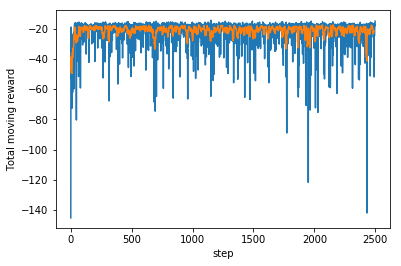

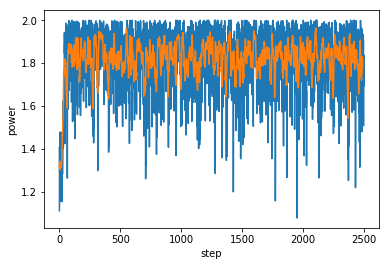

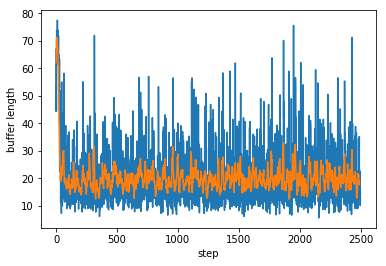

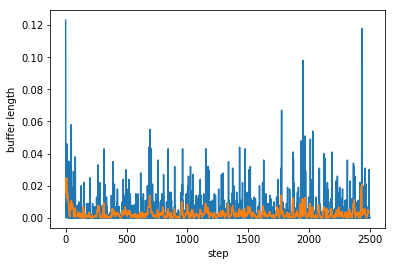

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])